In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
data_dir = 'apical_pMyo_compilation'
dir_stage = os.listdir('apical_pMyo_compilation')
dir_stage.sort()
dir_stage

['2ss', '3ss', '4-5ss', '4ss', '5-6ss', '5ss', '6ss', '7ss', '8ss']

In [3]:
d = 6
# print(*os.listdir(os.path.join(data_dir, dir_stage[d])), sep = "\n")
# print()
# print(os.listdir(os.path.join(data_dir, dir_stage[d]))[i].split('_'))
# print()
# print(os.listdir(os.path.join(data_dir, dir_stage[d]))[i].split('_')[-1].split('-'))

file_list = os.listdir(os.path.join(data_dir, dir_stage[d]))

i=8
print(dir_stage[d])
print(file_list[i].split('_'))
stage = file_list[i].split('_')[6]
name = file_list[i].split('s_')[1].split('I')[0]
analyse = file_list[i].split('_')[-1].split('-')[-1].split('.')[0][-1]

short_name = stage + '_' + name + '_' + analyse
print(stage, name, analyse, short_name)

6ss
['20211008-pMyo555', 'yH2Ax488', 'Phallo647', 'Hoechst', '40x', 'e2', '6ss', 'right2Intensity-Analysis3.txt']
6ss right2 3 6ss_right2_3


In [4]:
d = 0

data_myosin_tmp = pd.DataFrame(index=np.arange(0, 4000))
data_actin_tmp = pd.DataFrame(index=np.arange(0, 4000))

file_list = os.listdir(os.path.join(data_dir, dir_stage[d]))
for i in range (len(file_list)):
    stage = file_list[i].split('_')[6]
    name = file_list[i].split('_')[-1].split('-')[0]
    analyse = file_list[i].split('_')[-1].split('-')[-1].split('.')[0][-1]
    date = file_list[i].split('_')[0]
    short_name = date+'_'+stage + '_' + name + '_' + analyse
    print(stage, name, analyse, short_name)
    
    filename = os.path.join(os.path.join(data_dir, dir_stage[d]), file_list[i])
    data = pd.read_csv(filename, sep='\t')
    data.columns = ['Distance', 'Myo_int', 'Rel_Myo_int', 'Act_int', 'Rel_Act_int']
    data["distance_norm"] = data['Distance']*100/np.max(data['Distance'])
    
    data_myosin_tmp[short_name+'_distance'] = data['distance_norm']
    data_myosin_tmp[short_name] = data['Rel_Myo_int']

    data_actin_tmp[short_name+'_distance'] = data['distance_norm']
    data_actin_tmp[short_name] = data['Rel_Act_int']
    

data_myosin_tmp.to_csv(dir_stage[d]+"_myosin_tmp.csv", sep='\t')
data_actin_tmp.to_csv(dir_stage[d]+"_actin_tmp.csv", sep='\t')


data_myosin_tmp_align = pd.DataFrame(data = np.arange(0,100.02,0.2),
                          columns = ['Distance'])

data_actin_tmp_align = pd.DataFrame(data = np.arange(0,100.02,0.2),
                          columns = ['Distance'])

for c in range(0, len(data_actin_tmp.columns), 2):
    intensity=[]
    for dist in np.arange(0,100.2,0.2):
        tmp = []
        pos = np.where((dist<=data_actin_tmp[data_actin_tmp.columns[c]].to_numpy()) 
                       & (data_actin_tmp[data_actin_tmp.columns[c]].to_numpy()<dist+0.2))
        if len(pos[0])>0:
            for p in pos[0]:
                tmp.append(data_actin_tmp[data_actin_tmp.columns[c+1]][p])

        intensity.append(np.mean(tmp))
        
    data_actin_tmp_align[data_actin_tmp.columns[c+1]] = intensity
    
for c in range(0, len(data_myosin_tmp.columns), 2):
    intensity=[]
    for dist in np.arange(0,100.2,0.2):
        tmp = []
        pos = np.where((dist<=data_myosin_tmp[data_myosin_tmp.columns[c]].to_numpy()) 
                       & (data_myosin_tmp[data_myosin_tmp.columns[c]].to_numpy()<dist+0.2))
        if len(pos[0])>0:
            for p in pos[0]:
                tmp.append(data_myosin_tmp[data_myosin_tmp.columns[c+1]][p])

        intensity.append(np.mean(tmp))
        
    data_myosin_tmp_align[data_myosin_tmp.columns[c+1]] = intensity
    
data_myosin_tmp_align.to_csv(dir_stage[d]+"_myosin_tmp_align.csv", sep='\t')
data_actin_tmp_align.to_csv(dir_stage[d]+"_actin_tmp_align.csv", sep='\t')

2ss 3 1 20210709_2ss_3_1
2ss 2 3 20210709_2ss_2_3
2ss 3 3 20210709_2ss_3_3
2ss 3 0 20210709_2ss_3_0
2ss 3 2 20210709_2ss_3_2
2ss 2 1 20210709_2ss_2_1
2ss 2 2 20210709_2ss_2_2
2ss 2 0 20210709_2ss_2_0


/home/admin-suz/miniconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/admin-suz/miniconda3/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [5]:
d = 1

data_myosin_tmp = pd.DataFrame(index=np.arange(0, 4000))
data_actin_tmp = pd.DataFrame(index=np.arange(0, 4000))

file_list = os.listdir(os.path.join(data_dir, dir_stage[d]))
for i in range (len(file_list)):
    stage = file_list[i].split('_')[7]
    name = file_list[i].split('_')[8].split('-')[-1]
    analyse = file_list[i].split('_')[-1].split('-')[-1].split('.')[0][-1]

    date = file_list[i].split('_')[0]
    short_name = date+'_'+stage + '_' + name + '_' + analyse
    print(stage, name, analyse, short_name)
    
    filename = os.path.join(os.path.join(data_dir, dir_stage[d]), file_list[i])
    data = pd.read_csv(filename, sep='\t')
    data.columns = ['Distance', 'Myo_int', 'Rel_Myo_int', 'Act_int', 'Rel_Act_int']
    data["distance_norm"] = data['Distance']*100/np.max(data['Distance'])
    
    data_myosin_tmp[short_name+'_distance'] = data['distance_norm']
    data_myosin_tmp[short_name] = data['Rel_Myo_int']

    data_actin_tmp[short_name+'_distance'] = data['distance_norm']
    data_actin_tmp[short_name] = data['Rel_Act_int']
    

data_myosin_tmp.to_csv(dir_stage[d]+"_myosin_tmp.csv", sep='\t')
data_actin_tmp.to_csv(dir_stage[d]+"_actin_tmp.csv", sep='\t')


data_myosin_tmp_align = pd.DataFrame(data = np.arange(0,100.02,0.2),
                          columns = ['Distance'])

data_actin_tmp_align = pd.DataFrame(data = np.arange(0,100.02,0.2),
                          columns = ['Distance'])

for c in range(0, len(data_actin_tmp.columns), 2):
    intensity=[]
    for dist in np.arange(0,100.2,0.2):
        tmp = []
        pos = np.where((dist<=data_actin_tmp[data_actin_tmp.columns[c]].to_numpy()) 
                       & (data_actin_tmp[data_actin_tmp.columns[c]].to_numpy()<dist+0.2))
        if len(pos[0])>0:
            for p in pos[0]:
                tmp.append(data_actin_tmp[data_actin_tmp.columns[c+1]][p])

        intensity.append(np.mean(tmp))
        
    data_actin_tmp_align[data_actin_tmp.columns[c+1]] = intensity
    
for c in range(0, len(data_myosin_tmp.columns), 2):
    intensity=[]
    for dist in np.arange(0,100.2,0.2):
        tmp = []
        pos = np.where((dist<=data_myosin_tmp[data_myosin_tmp.columns[c]].to_numpy()) 
                       & (data_myosin_tmp[data_myosin_tmp.columns[c]].to_numpy()<dist+0.2))
        if len(pos[0])>0:
            for p in pos[0]:
                tmp.append(data_myosin_tmp[data_myosin_tmp.columns[c+1]][p])

        intensity.append(np.mean(tmp))
        
    data_myosin_tmp_align[data_myosin_tmp.columns[c+1]] = intensity
    
data_myosin_tmp_align.to_csv(dir_stage[d]+"_myosin_tmp_align.csv", sep='\t')
data_actin_tmp_align.to_csv(dir_stage[d]+"_actin_tmp_align.csv", sep='\t')

3ss 4 4 20210907_3ss_4_4
3ss 2 0 20210907_3ss_2_0
3ss 2 4 20210907_3ss_2_4
3ss 2 1 20210907_3ss_2_1
3ss 4 2 20210907_3ss_4_2
3ss 2 3 20210907_3ss_2_3
3ss 2 2 20210907_3ss_2_2
3ss 4 0 20210907_3ss_4_0
3ss 4 1 20210907_3ss_4_1
3ss 4 3 20210907_3ss_4_3


In [6]:
d = 2

data_myosin_tmp = pd.DataFrame(index=np.arange(0, 4000))
data_actin_tmp = pd.DataFrame(index=np.arange(0, 4000))

file_list = os.listdir(os.path.join(data_dir, dir_stage[d]))
for i in range (len(file_list)):
    stage = file_list[i].split('_')[6]
    name = file_list[i].split('_')[-1].split('.')[0]
    analyse = file_list[i].split('_')[-1].split('-')[-1].split('.')[0][-1]

    date = file_list[i].split('_')[0]
    short_name = date+'_'+stage + '_' + name + '_' + analyse
    print(stage, name, analyse, short_name)
    
    filename = os.path.join(os.path.join(data_dir, dir_stage[d]), file_list[i])
    data = pd.read_csv(filename, sep='\t')
    data.columns = ['Distance', 'Myo_int', 'Rel_Myo_int', 'Act_int', 'Rel_Act_int']
    data["distance_norm"] = data['Distance']*100/np.max(data['Distance'])
    
    data_myosin_tmp[short_name+'_distance'] = data['distance_norm']
    data_myosin_tmp[short_name] = data['Rel_Myo_int']

    data_actin_tmp[short_name+'_distance'] = data['distance_norm']
    data_actin_tmp[short_name] = data['Rel_Act_int']
    

data_myosin_tmp.to_csv(dir_stage[d]+"_myosin_tmp.csv", sep='\t')
data_actin_tmp.to_csv(dir_stage[d]+"_actin_tmp.csv", sep='\t')


data_myosin_tmp_align = pd.DataFrame(data = np.arange(0,100.02,0.2),
                          columns = ['Distance'])

data_actin_tmp_align = pd.DataFrame(data = np.arange(0,100.02,0.2),
                          columns = ['Distance'])

for c in range(0, len(data_actin_tmp.columns), 2):
    intensity=[]
    for dist in np.arange(0,100.2,0.2):
        tmp = []
        pos = np.where((dist<=data_actin_tmp[data_actin_tmp.columns[c]].to_numpy()) 
                       & (data_actin_tmp[data_actin_tmp.columns[c]].to_numpy()<dist+0.2))
        if len(pos[0])>0:
            for p in pos[0]:
                tmp.append(data_actin_tmp[data_actin_tmp.columns[c+1]][p])

        intensity.append(np.mean(tmp))
        
    data_actin_tmp_align[data_actin_tmp.columns[c+1]] = intensity
    
for c in range(0, len(data_myosin_tmp.columns), 2):
    intensity=[]
    for dist in np.arange(0,100.2,0.2):
        tmp = []
        pos = np.where((dist<=data_myosin_tmp[data_myosin_tmp.columns[c]].to_numpy()) 
                       & (data_myosin_tmp[data_myosin_tmp.columns[c]].to_numpy()<dist+0.2))
        if len(pos[0])>0:
            for p in pos[0]:
                tmp.append(data_myosin_tmp[data_myosin_tmp.columns[c+1]][p])

        intensity.append(np.mean(tmp))
        
    data_myosin_tmp_align[data_myosin_tmp.columns[c+1]] = intensity
    
data_myosin_tmp_align.to_csv(dir_stage[d]+"_myosin_tmp_align.csv", sep='\t')
data_actin_tmp_align.to_csv(dir_stage[d]+"_actin_tmp_align.csv", sep='\t')

4-5ss top 2 20210709_4-5ss_top_2
4-5ss 4 4 20210709_4-5ss_4_4
4-5ss top 3 20210709_4-5ss_top_3
4-5ss 2 3 20210709_4-5ss_2_3
4-5ss left2 1 20210709_4-5ss_left2_1
4-5ss left2 4 20210709_4-5ss_left2_4
4-5ss 1top 0 20210709_4-5ss_1top_0
4-5ss left4 0 20210709_4-5ss_left4_0
4-5ss 4 1 20210709_4-5ss_4_1
4-5ss 4 2 20210709_4-5ss_4_2
4-5ss left3 1 20210709_4-5ss_left3_1
4-5ss 4 0 20210709_4-5ss_4_0
4-5ss left3 4 20210709_4-5ss_left3_4
4-5ss 2 2 20210709_4-5ss_2_2
4-5ss 2 0 20210709_4-5ss_2_0
4-5ss 3 2 20210709_4-5ss_3_2
4-5ss 3 1 20210709_4-5ss_3_1
4-5ss left2 2 20210709_4-5ss_left2_2
4-5ss left3 3 20210709_4-5ss_left3_3
4-5ss left3 2 20210709_4-5ss_left3_2
4-5ss top 4 20210709_4-5ss_top_4
4-5ss 3 0 20210709_4-5ss_3_0
4-5ss left2 0 20210709_4-5ss_left2_0
4-5ss left4 4 20210709_4-5ss_left4_4
4-5ss 1top 2 20210709_4-5ss_1top_2
4-5ss left4 2 20210709_4-5ss_left4_2
4-5ss 4 3 20210709_4-5ss_4_3
4-5ss left4 1 20210709_4-5ss_left4_1
4-5ss 1top 4 20210709_4-5ss_1top_4
4-5ss left2 3 20210709_4-5ss_left

In [7]:
d = 3

data_myosin_tmp = pd.DataFrame(index=np.arange(0, 4000))
data_actin_tmp = pd.DataFrame(index=np.arange(0, 4000))

file_list = os.listdir(os.path.join(data_dir, dir_stage[d]))
for i in range (len(file_list)):
    stage = file_list[i].split('_')[7]
    name = file_list[i].split('_')[-1].split('I')[0]
    analyse = file_list[i].split('_')[-1].split('-')[-1].split('.')[0][-1]
    date = file_list[i].split('_')[0]
    short_name = date+'_'+stage + '_' + name + '_' + analyse
    print(stage, name, analyse, short_name)
    
    filename = os.path.join(os.path.join(data_dir, dir_stage[d]), file_list[i])
    data = pd.read_csv(filename, sep='\t')
    data.columns = ['Distance', 'Myo_int', 'Rel_Myo_int', 'Act_int', 'Rel_Act_int']
    data["distance_norm"] = data['Distance']*100/np.max(data['Distance'])
    
    data_myosin_tmp[short_name+'_distance'] = data['distance_norm']
    data_myosin_tmp[short_name] = data['Rel_Myo_int']

    data_actin_tmp[short_name+'_distance'] = data['distance_norm']
    data_actin_tmp[short_name] = data['Rel_Act_int']
    

data_myosin_tmp.to_csv(dir_stage[d]+"_myosin_tmp.csv", sep='\t')
data_actin_tmp.to_csv(dir_stage[d]+"_actin_tmp.csv", sep='\t')


data_myosin_tmp_align = pd.DataFrame(data = np.arange(0,100.02,0.2),
                          columns = ['Distance'])

data_actin_tmp_align = pd.DataFrame(data = np.arange(0,100.02,0.2),
                          columns = ['Distance'])

for c in range(0, len(data_actin_tmp.columns), 2):
    intensity=[]
    for dist in np.arange(0,100.2,0.2):
        tmp = []
        pos = np.where((dist<=data_actin_tmp[data_actin_tmp.columns[c]].to_numpy()) 
                       & (data_actin_tmp[data_actin_tmp.columns[c]].to_numpy()<dist+0.2))
        if len(pos[0])>0:
            for p in pos[0]:
                tmp.append(data_actin_tmp[data_actin_tmp.columns[c+1]][p])

        intensity.append(np.mean(tmp))
        
    data_actin_tmp_align[data_actin_tmp.columns[c+1]] = intensity
    
for c in range(0, len(data_myosin_tmp.columns), 2):
    intensity=[]
    for dist in np.arange(0,100.2,0.2):
        tmp = []
        pos = np.where((dist<=data_myosin_tmp[data_myosin_tmp.columns[c]].to_numpy()) 
                       & (data_myosin_tmp[data_myosin_tmp.columns[c]].to_numpy()<dist+0.2))
        if len(pos[0])>0:
            for p in pos[0]:
                tmp.append(data_myosin_tmp[data_myosin_tmp.columns[c+1]][p])

        intensity.append(np.mean(tmp))
        
    data_myosin_tmp_align[data_myosin_tmp.columns[c+1]] = intensity
    
data_myosin_tmp_align.to_csv(dir_stage[d]+"_myosin_tmp_align.csv", sep='\t')
data_actin_tmp_align.to_csv(dir_stage[d]+"_actin_tmp_align.csv", sep='\t')

4ss rightlevelss3-4.czi 1 20210907_4ss_rightlevelss3-4.czi_1
4ss rightlevelss1-2.czi 2 20210907_4ss_rightlevelss1-2.czi_2
4ss rightlevelss3-4 2 20210907_4ss_rightlevelss3-4_2
4ss leftlevelss3-4 0 20210907_4ss_leftlevelss3-4_0
4ss leftlevelss1-2 1 20210907_4ss_leftlevelss1-2_1
4ss rightlevelss1-2.czi 4 20210907_4ss_rightlevelss1-2.czi_4
4ss leftlevelss1-2 4 20210907_4ss_leftlevelss1-2_4
4ss rightlevelss1-2.czi 3 20210907_4ss_rightlevelss1-2.czi_3
4ss rightlevelss3-4.czi 0 20210907_4ss_rightlevelss3-4.czi_0
4ss rightlevelss1-2.czi 1 20210907_4ss_rightlevelss1-2.czi_1
4ss leftlevelss3-4 1 20210907_4ss_leftlevelss3-4_1
4ss rightlevelss3-4.czi 4 20210907_4ss_rightlevelss3-4.czi_4
4ss rightlevelss1-2 1 20210907_4ss_rightlevelss1-2_1
4ss rightlevelss1-2.czi 0 20210907_4ss_rightlevelss1-2.czi_0
4ss rightlevelss1-2 2 20210907_4ss_rightlevelss1-2_2
4ss rightlevelss3-4 4 20210907_4ss_rightlevelss3-4_4
4ss rightlevelss3-4.czi 3 20210907_4ss_rightlevelss3-4.czi_3
4ss leftlevelss1-2 2 20210907_4ss_l

In [8]:
d = 4

data_myosin_tmp = pd.DataFrame(index=np.arange(0, 4000))
data_actin_tmp = pd.DataFrame(index=np.arange(0, 4000))

file_list = os.listdir(os.path.join(data_dir, dir_stage[d]))
for i in range (len(file_list)):
    stage = file_list[i].split('_')[7]
    name = file_list[i].split('_')[-1].split('.')[0]
    analyse = file_list[i].split('_')[-1].split('-')[-1].split('.')[0][-1]

    date = file_list[i].split('_')[0]
    short_name = date+'_'+stage + '_' + name + '_' + analyse
    print(stage, name, analyse, short_name)
    
    filename = os.path.join(os.path.join(data_dir, dir_stage[d]), file_list[i])
    data = pd.read_csv(filename, sep='\t')
    data.columns = ['Distance', 'Myo_int', 'Rel_Myo_int', 'Act_int', 'Rel_Act_int']
    data["distance_norm"] = data['Distance']*100/np.max(data['Distance'])
    
    data_myosin_tmp[short_name+'_distance'] = data['distance_norm']
    data_myosin_tmp[short_name] = data['Rel_Myo_int']

    data_actin_tmp[short_name+'_distance'] = data['distance_norm']
    data_actin_tmp[short_name] = data['Rel_Act_int']
    

data_myosin_tmp.to_csv(dir_stage[d]+"_myosin_tmp.csv", sep='\t')
data_actin_tmp.to_csv(dir_stage[d]+"_actin_tmp.csv", sep='\t')


data_myosin_tmp_align = pd.DataFrame(data = np.arange(0,100.02,0.2),
                          columns = ['Distance'])

data_actin_tmp_align = pd.DataFrame(data = np.arange(0,100.02,0.2),
                          columns = ['Distance'])

for c in range(0, len(data_actin_tmp.columns), 2):
    intensity=[]
    for dist in np.arange(0,100.2,0.2):
        tmp = []
        pos = np.where((dist<=data_actin_tmp[data_actin_tmp.columns[c]].to_numpy()) 
                       & (data_actin_tmp[data_actin_tmp.columns[c]].to_numpy()<dist+0.2))
        if len(pos[0])>0:
            for p in pos[0]:
                tmp.append(data_actin_tmp[data_actin_tmp.columns[c+1]][p])

        intensity.append(np.mean(tmp))
        
    data_actin_tmp_align[data_actin_tmp.columns[c+1]] = intensity
    
for c in range(0, len(data_myosin_tmp.columns), 2):
    intensity=[]
    for dist in np.arange(0,100.2,0.2):
        tmp = []
        pos = np.where((dist<=data_myosin_tmp[data_myosin_tmp.columns[c]].to_numpy()) 
                       & (data_myosin_tmp[data_myosin_tmp.columns[c]].to_numpy()<dist+0.2))
        if len(pos[0])>0:
            for p in pos[0]:
                tmp.append(data_myosin_tmp[data_myosin_tmp.columns[c+1]][p])

        intensity.append(np.mean(tmp))
        
    data_myosin_tmp_align[data_myosin_tmp.columns[c+1]] = intensity
    
data_myosin_tmp_align.to_csv(dir_stage[d]+"_myosin_tmp_align.csv", sep='\t')
data_actin_tmp_align.to_csv(dir_stage[d]+"_actin_tmp_align.csv", sep='\t')

5-6ss 4 1 20210907_5-6ss_4_1
5-6ss 3 1 20210907_5-6ss_3_1
5-6ss 1top 3 20210907_5-6ss_1top_3
5-6ss 4 3 20210907_5-6ss_4_3
5-6ss 1top 0 20210907_5-6ss_1top_0
5-6ss 2 2 20210907_5-6ss_2_2
5-6ss 4 4 20210907_5-6ss_4_4
5-6ss 1top 2 20210907_5-6ss_1top_2
5-6ss 2 1 20210907_5-6ss_2_1
5-6ss 3 0 20210907_5-6ss_3_0
5-6ss 3 3 20210907_5-6ss_3_3
5-6ss 2 0 20210907_5-6ss_2_0
5-6ss 2 3 20210907_5-6ss_2_3
5-6ss 3 4 20210907_5-6ss_3_4
5-6ss 2 4 20210907_5-6ss_2_4
5-6ss 1top 4 20210907_5-6ss_1top_4
5-6ss 4 2 20210907_5-6ss_4_2
5-6ss 1top 1 20210907_5-6ss_1top_1
5-6ss 4 0 20210907_5-6ss_4_0
5-6ss 3 2 20210907_5-6ss_3_2


In [9]:
d = 5

data_myosin_tmp = pd.DataFrame(index=np.arange(0, 4000))
data_actin_tmp = pd.DataFrame(index=np.arange(0, 4000))

file_list = os.listdir(os.path.join(data_dir, dir_stage[d]))
for i in range (len(file_list)):
    stage = file_list[i].split('_')[6][:3]
    name = file_list[i].split('_')[6][3:]
    analyse = file_list[i].split('_')[-1].split('-')[-1].split('.')[0][-1]
    date = file_list[i].split('_')[0]
    short_name = date+'_'+stage + '_' + name + '_' + analyse
    print(stage, name, analyse, short_name)
    
    filename = os.path.join(os.path.join(data_dir, dir_stage[d]), file_list[i])
    data = pd.read_csv(filename, sep='\t')
    data.columns = ['Distance', 'Myo_int', 'Rel_Myo_int', 'Act_int', 'Rel_Act_int']
    data["distance_norm"] = data['Distance']*100/np.max(data['Distance'])
    
    data_myosin_tmp[short_name+'_distance'] = data['distance_norm']
    data_myosin_tmp[short_name] = data['Rel_Myo_int']

    data_actin_tmp[short_name+'_distance'] = data['distance_norm']
    data_actin_tmp[short_name] = data['Rel_Act_int']
    

data_myosin_tmp.to_csv(dir_stage[d]+"_myosin_tmp.csv", sep='\t')
data_actin_tmp.to_csv(dir_stage[d]+"_actin_tmp.csv", sep='\t')


data_myosin_tmp_align = pd.DataFrame(data = np.arange(0,100.02,0.2),
                          columns = ['Distance'])

data_actin_tmp_align = pd.DataFrame(data = np.arange(0,100.02,0.2),
                          columns = ['Distance'])

for c in range(0, len(data_actin_tmp.columns), 2):
    intensity=[]
    for dist in np.arange(0,100.2,0.2):
        tmp = []
        pos = np.where((dist<=data_actin_tmp[data_actin_tmp.columns[c]].to_numpy()) 
                       & (data_actin_tmp[data_actin_tmp.columns[c]].to_numpy()<dist+0.2))
        if len(pos[0])>0:
            for p in pos[0]:
                tmp.append(data_actin_tmp[data_actin_tmp.columns[c+1]][p])

        intensity.append(np.mean(tmp))
        
    data_actin_tmp_align[data_actin_tmp.columns[c+1]] = intensity
    
for c in range(0, len(data_myosin_tmp.columns), 2):
    intensity=[]
    for dist in np.arange(0,100.2,0.2):
        tmp = []
        pos = np.where((dist<=data_myosin_tmp[data_myosin_tmp.columns[c]].to_numpy()) 
                       & (data_myosin_tmp[data_myosin_tmp.columns[c]].to_numpy()<dist+0.2))
        if len(pos[0])>0:
            for p in pos[0]:
                tmp.append(data_myosin_tmp[data_myosin_tmp.columns[c+1]][p])

        intensity.append(np.mean(tmp))
        
    data_myosin_tmp_align[data_myosin_tmp.columns[c+1]] = intensity
    
data_myosin_tmp_align.to_csv(dir_stage[d]+"_myosin_tmp_align.csv", sep='\t')
data_actin_tmp_align.to_csv(dir_stage[d]+"_actin_tmp_align.csv", sep='\t')

5ss left-Stitch 0 20210621_5ss_left-Stitch_0
5ss right-Stitch 6 20210621_5ss_right-Stitch_6
5ss right-Stitch 2 20210621_5ss_right-Stitch_2
5ss right-Stitch 7 20210621_5ss_right-Stitch_7
5ss left-Stitch 1 20210621_5ss_left-Stitch_1
5ss left-Stitch 4 20210621_5ss_left-Stitch_4
5ss right-Stitch 4 20210621_5ss_right-Stitch_4
5ss right-Stitch 1 20210621_5ss_right-Stitch_1
5ss right-Stitch 0 20210621_5ss_right-Stitch_0
5ss right-Stitch 3 20210621_5ss_right-Stitch_3
5ss right-Stitch 5 20210621_5ss_right-Stitch_5
5ss left-Stitch 5 20210621_5ss_left-Stitch_5
5ss left-Stitch 3 20210621_5ss_left-Stitch_3
5ss right-Stitch 8 20210621_5ss_right-Stitch_8
5ss left-Stitch 2 20210621_5ss_left-Stitch_2


In [10]:
d = 6

data_myosin_tmp = pd.DataFrame(index=np.arange(0, 4000))
data_actin_tmp = pd.DataFrame(index=np.arange(0, 4000))

file_list = os.listdir(os.path.join(data_dir, dir_stage[d]))
for i in range (len(file_list)):
    stage = file_list[i].split('_')[6]
    name = file_list[i].split('s_')[1].split('I')[0]
    analyse = file_list[i].split('_')[-1].split('-')[-1].split('.')[0][-1]
    date = file_list[i].split('_')[0]
    short_name = date+'_'+stage + '_' + name + '_' + analyse
    print(stage, name, analyse, short_name)
    
    filename = os.path.join(os.path.join(data_dir, dir_stage[d]), file_list[i])
    data = pd.read_csv(filename, sep='\t')
    data.columns = ['Distance', 'Myo_int', 'Rel_Myo_int', 'Act_int', 'Rel_Act_int']
    data["distance_norm"] = data['Distance']*100/np.max(data['Distance'])
    
    data_myosin_tmp[short_name+'_distance'] = data['distance_norm']
    data_myosin_tmp[short_name] = data['Rel_Myo_int']

    data_actin_tmp[short_name+'_distance'] = data['distance_norm']
    data_actin_tmp[short_name] = data['Rel_Act_int']
    

data_myosin_tmp.to_csv(dir_stage[d]+"_myosin_tmp.csv", sep='\t')
data_actin_tmp.to_csv(dir_stage[d]+"_actin_tmp.csv", sep='\t')


data_myosin_tmp.to_csv(dir_stage[d]+"_myosin_tmp.csv", sep='\t')
data_actin_tmp.to_csv(dir_stage[d]+"_actin_tmp.csv", sep='\t')


data_myosin_tmp_align = pd.DataFrame(data = np.arange(0,100.02,0.2),
                          columns = ['Distance'])

data_actin_tmp_align = pd.DataFrame(data = np.arange(0,100.02,0.2),
                          columns = ['Distance'])

for c in range(0, len(data_actin_tmp.columns), 2):
    intensity=[]
    for dist in np.arange(0,100.2,0.2):
        tmp = []
        pos = np.where((dist<=data_actin_tmp[data_actin_tmp.columns[c]].to_numpy()) 
                       & (data_actin_tmp[data_actin_tmp.columns[c]].to_numpy()<dist+0.2))
        if len(pos[0])>0:
            for p in pos[0]:
                tmp.append(data_actin_tmp[data_actin_tmp.columns[c+1]][p])

        intensity.append(np.mean(tmp))
        
    data_actin_tmp_align[data_actin_tmp.columns[c+1]] = intensity
    
for c in range(0, len(data_myosin_tmp.columns), 2):
    intensity=[]
    for dist in np.arange(0,100.2,0.2):
        tmp = []
        pos = np.where((dist<=data_myosin_tmp[data_myosin_tmp.columns[c]].to_numpy()) 
                       & (data_myosin_tmp[data_myosin_tmp.columns[c]].to_numpy()<dist+0.2))
        if len(pos[0])>0:
            for p in pos[0]:
                tmp.append(data_myosin_tmp[data_myosin_tmp.columns[c+1]][p])

        intensity.append(np.mean(tmp))
        
    data_myosin_tmp_align[data_myosin_tmp.columns[c+1]] = intensity
    
data_myosin_tmp_align.to_csv(dir_stage[d]+"_myosin_tmp_align.csv", sep='\t')
data_actin_tmp_align.to_csv(dir_stage[d]+"_actin_tmp_align.csv", sep='\t')

6ss right3 4 20211008-pMyo555_6ss_right3_4
6ss right_2.czi 4 20210709_6ss_right_2.czi_4
6ss left_1top.czi 1 20210709_6ss_left_1top.czi_1
6ss left2 2 20211008-pMyo555_6ss_left2_2
6ss left_5_rotate 0 20210709_6ss_left_5_rotate_0
6ss right3 0 20211008-pMyo555_6ss_right3_0
6ss left2 1 20211008-pMyo555_6ss_left2_1
6ss left_2.czi 0 20210709_6ss_left_2.czi_0
6ss right2 3 20211008-pMyo555_6ss_right2_3
6ss right_2.czi 1 20210709_6ss_right_2.czi_1
6ss right_3_rotate 3 20210709_6ss_right_3_rotate_3
6ss right2 2 20211008-pMyo555_6ss_right2_2
6ss left3 3 20211008-pMyo555_6ss_left3_3
6ss right_3_rotate 2 20210709_6ss_right_3_rotate_2
6ss left_4.czi 1 20210709_6ss_left_4.czi_1
6ss left3 2 20211008-pMyo555_6ss_left3_2
6ss left_3_rotate 0 20210709_6ss_left_3_rotate_0
6ss left_4.czi 3 20210709_6ss_left_4.czi_3
6ss right1top 1 20211008-pMyo555_6ss_right1top_1
6ss left2 3 20211008-pMyo555_6ss_left2_3
6ss left_2.czi 4 20210709_6ss_left_2.czi_4
6ss right2 2 20211008-pMyo555_6ss_right2_2
6ss right4 3 2021100

<ipython-input-10-a203ef1eb4f0>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data_myosin_tmp[short_name+'_distance'] = data['distance_norm']
<ipython-input-10-a203ef1eb4f0>:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data_myosin_tmp[short_name] = data['Rel_Myo_int']
<ipython-input-10-a203ef1eb4f0>:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data_actin_tmp[short_name+'_distance'] = data[

6ss left_1top.czi 4 20210709_6ss_left_1top.czi_4
6ss right2 4 20211008-pMyo555_6ss_right2_4
6ss right_3_rotate 1 20210709_6ss_right_3_rotate_1


In [11]:
d = 7

data_myosin_tmp = pd.DataFrame(index=np.arange(0, 4000))
data_actin_tmp = pd.DataFrame(index=np.arange(0, 4000))

file_list = os.listdir(os.path.join(data_dir, dir_stage[d]))
for i in range (len(file_list)):
    stage = file_list[i].split('_')[6][:3]
    name = file_list[i].split('_')[6][3:].split('A')[0]
    analyse = file_list[i].split('_')[-1].split('-')[-1].split('.')[0][-1]
    date = file_list[i].split('_')[0]
    short_name = date+'_'+stage + '_' + name + '_' + analyse
    print(stage, name, analyse, short_name)
    
    filename = os.path.join(os.path.join(data_dir, dir_stage[d]), file_list[i])
    data = pd.read_csv(filename, sep='\t')
    data.columns = ['Distance', 'Myo_int', 'Rel_Myo_int', 'Act_int', 'Rel_Act_int']
    data["distance_norm"] = data['Distance']*100/np.max(data['Distance'])
    
    data_myosin_tmp[short_name+'_distance'] = data['distance_norm']
    data_myosin_tmp[short_name] = data['Rel_Myo_int']

    data_actin_tmp[short_name+'_distance'] = data['distance_norm']
    data_actin_tmp[short_name] = data['Rel_Act_int']
    

data_myosin_tmp.to_csv(dir_stage[d]+"_myosin_tmp.csv", sep='\t')
data_actin_tmp.to_csv(dir_stage[d]+"_actin_tmp.csv", sep='\t')


data_myosin_tmp.to_csv(dir_stage[d]+"_myosin_tmp.csv", sep='\t')
data_actin_tmp.to_csv(dir_stage[d]+"_actin_tmp.csv", sep='\t')


data_myosin_tmp_align = pd.DataFrame(data = np.arange(0,100.02,0.2),
                          columns = ['Distance'])

data_actin_tmp_align = pd.DataFrame(data = np.arange(0,100.02,0.2),
                          columns = ['Distance'])

for c in range(0, len(data_actin_tmp.columns), 2):
    intensity=[]
    for dist in np.arange(0,100.2,0.2):
        tmp = []
        pos = np.where((dist<=data_actin_tmp[data_actin_tmp.columns[c]].to_numpy()) 
                       & (data_actin_tmp[data_actin_tmp.columns[c]].to_numpy()<dist+0.2))
        if len(pos[0])>0:
            for p in pos[0]:
                tmp.append(data_actin_tmp[data_actin_tmp.columns[c+1]][p])

        intensity.append(np.mean(tmp))
        
    data_actin_tmp_align[data_actin_tmp.columns[c+1]] = intensity
    
for c in range(0, len(data_myosin_tmp.columns), 2):
    intensity=[]
    for dist in np.arange(0,100.2,0.2):
        tmp = []
        pos = np.where((dist<=data_myosin_tmp[data_myosin_tmp.columns[c]].to_numpy()) 
                       & (data_myosin_tmp[data_myosin_tmp.columns[c]].to_numpy()<dist+0.2))
        if len(pos[0])>0:
            for p in pos[0]:
                tmp.append(data_myosin_tmp[data_myosin_tmp.columns[c+1]][p])

        intensity.append(np.mean(tmp))
        
    data_myosin_tmp_align[data_myosin_tmp.columns[c+1]] = intensity
    
data_myosin_tmp_align.to_csv(dir_stage[d]+"_myosin_tmp_align.csv", sep='\t')
data_actin_tmp_align.to_csv(dir_stage[d]+"_actin_tmp_align.csv", sep='\t')

7ss right-top 6 20210621_7ss_right-top_6
7ss left-1topIntensity- 3 20210621_7ss_left-1topIntensity-_3
7ss left-4 0 20210621_7ss_left-4_0
7ss right-top 0 20210621_7ss_right-top_0
7ss  1 20211008-pMyo555_7ss__1
7ss right-top 1 20210621_7ss_right-top_1
7ss right-top 7 20210621_7ss_right-top_7
7ss left-2 2 20210621_7ss_left-2_2
7ss right-top 8 20210621_7ss_right-top_8
7ss right-middle 8 20210621_7ss_right-middle_8
7ss left-3 1 20210621_7ss_left-3_1
7ss  1 20211008-pMyo555_7ss__1
7ss  0 20211008-pMyo555_7ss__0
7ss right-top 2 20210621_7ss_right-top_2
7ss  2 20211008-pMyo555_7ss__2
7ss right-top 4 20210621_7ss_right-top_4
7ss  1 20211008-pMyo555_7ss__1
7ss left-4 3 20210621_7ss_left-4_3
7ss right-middle 2 20210621_7ss_right-middle_2
7ss right-middle 0 20210621_7ss_right-middle_0
7ss  2 20211008-pMyo555_7ss__2
7ss left-1topIntensity- 0 20210621_7ss_left-1topIntensity-_0
7ss left-3 0 20210621_7ss_left-3_0
7ss right-middle 5 20210621_7ss_right-middle_5
7ss  4 20211008-pMyo555_7ss__4
7ss left-4 

In [12]:
d = 8

data_myosin_tmp = pd.DataFrame(index=np.arange(0, 4000))
data_actin_tmp = pd.DataFrame(index=np.arange(0, 4000))

file_list = os.listdir(os.path.join(data_dir, dir_stage[d]))
for i in range (len(file_list)):
    stage = file_list[i].split('_')[6]
    name = file_list[i].split('_')[-1].split('A')[0]
    analyse = file_list[i].split('_')[-1].split('-')[-1].split('.')[0][-1]
    date = file_list[i].split('_')[0]
    short_name = date+'_'+stage + '_' + name + '_' + analyse
    print(stage, name, analyse, short_name)
    
    filename = os.path.join(os.path.join(data_dir, dir_stage[d]), file_list[i])
    data = pd.read_csv(filename, sep='\t')
    data.columns = ['Distance', 'Myo_int', 'Rel_Myo_int', 'Act_int', 'Rel_Act_int']
    data["distance_norm"] = data['Distance']*100/np.max(data['Distance'])
    
    data_myosin_tmp[short_name+'_distance'] = data['distance_norm']
    data_myosin_tmp[short_name] = data['Rel_Myo_int']

    data_actin_tmp[short_name+'_distance'] = data['distance_norm']
    data_actin_tmp[short_name] = data['Rel_Act_int']
    


data_myosin_tmp.to_csv(dir_stage[d]+"_myosin_tmp.csv", sep='\t')
data_actin_tmp.to_csv(dir_stage[d]+"_actin_tmp.csv", sep='\t')


data_myosin_tmp_align = pd.DataFrame(data = np.arange(0,100.02,0.2),
                          columns = ['Distance'])

data_actin_tmp_align = pd.DataFrame(data = np.arange(0,100.02,0.2),
                          columns = ['Distance'])

for c in range(0, len(data_actin_tmp.columns), 2):
    intensity=[]
    for dist in np.arange(0,100.2,0.2):
        tmp = []
        pos = np.where((dist<=data_actin_tmp[data_actin_tmp.columns[c]].to_numpy()) 
                       & (data_actin_tmp[data_actin_tmp.columns[c]].to_numpy()<dist+0.2))
        if len(pos[0])>0:
            for p in pos[0]:
                tmp.append(data_actin_tmp[data_actin_tmp.columns[c+1]][p])

        intensity.append(np.mean(tmp))
        
    data_actin_tmp_align[data_actin_tmp.columns[c+1]] = intensity
    
for c in range(0, len(data_myosin_tmp.columns), 2):
    intensity=[]
    for dist in np.arange(0,100.2,0.2):
        tmp = []
        pos = np.where((dist<=data_myosin_tmp[data_myosin_tmp.columns[c]].to_numpy()) 
                       & (data_myosin_tmp[data_myosin_tmp.columns[c]].to_numpy()<dist+0.2))
        if len(pos[0])>0:
            for p in pos[0]:
                tmp.append(data_myosin_tmp[data_myosin_tmp.columns[c+1]][p])

        intensity.append(np.mean(tmp))
        
    data_myosin_tmp_align[data_myosin_tmp.columns[c+1]] = intensity
    
data_myosin_tmp_align.to_csv(dir_stage[d]+"_myosin_tmp_align.csv", sep='\t')
data_actin_tmp_align.to_csv(dir_stage[d]+"_actin_tmp_align.csv", sep='\t')

e2 3.cziIntensity- 0 20210907_e2_3.cziIntensity-_0
8ss 4.cziIntensity- 0 20210709_8ss_4.cziIntensity-_0
e2 2.cziIntensity- 3 20210907_e2_2.cziIntensity-_3
8ss 5.cziIntensity- 4 20210709_8ss_5.cziIntensity-_4
8ss 5.cziIntensity- 3 20210709_8ss_5.cziIntensity-_3
8ss 1top-rotate-cropIntensity- 1 20210709_8ss_1top-rotate-cropIntensity-_1
8ss right3Intensity- 1 20211008-pMyo555_8ss_right3Intensity-_1
8ss 4.cziIntensity- 3 20210709_8ss_4.cziIntensity-_3
8ss right2Intensity- 2 20211008-pMyo555_8ss_right2Intensity-_2
e2 2.cziIntensity- 0 20210907_e2_2.cziIntensity-_0
e2 3.cziIntensity- 3 20210907_e2_3.cziIntensity-_3
8ss rotateIntensity- 4 20210709_8ss_rotateIntensity-_4
8ss rotateIntensity- 2 20210709_8ss_rotateIntensity-_2
8ss 4.cziIntensity- 2 20210709_8ss_4.cziIntensity-_2
8ss right1topIntensity- 4 20211008-pMyo555_8ss_right1topIntensity-_4
e2 rotateIntensity- 1 20210907_e2_rotateIntensity-_1
8ss right1topIntensity- 0 20211008-pMyo555_8ss_right1topIntensity-_0
8ss right3Intensity- 0 202110

<ipython-input-12-7dd02e000a35>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data_myosin_tmp[short_name+'_distance'] = data['distance_norm']
<ipython-input-12-7dd02e000a35>:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data_myosin_tmp[short_name] = data['Rel_Myo_int']
<ipython-input-12-7dd02e000a35>:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data_actin_tmp[short_name+'_distance'] = data[

In [13]:
data_myosin = pd.DataFrame(data = np.arange(0,100.02,0.2),
                          columns = ['Distance'])

data_actin = pd.DataFrame(data = np.arange(0,100.02,0.2),
                          columns = ['Distance'])

In [14]:
myosin_file = os.listdir("myosin")

for f in myosin_file:
    data_myosin[f.split('_')[0]+'_mean']=0
    data_myosin[f.split('_')[0]+'_std']=0

i=0
for dist in np.arange(0,100.2,0.2):  
    for f in myosin_file:
        if 'align' not in f : 
            tmp = []
            data = pd.read_csv(os.path.join('myosin', f), sep='\t', index_col = 'Unnamed: 0' )
            print(data.columns)
            for c in range(0, len(data.columns), 2):

                pos = np.where((dist<=data[data.columns[c]].to_numpy()) & (data[data.columns[c]].to_numpy()<dist+0.2))
                if len(pos[0])>0:
                    for p in pos[0]:
                        tmp.append(data[data.columns[c+1]][p])

            data_myosin.loc[i, f.split('_')[0]+'_mean'] = np.mean(tmp)
            data_myosin.loc[i, f.split('_')[0]+'_std'] = np.std(tmp)
    i+=1

Index(['20210709_4-5ss_top_2_distance', '20210709_4-5ss_top_2',
       '20210709_4-5ss_4_4_distance', '20210709_4-5ss_4_4',
       '20210709_4-5ss_top_3_distance', '20210709_4-5ss_top_3',
       '20210709_4-5ss_2_3_distance', '20210709_4-5ss_2_3',
       '20210709_4-5ss_left2_1_distance', '20210709_4-5ss_left2_1',
       '20210709_4-5ss_left2_4_distance', '20210709_4-5ss_left2_4',
       '20210709_4-5ss_1top_0_distance', '20210709_4-5ss_1top_0',
       '20210709_4-5ss_left4_0_distance', '20210709_4-5ss_left4_0',
       '20210709_4-5ss_4_1_distance', '20210709_4-5ss_4_1',
       '20210709_4-5ss_4_2_distance', '20210709_4-5ss_4_2',
       '20210709_4-5ss_left3_1_distance', '20210709_4-5ss_left3_1',
       '20210709_4-5ss_4_0_distance', '20210709_4-5ss_4_0',
       '20210709_4-5ss_left3_4_distance', '20210709_4-5ss_left3_4',
       '20210709_4-5ss_2_2_distance', '20210709_4-5ss_2_2',
       '20210709_4-5ss_2_0_distance', '20210709_4-5ss_2_0',
       '20210709_4-5ss_3_2_distance', '2021070

Index(['20211008-pMyo555_6ss_right3_4_distance',
       '20211008-pMyo555_6ss_right3_4', '20210709_6ss_right_2.czi_4_distance',
       '20210709_6ss_right_2.czi_4', '20210709_6ss_left_1top.czi_1_distance',
       '20210709_6ss_left_1top.czi_1', '20211008-pMyo555_6ss_left2_2_distance',
       '20211008-pMyo555_6ss_left2_2', '20210709_6ss_left_5_rotate_0_distance',
       '20210709_6ss_left_5_rotate_0',
       ...
       '20211008-pMyo555_6ss_right1top_2_distance',
       '20211008-pMyo555_6ss_right1top_2',
       '20210709_6ss_right_3_rotate_4_distance',
       '20210709_6ss_right_3_rotate_4', '20210709_6ss_left_4.czi_4_distance',
       '20210709_6ss_left_4.czi_4', '20210709_6ss_left_1top.czi_4_distance',
       '20210709_6ss_left_1top.czi_4',
       '20210709_6ss_right_3_rotate_1_distance',
       '20210709_6ss_right_3_rotate_1'],
      dtype='object', length=148)
Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensi

Index(['20210709_2ss_3_1_distance', '20210709_2ss_3_1',
       '20210709_2ss_2_3_distance', '20210709_2ss_2_3',
       '20210709_2ss_3_3_distance', '20210709_2ss_3_3',
       '20210709_2ss_3_0_distance', '20210709_2ss_3_0',
       '20210709_2ss_3_2_distance', '20210709_2ss_3_2',
       '20210709_2ss_2_1_distance', '20210709_2ss_2_1',
       '20210709_2ss_2_2_distance', '20210709_2ss_2_2',
       '20210709_2ss_2_0_distance', '20210709_2ss_2_0'],
      dtype='object')
Index(['20210621_5ss_left-Stitch_0_distance', '20210621_5ss_left-Stitch_0',
       '20210621_5ss_right-Stitch_6_distance', '20210621_5ss_right-Stitch_6',
       '20210621_5ss_right-Stitch_2_distance', '20210621_5ss_right-Stitch_2',
       '20210621_5ss_right-Stitch_7_distance', '20210621_5ss_right-Stitch_7',
       '20210621_5ss_left-Stitch_1_distance', '20210621_5ss_left-Stitch_1',
       '20210621_5ss_left-Stitch_4_distance', '20210621_5ss_left-Stitch_4',
       '20210621_5ss_right-Stitch_4_distance', '20210621_5ss_right-

Index(['20210709_4-5ss_top_2_distance', '20210709_4-5ss_top_2',
       '20210709_4-5ss_4_4_distance', '20210709_4-5ss_4_4',
       '20210709_4-5ss_top_3_distance', '20210709_4-5ss_top_3',
       '20210709_4-5ss_2_3_distance', '20210709_4-5ss_2_3',
       '20210709_4-5ss_left2_1_distance', '20210709_4-5ss_left2_1',
       '20210709_4-5ss_left2_4_distance', '20210709_4-5ss_left2_4',
       '20210709_4-5ss_1top_0_distance', '20210709_4-5ss_1top_0',
       '20210709_4-5ss_left4_0_distance', '20210709_4-5ss_left4_0',
       '20210709_4-5ss_4_1_distance', '20210709_4-5ss_4_1',
       '20210709_4-5ss_4_2_distance', '20210709_4-5ss_4_2',
       '20210709_4-5ss_left3_1_distance', '20210709_4-5ss_left3_1',
       '20210709_4-5ss_4_0_distance', '20210709_4-5ss_4_0',
       '20210709_4-5ss_left3_4_distance', '20210709_4-5ss_left3_4',
       '20210709_4-5ss_2_2_distance', '20210709_4-5ss_2_2',
       '20210709_4-5ss_2_0_distance', '20210709_4-5ss_2_0',
       '20210709_4-5ss_3_2_distance', '2021070

Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensity-_0_distance',
       '20210709_8ss_4.cziIntensity-_0',
       '20210907_e2_2.cziIntensity-_3_distance',
       '20210907_e2_2.cziIntensity-_3',
       '20210709_8ss_5.cziIntensity-_4_distance',
       '20210709_8ss_5.cziIntensity-_4',
       '20210709_8ss_5.cziIntensity-_3_distance',
       '20210709_8ss_5.cziIntensity-_3',
       ...
       '20210907_e2_rotateIntensity-_0_distance',
       '20210907_e2_rotateIntensity-_0',
       '20211008-pMyo555_8ss_right3Intensity-_4_distance',
       '20211008-pMyo555_8ss_right3Intensity-_4',
       '20210907_e2_3.cziIntensity-_2_distance',
       '20210907_e2_3.cziIntensity-_2',
       '20211008-pMyo555_8ss_right1topIntensity-_1_distance',
       '20211008-pMyo555_8ss_right1topIntensity-_1',
       '20210709_8ss_rotateIntensity-_0_distance',
       '20210709_8ss_rotateIntensity-_0'],
      dtype='object', length=104)
Index(

Index(['20210621_7ss_right-top_6_distance', '20210621_7ss_right-top_6',
       '20210621_7ss_left-1topIntensity-_3_distance',
       '20210621_7ss_left-1topIntensity-_3', '20210621_7ss_left-4_0_distance',
       '20210621_7ss_left-4_0', '20210621_7ss_right-top_0_distance',
       '20210621_7ss_right-top_0', '20211008-pMyo555_7ss__1_distance',
       '20211008-pMyo555_7ss__1', '20210621_7ss_right-top_1_distance',
       '20210621_7ss_right-top_1', '20210621_7ss_right-top_7_distance',
       '20210621_7ss_right-top_7', '20210621_7ss_left-2_2_distance',
       '20210621_7ss_left-2_2', '20210621_7ss_right-top_8_distance',
       '20210621_7ss_right-top_8', '20210621_7ss_right-middle_8_distance',
       '20210621_7ss_right-middle_8', '20210621_7ss_left-3_1_distance',
       '20210621_7ss_left-3_1', '20211008-pMyo555_7ss__0_distance',
       '20211008-pMyo555_7ss__0', '20210621_7ss_right-top_2_distance',
       '20210621_7ss_right-top_2', '20211008-pMyo555_7ss__2_distance',
       '20211008-

Index(['20211008-pMyo555_6ss_right3_4_distance',
       '20211008-pMyo555_6ss_right3_4', '20210709_6ss_right_2.czi_4_distance',
       '20210709_6ss_right_2.czi_4', '20210709_6ss_left_1top.czi_1_distance',
       '20210709_6ss_left_1top.czi_1', '20211008-pMyo555_6ss_left2_2_distance',
       '20211008-pMyo555_6ss_left2_2', '20210709_6ss_left_5_rotate_0_distance',
       '20210709_6ss_left_5_rotate_0',
       ...
       '20211008-pMyo555_6ss_right1top_2_distance',
       '20211008-pMyo555_6ss_right1top_2',
       '20210709_6ss_right_3_rotate_4_distance',
       '20210709_6ss_right_3_rotate_4', '20210709_6ss_left_4.czi_4_distance',
       '20210709_6ss_left_4.czi_4', '20210709_6ss_left_1top.czi_4_distance',
       '20210709_6ss_left_1top.czi_4',
       '20210709_6ss_right_3_rotate_1_distance',
       '20210709_6ss_right_3_rotate_1'],
      dtype='object', length=148)
Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensi

Index(['20210621_5ss_left-Stitch_0_distance', '20210621_5ss_left-Stitch_0',
       '20210621_5ss_right-Stitch_6_distance', '20210621_5ss_right-Stitch_6',
       '20210621_5ss_right-Stitch_2_distance', '20210621_5ss_right-Stitch_2',
       '20210621_5ss_right-Stitch_7_distance', '20210621_5ss_right-Stitch_7',
       '20210621_5ss_left-Stitch_1_distance', '20210621_5ss_left-Stitch_1',
       '20210621_5ss_left-Stitch_4_distance', '20210621_5ss_left-Stitch_4',
       '20210621_5ss_right-Stitch_4_distance', '20210621_5ss_right-Stitch_4',
       '20210621_5ss_right-Stitch_1_distance', '20210621_5ss_right-Stitch_1',
       '20210621_5ss_right-Stitch_0_distance', '20210621_5ss_right-Stitch_0',
       '20210621_5ss_right-Stitch_3_distance', '20210621_5ss_right-Stitch_3',
       '20210621_5ss_right-Stitch_5_distance', '20210621_5ss_right-Stitch_5',
       '20210621_5ss_left-Stitch_5_distance', '20210621_5ss_left-Stitch_5',
       '20210621_5ss_left-Stitch_3_distance', '20210621_5ss_left-Stitch_

Index(['20211008-pMyo555_6ss_right3_4_distance',
       '20211008-pMyo555_6ss_right3_4', '20210709_6ss_right_2.czi_4_distance',
       '20210709_6ss_right_2.czi_4', '20210709_6ss_left_1top.czi_1_distance',
       '20210709_6ss_left_1top.czi_1', '20211008-pMyo555_6ss_left2_2_distance',
       '20211008-pMyo555_6ss_left2_2', '20210709_6ss_left_5_rotate_0_distance',
       '20210709_6ss_left_5_rotate_0',
       ...
       '20211008-pMyo555_6ss_right1top_2_distance',
       '20211008-pMyo555_6ss_right1top_2',
       '20210709_6ss_right_3_rotate_4_distance',
       '20210709_6ss_right_3_rotate_4', '20210709_6ss_left_4.czi_4_distance',
       '20210709_6ss_left_4.czi_4', '20210709_6ss_left_1top.czi_4_distance',
       '20210709_6ss_left_1top.czi_4',
       '20210709_6ss_right_3_rotate_1_distance',
       '20210709_6ss_right_3_rotate_1'],
      dtype='object', length=148)
Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensi

Index(['20210621_5ss_left-Stitch_0_distance', '20210621_5ss_left-Stitch_0',
       '20210621_5ss_right-Stitch_6_distance', '20210621_5ss_right-Stitch_6',
       '20210621_5ss_right-Stitch_2_distance', '20210621_5ss_right-Stitch_2',
       '20210621_5ss_right-Stitch_7_distance', '20210621_5ss_right-Stitch_7',
       '20210621_5ss_left-Stitch_1_distance', '20210621_5ss_left-Stitch_1',
       '20210621_5ss_left-Stitch_4_distance', '20210621_5ss_left-Stitch_4',
       '20210621_5ss_right-Stitch_4_distance', '20210621_5ss_right-Stitch_4',
       '20210621_5ss_right-Stitch_1_distance', '20210621_5ss_right-Stitch_1',
       '20210621_5ss_right-Stitch_0_distance', '20210621_5ss_right-Stitch_0',
       '20210621_5ss_right-Stitch_3_distance', '20210621_5ss_right-Stitch_3',
       '20210621_5ss_right-Stitch_5_distance', '20210621_5ss_right-Stitch_5',
       '20210621_5ss_left-Stitch_5_distance', '20210621_5ss_left-Stitch_5',
       '20210621_5ss_left-Stitch_3_distance', '20210621_5ss_left-Stitch_

Index(['20211008-pMyo555_6ss_right3_4_distance',
       '20211008-pMyo555_6ss_right3_4', '20210709_6ss_right_2.czi_4_distance',
       '20210709_6ss_right_2.czi_4', '20210709_6ss_left_1top.czi_1_distance',
       '20210709_6ss_left_1top.czi_1', '20211008-pMyo555_6ss_left2_2_distance',
       '20211008-pMyo555_6ss_left2_2', '20210709_6ss_left_5_rotate_0_distance',
       '20210709_6ss_left_5_rotate_0',
       ...
       '20211008-pMyo555_6ss_right1top_2_distance',
       '20211008-pMyo555_6ss_right1top_2',
       '20210709_6ss_right_3_rotate_4_distance',
       '20210709_6ss_right_3_rotate_4', '20210709_6ss_left_4.czi_4_distance',
       '20210709_6ss_left_4.czi_4', '20210709_6ss_left_1top.czi_4_distance',
       '20210709_6ss_left_1top.czi_4',
       '20210709_6ss_right_3_rotate_1_distance',
       '20210709_6ss_right_3_rotate_1'],
      dtype='object', length=148)
Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensi

Index(['20210621_5ss_left-Stitch_0_distance', '20210621_5ss_left-Stitch_0',
       '20210621_5ss_right-Stitch_6_distance', '20210621_5ss_right-Stitch_6',
       '20210621_5ss_right-Stitch_2_distance', '20210621_5ss_right-Stitch_2',
       '20210621_5ss_right-Stitch_7_distance', '20210621_5ss_right-Stitch_7',
       '20210621_5ss_left-Stitch_1_distance', '20210621_5ss_left-Stitch_1',
       '20210621_5ss_left-Stitch_4_distance', '20210621_5ss_left-Stitch_4',
       '20210621_5ss_right-Stitch_4_distance', '20210621_5ss_right-Stitch_4',
       '20210621_5ss_right-Stitch_1_distance', '20210621_5ss_right-Stitch_1',
       '20210621_5ss_right-Stitch_0_distance', '20210621_5ss_right-Stitch_0',
       '20210621_5ss_right-Stitch_3_distance', '20210621_5ss_right-Stitch_3',
       '20210621_5ss_right-Stitch_5_distance', '20210621_5ss_right-Stitch_5',
       '20210621_5ss_left-Stitch_5_distance', '20210621_5ss_left-Stitch_5',
       '20210621_5ss_left-Stitch_3_distance', '20210621_5ss_left-Stitch_

Index(['20211008-pMyo555_6ss_right3_4_distance',
       '20211008-pMyo555_6ss_right3_4', '20210709_6ss_right_2.czi_4_distance',
       '20210709_6ss_right_2.czi_4', '20210709_6ss_left_1top.czi_1_distance',
       '20210709_6ss_left_1top.czi_1', '20211008-pMyo555_6ss_left2_2_distance',
       '20211008-pMyo555_6ss_left2_2', '20210709_6ss_left_5_rotate_0_distance',
       '20210709_6ss_left_5_rotate_0',
       ...
       '20211008-pMyo555_6ss_right1top_2_distance',
       '20211008-pMyo555_6ss_right1top_2',
       '20210709_6ss_right_3_rotate_4_distance',
       '20210709_6ss_right_3_rotate_4', '20210709_6ss_left_4.czi_4_distance',
       '20210709_6ss_left_4.czi_4', '20210709_6ss_left_1top.czi_4_distance',
       '20210709_6ss_left_1top.czi_4',
       '20210709_6ss_right_3_rotate_1_distance',
       '20210709_6ss_right_3_rotate_1'],
      dtype='object', length=148)
Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensi

Index(['20210907_5-6ss_4_1_distance', '20210907_5-6ss_4_1',
       '20210907_5-6ss_3_1_distance', '20210907_5-6ss_3_1',
       '20210907_5-6ss_1top_3_distance', '20210907_5-6ss_1top_3',
       '20210907_5-6ss_4_3_distance', '20210907_5-6ss_4_3',
       '20210907_5-6ss_1top_0_distance', '20210907_5-6ss_1top_0',
       '20210907_5-6ss_2_2_distance', '20210907_5-6ss_2_2',
       '20210907_5-6ss_4_4_distance', '20210907_5-6ss_4_4',
       '20210907_5-6ss_1top_2_distance', '20210907_5-6ss_1top_2',
       '20210907_5-6ss_2_1_distance', '20210907_5-6ss_2_1',
       '20210907_5-6ss_3_0_distance', '20210907_5-6ss_3_0',
       '20210907_5-6ss_3_3_distance', '20210907_5-6ss_3_3',
       '20210907_5-6ss_2_0_distance', '20210907_5-6ss_2_0',
       '20210907_5-6ss_2_3_distance', '20210907_5-6ss_2_3',
       '20210907_5-6ss_3_4_distance', '20210907_5-6ss_3_4',
       '20210907_5-6ss_2_4_distance', '20210907_5-6ss_2_4',
       '20210907_5-6ss_1top_4_distance', '20210907_5-6ss_1top_4',
       '20210907

Index(['20211008-pMyo555_6ss_right3_4_distance',
       '20211008-pMyo555_6ss_right3_4', '20210709_6ss_right_2.czi_4_distance',
       '20210709_6ss_right_2.czi_4', '20210709_6ss_left_1top.czi_1_distance',
       '20210709_6ss_left_1top.czi_1', '20211008-pMyo555_6ss_left2_2_distance',
       '20211008-pMyo555_6ss_left2_2', '20210709_6ss_left_5_rotate_0_distance',
       '20210709_6ss_left_5_rotate_0',
       ...
       '20211008-pMyo555_6ss_right1top_2_distance',
       '20211008-pMyo555_6ss_right1top_2',
       '20210709_6ss_right_3_rotate_4_distance',
       '20210709_6ss_right_3_rotate_4', '20210709_6ss_left_4.czi_4_distance',
       '20210709_6ss_left_4.czi_4', '20210709_6ss_left_1top.czi_4_distance',
       '20210709_6ss_left_1top.czi_4',
       '20210709_6ss_right_3_rotate_1_distance',
       '20210709_6ss_right_3_rotate_1'],
      dtype='object', length=148)
Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensi

Index(['20210621_5ss_left-Stitch_0_distance', '20210621_5ss_left-Stitch_0',
       '20210621_5ss_right-Stitch_6_distance', '20210621_5ss_right-Stitch_6',
       '20210621_5ss_right-Stitch_2_distance', '20210621_5ss_right-Stitch_2',
       '20210621_5ss_right-Stitch_7_distance', '20210621_5ss_right-Stitch_7',
       '20210621_5ss_left-Stitch_1_distance', '20210621_5ss_left-Stitch_1',
       '20210621_5ss_left-Stitch_4_distance', '20210621_5ss_left-Stitch_4',
       '20210621_5ss_right-Stitch_4_distance', '20210621_5ss_right-Stitch_4',
       '20210621_5ss_right-Stitch_1_distance', '20210621_5ss_right-Stitch_1',
       '20210621_5ss_right-Stitch_0_distance', '20210621_5ss_right-Stitch_0',
       '20210621_5ss_right-Stitch_3_distance', '20210621_5ss_right-Stitch_3',
       '20210621_5ss_right-Stitch_5_distance', '20210621_5ss_right-Stitch_5',
       '20210621_5ss_left-Stitch_5_distance', '20210621_5ss_left-Stitch_5',
       '20210621_5ss_left-Stitch_3_distance', '20210621_5ss_left-Stitch_

Index(['20210621_7ss_right-top_6_distance', '20210621_7ss_right-top_6',
       '20210621_7ss_left-1topIntensity-_3_distance',
       '20210621_7ss_left-1topIntensity-_3', '20210621_7ss_left-4_0_distance',
       '20210621_7ss_left-4_0', '20210621_7ss_right-top_0_distance',
       '20210621_7ss_right-top_0', '20211008-pMyo555_7ss__1_distance',
       '20211008-pMyo555_7ss__1', '20210621_7ss_right-top_1_distance',
       '20210621_7ss_right-top_1', '20210621_7ss_right-top_7_distance',
       '20210621_7ss_right-top_7', '20210621_7ss_left-2_2_distance',
       '20210621_7ss_left-2_2', '20210621_7ss_right-top_8_distance',
       '20210621_7ss_right-top_8', '20210621_7ss_right-middle_8_distance',
       '20210621_7ss_right-middle_8', '20210621_7ss_left-3_1_distance',
       '20210621_7ss_left-3_1', '20211008-pMyo555_7ss__0_distance',
       '20211008-pMyo555_7ss__0', '20210621_7ss_right-top_2_distance',
       '20210621_7ss_right-top_2', '20211008-pMyo555_7ss__2_distance',
       '20211008-

Index(['20211008-pMyo555_6ss_right3_4_distance',
       '20211008-pMyo555_6ss_right3_4', '20210709_6ss_right_2.czi_4_distance',
       '20210709_6ss_right_2.czi_4', '20210709_6ss_left_1top.czi_1_distance',
       '20210709_6ss_left_1top.czi_1', '20211008-pMyo555_6ss_left2_2_distance',
       '20211008-pMyo555_6ss_left2_2', '20210709_6ss_left_5_rotate_0_distance',
       '20210709_6ss_left_5_rotate_0',
       ...
       '20211008-pMyo555_6ss_right1top_2_distance',
       '20211008-pMyo555_6ss_right1top_2',
       '20210709_6ss_right_3_rotate_4_distance',
       '20210709_6ss_right_3_rotate_4', '20210709_6ss_left_4.czi_4_distance',
       '20210709_6ss_left_4.czi_4', '20210709_6ss_left_1top.czi_4_distance',
       '20210709_6ss_left_1top.czi_4',
       '20210709_6ss_right_3_rotate_1_distance',
       '20210709_6ss_right_3_rotate_1'],
      dtype='object', length=148)
Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensi

Index(['20210709_2ss_3_1_distance', '20210709_2ss_3_1',
       '20210709_2ss_2_3_distance', '20210709_2ss_2_3',
       '20210709_2ss_3_3_distance', '20210709_2ss_3_3',
       '20210709_2ss_3_0_distance', '20210709_2ss_3_0',
       '20210709_2ss_3_2_distance', '20210709_2ss_3_2',
       '20210709_2ss_2_1_distance', '20210709_2ss_2_1',
       '20210709_2ss_2_2_distance', '20210709_2ss_2_2',
       '20210709_2ss_2_0_distance', '20210709_2ss_2_0'],
      dtype='object')
Index(['20210621_5ss_left-Stitch_0_distance', '20210621_5ss_left-Stitch_0',
       '20210621_5ss_right-Stitch_6_distance', '20210621_5ss_right-Stitch_6',
       '20210621_5ss_right-Stitch_2_distance', '20210621_5ss_right-Stitch_2',
       '20210621_5ss_right-Stitch_7_distance', '20210621_5ss_right-Stitch_7',
       '20210621_5ss_left-Stitch_1_distance', '20210621_5ss_left-Stitch_1',
       '20210621_5ss_left-Stitch_4_distance', '20210621_5ss_left-Stitch_4',
       '20210621_5ss_right-Stitch_4_distance', '20210621_5ss_right-

Index(['20210621_7ss_right-top_6_distance', '20210621_7ss_right-top_6',
       '20210621_7ss_left-1topIntensity-_3_distance',
       '20210621_7ss_left-1topIntensity-_3', '20210621_7ss_left-4_0_distance',
       '20210621_7ss_left-4_0', '20210621_7ss_right-top_0_distance',
       '20210621_7ss_right-top_0', '20211008-pMyo555_7ss__1_distance',
       '20211008-pMyo555_7ss__1', '20210621_7ss_right-top_1_distance',
       '20210621_7ss_right-top_1', '20210621_7ss_right-top_7_distance',
       '20210621_7ss_right-top_7', '20210621_7ss_left-2_2_distance',
       '20210621_7ss_left-2_2', '20210621_7ss_right-top_8_distance',
       '20210621_7ss_right-top_8', '20210621_7ss_right-middle_8_distance',
       '20210621_7ss_right-middle_8', '20210621_7ss_left-3_1_distance',
       '20210621_7ss_left-3_1', '20211008-pMyo555_7ss__0_distance',
       '20211008-pMyo555_7ss__0', '20210621_7ss_right-top_2_distance',
       '20210621_7ss_right-top_2', '20211008-pMyo555_7ss__2_distance',
       '20211008-

Index(['20211008-pMyo555_6ss_right3_4_distance',
       '20211008-pMyo555_6ss_right3_4', '20210709_6ss_right_2.czi_4_distance',
       '20210709_6ss_right_2.czi_4', '20210709_6ss_left_1top.czi_1_distance',
       '20210709_6ss_left_1top.czi_1', '20211008-pMyo555_6ss_left2_2_distance',
       '20211008-pMyo555_6ss_left2_2', '20210709_6ss_left_5_rotate_0_distance',
       '20210709_6ss_left_5_rotate_0',
       ...
       '20211008-pMyo555_6ss_right1top_2_distance',
       '20211008-pMyo555_6ss_right1top_2',
       '20210709_6ss_right_3_rotate_4_distance',
       '20210709_6ss_right_3_rotate_4', '20210709_6ss_left_4.czi_4_distance',
       '20210709_6ss_left_4.czi_4', '20210709_6ss_left_1top.czi_4_distance',
       '20210709_6ss_left_1top.czi_4',
       '20210709_6ss_right_3_rotate_1_distance',
       '20210709_6ss_right_3_rotate_1'],
      dtype='object', length=148)
Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensi

Index(['20210621_5ss_left-Stitch_0_distance', '20210621_5ss_left-Stitch_0',
       '20210621_5ss_right-Stitch_6_distance', '20210621_5ss_right-Stitch_6',
       '20210621_5ss_right-Stitch_2_distance', '20210621_5ss_right-Stitch_2',
       '20210621_5ss_right-Stitch_7_distance', '20210621_5ss_right-Stitch_7',
       '20210621_5ss_left-Stitch_1_distance', '20210621_5ss_left-Stitch_1',
       '20210621_5ss_left-Stitch_4_distance', '20210621_5ss_left-Stitch_4',
       '20210621_5ss_right-Stitch_4_distance', '20210621_5ss_right-Stitch_4',
       '20210621_5ss_right-Stitch_1_distance', '20210621_5ss_right-Stitch_1',
       '20210621_5ss_right-Stitch_0_distance', '20210621_5ss_right-Stitch_0',
       '20210621_5ss_right-Stitch_3_distance', '20210621_5ss_right-Stitch_3',
       '20210621_5ss_right-Stitch_5_distance', '20210621_5ss_right-Stitch_5',
       '20210621_5ss_left-Stitch_5_distance', '20210621_5ss_left-Stitch_5',
       '20210621_5ss_left-Stitch_3_distance', '20210621_5ss_left-Stitch_

Index(['20210709_4-5ss_top_2_distance', '20210709_4-5ss_top_2',
       '20210709_4-5ss_4_4_distance', '20210709_4-5ss_4_4',
       '20210709_4-5ss_top_3_distance', '20210709_4-5ss_top_3',
       '20210709_4-5ss_2_3_distance', '20210709_4-5ss_2_3',
       '20210709_4-5ss_left2_1_distance', '20210709_4-5ss_left2_1',
       '20210709_4-5ss_left2_4_distance', '20210709_4-5ss_left2_4',
       '20210709_4-5ss_1top_0_distance', '20210709_4-5ss_1top_0',
       '20210709_4-5ss_left4_0_distance', '20210709_4-5ss_left4_0',
       '20210709_4-5ss_4_1_distance', '20210709_4-5ss_4_1',
       '20210709_4-5ss_4_2_distance', '20210709_4-5ss_4_2',
       '20210709_4-5ss_left3_1_distance', '20210709_4-5ss_left3_1',
       '20210709_4-5ss_4_0_distance', '20210709_4-5ss_4_0',
       '20210709_4-5ss_left3_4_distance', '20210709_4-5ss_left3_4',
       '20210709_4-5ss_2_2_distance', '20210709_4-5ss_2_2',
       '20210709_4-5ss_2_0_distance', '20210709_4-5ss_2_0',
       '20210709_4-5ss_3_2_distance', '2021070

Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensity-_0_distance',
       '20210709_8ss_4.cziIntensity-_0',
       '20210907_e2_2.cziIntensity-_3_distance',
       '20210907_e2_2.cziIntensity-_3',
       '20210709_8ss_5.cziIntensity-_4_distance',
       '20210709_8ss_5.cziIntensity-_4',
       '20210709_8ss_5.cziIntensity-_3_distance',
       '20210709_8ss_5.cziIntensity-_3',
       ...
       '20210907_e2_rotateIntensity-_0_distance',
       '20210907_e2_rotateIntensity-_0',
       '20211008-pMyo555_8ss_right3Intensity-_4_distance',
       '20211008-pMyo555_8ss_right3Intensity-_4',
       '20210907_e2_3.cziIntensity-_2_distance',
       '20210907_e2_3.cziIntensity-_2',
       '20211008-pMyo555_8ss_right1topIntensity-_1_distance',
       '20211008-pMyo555_8ss_right1topIntensity-_1',
       '20210709_8ss_rotateIntensity-_0_distance',
       '20210709_8ss_rotateIntensity-_0'],
      dtype='object', length=104)
Index(

Index(['20210907_5-6ss_4_1_distance', '20210907_5-6ss_4_1',
       '20210907_5-6ss_3_1_distance', '20210907_5-6ss_3_1',
       '20210907_5-6ss_1top_3_distance', '20210907_5-6ss_1top_3',
       '20210907_5-6ss_4_3_distance', '20210907_5-6ss_4_3',
       '20210907_5-6ss_1top_0_distance', '20210907_5-6ss_1top_0',
       '20210907_5-6ss_2_2_distance', '20210907_5-6ss_2_2',
       '20210907_5-6ss_4_4_distance', '20210907_5-6ss_4_4',
       '20210907_5-6ss_1top_2_distance', '20210907_5-6ss_1top_2',
       '20210907_5-6ss_2_1_distance', '20210907_5-6ss_2_1',
       '20210907_5-6ss_3_0_distance', '20210907_5-6ss_3_0',
       '20210907_5-6ss_3_3_distance', '20210907_5-6ss_3_3',
       '20210907_5-6ss_2_0_distance', '20210907_5-6ss_2_0',
       '20210907_5-6ss_2_3_distance', '20210907_5-6ss_2_3',
       '20210907_5-6ss_3_4_distance', '20210907_5-6ss_3_4',
       '20210907_5-6ss_2_4_distance', '20210907_5-6ss_2_4',
       '20210907_5-6ss_1top_4_distance', '20210907_5-6ss_1top_4',
       '20210907

Index(['20211008-pMyo555_6ss_right3_4_distance',
       '20211008-pMyo555_6ss_right3_4', '20210709_6ss_right_2.czi_4_distance',
       '20210709_6ss_right_2.czi_4', '20210709_6ss_left_1top.czi_1_distance',
       '20210709_6ss_left_1top.czi_1', '20211008-pMyo555_6ss_left2_2_distance',
       '20211008-pMyo555_6ss_left2_2', '20210709_6ss_left_5_rotate_0_distance',
       '20210709_6ss_left_5_rotate_0',
       ...
       '20211008-pMyo555_6ss_right1top_2_distance',
       '20211008-pMyo555_6ss_right1top_2',
       '20210709_6ss_right_3_rotate_4_distance',
       '20210709_6ss_right_3_rotate_4', '20210709_6ss_left_4.czi_4_distance',
       '20210709_6ss_left_4.czi_4', '20210709_6ss_left_1top.czi_4_distance',
       '20210709_6ss_left_1top.czi_4',
       '20210709_6ss_right_3_rotate_1_distance',
       '20210709_6ss_right_3_rotate_1'],
      dtype='object', length=148)
Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensi

Index(['20210709_2ss_3_1_distance', '20210709_2ss_3_1',
       '20210709_2ss_2_3_distance', '20210709_2ss_2_3',
       '20210709_2ss_3_3_distance', '20210709_2ss_3_3',
       '20210709_2ss_3_0_distance', '20210709_2ss_3_0',
       '20210709_2ss_3_2_distance', '20210709_2ss_3_2',
       '20210709_2ss_2_1_distance', '20210709_2ss_2_1',
       '20210709_2ss_2_2_distance', '20210709_2ss_2_2',
       '20210709_2ss_2_0_distance', '20210709_2ss_2_0'],
      dtype='object')
Index(['20210621_5ss_left-Stitch_0_distance', '20210621_5ss_left-Stitch_0',
       '20210621_5ss_right-Stitch_6_distance', '20210621_5ss_right-Stitch_6',
       '20210621_5ss_right-Stitch_2_distance', '20210621_5ss_right-Stitch_2',
       '20210621_5ss_right-Stitch_7_distance', '20210621_5ss_right-Stitch_7',
       '20210621_5ss_left-Stitch_1_distance', '20210621_5ss_left-Stitch_1',
       '20210621_5ss_left-Stitch_4_distance', '20210621_5ss_left-Stitch_4',
       '20210621_5ss_right-Stitch_4_distance', '20210621_5ss_right-

Index(['20210709_4-5ss_top_2_distance', '20210709_4-5ss_top_2',
       '20210709_4-5ss_4_4_distance', '20210709_4-5ss_4_4',
       '20210709_4-5ss_top_3_distance', '20210709_4-5ss_top_3',
       '20210709_4-5ss_2_3_distance', '20210709_4-5ss_2_3',
       '20210709_4-5ss_left2_1_distance', '20210709_4-5ss_left2_1',
       '20210709_4-5ss_left2_4_distance', '20210709_4-5ss_left2_4',
       '20210709_4-5ss_1top_0_distance', '20210709_4-5ss_1top_0',
       '20210709_4-5ss_left4_0_distance', '20210709_4-5ss_left4_0',
       '20210709_4-5ss_4_1_distance', '20210709_4-5ss_4_1',
       '20210709_4-5ss_4_2_distance', '20210709_4-5ss_4_2',
       '20210709_4-5ss_left3_1_distance', '20210709_4-5ss_left3_1',
       '20210709_4-5ss_4_0_distance', '20210709_4-5ss_4_0',
       '20210709_4-5ss_left3_4_distance', '20210709_4-5ss_left3_4',
       '20210709_4-5ss_2_2_distance', '20210709_4-5ss_2_2',
       '20210709_4-5ss_2_0_distance', '20210709_4-5ss_2_0',
       '20210709_4-5ss_3_2_distance', '2021070

Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensity-_0_distance',
       '20210709_8ss_4.cziIntensity-_0',
       '20210907_e2_2.cziIntensity-_3_distance',
       '20210907_e2_2.cziIntensity-_3',
       '20210709_8ss_5.cziIntensity-_4_distance',
       '20210709_8ss_5.cziIntensity-_4',
       '20210709_8ss_5.cziIntensity-_3_distance',
       '20210709_8ss_5.cziIntensity-_3',
       ...
       '20210907_e2_rotateIntensity-_0_distance',
       '20210907_e2_rotateIntensity-_0',
       '20211008-pMyo555_8ss_right3Intensity-_4_distance',
       '20211008-pMyo555_8ss_right3Intensity-_4',
       '20210907_e2_3.cziIntensity-_2_distance',
       '20210907_e2_3.cziIntensity-_2',
       '20211008-pMyo555_8ss_right1topIntensity-_1_distance',
       '20211008-pMyo555_8ss_right1topIntensity-_1',
       '20210709_8ss_rotateIntensity-_0_distance',
       '20210709_8ss_rotateIntensity-_0'],
      dtype='object', length=104)
Index(

Index(['20210907_3ss_4_4_distance', '20210907_3ss_4_4',
       '20210907_3ss_2_0_distance', '20210907_3ss_2_0',
       '20210907_3ss_2_4_distance', '20210907_3ss_2_4',
       '20210907_3ss_2_1_distance', '20210907_3ss_2_1',
       '20210907_3ss_4_2_distance', '20210907_3ss_4_2',
       '20210907_3ss_2_3_distance', '20210907_3ss_2_3',
       '20210907_3ss_2_2_distance', '20210907_3ss_2_2',
       '20210907_3ss_4_0_distance', '20210907_3ss_4_0',
       '20210907_3ss_4_1_distance', '20210907_3ss_4_1',
       '20210907_3ss_4_3_distance', '20210907_3ss_4_3'],
      dtype='object')
Index(['20210621_7ss_right-top_6_distance', '20210621_7ss_right-top_6',
       '20210621_7ss_left-1topIntensity-_3_distance',
       '20210621_7ss_left-1topIntensity-_3', '20210621_7ss_left-4_0_distance',
       '20210621_7ss_left-4_0', '20210621_7ss_right-top_0_distance',
       '20210621_7ss_right-top_0', '20211008-pMyo555_7ss__1_distance',
       '20211008-pMyo555_7ss__1', '20210621_7ss_right-top_1_distance',
 

Index(['20211008-pMyo555_6ss_right3_4_distance',
       '20211008-pMyo555_6ss_right3_4', '20210709_6ss_right_2.czi_4_distance',
       '20210709_6ss_right_2.czi_4', '20210709_6ss_left_1top.czi_1_distance',
       '20210709_6ss_left_1top.czi_1', '20211008-pMyo555_6ss_left2_2_distance',
       '20211008-pMyo555_6ss_left2_2', '20210709_6ss_left_5_rotate_0_distance',
       '20210709_6ss_left_5_rotate_0',
       ...
       '20211008-pMyo555_6ss_right1top_2_distance',
       '20211008-pMyo555_6ss_right1top_2',
       '20210709_6ss_right_3_rotate_4_distance',
       '20210709_6ss_right_3_rotate_4', '20210709_6ss_left_4.czi_4_distance',
       '20210709_6ss_left_4.czi_4', '20210709_6ss_left_1top.czi_4_distance',
       '20210709_6ss_left_1top.czi_4',
       '20210709_6ss_right_3_rotate_1_distance',
       '20210709_6ss_right_3_rotate_1'],
      dtype='object', length=148)
Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensi

Index(['20210709_2ss_3_1_distance', '20210709_2ss_3_1',
       '20210709_2ss_2_3_distance', '20210709_2ss_2_3',
       '20210709_2ss_3_3_distance', '20210709_2ss_3_3',
       '20210709_2ss_3_0_distance', '20210709_2ss_3_0',
       '20210709_2ss_3_2_distance', '20210709_2ss_3_2',
       '20210709_2ss_2_1_distance', '20210709_2ss_2_1',
       '20210709_2ss_2_2_distance', '20210709_2ss_2_2',
       '20210709_2ss_2_0_distance', '20210709_2ss_2_0'],
      dtype='object')
Index(['20210621_5ss_left-Stitch_0_distance', '20210621_5ss_left-Stitch_0',
       '20210621_5ss_right-Stitch_6_distance', '20210621_5ss_right-Stitch_6',
       '20210621_5ss_right-Stitch_2_distance', '20210621_5ss_right-Stitch_2',
       '20210621_5ss_right-Stitch_7_distance', '20210621_5ss_right-Stitch_7',
       '20210621_5ss_left-Stitch_1_distance', '20210621_5ss_left-Stitch_1',
       '20210621_5ss_left-Stitch_4_distance', '20210621_5ss_left-Stitch_4',
       '20210621_5ss_right-Stitch_4_distance', '20210621_5ss_right-

Index(['20210907_3ss_4_4_distance', '20210907_3ss_4_4',
       '20210907_3ss_2_0_distance', '20210907_3ss_2_0',
       '20210907_3ss_2_4_distance', '20210907_3ss_2_4',
       '20210907_3ss_2_1_distance', '20210907_3ss_2_1',
       '20210907_3ss_4_2_distance', '20210907_3ss_4_2',
       '20210907_3ss_2_3_distance', '20210907_3ss_2_3',
       '20210907_3ss_2_2_distance', '20210907_3ss_2_2',
       '20210907_3ss_4_0_distance', '20210907_3ss_4_0',
       '20210907_3ss_4_1_distance', '20210907_3ss_4_1',
       '20210907_3ss_4_3_distance', '20210907_3ss_4_3'],
      dtype='object')
Index(['20210621_7ss_right-top_6_distance', '20210621_7ss_right-top_6',
       '20210621_7ss_left-1topIntensity-_3_distance',
       '20210621_7ss_left-1topIntensity-_3', '20210621_7ss_left-4_0_distance',
       '20210621_7ss_left-4_0', '20210621_7ss_right-top_0_distance',
       '20210621_7ss_right-top_0', '20211008-pMyo555_7ss__1_distance',
       '20211008-pMyo555_7ss__1', '20210621_7ss_right-top_1_distance',
 

Index(['20211008-pMyo555_6ss_right3_4_distance',
       '20211008-pMyo555_6ss_right3_4', '20210709_6ss_right_2.czi_4_distance',
       '20210709_6ss_right_2.czi_4', '20210709_6ss_left_1top.czi_1_distance',
       '20210709_6ss_left_1top.czi_1', '20211008-pMyo555_6ss_left2_2_distance',
       '20211008-pMyo555_6ss_left2_2', '20210709_6ss_left_5_rotate_0_distance',
       '20210709_6ss_left_5_rotate_0',
       ...
       '20211008-pMyo555_6ss_right1top_2_distance',
       '20211008-pMyo555_6ss_right1top_2',
       '20210709_6ss_right_3_rotate_4_distance',
       '20210709_6ss_right_3_rotate_4', '20210709_6ss_left_4.czi_4_distance',
       '20210709_6ss_left_4.czi_4', '20210709_6ss_left_1top.czi_4_distance',
       '20210709_6ss_left_1top.czi_4',
       '20210709_6ss_right_3_rotate_1_distance',
       '20210709_6ss_right_3_rotate_1'],
      dtype='object', length=148)
Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensi

Index(['20210621_5ss_left-Stitch_0_distance', '20210621_5ss_left-Stitch_0',
       '20210621_5ss_right-Stitch_6_distance', '20210621_5ss_right-Stitch_6',
       '20210621_5ss_right-Stitch_2_distance', '20210621_5ss_right-Stitch_2',
       '20210621_5ss_right-Stitch_7_distance', '20210621_5ss_right-Stitch_7',
       '20210621_5ss_left-Stitch_1_distance', '20210621_5ss_left-Stitch_1',
       '20210621_5ss_left-Stitch_4_distance', '20210621_5ss_left-Stitch_4',
       '20210621_5ss_right-Stitch_4_distance', '20210621_5ss_right-Stitch_4',
       '20210621_5ss_right-Stitch_1_distance', '20210621_5ss_right-Stitch_1',
       '20210621_5ss_right-Stitch_0_distance', '20210621_5ss_right-Stitch_0',
       '20210621_5ss_right-Stitch_3_distance', '20210621_5ss_right-Stitch_3',
       '20210621_5ss_right-Stitch_5_distance', '20210621_5ss_right-Stitch_5',
       '20210621_5ss_left-Stitch_5_distance', '20210621_5ss_left-Stitch_5',
       '20210621_5ss_left-Stitch_3_distance', '20210621_5ss_left-Stitch_

Index(['20210621_5ss_left-Stitch_0_distance', '20210621_5ss_left-Stitch_0',
       '20210621_5ss_right-Stitch_6_distance', '20210621_5ss_right-Stitch_6',
       '20210621_5ss_right-Stitch_2_distance', '20210621_5ss_right-Stitch_2',
       '20210621_5ss_right-Stitch_7_distance', '20210621_5ss_right-Stitch_7',
       '20210621_5ss_left-Stitch_1_distance', '20210621_5ss_left-Stitch_1',
       '20210621_5ss_left-Stitch_4_distance', '20210621_5ss_left-Stitch_4',
       '20210621_5ss_right-Stitch_4_distance', '20210621_5ss_right-Stitch_4',
       '20210621_5ss_right-Stitch_1_distance', '20210621_5ss_right-Stitch_1',
       '20210621_5ss_right-Stitch_0_distance', '20210621_5ss_right-Stitch_0',
       '20210621_5ss_right-Stitch_3_distance', '20210621_5ss_right-Stitch_3',
       '20210621_5ss_right-Stitch_5_distance', '20210621_5ss_right-Stitch_5',
       '20210621_5ss_left-Stitch_5_distance', '20210621_5ss_left-Stitch_5',
       '20210621_5ss_left-Stitch_3_distance', '20210621_5ss_left-Stitch_

Index(['20210709_4-5ss_top_2_distance', '20210709_4-5ss_top_2',
       '20210709_4-5ss_4_4_distance', '20210709_4-5ss_4_4',
       '20210709_4-5ss_top_3_distance', '20210709_4-5ss_top_3',
       '20210709_4-5ss_2_3_distance', '20210709_4-5ss_2_3',
       '20210709_4-5ss_left2_1_distance', '20210709_4-5ss_left2_1',
       '20210709_4-5ss_left2_4_distance', '20210709_4-5ss_left2_4',
       '20210709_4-5ss_1top_0_distance', '20210709_4-5ss_1top_0',
       '20210709_4-5ss_left4_0_distance', '20210709_4-5ss_left4_0',
       '20210709_4-5ss_4_1_distance', '20210709_4-5ss_4_1',
       '20210709_4-5ss_4_2_distance', '20210709_4-5ss_4_2',
       '20210709_4-5ss_left3_1_distance', '20210709_4-5ss_left3_1',
       '20210709_4-5ss_4_0_distance', '20210709_4-5ss_4_0',
       '20210709_4-5ss_left3_4_distance', '20210709_4-5ss_left3_4',
       '20210709_4-5ss_2_2_distance', '20210709_4-5ss_2_2',
       '20210709_4-5ss_2_0_distance', '20210709_4-5ss_2_0',
       '20210709_4-5ss_3_2_distance', '2021070

Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensity-_0_distance',
       '20210709_8ss_4.cziIntensity-_0',
       '20210907_e2_2.cziIntensity-_3_distance',
       '20210907_e2_2.cziIntensity-_3',
       '20210709_8ss_5.cziIntensity-_4_distance',
       '20210709_8ss_5.cziIntensity-_4',
       '20210709_8ss_5.cziIntensity-_3_distance',
       '20210709_8ss_5.cziIntensity-_3',
       ...
       '20210907_e2_rotateIntensity-_0_distance',
       '20210907_e2_rotateIntensity-_0',
       '20211008-pMyo555_8ss_right3Intensity-_4_distance',
       '20211008-pMyo555_8ss_right3Intensity-_4',
       '20210907_e2_3.cziIntensity-_2_distance',
       '20210907_e2_3.cziIntensity-_2',
       '20211008-pMyo555_8ss_right1topIntensity-_1_distance',
       '20211008-pMyo555_8ss_right1topIntensity-_1',
       '20210709_8ss_rotateIntensity-_0_distance',
       '20210709_8ss_rotateIntensity-_0'],
      dtype='object', length=104)
Index(

Index(['20210621_7ss_right-top_6_distance', '20210621_7ss_right-top_6',
       '20210621_7ss_left-1topIntensity-_3_distance',
       '20210621_7ss_left-1topIntensity-_3', '20210621_7ss_left-4_0_distance',
       '20210621_7ss_left-4_0', '20210621_7ss_right-top_0_distance',
       '20210621_7ss_right-top_0', '20211008-pMyo555_7ss__1_distance',
       '20211008-pMyo555_7ss__1', '20210621_7ss_right-top_1_distance',
       '20210621_7ss_right-top_1', '20210621_7ss_right-top_7_distance',
       '20210621_7ss_right-top_7', '20210621_7ss_left-2_2_distance',
       '20210621_7ss_left-2_2', '20210621_7ss_right-top_8_distance',
       '20210621_7ss_right-top_8', '20210621_7ss_right-middle_8_distance',
       '20210621_7ss_right-middle_8', '20210621_7ss_left-3_1_distance',
       '20210621_7ss_left-3_1', '20211008-pMyo555_7ss__0_distance',
       '20211008-pMyo555_7ss__0', '20210621_7ss_right-top_2_distance',
       '20210621_7ss_right-top_2', '20211008-pMyo555_7ss__2_distance',
       '20211008-

Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensity-_0_distance',
       '20210709_8ss_4.cziIntensity-_0',
       '20210907_e2_2.cziIntensity-_3_distance',
       '20210907_e2_2.cziIntensity-_3',
       '20210709_8ss_5.cziIntensity-_4_distance',
       '20210709_8ss_5.cziIntensity-_4',
       '20210709_8ss_5.cziIntensity-_3_distance',
       '20210709_8ss_5.cziIntensity-_3',
       ...
       '20210907_e2_rotateIntensity-_0_distance',
       '20210907_e2_rotateIntensity-_0',
       '20211008-pMyo555_8ss_right3Intensity-_4_distance',
       '20211008-pMyo555_8ss_right3Intensity-_4',
       '20210907_e2_3.cziIntensity-_2_distance',
       '20210907_e2_3.cziIntensity-_2',
       '20211008-pMyo555_8ss_right1topIntensity-_1_distance',
       '20211008-pMyo555_8ss_right1topIntensity-_1',
       '20210709_8ss_rotateIntensity-_0_distance',
       '20210709_8ss_rotateIntensity-_0'],
      dtype='object', length=104)
Index(

Index(['20210621_7ss_right-top_6_distance', '20210621_7ss_right-top_6',
       '20210621_7ss_left-1topIntensity-_3_distance',
       '20210621_7ss_left-1topIntensity-_3', '20210621_7ss_left-4_0_distance',
       '20210621_7ss_left-4_0', '20210621_7ss_right-top_0_distance',
       '20210621_7ss_right-top_0', '20211008-pMyo555_7ss__1_distance',
       '20211008-pMyo555_7ss__1', '20210621_7ss_right-top_1_distance',
       '20210621_7ss_right-top_1', '20210621_7ss_right-top_7_distance',
       '20210621_7ss_right-top_7', '20210621_7ss_left-2_2_distance',
       '20210621_7ss_left-2_2', '20210621_7ss_right-top_8_distance',
       '20210621_7ss_right-top_8', '20210621_7ss_right-middle_8_distance',
       '20210621_7ss_right-middle_8', '20210621_7ss_left-3_1_distance',
       '20210621_7ss_left-3_1', '20211008-pMyo555_7ss__0_distance',
       '20211008-pMyo555_7ss__0', '20210621_7ss_right-top_2_distance',
       '20210621_7ss_right-top_2', '20211008-pMyo555_7ss__2_distance',
       '20211008-

Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensity-_0_distance',
       '20210709_8ss_4.cziIntensity-_0',
       '20210907_e2_2.cziIntensity-_3_distance',
       '20210907_e2_2.cziIntensity-_3',
       '20210709_8ss_5.cziIntensity-_4_distance',
       '20210709_8ss_5.cziIntensity-_4',
       '20210709_8ss_5.cziIntensity-_3_distance',
       '20210709_8ss_5.cziIntensity-_3',
       ...
       '20210907_e2_rotateIntensity-_0_distance',
       '20210907_e2_rotateIntensity-_0',
       '20211008-pMyo555_8ss_right3Intensity-_4_distance',
       '20211008-pMyo555_8ss_right3Intensity-_4',
       '20210907_e2_3.cziIntensity-_2_distance',
       '20210907_e2_3.cziIntensity-_2',
       '20211008-pMyo555_8ss_right1topIntensity-_1_distance',
       '20211008-pMyo555_8ss_right1topIntensity-_1',
       '20210709_8ss_rotateIntensity-_0_distance',
       '20210709_8ss_rotateIntensity-_0'],
      dtype='object', length=104)
Index(

Index(['20210907_3ss_4_4_distance', '20210907_3ss_4_4',
       '20210907_3ss_2_0_distance', '20210907_3ss_2_0',
       '20210907_3ss_2_4_distance', '20210907_3ss_2_4',
       '20210907_3ss_2_1_distance', '20210907_3ss_2_1',
       '20210907_3ss_4_2_distance', '20210907_3ss_4_2',
       '20210907_3ss_2_3_distance', '20210907_3ss_2_3',
       '20210907_3ss_2_2_distance', '20210907_3ss_2_2',
       '20210907_3ss_4_0_distance', '20210907_3ss_4_0',
       '20210907_3ss_4_1_distance', '20210907_3ss_4_1',
       '20210907_3ss_4_3_distance', '20210907_3ss_4_3'],
      dtype='object')
Index(['20210621_7ss_right-top_6_distance', '20210621_7ss_right-top_6',
       '20210621_7ss_left-1topIntensity-_3_distance',
       '20210621_7ss_left-1topIntensity-_3', '20210621_7ss_left-4_0_distance',
       '20210621_7ss_left-4_0', '20210621_7ss_right-top_0_distance',
       '20210621_7ss_right-top_0', '20211008-pMyo555_7ss__1_distance',
       '20211008-pMyo555_7ss__1', '20210621_7ss_right-top_1_distance',
 

Index(['20211008-pMyo555_6ss_right3_4_distance',
       '20211008-pMyo555_6ss_right3_4', '20210709_6ss_right_2.czi_4_distance',
       '20210709_6ss_right_2.czi_4', '20210709_6ss_left_1top.czi_1_distance',
       '20210709_6ss_left_1top.czi_1', '20211008-pMyo555_6ss_left2_2_distance',
       '20211008-pMyo555_6ss_left2_2', '20210709_6ss_left_5_rotate_0_distance',
       '20210709_6ss_left_5_rotate_0',
       ...
       '20211008-pMyo555_6ss_right1top_2_distance',
       '20211008-pMyo555_6ss_right1top_2',
       '20210709_6ss_right_3_rotate_4_distance',
       '20210709_6ss_right_3_rotate_4', '20210709_6ss_left_4.czi_4_distance',
       '20210709_6ss_left_4.czi_4', '20210709_6ss_left_1top.czi_4_distance',
       '20210709_6ss_left_1top.czi_4',
       '20210709_6ss_right_3_rotate_1_distance',
       '20210709_6ss_right_3_rotate_1'],
      dtype='object', length=148)
Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensi

Index(['20210709_2ss_3_1_distance', '20210709_2ss_3_1',
       '20210709_2ss_2_3_distance', '20210709_2ss_2_3',
       '20210709_2ss_3_3_distance', '20210709_2ss_3_3',
       '20210709_2ss_3_0_distance', '20210709_2ss_3_0',
       '20210709_2ss_3_2_distance', '20210709_2ss_3_2',
       '20210709_2ss_2_1_distance', '20210709_2ss_2_1',
       '20210709_2ss_2_2_distance', '20210709_2ss_2_2',
       '20210709_2ss_2_0_distance', '20210709_2ss_2_0'],
      dtype='object')
Index(['20210621_5ss_left-Stitch_0_distance', '20210621_5ss_left-Stitch_0',
       '20210621_5ss_right-Stitch_6_distance', '20210621_5ss_right-Stitch_6',
       '20210621_5ss_right-Stitch_2_distance', '20210621_5ss_right-Stitch_2',
       '20210621_5ss_right-Stitch_7_distance', '20210621_5ss_right-Stitch_7',
       '20210621_5ss_left-Stitch_1_distance', '20210621_5ss_left-Stitch_1',
       '20210621_5ss_left-Stitch_4_distance', '20210621_5ss_left-Stitch_4',
       '20210621_5ss_right-Stitch_4_distance', '20210621_5ss_right-

Index(['20210709_4-5ss_top_2_distance', '20210709_4-5ss_top_2',
       '20210709_4-5ss_4_4_distance', '20210709_4-5ss_4_4',
       '20210709_4-5ss_top_3_distance', '20210709_4-5ss_top_3',
       '20210709_4-5ss_2_3_distance', '20210709_4-5ss_2_3',
       '20210709_4-5ss_left2_1_distance', '20210709_4-5ss_left2_1',
       '20210709_4-5ss_left2_4_distance', '20210709_4-5ss_left2_4',
       '20210709_4-5ss_1top_0_distance', '20210709_4-5ss_1top_0',
       '20210709_4-5ss_left4_0_distance', '20210709_4-5ss_left4_0',
       '20210709_4-5ss_4_1_distance', '20210709_4-5ss_4_1',
       '20210709_4-5ss_4_2_distance', '20210709_4-5ss_4_2',
       '20210709_4-5ss_left3_1_distance', '20210709_4-5ss_left3_1',
       '20210709_4-5ss_4_0_distance', '20210709_4-5ss_4_0',
       '20210709_4-5ss_left3_4_distance', '20210709_4-5ss_left3_4',
       '20210709_4-5ss_2_2_distance', '20210709_4-5ss_2_2',
       '20210709_4-5ss_2_0_distance', '20210709_4-5ss_2_0',
       '20210709_4-5ss_3_2_distance', '2021070

Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensity-_0_distance',
       '20210709_8ss_4.cziIntensity-_0',
       '20210907_e2_2.cziIntensity-_3_distance',
       '20210907_e2_2.cziIntensity-_3',
       '20210709_8ss_5.cziIntensity-_4_distance',
       '20210709_8ss_5.cziIntensity-_4',
       '20210709_8ss_5.cziIntensity-_3_distance',
       '20210709_8ss_5.cziIntensity-_3',
       ...
       '20210907_e2_rotateIntensity-_0_distance',
       '20210907_e2_rotateIntensity-_0',
       '20211008-pMyo555_8ss_right3Intensity-_4_distance',
       '20211008-pMyo555_8ss_right3Intensity-_4',
       '20210907_e2_3.cziIntensity-_2_distance',
       '20210907_e2_3.cziIntensity-_2',
       '20211008-pMyo555_8ss_right1topIntensity-_1_distance',
       '20211008-pMyo555_8ss_right1topIntensity-_1',
       '20210709_8ss_rotateIntensity-_0_distance',
       '20210709_8ss_rotateIntensity-_0'],
      dtype='object', length=104)
Index(

Index(['20210621_5ss_left-Stitch_0_distance', '20210621_5ss_left-Stitch_0',
       '20210621_5ss_right-Stitch_6_distance', '20210621_5ss_right-Stitch_6',
       '20210621_5ss_right-Stitch_2_distance', '20210621_5ss_right-Stitch_2',
       '20210621_5ss_right-Stitch_7_distance', '20210621_5ss_right-Stitch_7',
       '20210621_5ss_left-Stitch_1_distance', '20210621_5ss_left-Stitch_1',
       '20210621_5ss_left-Stitch_4_distance', '20210621_5ss_left-Stitch_4',
       '20210621_5ss_right-Stitch_4_distance', '20210621_5ss_right-Stitch_4',
       '20210621_5ss_right-Stitch_1_distance', '20210621_5ss_right-Stitch_1',
       '20210621_5ss_right-Stitch_0_distance', '20210621_5ss_right-Stitch_0',
       '20210621_5ss_right-Stitch_3_distance', '20210621_5ss_right-Stitch_3',
       '20210621_5ss_right-Stitch_5_distance', '20210621_5ss_right-Stitch_5',
       '20210621_5ss_left-Stitch_5_distance', '20210621_5ss_left-Stitch_5',
       '20210621_5ss_left-Stitch_3_distance', '20210621_5ss_left-Stitch_

Index(['20210907_5-6ss_4_1_distance', '20210907_5-6ss_4_1',
       '20210907_5-6ss_3_1_distance', '20210907_5-6ss_3_1',
       '20210907_5-6ss_1top_3_distance', '20210907_5-6ss_1top_3',
       '20210907_5-6ss_4_3_distance', '20210907_5-6ss_4_3',
       '20210907_5-6ss_1top_0_distance', '20210907_5-6ss_1top_0',
       '20210907_5-6ss_2_2_distance', '20210907_5-6ss_2_2',
       '20210907_5-6ss_4_4_distance', '20210907_5-6ss_4_4',
       '20210907_5-6ss_1top_2_distance', '20210907_5-6ss_1top_2',
       '20210907_5-6ss_2_1_distance', '20210907_5-6ss_2_1',
       '20210907_5-6ss_3_0_distance', '20210907_5-6ss_3_0',
       '20210907_5-6ss_3_3_distance', '20210907_5-6ss_3_3',
       '20210907_5-6ss_2_0_distance', '20210907_5-6ss_2_0',
       '20210907_5-6ss_2_3_distance', '20210907_5-6ss_2_3',
       '20210907_5-6ss_3_4_distance', '20210907_5-6ss_3_4',
       '20210907_5-6ss_2_4_distance', '20210907_5-6ss_2_4',
       '20210907_5-6ss_1top_4_distance', '20210907_5-6ss_1top_4',
       '20210907

Index(['20210621_7ss_right-top_6_distance', '20210621_7ss_right-top_6',
       '20210621_7ss_left-1topIntensity-_3_distance',
       '20210621_7ss_left-1topIntensity-_3', '20210621_7ss_left-4_0_distance',
       '20210621_7ss_left-4_0', '20210621_7ss_right-top_0_distance',
       '20210621_7ss_right-top_0', '20211008-pMyo555_7ss__1_distance',
       '20211008-pMyo555_7ss__1', '20210621_7ss_right-top_1_distance',
       '20210621_7ss_right-top_1', '20210621_7ss_right-top_7_distance',
       '20210621_7ss_right-top_7', '20210621_7ss_left-2_2_distance',
       '20210621_7ss_left-2_2', '20210621_7ss_right-top_8_distance',
       '20210621_7ss_right-top_8', '20210621_7ss_right-middle_8_distance',
       '20210621_7ss_right-middle_8', '20210621_7ss_left-3_1_distance',
       '20210621_7ss_left-3_1', '20211008-pMyo555_7ss__0_distance',
       '20211008-pMyo555_7ss__0', '20210621_7ss_right-top_2_distance',
       '20210621_7ss_right-top_2', '20211008-pMyo555_7ss__2_distance',
       '20211008-

Index(['20211008-pMyo555_6ss_right3_4_distance',
       '20211008-pMyo555_6ss_right3_4', '20210709_6ss_right_2.czi_4_distance',
       '20210709_6ss_right_2.czi_4', '20210709_6ss_left_1top.czi_1_distance',
       '20210709_6ss_left_1top.czi_1', '20211008-pMyo555_6ss_left2_2_distance',
       '20211008-pMyo555_6ss_left2_2', '20210709_6ss_left_5_rotate_0_distance',
       '20210709_6ss_left_5_rotate_0',
       ...
       '20211008-pMyo555_6ss_right1top_2_distance',
       '20211008-pMyo555_6ss_right1top_2',
       '20210709_6ss_right_3_rotate_4_distance',
       '20210709_6ss_right_3_rotate_4', '20210709_6ss_left_4.czi_4_distance',
       '20210709_6ss_left_4.czi_4', '20210709_6ss_left_1top.czi_4_distance',
       '20210709_6ss_left_1top.czi_4',
       '20210709_6ss_right_3_rotate_1_distance',
       '20210709_6ss_right_3_rotate_1'],
      dtype='object', length=148)
Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensi

Index(['20210709_2ss_3_1_distance', '20210709_2ss_3_1',
       '20210709_2ss_2_3_distance', '20210709_2ss_2_3',
       '20210709_2ss_3_3_distance', '20210709_2ss_3_3',
       '20210709_2ss_3_0_distance', '20210709_2ss_3_0',
       '20210709_2ss_3_2_distance', '20210709_2ss_3_2',
       '20210709_2ss_2_1_distance', '20210709_2ss_2_1',
       '20210709_2ss_2_2_distance', '20210709_2ss_2_2',
       '20210709_2ss_2_0_distance', '20210709_2ss_2_0'],
      dtype='object')
Index(['20210621_5ss_left-Stitch_0_distance', '20210621_5ss_left-Stitch_0',
       '20210621_5ss_right-Stitch_6_distance', '20210621_5ss_right-Stitch_6',
       '20210621_5ss_right-Stitch_2_distance', '20210621_5ss_right-Stitch_2',
       '20210621_5ss_right-Stitch_7_distance', '20210621_5ss_right-Stitch_7',
       '20210621_5ss_left-Stitch_1_distance', '20210621_5ss_left-Stitch_1',
       '20210621_5ss_left-Stitch_4_distance', '20210621_5ss_left-Stitch_4',
       '20210621_5ss_right-Stitch_4_distance', '20210621_5ss_right-

Index(['20210621_7ss_right-top_6_distance', '20210621_7ss_right-top_6',
       '20210621_7ss_left-1topIntensity-_3_distance',
       '20210621_7ss_left-1topIntensity-_3', '20210621_7ss_left-4_0_distance',
       '20210621_7ss_left-4_0', '20210621_7ss_right-top_0_distance',
       '20210621_7ss_right-top_0', '20211008-pMyo555_7ss__1_distance',
       '20211008-pMyo555_7ss__1', '20210621_7ss_right-top_1_distance',
       '20210621_7ss_right-top_1', '20210621_7ss_right-top_7_distance',
       '20210621_7ss_right-top_7', '20210621_7ss_left-2_2_distance',
       '20210621_7ss_left-2_2', '20210621_7ss_right-top_8_distance',
       '20210621_7ss_right-top_8', '20210621_7ss_right-middle_8_distance',
       '20210621_7ss_right-middle_8', '20210621_7ss_left-3_1_distance',
       '20210621_7ss_left-3_1', '20211008-pMyo555_7ss__0_distance',
       '20211008-pMyo555_7ss__0', '20210621_7ss_right-top_2_distance',
       '20210621_7ss_right-top_2', '20211008-pMyo555_7ss__2_distance',
       '20211008-

Index(['20210709_4-5ss_top_2_distance', '20210709_4-5ss_top_2',
       '20210709_4-5ss_4_4_distance', '20210709_4-5ss_4_4',
       '20210709_4-5ss_top_3_distance', '20210709_4-5ss_top_3',
       '20210709_4-5ss_2_3_distance', '20210709_4-5ss_2_3',
       '20210709_4-5ss_left2_1_distance', '20210709_4-5ss_left2_1',
       '20210709_4-5ss_left2_4_distance', '20210709_4-5ss_left2_4',
       '20210709_4-5ss_1top_0_distance', '20210709_4-5ss_1top_0',
       '20210709_4-5ss_left4_0_distance', '20210709_4-5ss_left4_0',
       '20210709_4-5ss_4_1_distance', '20210709_4-5ss_4_1',
       '20210709_4-5ss_4_2_distance', '20210709_4-5ss_4_2',
       '20210709_4-5ss_left3_1_distance', '20210709_4-5ss_left3_1',
       '20210709_4-5ss_4_0_distance', '20210709_4-5ss_4_0',
       '20210709_4-5ss_left3_4_distance', '20210709_4-5ss_left3_4',
       '20210709_4-5ss_2_2_distance', '20210709_4-5ss_2_2',
       '20210709_4-5ss_2_0_distance', '20210709_4-5ss_2_0',
       '20210709_4-5ss_3_2_distance', '2021070

Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensity-_0_distance',
       '20210709_8ss_4.cziIntensity-_0',
       '20210907_e2_2.cziIntensity-_3_distance',
       '20210907_e2_2.cziIntensity-_3',
       '20210709_8ss_5.cziIntensity-_4_distance',
       '20210709_8ss_5.cziIntensity-_4',
       '20210709_8ss_5.cziIntensity-_3_distance',
       '20210709_8ss_5.cziIntensity-_3',
       ...
       '20210907_e2_rotateIntensity-_0_distance',
       '20210907_e2_rotateIntensity-_0',
       '20211008-pMyo555_8ss_right3Intensity-_4_distance',
       '20211008-pMyo555_8ss_right3Intensity-_4',
       '20210907_e2_3.cziIntensity-_2_distance',
       '20210907_e2_3.cziIntensity-_2',
       '20211008-pMyo555_8ss_right1topIntensity-_1_distance',
       '20211008-pMyo555_8ss_right1topIntensity-_1',
       '20210709_8ss_rotateIntensity-_0_distance',
       '20210709_8ss_rotateIntensity-_0'],
      dtype='object', length=104)
Index(

Index(['20210907_5-6ss_4_1_distance', '20210907_5-6ss_4_1',
       '20210907_5-6ss_3_1_distance', '20210907_5-6ss_3_1',
       '20210907_5-6ss_1top_3_distance', '20210907_5-6ss_1top_3',
       '20210907_5-6ss_4_3_distance', '20210907_5-6ss_4_3',
       '20210907_5-6ss_1top_0_distance', '20210907_5-6ss_1top_0',
       '20210907_5-6ss_2_2_distance', '20210907_5-6ss_2_2',
       '20210907_5-6ss_4_4_distance', '20210907_5-6ss_4_4',
       '20210907_5-6ss_1top_2_distance', '20210907_5-6ss_1top_2',
       '20210907_5-6ss_2_1_distance', '20210907_5-6ss_2_1',
       '20210907_5-6ss_3_0_distance', '20210907_5-6ss_3_0',
       '20210907_5-6ss_3_3_distance', '20210907_5-6ss_3_3',
       '20210907_5-6ss_2_0_distance', '20210907_5-6ss_2_0',
       '20210907_5-6ss_2_3_distance', '20210907_5-6ss_2_3',
       '20210907_5-6ss_3_4_distance', '20210907_5-6ss_3_4',
       '20210907_5-6ss_2_4_distance', '20210907_5-6ss_2_4',
       '20210907_5-6ss_1top_4_distance', '20210907_5-6ss_1top_4',
       '20210907

Index(['20210709_4-5ss_top_2_distance', '20210709_4-5ss_top_2',
       '20210709_4-5ss_4_4_distance', '20210709_4-5ss_4_4',
       '20210709_4-5ss_top_3_distance', '20210709_4-5ss_top_3',
       '20210709_4-5ss_2_3_distance', '20210709_4-5ss_2_3',
       '20210709_4-5ss_left2_1_distance', '20210709_4-5ss_left2_1',
       '20210709_4-5ss_left2_4_distance', '20210709_4-5ss_left2_4',
       '20210709_4-5ss_1top_0_distance', '20210709_4-5ss_1top_0',
       '20210709_4-5ss_left4_0_distance', '20210709_4-5ss_left4_0',
       '20210709_4-5ss_4_1_distance', '20210709_4-5ss_4_1',
       '20210709_4-5ss_4_2_distance', '20210709_4-5ss_4_2',
       '20210709_4-5ss_left3_1_distance', '20210709_4-5ss_left3_1',
       '20210709_4-5ss_4_0_distance', '20210709_4-5ss_4_0',
       '20210709_4-5ss_left3_4_distance', '20210709_4-5ss_left3_4',
       '20210709_4-5ss_2_2_distance', '20210709_4-5ss_2_2',
       '20210709_4-5ss_2_0_distance', '20210709_4-5ss_2_0',
       '20210709_4-5ss_3_2_distance', '2021070

Index(['20211008-pMyo555_6ss_right3_4_distance',
       '20211008-pMyo555_6ss_right3_4', '20210709_6ss_right_2.czi_4_distance',
       '20210709_6ss_right_2.czi_4', '20210709_6ss_left_1top.czi_1_distance',
       '20210709_6ss_left_1top.czi_1', '20211008-pMyo555_6ss_left2_2_distance',
       '20211008-pMyo555_6ss_left2_2', '20210709_6ss_left_5_rotate_0_distance',
       '20210709_6ss_left_5_rotate_0',
       ...
       '20211008-pMyo555_6ss_right1top_2_distance',
       '20211008-pMyo555_6ss_right1top_2',
       '20210709_6ss_right_3_rotate_4_distance',
       '20210709_6ss_right_3_rotate_4', '20210709_6ss_left_4.czi_4_distance',
       '20210709_6ss_left_4.czi_4', '20210709_6ss_left_1top.czi_4_distance',
       '20210709_6ss_left_1top.czi_4',
       '20210709_6ss_right_3_rotate_1_distance',
       '20210709_6ss_right_3_rotate_1'],
      dtype='object', length=148)
Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensi

Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensity-_0_distance',
       '20210709_8ss_4.cziIntensity-_0',
       '20210907_e2_2.cziIntensity-_3_distance',
       '20210907_e2_2.cziIntensity-_3',
       '20210709_8ss_5.cziIntensity-_4_distance',
       '20210709_8ss_5.cziIntensity-_4',
       '20210709_8ss_5.cziIntensity-_3_distance',
       '20210709_8ss_5.cziIntensity-_3',
       ...
       '20210907_e2_rotateIntensity-_0_distance',
       '20210907_e2_rotateIntensity-_0',
       '20211008-pMyo555_8ss_right3Intensity-_4_distance',
       '20211008-pMyo555_8ss_right3Intensity-_4',
       '20210907_e2_3.cziIntensity-_2_distance',
       '20210907_e2_3.cziIntensity-_2',
       '20211008-pMyo555_8ss_right1topIntensity-_1_distance',
       '20211008-pMyo555_8ss_right1topIntensity-_1',
       '20210709_8ss_rotateIntensity-_0_distance',
       '20210709_8ss_rotateIntensity-_0'],
      dtype='object', length=104)
Index(

Index(['20210907_5-6ss_4_1_distance', '20210907_5-6ss_4_1',
       '20210907_5-6ss_3_1_distance', '20210907_5-6ss_3_1',
       '20210907_5-6ss_1top_3_distance', '20210907_5-6ss_1top_3',
       '20210907_5-6ss_4_3_distance', '20210907_5-6ss_4_3',
       '20210907_5-6ss_1top_0_distance', '20210907_5-6ss_1top_0',
       '20210907_5-6ss_2_2_distance', '20210907_5-6ss_2_2',
       '20210907_5-6ss_4_4_distance', '20210907_5-6ss_4_4',
       '20210907_5-6ss_1top_2_distance', '20210907_5-6ss_1top_2',
       '20210907_5-6ss_2_1_distance', '20210907_5-6ss_2_1',
       '20210907_5-6ss_3_0_distance', '20210907_5-6ss_3_0',
       '20210907_5-6ss_3_3_distance', '20210907_5-6ss_3_3',
       '20210907_5-6ss_2_0_distance', '20210907_5-6ss_2_0',
       '20210907_5-6ss_2_3_distance', '20210907_5-6ss_2_3',
       '20210907_5-6ss_3_4_distance', '20210907_5-6ss_3_4',
       '20210907_5-6ss_2_4_distance', '20210907_5-6ss_2_4',
       '20210907_5-6ss_1top_4_distance', '20210907_5-6ss_1top_4',
       '20210907

Index(['20210709_4-5ss_top_2_distance', '20210709_4-5ss_top_2',
       '20210709_4-5ss_4_4_distance', '20210709_4-5ss_4_4',
       '20210709_4-5ss_top_3_distance', '20210709_4-5ss_top_3',
       '20210709_4-5ss_2_3_distance', '20210709_4-5ss_2_3',
       '20210709_4-5ss_left2_1_distance', '20210709_4-5ss_left2_1',
       '20210709_4-5ss_left2_4_distance', '20210709_4-5ss_left2_4',
       '20210709_4-5ss_1top_0_distance', '20210709_4-5ss_1top_0',
       '20210709_4-5ss_left4_0_distance', '20210709_4-5ss_left4_0',
       '20210709_4-5ss_4_1_distance', '20210709_4-5ss_4_1',
       '20210709_4-5ss_4_2_distance', '20210709_4-5ss_4_2',
       '20210709_4-5ss_left3_1_distance', '20210709_4-5ss_left3_1',
       '20210709_4-5ss_4_0_distance', '20210709_4-5ss_4_0',
       '20210709_4-5ss_left3_4_distance', '20210709_4-5ss_left3_4',
       '20210709_4-5ss_2_2_distance', '20210709_4-5ss_2_2',
       '20210709_4-5ss_2_0_distance', '20210709_4-5ss_2_0',
       '20210709_4-5ss_3_2_distance', '2021070

Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensity-_0_distance',
       '20210709_8ss_4.cziIntensity-_0',
       '20210907_e2_2.cziIntensity-_3_distance',
       '20210907_e2_2.cziIntensity-_3',
       '20210709_8ss_5.cziIntensity-_4_distance',
       '20210709_8ss_5.cziIntensity-_4',
       '20210709_8ss_5.cziIntensity-_3_distance',
       '20210709_8ss_5.cziIntensity-_3',
       ...
       '20210907_e2_rotateIntensity-_0_distance',
       '20210907_e2_rotateIntensity-_0',
       '20211008-pMyo555_8ss_right3Intensity-_4_distance',
       '20211008-pMyo555_8ss_right3Intensity-_4',
       '20210907_e2_3.cziIntensity-_2_distance',
       '20210907_e2_3.cziIntensity-_2',
       '20211008-pMyo555_8ss_right1topIntensity-_1_distance',
       '20211008-pMyo555_8ss_right1topIntensity-_1',
       '20210709_8ss_rotateIntensity-_0_distance',
       '20210709_8ss_rotateIntensity-_0'],
      dtype='object', length=104)
Index(

Index(['20210907_5-6ss_4_1_distance', '20210907_5-6ss_4_1',
       '20210907_5-6ss_3_1_distance', '20210907_5-6ss_3_1',
       '20210907_5-6ss_1top_3_distance', '20210907_5-6ss_1top_3',
       '20210907_5-6ss_4_3_distance', '20210907_5-6ss_4_3',
       '20210907_5-6ss_1top_0_distance', '20210907_5-6ss_1top_0',
       '20210907_5-6ss_2_2_distance', '20210907_5-6ss_2_2',
       '20210907_5-6ss_4_4_distance', '20210907_5-6ss_4_4',
       '20210907_5-6ss_1top_2_distance', '20210907_5-6ss_1top_2',
       '20210907_5-6ss_2_1_distance', '20210907_5-6ss_2_1',
       '20210907_5-6ss_3_0_distance', '20210907_5-6ss_3_0',
       '20210907_5-6ss_3_3_distance', '20210907_5-6ss_3_3',
       '20210907_5-6ss_2_0_distance', '20210907_5-6ss_2_0',
       '20210907_5-6ss_2_3_distance', '20210907_5-6ss_2_3',
       '20210907_5-6ss_3_4_distance', '20210907_5-6ss_3_4',
       '20210907_5-6ss_2_4_distance', '20210907_5-6ss_2_4',
       '20210907_5-6ss_1top_4_distance', '20210907_5-6ss_1top_4',
       '20210907

Index(['20210709_4-5ss_top_2_distance', '20210709_4-5ss_top_2',
       '20210709_4-5ss_4_4_distance', '20210709_4-5ss_4_4',
       '20210709_4-5ss_top_3_distance', '20210709_4-5ss_top_3',
       '20210709_4-5ss_2_3_distance', '20210709_4-5ss_2_3',
       '20210709_4-5ss_left2_1_distance', '20210709_4-5ss_left2_1',
       '20210709_4-5ss_left2_4_distance', '20210709_4-5ss_left2_4',
       '20210709_4-5ss_1top_0_distance', '20210709_4-5ss_1top_0',
       '20210709_4-5ss_left4_0_distance', '20210709_4-5ss_left4_0',
       '20210709_4-5ss_4_1_distance', '20210709_4-5ss_4_1',
       '20210709_4-5ss_4_2_distance', '20210709_4-5ss_4_2',
       '20210709_4-5ss_left3_1_distance', '20210709_4-5ss_left3_1',
       '20210709_4-5ss_4_0_distance', '20210709_4-5ss_4_0',
       '20210709_4-5ss_left3_4_distance', '20210709_4-5ss_left3_4',
       '20210709_4-5ss_2_2_distance', '20210709_4-5ss_2_2',
       '20210709_4-5ss_2_0_distance', '20210709_4-5ss_2_0',
       '20210709_4-5ss_3_2_distance', '2021070

Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensity-_0_distance',
       '20210709_8ss_4.cziIntensity-_0',
       '20210907_e2_2.cziIntensity-_3_distance',
       '20210907_e2_2.cziIntensity-_3',
       '20210709_8ss_5.cziIntensity-_4_distance',
       '20210709_8ss_5.cziIntensity-_4',
       '20210709_8ss_5.cziIntensity-_3_distance',
       '20210709_8ss_5.cziIntensity-_3',
       ...
       '20210907_e2_rotateIntensity-_0_distance',
       '20210907_e2_rotateIntensity-_0',
       '20211008-pMyo555_8ss_right3Intensity-_4_distance',
       '20211008-pMyo555_8ss_right3Intensity-_4',
       '20210907_e2_3.cziIntensity-_2_distance',
       '20210907_e2_3.cziIntensity-_2',
       '20211008-pMyo555_8ss_right1topIntensity-_1_distance',
       '20211008-pMyo555_8ss_right1topIntensity-_1',
       '20210709_8ss_rotateIntensity-_0_distance',
       '20210709_8ss_rotateIntensity-_0'],
      dtype='object', length=104)
Index(

Index(['20210621_5ss_left-Stitch_0_distance', '20210621_5ss_left-Stitch_0',
       '20210621_5ss_right-Stitch_6_distance', '20210621_5ss_right-Stitch_6',
       '20210621_5ss_right-Stitch_2_distance', '20210621_5ss_right-Stitch_2',
       '20210621_5ss_right-Stitch_7_distance', '20210621_5ss_right-Stitch_7',
       '20210621_5ss_left-Stitch_1_distance', '20210621_5ss_left-Stitch_1',
       '20210621_5ss_left-Stitch_4_distance', '20210621_5ss_left-Stitch_4',
       '20210621_5ss_right-Stitch_4_distance', '20210621_5ss_right-Stitch_4',
       '20210621_5ss_right-Stitch_1_distance', '20210621_5ss_right-Stitch_1',
       '20210621_5ss_right-Stitch_0_distance', '20210621_5ss_right-Stitch_0',
       '20210621_5ss_right-Stitch_3_distance', '20210621_5ss_right-Stitch_3',
       '20210621_5ss_right-Stitch_5_distance', '20210621_5ss_right-Stitch_5',
       '20210621_5ss_left-Stitch_5_distance', '20210621_5ss_left-Stitch_5',
       '20210621_5ss_left-Stitch_3_distance', '20210621_5ss_left-Stitch_

Index(['20210621_7ss_right-top_6_distance', '20210621_7ss_right-top_6',
       '20210621_7ss_left-1topIntensity-_3_distance',
       '20210621_7ss_left-1topIntensity-_3', '20210621_7ss_left-4_0_distance',
       '20210621_7ss_left-4_0', '20210621_7ss_right-top_0_distance',
       '20210621_7ss_right-top_0', '20211008-pMyo555_7ss__1_distance',
       '20211008-pMyo555_7ss__1', '20210621_7ss_right-top_1_distance',
       '20210621_7ss_right-top_1', '20210621_7ss_right-top_7_distance',
       '20210621_7ss_right-top_7', '20210621_7ss_left-2_2_distance',
       '20210621_7ss_left-2_2', '20210621_7ss_right-top_8_distance',
       '20210621_7ss_right-top_8', '20210621_7ss_right-middle_8_distance',
       '20210621_7ss_right-middle_8', '20210621_7ss_left-3_1_distance',
       '20210621_7ss_left-3_1', '20211008-pMyo555_7ss__0_distance',
       '20211008-pMyo555_7ss__0', '20210621_7ss_right-top_2_distance',
       '20210621_7ss_right-top_2', '20211008-pMyo555_7ss__2_distance',
       '20211008-

Index(['20211008-pMyo555_6ss_right3_4_distance',
       '20211008-pMyo555_6ss_right3_4', '20210709_6ss_right_2.czi_4_distance',
       '20210709_6ss_right_2.czi_4', '20210709_6ss_left_1top.czi_1_distance',
       '20210709_6ss_left_1top.czi_1', '20211008-pMyo555_6ss_left2_2_distance',
       '20211008-pMyo555_6ss_left2_2', '20210709_6ss_left_5_rotate_0_distance',
       '20210709_6ss_left_5_rotate_0',
       ...
       '20211008-pMyo555_6ss_right1top_2_distance',
       '20211008-pMyo555_6ss_right1top_2',
       '20210709_6ss_right_3_rotate_4_distance',
       '20210709_6ss_right_3_rotate_4', '20210709_6ss_left_4.czi_4_distance',
       '20210709_6ss_left_4.czi_4', '20210709_6ss_left_1top.czi_4_distance',
       '20210709_6ss_left_1top.czi_4',
       '20210709_6ss_right_3_rotate_1_distance',
       '20210709_6ss_right_3_rotate_1'],
      dtype='object', length=148)
Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensi

Index(['20211008-pMyo555_6ss_right3_4_distance',
       '20211008-pMyo555_6ss_right3_4', '20210709_6ss_right_2.czi_4_distance',
       '20210709_6ss_right_2.czi_4', '20210709_6ss_left_1top.czi_1_distance',
       '20210709_6ss_left_1top.czi_1', '20211008-pMyo555_6ss_left2_2_distance',
       '20211008-pMyo555_6ss_left2_2', '20210709_6ss_left_5_rotate_0_distance',
       '20210709_6ss_left_5_rotate_0',
       ...
       '20211008-pMyo555_6ss_right1top_2_distance',
       '20211008-pMyo555_6ss_right1top_2',
       '20210709_6ss_right_3_rotate_4_distance',
       '20210709_6ss_right_3_rotate_4', '20210709_6ss_left_4.czi_4_distance',
       '20210709_6ss_left_4.czi_4', '20210709_6ss_left_1top.czi_4_distance',
       '20210709_6ss_left_1top.czi_4',
       '20210709_6ss_right_3_rotate_1_distance',
       '20210709_6ss_right_3_rotate_1'],
      dtype='object', length=148)
Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensi

Index(['20210907_4ss_rightlevelss3-4.czi_1_distance',
       '20210907_4ss_rightlevelss3-4.czi_1',
       '20210907_4ss_rightlevelss1-2.czi_2_distance',
       '20210907_4ss_rightlevelss1-2.czi_2',
       '20210907_4ss_rightlevelss3-4_2_distance',
       '20210907_4ss_rightlevelss3-4_2',
       '20210907_4ss_leftlevelss3-4_0_distance',
       '20210907_4ss_leftlevelss3-4_0',
       '20210907_4ss_leftlevelss1-2_1_distance',
       '20210907_4ss_leftlevelss1-2_1',
       '20210907_4ss_rightlevelss1-2.czi_4_distance',
       '20210907_4ss_rightlevelss1-2.czi_4',
       '20210907_4ss_leftlevelss1-2_4_distance',
       '20210907_4ss_leftlevelss1-2_4',
       '20210907_4ss_rightlevelss1-2.czi_3_distance',
       '20210907_4ss_rightlevelss1-2.czi_3',
       '20210907_4ss_rightlevelss3-4.czi_0_distance',
       '20210907_4ss_rightlevelss3-4.czi_0',
       '20210907_4ss_rightlevelss1-2.czi_1_distance',
       '20210907_4ss_rightlevelss1-2.czi_1',
       '20210907_4ss_leftlevelss3-4_1_distance',

Index(['20210621_7ss_right-top_6_distance', '20210621_7ss_right-top_6',
       '20210621_7ss_left-1topIntensity-_3_distance',
       '20210621_7ss_left-1topIntensity-_3', '20210621_7ss_left-4_0_distance',
       '20210621_7ss_left-4_0', '20210621_7ss_right-top_0_distance',
       '20210621_7ss_right-top_0', '20211008-pMyo555_7ss__1_distance',
       '20211008-pMyo555_7ss__1', '20210621_7ss_right-top_1_distance',
       '20210621_7ss_right-top_1', '20210621_7ss_right-top_7_distance',
       '20210621_7ss_right-top_7', '20210621_7ss_left-2_2_distance',
       '20210621_7ss_left-2_2', '20210621_7ss_right-top_8_distance',
       '20210621_7ss_right-top_8', '20210621_7ss_right-middle_8_distance',
       '20210621_7ss_right-middle_8', '20210621_7ss_left-3_1_distance',
       '20210621_7ss_left-3_1', '20211008-pMyo555_7ss__0_distance',
       '20211008-pMyo555_7ss__0', '20210621_7ss_right-top_2_distance',
       '20210621_7ss_right-top_2', '20211008-pMyo555_7ss__2_distance',
       '20211008-

Index(['20211008-pMyo555_6ss_right3_4_distance',
       '20211008-pMyo555_6ss_right3_4', '20210709_6ss_right_2.czi_4_distance',
       '20210709_6ss_right_2.czi_4', '20210709_6ss_left_1top.czi_1_distance',
       '20210709_6ss_left_1top.czi_1', '20211008-pMyo555_6ss_left2_2_distance',
       '20211008-pMyo555_6ss_left2_2', '20210709_6ss_left_5_rotate_0_distance',
       '20210709_6ss_left_5_rotate_0',
       ...
       '20211008-pMyo555_6ss_right1top_2_distance',
       '20211008-pMyo555_6ss_right1top_2',
       '20210709_6ss_right_3_rotate_4_distance',
       '20210709_6ss_right_3_rotate_4', '20210709_6ss_left_4.czi_4_distance',
       '20210709_6ss_left_4.czi_4', '20210709_6ss_left_1top.czi_4_distance',
       '20210709_6ss_left_1top.czi_4',
       '20210709_6ss_right_3_rotate_1_distance',
       '20210709_6ss_right_3_rotate_1'],
      dtype='object', length=148)
Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensi

Index(['20210709_2ss_3_1_distance', '20210709_2ss_3_1',
       '20210709_2ss_2_3_distance', '20210709_2ss_2_3',
       '20210709_2ss_3_3_distance', '20210709_2ss_3_3',
       '20210709_2ss_3_0_distance', '20210709_2ss_3_0',
       '20210709_2ss_3_2_distance', '20210709_2ss_3_2',
       '20210709_2ss_2_1_distance', '20210709_2ss_2_1',
       '20210709_2ss_2_2_distance', '20210709_2ss_2_2',
       '20210709_2ss_2_0_distance', '20210709_2ss_2_0'],
      dtype='object')
Index(['20210621_5ss_left-Stitch_0_distance', '20210621_5ss_left-Stitch_0',
       '20210621_5ss_right-Stitch_6_distance', '20210621_5ss_right-Stitch_6',
       '20210621_5ss_right-Stitch_2_distance', '20210621_5ss_right-Stitch_2',
       '20210621_5ss_right-Stitch_7_distance', '20210621_5ss_right-Stitch_7',
       '20210621_5ss_left-Stitch_1_distance', '20210621_5ss_left-Stitch_1',
       '20210621_5ss_left-Stitch_4_distance', '20210621_5ss_left-Stitch_4',
       '20210621_5ss_right-Stitch_4_distance', '20210621_5ss_right-

Index(['20210709_4-5ss_top_2_distance', '20210709_4-5ss_top_2',
       '20210709_4-5ss_4_4_distance', '20210709_4-5ss_4_4',
       '20210709_4-5ss_top_3_distance', '20210709_4-5ss_top_3',
       '20210709_4-5ss_2_3_distance', '20210709_4-5ss_2_3',
       '20210709_4-5ss_left2_1_distance', '20210709_4-5ss_left2_1',
       '20210709_4-5ss_left2_4_distance', '20210709_4-5ss_left2_4',
       '20210709_4-5ss_1top_0_distance', '20210709_4-5ss_1top_0',
       '20210709_4-5ss_left4_0_distance', '20210709_4-5ss_left4_0',
       '20210709_4-5ss_4_1_distance', '20210709_4-5ss_4_1',
       '20210709_4-5ss_4_2_distance', '20210709_4-5ss_4_2',
       '20210709_4-5ss_left3_1_distance', '20210709_4-5ss_left3_1',
       '20210709_4-5ss_4_0_distance', '20210709_4-5ss_4_0',
       '20210709_4-5ss_left3_4_distance', '20210709_4-5ss_left3_4',
       '20210709_4-5ss_2_2_distance', '20210709_4-5ss_2_2',
       '20210709_4-5ss_2_0_distance', '20210709_4-5ss_2_0',
       '20210709_4-5ss_3_2_distance', '2021070

Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensity-_0_distance',
       '20210709_8ss_4.cziIntensity-_0',
       '20210907_e2_2.cziIntensity-_3_distance',
       '20210907_e2_2.cziIntensity-_3',
       '20210709_8ss_5.cziIntensity-_4_distance',
       '20210709_8ss_5.cziIntensity-_4',
       '20210709_8ss_5.cziIntensity-_3_distance',
       '20210709_8ss_5.cziIntensity-_3',
       ...
       '20210907_e2_rotateIntensity-_0_distance',
       '20210907_e2_rotateIntensity-_0',
       '20211008-pMyo555_8ss_right3Intensity-_4_distance',
       '20211008-pMyo555_8ss_right3Intensity-_4',
       '20210907_e2_3.cziIntensity-_2_distance',
       '20210907_e2_3.cziIntensity-_2',
       '20211008-pMyo555_8ss_right1topIntensity-_1_distance',
       '20211008-pMyo555_8ss_right1topIntensity-_1',
       '20210709_8ss_rotateIntensity-_0_distance',
       '20210709_8ss_rotateIntensity-_0'],
      dtype='object', length=104)
Index(

Index(['20210907_3ss_4_4_distance', '20210907_3ss_4_4',
       '20210907_3ss_2_0_distance', '20210907_3ss_2_0',
       '20210907_3ss_2_4_distance', '20210907_3ss_2_4',
       '20210907_3ss_2_1_distance', '20210907_3ss_2_1',
       '20210907_3ss_4_2_distance', '20210907_3ss_4_2',
       '20210907_3ss_2_3_distance', '20210907_3ss_2_3',
       '20210907_3ss_2_2_distance', '20210907_3ss_2_2',
       '20210907_3ss_4_0_distance', '20210907_3ss_4_0',
       '20210907_3ss_4_1_distance', '20210907_3ss_4_1',
       '20210907_3ss_4_3_distance', '20210907_3ss_4_3'],
      dtype='object')
Index(['20210621_7ss_right-top_6_distance', '20210621_7ss_right-top_6',
       '20210621_7ss_left-1topIntensity-_3_distance',
       '20210621_7ss_left-1topIntensity-_3', '20210621_7ss_left-4_0_distance',
       '20210621_7ss_left-4_0', '20210621_7ss_right-top_0_distance',
       '20210621_7ss_right-top_0', '20211008-pMyo555_7ss__1_distance',
       '20211008-pMyo555_7ss__1', '20210621_7ss_right-top_1_distance',
 

Index(['20211008-pMyo555_6ss_right3_4_distance',
       '20211008-pMyo555_6ss_right3_4', '20210709_6ss_right_2.czi_4_distance',
       '20210709_6ss_right_2.czi_4', '20210709_6ss_left_1top.czi_1_distance',
       '20210709_6ss_left_1top.czi_1', '20211008-pMyo555_6ss_left2_2_distance',
       '20211008-pMyo555_6ss_left2_2', '20210709_6ss_left_5_rotate_0_distance',
       '20210709_6ss_left_5_rotate_0',
       ...
       '20211008-pMyo555_6ss_right1top_2_distance',
       '20211008-pMyo555_6ss_right1top_2',
       '20210709_6ss_right_3_rotate_4_distance',
       '20210709_6ss_right_3_rotate_4', '20210709_6ss_left_4.czi_4_distance',
       '20210709_6ss_left_4.czi_4', '20210709_6ss_left_1top.czi_4_distance',
       '20210709_6ss_left_1top.czi_4',
       '20210709_6ss_right_3_rotate_1_distance',
       '20210709_6ss_right_3_rotate_1'],
      dtype='object', length=148)
Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensi

Index(['20210907_4ss_rightlevelss3-4.czi_1_distance',
       '20210907_4ss_rightlevelss3-4.czi_1',
       '20210907_4ss_rightlevelss1-2.czi_2_distance',
       '20210907_4ss_rightlevelss1-2.czi_2',
       '20210907_4ss_rightlevelss3-4_2_distance',
       '20210907_4ss_rightlevelss3-4_2',
       '20210907_4ss_leftlevelss3-4_0_distance',
       '20210907_4ss_leftlevelss3-4_0',
       '20210907_4ss_leftlevelss1-2_1_distance',
       '20210907_4ss_leftlevelss1-2_1',
       '20210907_4ss_rightlevelss1-2.czi_4_distance',
       '20210907_4ss_rightlevelss1-2.czi_4',
       '20210907_4ss_leftlevelss1-2_4_distance',
       '20210907_4ss_leftlevelss1-2_4',
       '20210907_4ss_rightlevelss1-2.czi_3_distance',
       '20210907_4ss_rightlevelss1-2.czi_3',
       '20210907_4ss_rightlevelss3-4.czi_0_distance',
       '20210907_4ss_rightlevelss3-4.czi_0',
       '20210907_4ss_rightlevelss1-2.czi_1_distance',
       '20210907_4ss_rightlevelss1-2.czi_1',
       '20210907_4ss_leftlevelss3-4_1_distance',

Index(['20210621_5ss_left-Stitch_0_distance', '20210621_5ss_left-Stitch_0',
       '20210621_5ss_right-Stitch_6_distance', '20210621_5ss_right-Stitch_6',
       '20210621_5ss_right-Stitch_2_distance', '20210621_5ss_right-Stitch_2',
       '20210621_5ss_right-Stitch_7_distance', '20210621_5ss_right-Stitch_7',
       '20210621_5ss_left-Stitch_1_distance', '20210621_5ss_left-Stitch_1',
       '20210621_5ss_left-Stitch_4_distance', '20210621_5ss_left-Stitch_4',
       '20210621_5ss_right-Stitch_4_distance', '20210621_5ss_right-Stitch_4',
       '20210621_5ss_right-Stitch_1_distance', '20210621_5ss_right-Stitch_1',
       '20210621_5ss_right-Stitch_0_distance', '20210621_5ss_right-Stitch_0',
       '20210621_5ss_right-Stitch_3_distance', '20210621_5ss_right-Stitch_3',
       '20210621_5ss_right-Stitch_5_distance', '20210621_5ss_right-Stitch_5',
       '20210621_5ss_left-Stitch_5_distance', '20210621_5ss_left-Stitch_5',
       '20210621_5ss_left-Stitch_3_distance', '20210621_5ss_left-Stitch_

Index(['20210709_4-5ss_top_2_distance', '20210709_4-5ss_top_2',
       '20210709_4-5ss_4_4_distance', '20210709_4-5ss_4_4',
       '20210709_4-5ss_top_3_distance', '20210709_4-5ss_top_3',
       '20210709_4-5ss_2_3_distance', '20210709_4-5ss_2_3',
       '20210709_4-5ss_left2_1_distance', '20210709_4-5ss_left2_1',
       '20210709_4-5ss_left2_4_distance', '20210709_4-5ss_left2_4',
       '20210709_4-5ss_1top_0_distance', '20210709_4-5ss_1top_0',
       '20210709_4-5ss_left4_0_distance', '20210709_4-5ss_left4_0',
       '20210709_4-5ss_4_1_distance', '20210709_4-5ss_4_1',
       '20210709_4-5ss_4_2_distance', '20210709_4-5ss_4_2',
       '20210709_4-5ss_left3_1_distance', '20210709_4-5ss_left3_1',
       '20210709_4-5ss_4_0_distance', '20210709_4-5ss_4_0',
       '20210709_4-5ss_left3_4_distance', '20210709_4-5ss_left3_4',
       '20210709_4-5ss_2_2_distance', '20210709_4-5ss_2_2',
       '20210709_4-5ss_2_0_distance', '20210709_4-5ss_2_0',
       '20210709_4-5ss_3_2_distance', '2021070

Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensity-_0_distance',
       '20210709_8ss_4.cziIntensity-_0',
       '20210907_e2_2.cziIntensity-_3_distance',
       '20210907_e2_2.cziIntensity-_3',
       '20210709_8ss_5.cziIntensity-_4_distance',
       '20210709_8ss_5.cziIntensity-_4',
       '20210709_8ss_5.cziIntensity-_3_distance',
       '20210709_8ss_5.cziIntensity-_3',
       ...
       '20210907_e2_rotateIntensity-_0_distance',
       '20210907_e2_rotateIntensity-_0',
       '20211008-pMyo555_8ss_right3Intensity-_4_distance',
       '20211008-pMyo555_8ss_right3Intensity-_4',
       '20210907_e2_3.cziIntensity-_2_distance',
       '20210907_e2_3.cziIntensity-_2',
       '20211008-pMyo555_8ss_right1topIntensity-_1_distance',
       '20211008-pMyo555_8ss_right1topIntensity-_1',
       '20210709_8ss_rotateIntensity-_0_distance',
       '20210709_8ss_rotateIntensity-_0'],
      dtype='object', length=104)
Index(

Index(['20210621_7ss_right-top_6_distance', '20210621_7ss_right-top_6',
       '20210621_7ss_left-1topIntensity-_3_distance',
       '20210621_7ss_left-1topIntensity-_3', '20210621_7ss_left-4_0_distance',
       '20210621_7ss_left-4_0', '20210621_7ss_right-top_0_distance',
       '20210621_7ss_right-top_0', '20211008-pMyo555_7ss__1_distance',
       '20211008-pMyo555_7ss__1', '20210621_7ss_right-top_1_distance',
       '20210621_7ss_right-top_1', '20210621_7ss_right-top_7_distance',
       '20210621_7ss_right-top_7', '20210621_7ss_left-2_2_distance',
       '20210621_7ss_left-2_2', '20210621_7ss_right-top_8_distance',
       '20210621_7ss_right-top_8', '20210621_7ss_right-middle_8_distance',
       '20210621_7ss_right-middle_8', '20210621_7ss_left-3_1_distance',
       '20210621_7ss_left-3_1', '20211008-pMyo555_7ss__0_distance',
       '20211008-pMyo555_7ss__0', '20210621_7ss_right-top_2_distance',
       '20210621_7ss_right-top_2', '20211008-pMyo555_7ss__2_distance',
       '20211008-

Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensity-_0_distance',
       '20210709_8ss_4.cziIntensity-_0',
       '20210907_e2_2.cziIntensity-_3_distance',
       '20210907_e2_2.cziIntensity-_3',
       '20210709_8ss_5.cziIntensity-_4_distance',
       '20210709_8ss_5.cziIntensity-_4',
       '20210709_8ss_5.cziIntensity-_3_distance',
       '20210709_8ss_5.cziIntensity-_3',
       ...
       '20210907_e2_rotateIntensity-_0_distance',
       '20210907_e2_rotateIntensity-_0',
       '20211008-pMyo555_8ss_right3Intensity-_4_distance',
       '20211008-pMyo555_8ss_right3Intensity-_4',
       '20210907_e2_3.cziIntensity-_2_distance',
       '20210907_e2_3.cziIntensity-_2',
       '20211008-pMyo555_8ss_right1topIntensity-_1_distance',
       '20211008-pMyo555_8ss_right1topIntensity-_1',
       '20210709_8ss_rotateIntensity-_0_distance',
       '20210709_8ss_rotateIntensity-_0'],
      dtype='object', length=104)
Index(

Index(['20210621_7ss_right-top_6_distance', '20210621_7ss_right-top_6',
       '20210621_7ss_left-1topIntensity-_3_distance',
       '20210621_7ss_left-1topIntensity-_3', '20210621_7ss_left-4_0_distance',
       '20210621_7ss_left-4_0', '20210621_7ss_right-top_0_distance',
       '20210621_7ss_right-top_0', '20211008-pMyo555_7ss__1_distance',
       '20211008-pMyo555_7ss__1', '20210621_7ss_right-top_1_distance',
       '20210621_7ss_right-top_1', '20210621_7ss_right-top_7_distance',
       '20210621_7ss_right-top_7', '20210621_7ss_left-2_2_distance',
       '20210621_7ss_left-2_2', '20210621_7ss_right-top_8_distance',
       '20210621_7ss_right-top_8', '20210621_7ss_right-middle_8_distance',
       '20210621_7ss_right-middle_8', '20210621_7ss_left-3_1_distance',
       '20210621_7ss_left-3_1', '20211008-pMyo555_7ss__0_distance',
       '20211008-pMyo555_7ss__0', '20210621_7ss_right-top_2_distance',
       '20210621_7ss_right-top_2', '20211008-pMyo555_7ss__2_distance',
       '20211008-

Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensity-_0_distance',
       '20210709_8ss_4.cziIntensity-_0',
       '20210907_e2_2.cziIntensity-_3_distance',
       '20210907_e2_2.cziIntensity-_3',
       '20210709_8ss_5.cziIntensity-_4_distance',
       '20210709_8ss_5.cziIntensity-_4',
       '20210709_8ss_5.cziIntensity-_3_distance',
       '20210709_8ss_5.cziIntensity-_3',
       ...
       '20210907_e2_rotateIntensity-_0_distance',
       '20210907_e2_rotateIntensity-_0',
       '20211008-pMyo555_8ss_right3Intensity-_4_distance',
       '20211008-pMyo555_8ss_right3Intensity-_4',
       '20210907_e2_3.cziIntensity-_2_distance',
       '20210907_e2_3.cziIntensity-_2',
       '20211008-pMyo555_8ss_right1topIntensity-_1_distance',
       '20211008-pMyo555_8ss_right1topIntensity-_1',
       '20210709_8ss_rotateIntensity-_0_distance',
       '20210709_8ss_rotateIntensity-_0'],
      dtype='object', length=104)
Index(

Index(['20210621_7ss_right-top_6_distance', '20210621_7ss_right-top_6',
       '20210621_7ss_left-1topIntensity-_3_distance',
       '20210621_7ss_left-1topIntensity-_3', '20210621_7ss_left-4_0_distance',
       '20210621_7ss_left-4_0', '20210621_7ss_right-top_0_distance',
       '20210621_7ss_right-top_0', '20211008-pMyo555_7ss__1_distance',
       '20211008-pMyo555_7ss__1', '20210621_7ss_right-top_1_distance',
       '20210621_7ss_right-top_1', '20210621_7ss_right-top_7_distance',
       '20210621_7ss_right-top_7', '20210621_7ss_left-2_2_distance',
       '20210621_7ss_left-2_2', '20210621_7ss_right-top_8_distance',
       '20210621_7ss_right-top_8', '20210621_7ss_right-middle_8_distance',
       '20210621_7ss_right-middle_8', '20210621_7ss_left-3_1_distance',
       '20210621_7ss_left-3_1', '20211008-pMyo555_7ss__0_distance',
       '20211008-pMyo555_7ss__0', '20210621_7ss_right-top_2_distance',
       '20210621_7ss_right-top_2', '20211008-pMyo555_7ss__2_distance',
       '20211008-

Index(['20211008-pMyo555_6ss_right3_4_distance',
       '20211008-pMyo555_6ss_right3_4', '20210709_6ss_right_2.czi_4_distance',
       '20210709_6ss_right_2.czi_4', '20210709_6ss_left_1top.czi_1_distance',
       '20210709_6ss_left_1top.czi_1', '20211008-pMyo555_6ss_left2_2_distance',
       '20211008-pMyo555_6ss_left2_2', '20210709_6ss_left_5_rotate_0_distance',
       '20210709_6ss_left_5_rotate_0',
       ...
       '20211008-pMyo555_6ss_right1top_2_distance',
       '20211008-pMyo555_6ss_right1top_2',
       '20210709_6ss_right_3_rotate_4_distance',
       '20210709_6ss_right_3_rotate_4', '20210709_6ss_left_4.czi_4_distance',
       '20210709_6ss_left_4.czi_4', '20210709_6ss_left_1top.czi_4_distance',
       '20210709_6ss_left_1top.czi_4',
       '20210709_6ss_right_3_rotate_1_distance',
       '20210709_6ss_right_3_rotate_1'],
      dtype='object', length=148)
Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensi

Index(['20210621_5ss_left-Stitch_0_distance', '20210621_5ss_left-Stitch_0',
       '20210621_5ss_right-Stitch_6_distance', '20210621_5ss_right-Stitch_6',
       '20210621_5ss_right-Stitch_2_distance', '20210621_5ss_right-Stitch_2',
       '20210621_5ss_right-Stitch_7_distance', '20210621_5ss_right-Stitch_7',
       '20210621_5ss_left-Stitch_1_distance', '20210621_5ss_left-Stitch_1',
       '20210621_5ss_left-Stitch_4_distance', '20210621_5ss_left-Stitch_4',
       '20210621_5ss_right-Stitch_4_distance', '20210621_5ss_right-Stitch_4',
       '20210621_5ss_right-Stitch_1_distance', '20210621_5ss_right-Stitch_1',
       '20210621_5ss_right-Stitch_0_distance', '20210621_5ss_right-Stitch_0',
       '20210621_5ss_right-Stitch_3_distance', '20210621_5ss_right-Stitch_3',
       '20210621_5ss_right-Stitch_5_distance', '20210621_5ss_right-Stitch_5',
       '20210621_5ss_left-Stitch_5_distance', '20210621_5ss_left-Stitch_5',
       '20210621_5ss_left-Stitch_3_distance', '20210621_5ss_left-Stitch_

Index(['20210709_4-5ss_top_2_distance', '20210709_4-5ss_top_2',
       '20210709_4-5ss_4_4_distance', '20210709_4-5ss_4_4',
       '20210709_4-5ss_top_3_distance', '20210709_4-5ss_top_3',
       '20210709_4-5ss_2_3_distance', '20210709_4-5ss_2_3',
       '20210709_4-5ss_left2_1_distance', '20210709_4-5ss_left2_1',
       '20210709_4-5ss_left2_4_distance', '20210709_4-5ss_left2_4',
       '20210709_4-5ss_1top_0_distance', '20210709_4-5ss_1top_0',
       '20210709_4-5ss_left4_0_distance', '20210709_4-5ss_left4_0',
       '20210709_4-5ss_4_1_distance', '20210709_4-5ss_4_1',
       '20210709_4-5ss_4_2_distance', '20210709_4-5ss_4_2',
       '20210709_4-5ss_left3_1_distance', '20210709_4-5ss_left3_1',
       '20210709_4-5ss_4_0_distance', '20210709_4-5ss_4_0',
       '20210709_4-5ss_left3_4_distance', '20210709_4-5ss_left3_4',
       '20210709_4-5ss_2_2_distance', '20210709_4-5ss_2_2',
       '20210709_4-5ss_2_0_distance', '20210709_4-5ss_2_0',
       '20210709_4-5ss_3_2_distance', '2021070

Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensity-_0_distance',
       '20210709_8ss_4.cziIntensity-_0',
       '20210907_e2_2.cziIntensity-_3_distance',
       '20210907_e2_2.cziIntensity-_3',
       '20210709_8ss_5.cziIntensity-_4_distance',
       '20210709_8ss_5.cziIntensity-_4',
       '20210709_8ss_5.cziIntensity-_3_distance',
       '20210709_8ss_5.cziIntensity-_3',
       ...
       '20210907_e2_rotateIntensity-_0_distance',
       '20210907_e2_rotateIntensity-_0',
       '20211008-pMyo555_8ss_right3Intensity-_4_distance',
       '20211008-pMyo555_8ss_right3Intensity-_4',
       '20210907_e2_3.cziIntensity-_2_distance',
       '20210907_e2_3.cziIntensity-_2',
       '20211008-pMyo555_8ss_right1topIntensity-_1_distance',
       '20211008-pMyo555_8ss_right1topIntensity-_1',
       '20210709_8ss_rotateIntensity-_0_distance',
       '20210709_8ss_rotateIntensity-_0'],
      dtype='object', length=104)
Index(

Index(['20210907_5-6ss_4_1_distance', '20210907_5-6ss_4_1',
       '20210907_5-6ss_3_1_distance', '20210907_5-6ss_3_1',
       '20210907_5-6ss_1top_3_distance', '20210907_5-6ss_1top_3',
       '20210907_5-6ss_4_3_distance', '20210907_5-6ss_4_3',
       '20210907_5-6ss_1top_0_distance', '20210907_5-6ss_1top_0',
       '20210907_5-6ss_2_2_distance', '20210907_5-6ss_2_2',
       '20210907_5-6ss_4_4_distance', '20210907_5-6ss_4_4',
       '20210907_5-6ss_1top_2_distance', '20210907_5-6ss_1top_2',
       '20210907_5-6ss_2_1_distance', '20210907_5-6ss_2_1',
       '20210907_5-6ss_3_0_distance', '20210907_5-6ss_3_0',
       '20210907_5-6ss_3_3_distance', '20210907_5-6ss_3_3',
       '20210907_5-6ss_2_0_distance', '20210907_5-6ss_2_0',
       '20210907_5-6ss_2_3_distance', '20210907_5-6ss_2_3',
       '20210907_5-6ss_3_4_distance', '20210907_5-6ss_3_4',
       '20210907_5-6ss_2_4_distance', '20210907_5-6ss_2_4',
       '20210907_5-6ss_1top_4_distance', '20210907_5-6ss_1top_4',
       '20210907

Index(['20210709_4-5ss_top_2_distance', '20210709_4-5ss_top_2',
       '20210709_4-5ss_4_4_distance', '20210709_4-5ss_4_4',
       '20210709_4-5ss_top_3_distance', '20210709_4-5ss_top_3',
       '20210709_4-5ss_2_3_distance', '20210709_4-5ss_2_3',
       '20210709_4-5ss_left2_1_distance', '20210709_4-5ss_left2_1',
       '20210709_4-5ss_left2_4_distance', '20210709_4-5ss_left2_4',
       '20210709_4-5ss_1top_0_distance', '20210709_4-5ss_1top_0',
       '20210709_4-5ss_left4_0_distance', '20210709_4-5ss_left4_0',
       '20210709_4-5ss_4_1_distance', '20210709_4-5ss_4_1',
       '20210709_4-5ss_4_2_distance', '20210709_4-5ss_4_2',
       '20210709_4-5ss_left3_1_distance', '20210709_4-5ss_left3_1',
       '20210709_4-5ss_4_0_distance', '20210709_4-5ss_4_0',
       '20210709_4-5ss_left3_4_distance', '20210709_4-5ss_left3_4',
       '20210709_4-5ss_2_2_distance', '20210709_4-5ss_2_2',
       '20210709_4-5ss_2_0_distance', '20210709_4-5ss_2_0',
       '20210709_4-5ss_3_2_distance', '2021070

Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensity-_0_distance',
       '20210709_8ss_4.cziIntensity-_0',
       '20210907_e2_2.cziIntensity-_3_distance',
       '20210907_e2_2.cziIntensity-_3',
       '20210709_8ss_5.cziIntensity-_4_distance',
       '20210709_8ss_5.cziIntensity-_4',
       '20210709_8ss_5.cziIntensity-_3_distance',
       '20210709_8ss_5.cziIntensity-_3',
       ...
       '20210907_e2_rotateIntensity-_0_distance',
       '20210907_e2_rotateIntensity-_0',
       '20211008-pMyo555_8ss_right3Intensity-_4_distance',
       '20211008-pMyo555_8ss_right3Intensity-_4',
       '20210907_e2_3.cziIntensity-_2_distance',
       '20210907_e2_3.cziIntensity-_2',
       '20211008-pMyo555_8ss_right1topIntensity-_1_distance',
       '20211008-pMyo555_8ss_right1topIntensity-_1',
       '20210709_8ss_rotateIntensity-_0_distance',
       '20210709_8ss_rotateIntensity-_0'],
      dtype='object', length=104)
Index(

Index(['20210907_3ss_4_4_distance', '20210907_3ss_4_4',
       '20210907_3ss_2_0_distance', '20210907_3ss_2_0',
       '20210907_3ss_2_4_distance', '20210907_3ss_2_4',
       '20210907_3ss_2_1_distance', '20210907_3ss_2_1',
       '20210907_3ss_4_2_distance', '20210907_3ss_4_2',
       '20210907_3ss_2_3_distance', '20210907_3ss_2_3',
       '20210907_3ss_2_2_distance', '20210907_3ss_2_2',
       '20210907_3ss_4_0_distance', '20210907_3ss_4_0',
       '20210907_3ss_4_1_distance', '20210907_3ss_4_1',
       '20210907_3ss_4_3_distance', '20210907_3ss_4_3'],
      dtype='object')
Index(['20210621_7ss_right-top_6_distance', '20210621_7ss_right-top_6',
       '20210621_7ss_left-1topIntensity-_3_distance',
       '20210621_7ss_left-1topIntensity-_3', '20210621_7ss_left-4_0_distance',
       '20210621_7ss_left-4_0', '20210621_7ss_right-top_0_distance',
       '20210621_7ss_right-top_0', '20211008-pMyo555_7ss__1_distance',
       '20211008-pMyo555_7ss__1', '20210621_7ss_right-top_1_distance',
 

Index(['20210709_4-5ss_top_2_distance', '20210709_4-5ss_top_2',
       '20210709_4-5ss_4_4_distance', '20210709_4-5ss_4_4',
       '20210709_4-5ss_top_3_distance', '20210709_4-5ss_top_3',
       '20210709_4-5ss_2_3_distance', '20210709_4-5ss_2_3',
       '20210709_4-5ss_left2_1_distance', '20210709_4-5ss_left2_1',
       '20210709_4-5ss_left2_4_distance', '20210709_4-5ss_left2_4',
       '20210709_4-5ss_1top_0_distance', '20210709_4-5ss_1top_0',
       '20210709_4-5ss_left4_0_distance', '20210709_4-5ss_left4_0',
       '20210709_4-5ss_4_1_distance', '20210709_4-5ss_4_1',
       '20210709_4-5ss_4_2_distance', '20210709_4-5ss_4_2',
       '20210709_4-5ss_left3_1_distance', '20210709_4-5ss_left3_1',
       '20210709_4-5ss_4_0_distance', '20210709_4-5ss_4_0',
       '20210709_4-5ss_left3_4_distance', '20210709_4-5ss_left3_4',
       '20210709_4-5ss_2_2_distance', '20210709_4-5ss_2_2',
       '20210709_4-5ss_2_0_distance', '20210709_4-5ss_2_0',
       '20210709_4-5ss_3_2_distance', '2021070

Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensity-_0_distance',
       '20210709_8ss_4.cziIntensity-_0',
       '20210907_e2_2.cziIntensity-_3_distance',
       '20210907_e2_2.cziIntensity-_3',
       '20210709_8ss_5.cziIntensity-_4_distance',
       '20210709_8ss_5.cziIntensity-_4',
       '20210709_8ss_5.cziIntensity-_3_distance',
       '20210709_8ss_5.cziIntensity-_3',
       ...
       '20210907_e2_rotateIntensity-_0_distance',
       '20210907_e2_rotateIntensity-_0',
       '20211008-pMyo555_8ss_right3Intensity-_4_distance',
       '20211008-pMyo555_8ss_right3Intensity-_4',
       '20210907_e2_3.cziIntensity-_2_distance',
       '20210907_e2_3.cziIntensity-_2',
       '20211008-pMyo555_8ss_right1topIntensity-_1_distance',
       '20211008-pMyo555_8ss_right1topIntensity-_1',
       '20210709_8ss_rotateIntensity-_0_distance',
       '20210709_8ss_rotateIntensity-_0'],
      dtype='object', length=104)
Index(

Index(['20210621_7ss_right-top_6_distance', '20210621_7ss_right-top_6',
       '20210621_7ss_left-1topIntensity-_3_distance',
       '20210621_7ss_left-1topIntensity-_3', '20210621_7ss_left-4_0_distance',
       '20210621_7ss_left-4_0', '20210621_7ss_right-top_0_distance',
       '20210621_7ss_right-top_0', '20211008-pMyo555_7ss__1_distance',
       '20211008-pMyo555_7ss__1', '20210621_7ss_right-top_1_distance',
       '20210621_7ss_right-top_1', '20210621_7ss_right-top_7_distance',
       '20210621_7ss_right-top_7', '20210621_7ss_left-2_2_distance',
       '20210621_7ss_left-2_2', '20210621_7ss_right-top_8_distance',
       '20210621_7ss_right-top_8', '20210621_7ss_right-middle_8_distance',
       '20210621_7ss_right-middle_8', '20210621_7ss_left-3_1_distance',
       '20210621_7ss_left-3_1', '20211008-pMyo555_7ss__0_distance',
       '20211008-pMyo555_7ss__0', '20210621_7ss_right-top_2_distance',
       '20210621_7ss_right-top_2', '20211008-pMyo555_7ss__2_distance',
       '20211008-

Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensity-_0_distance',
       '20210709_8ss_4.cziIntensity-_0',
       '20210907_e2_2.cziIntensity-_3_distance',
       '20210907_e2_2.cziIntensity-_3',
       '20210709_8ss_5.cziIntensity-_4_distance',
       '20210709_8ss_5.cziIntensity-_4',
       '20210709_8ss_5.cziIntensity-_3_distance',
       '20210709_8ss_5.cziIntensity-_3',
       ...
       '20210907_e2_rotateIntensity-_0_distance',
       '20210907_e2_rotateIntensity-_0',
       '20211008-pMyo555_8ss_right3Intensity-_4_distance',
       '20211008-pMyo555_8ss_right3Intensity-_4',
       '20210907_e2_3.cziIntensity-_2_distance',
       '20210907_e2_3.cziIntensity-_2',
       '20211008-pMyo555_8ss_right1topIntensity-_1_distance',
       '20211008-pMyo555_8ss_right1topIntensity-_1',
       '20210709_8ss_rotateIntensity-_0_distance',
       '20210709_8ss_rotateIntensity-_0'],
      dtype='object', length=104)
Index(

Index(['20210621_7ss_right-top_6_distance', '20210621_7ss_right-top_6',
       '20210621_7ss_left-1topIntensity-_3_distance',
       '20210621_7ss_left-1topIntensity-_3', '20210621_7ss_left-4_0_distance',
       '20210621_7ss_left-4_0', '20210621_7ss_right-top_0_distance',
       '20210621_7ss_right-top_0', '20211008-pMyo555_7ss__1_distance',
       '20211008-pMyo555_7ss__1', '20210621_7ss_right-top_1_distance',
       '20210621_7ss_right-top_1', '20210621_7ss_right-top_7_distance',
       '20210621_7ss_right-top_7', '20210621_7ss_left-2_2_distance',
       '20210621_7ss_left-2_2', '20210621_7ss_right-top_8_distance',
       '20210621_7ss_right-top_8', '20210621_7ss_right-middle_8_distance',
       '20210621_7ss_right-middle_8', '20210621_7ss_left-3_1_distance',
       '20210621_7ss_left-3_1', '20211008-pMyo555_7ss__0_distance',
       '20211008-pMyo555_7ss__0', '20210621_7ss_right-top_2_distance',
       '20210621_7ss_right-top_2', '20211008-pMyo555_7ss__2_distance',
       '20211008-

Index(['20211008-pMyo555_6ss_right3_4_distance',
       '20211008-pMyo555_6ss_right3_4', '20210709_6ss_right_2.czi_4_distance',
       '20210709_6ss_right_2.czi_4', '20210709_6ss_left_1top.czi_1_distance',
       '20210709_6ss_left_1top.czi_1', '20211008-pMyo555_6ss_left2_2_distance',
       '20211008-pMyo555_6ss_left2_2', '20210709_6ss_left_5_rotate_0_distance',
       '20210709_6ss_left_5_rotate_0',
       ...
       '20211008-pMyo555_6ss_right1top_2_distance',
       '20211008-pMyo555_6ss_right1top_2',
       '20210709_6ss_right_3_rotate_4_distance',
       '20210709_6ss_right_3_rotate_4', '20210709_6ss_left_4.czi_4_distance',
       '20210709_6ss_left_4.czi_4', '20210709_6ss_left_1top.czi_4_distance',
       '20210709_6ss_left_1top.czi_4',
       '20210709_6ss_right_3_rotate_1_distance',
       '20210709_6ss_right_3_rotate_1'],
      dtype='object', length=148)
Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensi

Index(['20210907_4ss_rightlevelss3-4.czi_1_distance',
       '20210907_4ss_rightlevelss3-4.czi_1',
       '20210907_4ss_rightlevelss1-2.czi_2_distance',
       '20210907_4ss_rightlevelss1-2.czi_2',
       '20210907_4ss_rightlevelss3-4_2_distance',
       '20210907_4ss_rightlevelss3-4_2',
       '20210907_4ss_leftlevelss3-4_0_distance',
       '20210907_4ss_leftlevelss3-4_0',
       '20210907_4ss_leftlevelss1-2_1_distance',
       '20210907_4ss_leftlevelss1-2_1',
       '20210907_4ss_rightlevelss1-2.czi_4_distance',
       '20210907_4ss_rightlevelss1-2.czi_4',
       '20210907_4ss_leftlevelss1-2_4_distance',
       '20210907_4ss_leftlevelss1-2_4',
       '20210907_4ss_rightlevelss1-2.czi_3_distance',
       '20210907_4ss_rightlevelss1-2.czi_3',
       '20210907_4ss_rightlevelss3-4.czi_0_distance',
       '20210907_4ss_rightlevelss3-4.czi_0',
       '20210907_4ss_rightlevelss1-2.czi_1_distance',
       '20210907_4ss_rightlevelss1-2.czi_1',
       '20210907_4ss_leftlevelss3-4_1_distance',

Index(['20210709_4-5ss_top_2_distance', '20210709_4-5ss_top_2',
       '20210709_4-5ss_4_4_distance', '20210709_4-5ss_4_4',
       '20210709_4-5ss_top_3_distance', '20210709_4-5ss_top_3',
       '20210709_4-5ss_2_3_distance', '20210709_4-5ss_2_3',
       '20210709_4-5ss_left2_1_distance', '20210709_4-5ss_left2_1',
       '20210709_4-5ss_left2_4_distance', '20210709_4-5ss_left2_4',
       '20210709_4-5ss_1top_0_distance', '20210709_4-5ss_1top_0',
       '20210709_4-5ss_left4_0_distance', '20210709_4-5ss_left4_0',
       '20210709_4-5ss_4_1_distance', '20210709_4-5ss_4_1',
       '20210709_4-5ss_4_2_distance', '20210709_4-5ss_4_2',
       '20210709_4-5ss_left3_1_distance', '20210709_4-5ss_left3_1',
       '20210709_4-5ss_4_0_distance', '20210709_4-5ss_4_0',
       '20210709_4-5ss_left3_4_distance', '20210709_4-5ss_left3_4',
       '20210709_4-5ss_2_2_distance', '20210709_4-5ss_2_2',
       '20210709_4-5ss_2_0_distance', '20210709_4-5ss_2_0',
       '20210709_4-5ss_3_2_distance', '2021070

Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensity-_0_distance',
       '20210709_8ss_4.cziIntensity-_0',
       '20210907_e2_2.cziIntensity-_3_distance',
       '20210907_e2_2.cziIntensity-_3',
       '20210709_8ss_5.cziIntensity-_4_distance',
       '20210709_8ss_5.cziIntensity-_4',
       '20210709_8ss_5.cziIntensity-_3_distance',
       '20210709_8ss_5.cziIntensity-_3',
       ...
       '20210907_e2_rotateIntensity-_0_distance',
       '20210907_e2_rotateIntensity-_0',
       '20211008-pMyo555_8ss_right3Intensity-_4_distance',
       '20211008-pMyo555_8ss_right3Intensity-_4',
       '20210907_e2_3.cziIntensity-_2_distance',
       '20210907_e2_3.cziIntensity-_2',
       '20211008-pMyo555_8ss_right1topIntensity-_1_distance',
       '20211008-pMyo555_8ss_right1topIntensity-_1',
       '20210709_8ss_rotateIntensity-_0_distance',
       '20210709_8ss_rotateIntensity-_0'],
      dtype='object', length=104)
Index(

Index(['20210621_7ss_right-top_6_distance', '20210621_7ss_right-top_6',
       '20210621_7ss_left-1topIntensity-_3_distance',
       '20210621_7ss_left-1topIntensity-_3', '20210621_7ss_left-4_0_distance',
       '20210621_7ss_left-4_0', '20210621_7ss_right-top_0_distance',
       '20210621_7ss_right-top_0', '20211008-pMyo555_7ss__1_distance',
       '20211008-pMyo555_7ss__1', '20210621_7ss_right-top_1_distance',
       '20210621_7ss_right-top_1', '20210621_7ss_right-top_7_distance',
       '20210621_7ss_right-top_7', '20210621_7ss_left-2_2_distance',
       '20210621_7ss_left-2_2', '20210621_7ss_right-top_8_distance',
       '20210621_7ss_right-top_8', '20210621_7ss_right-middle_8_distance',
       '20210621_7ss_right-middle_8', '20210621_7ss_left-3_1_distance',
       '20210621_7ss_left-3_1', '20211008-pMyo555_7ss__0_distance',
       '20211008-pMyo555_7ss__0', '20210621_7ss_right-top_2_distance',
       '20210621_7ss_right-top_2', '20211008-pMyo555_7ss__2_distance',
       '20211008-

Index(['20211008-pMyo555_6ss_right3_4_distance',
       '20211008-pMyo555_6ss_right3_4', '20210709_6ss_right_2.czi_4_distance',
       '20210709_6ss_right_2.czi_4', '20210709_6ss_left_1top.czi_1_distance',
       '20210709_6ss_left_1top.czi_1', '20211008-pMyo555_6ss_left2_2_distance',
       '20211008-pMyo555_6ss_left2_2', '20210709_6ss_left_5_rotate_0_distance',
       '20210709_6ss_left_5_rotate_0',
       ...
       '20211008-pMyo555_6ss_right1top_2_distance',
       '20211008-pMyo555_6ss_right1top_2',
       '20210709_6ss_right_3_rotate_4_distance',
       '20210709_6ss_right_3_rotate_4', '20210709_6ss_left_4.czi_4_distance',
       '20210709_6ss_left_4.czi_4', '20210709_6ss_left_1top.czi_4_distance',
       '20210709_6ss_left_1top.czi_4',
       '20210709_6ss_right_3_rotate_1_distance',
       '20210709_6ss_right_3_rotate_1'],
      dtype='object', length=148)
Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensi

Index(['20210907_4ss_rightlevelss3-4.czi_1_distance',
       '20210907_4ss_rightlevelss3-4.czi_1',
       '20210907_4ss_rightlevelss1-2.czi_2_distance',
       '20210907_4ss_rightlevelss1-2.czi_2',
       '20210907_4ss_rightlevelss3-4_2_distance',
       '20210907_4ss_rightlevelss3-4_2',
       '20210907_4ss_leftlevelss3-4_0_distance',
       '20210907_4ss_leftlevelss3-4_0',
       '20210907_4ss_leftlevelss1-2_1_distance',
       '20210907_4ss_leftlevelss1-2_1',
       '20210907_4ss_rightlevelss1-2.czi_4_distance',
       '20210907_4ss_rightlevelss1-2.czi_4',
       '20210907_4ss_leftlevelss1-2_4_distance',
       '20210907_4ss_leftlevelss1-2_4',
       '20210907_4ss_rightlevelss1-2.czi_3_distance',
       '20210907_4ss_rightlevelss1-2.czi_3',
       '20210907_4ss_rightlevelss3-4.czi_0_distance',
       '20210907_4ss_rightlevelss3-4.czi_0',
       '20210907_4ss_rightlevelss1-2.czi_1_distance',
       '20210907_4ss_rightlevelss1-2.czi_1',
       '20210907_4ss_leftlevelss3-4_1_distance',

Index(['20210621_7ss_right-top_6_distance', '20210621_7ss_right-top_6',
       '20210621_7ss_left-1topIntensity-_3_distance',
       '20210621_7ss_left-1topIntensity-_3', '20210621_7ss_left-4_0_distance',
       '20210621_7ss_left-4_0', '20210621_7ss_right-top_0_distance',
       '20210621_7ss_right-top_0', '20211008-pMyo555_7ss__1_distance',
       '20211008-pMyo555_7ss__1', '20210621_7ss_right-top_1_distance',
       '20210621_7ss_right-top_1', '20210621_7ss_right-top_7_distance',
       '20210621_7ss_right-top_7', '20210621_7ss_left-2_2_distance',
       '20210621_7ss_left-2_2', '20210621_7ss_right-top_8_distance',
       '20210621_7ss_right-top_8', '20210621_7ss_right-middle_8_distance',
       '20210621_7ss_right-middle_8', '20210621_7ss_left-3_1_distance',
       '20210621_7ss_left-3_1', '20211008-pMyo555_7ss__0_distance',
       '20211008-pMyo555_7ss__0', '20210621_7ss_right-top_2_distance',
       '20210621_7ss_right-top_2', '20211008-pMyo555_7ss__2_distance',
       '20211008-

Index(['20210709_4-5ss_top_2_distance', '20210709_4-5ss_top_2',
       '20210709_4-5ss_4_4_distance', '20210709_4-5ss_4_4',
       '20210709_4-5ss_top_3_distance', '20210709_4-5ss_top_3',
       '20210709_4-5ss_2_3_distance', '20210709_4-5ss_2_3',
       '20210709_4-5ss_left2_1_distance', '20210709_4-5ss_left2_1',
       '20210709_4-5ss_left2_4_distance', '20210709_4-5ss_left2_4',
       '20210709_4-5ss_1top_0_distance', '20210709_4-5ss_1top_0',
       '20210709_4-5ss_left4_0_distance', '20210709_4-5ss_left4_0',
       '20210709_4-5ss_4_1_distance', '20210709_4-5ss_4_1',
       '20210709_4-5ss_4_2_distance', '20210709_4-5ss_4_2',
       '20210709_4-5ss_left3_1_distance', '20210709_4-5ss_left3_1',
       '20210709_4-5ss_4_0_distance', '20210709_4-5ss_4_0',
       '20210709_4-5ss_left3_4_distance', '20210709_4-5ss_left3_4',
       '20210709_4-5ss_2_2_distance', '20210709_4-5ss_2_2',
       '20210709_4-5ss_2_0_distance', '20210709_4-5ss_2_0',
       '20210709_4-5ss_3_2_distance', '2021070

Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensity-_0_distance',
       '20210709_8ss_4.cziIntensity-_0',
       '20210907_e2_2.cziIntensity-_3_distance',
       '20210907_e2_2.cziIntensity-_3',
       '20210709_8ss_5.cziIntensity-_4_distance',
       '20210709_8ss_5.cziIntensity-_4',
       '20210709_8ss_5.cziIntensity-_3_distance',
       '20210709_8ss_5.cziIntensity-_3',
       ...
       '20210907_e2_rotateIntensity-_0_distance',
       '20210907_e2_rotateIntensity-_0',
       '20211008-pMyo555_8ss_right3Intensity-_4_distance',
       '20211008-pMyo555_8ss_right3Intensity-_4',
       '20210907_e2_3.cziIntensity-_2_distance',
       '20210907_e2_3.cziIntensity-_2',
       '20211008-pMyo555_8ss_right1topIntensity-_1_distance',
       '20211008-pMyo555_8ss_right1topIntensity-_1',
       '20210709_8ss_rotateIntensity-_0_distance',
       '20210709_8ss_rotateIntensity-_0'],
      dtype='object', length=104)
Index(

Index(['20210621_7ss_right-top_6_distance', '20210621_7ss_right-top_6',
       '20210621_7ss_left-1topIntensity-_3_distance',
       '20210621_7ss_left-1topIntensity-_3', '20210621_7ss_left-4_0_distance',
       '20210621_7ss_left-4_0', '20210621_7ss_right-top_0_distance',
       '20210621_7ss_right-top_0', '20211008-pMyo555_7ss__1_distance',
       '20211008-pMyo555_7ss__1', '20210621_7ss_right-top_1_distance',
       '20210621_7ss_right-top_1', '20210621_7ss_right-top_7_distance',
       '20210621_7ss_right-top_7', '20210621_7ss_left-2_2_distance',
       '20210621_7ss_left-2_2', '20210621_7ss_right-top_8_distance',
       '20210621_7ss_right-top_8', '20210621_7ss_right-middle_8_distance',
       '20210621_7ss_right-middle_8', '20210621_7ss_left-3_1_distance',
       '20210621_7ss_left-3_1', '20211008-pMyo555_7ss__0_distance',
       '20211008-pMyo555_7ss__0', '20210621_7ss_right-top_2_distance',
       '20210621_7ss_right-top_2', '20211008-pMyo555_7ss__2_distance',
       '20211008-

Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensity-_0_distance',
       '20210709_8ss_4.cziIntensity-_0',
       '20210907_e2_2.cziIntensity-_3_distance',
       '20210907_e2_2.cziIntensity-_3',
       '20210709_8ss_5.cziIntensity-_4_distance',
       '20210709_8ss_5.cziIntensity-_4',
       '20210709_8ss_5.cziIntensity-_3_distance',
       '20210709_8ss_5.cziIntensity-_3',
       ...
       '20210907_e2_rotateIntensity-_0_distance',
       '20210907_e2_rotateIntensity-_0',
       '20211008-pMyo555_8ss_right3Intensity-_4_distance',
       '20211008-pMyo555_8ss_right3Intensity-_4',
       '20210907_e2_3.cziIntensity-_2_distance',
       '20210907_e2_3.cziIntensity-_2',
       '20211008-pMyo555_8ss_right1topIntensity-_1_distance',
       '20211008-pMyo555_8ss_right1topIntensity-_1',
       '20210709_8ss_rotateIntensity-_0_distance',
       '20210709_8ss_rotateIntensity-_0'],
      dtype='object', length=104)
Index(

Index(['20210621_7ss_right-top_6_distance', '20210621_7ss_right-top_6',
       '20210621_7ss_left-1topIntensity-_3_distance',
       '20210621_7ss_left-1topIntensity-_3', '20210621_7ss_left-4_0_distance',
       '20210621_7ss_left-4_0', '20210621_7ss_right-top_0_distance',
       '20210621_7ss_right-top_0', '20211008-pMyo555_7ss__1_distance',
       '20211008-pMyo555_7ss__1', '20210621_7ss_right-top_1_distance',
       '20210621_7ss_right-top_1', '20210621_7ss_right-top_7_distance',
       '20210621_7ss_right-top_7', '20210621_7ss_left-2_2_distance',
       '20210621_7ss_left-2_2', '20210621_7ss_right-top_8_distance',
       '20210621_7ss_right-top_8', '20210621_7ss_right-middle_8_distance',
       '20210621_7ss_right-middle_8', '20210621_7ss_left-3_1_distance',
       '20210621_7ss_left-3_1', '20211008-pMyo555_7ss__0_distance',
       '20211008-pMyo555_7ss__0', '20210621_7ss_right-top_2_distance',
       '20210621_7ss_right-top_2', '20211008-pMyo555_7ss__2_distance',
       '20211008-

Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensity-_0_distance',
       '20210709_8ss_4.cziIntensity-_0',
       '20210907_e2_2.cziIntensity-_3_distance',
       '20210907_e2_2.cziIntensity-_3',
       '20210709_8ss_5.cziIntensity-_4_distance',
       '20210709_8ss_5.cziIntensity-_4',
       '20210709_8ss_5.cziIntensity-_3_distance',
       '20210709_8ss_5.cziIntensity-_3',
       ...
       '20210907_e2_rotateIntensity-_0_distance',
       '20210907_e2_rotateIntensity-_0',
       '20211008-pMyo555_8ss_right3Intensity-_4_distance',
       '20211008-pMyo555_8ss_right3Intensity-_4',
       '20210907_e2_3.cziIntensity-_2_distance',
       '20210907_e2_3.cziIntensity-_2',
       '20211008-pMyo555_8ss_right1topIntensity-_1_distance',
       '20211008-pMyo555_8ss_right1topIntensity-_1',
       '20210709_8ss_rotateIntensity-_0_distance',
       '20210709_8ss_rotateIntensity-_0'],
      dtype='object', length=104)
Index(

Index(['20210621_7ss_right-top_6_distance', '20210621_7ss_right-top_6',
       '20210621_7ss_left-1topIntensity-_3_distance',
       '20210621_7ss_left-1topIntensity-_3', '20210621_7ss_left-4_0_distance',
       '20210621_7ss_left-4_0', '20210621_7ss_right-top_0_distance',
       '20210621_7ss_right-top_0', '20211008-pMyo555_7ss__1_distance',
       '20211008-pMyo555_7ss__1', '20210621_7ss_right-top_1_distance',
       '20210621_7ss_right-top_1', '20210621_7ss_right-top_7_distance',
       '20210621_7ss_right-top_7', '20210621_7ss_left-2_2_distance',
       '20210621_7ss_left-2_2', '20210621_7ss_right-top_8_distance',
       '20210621_7ss_right-top_8', '20210621_7ss_right-middle_8_distance',
       '20210621_7ss_right-middle_8', '20210621_7ss_left-3_1_distance',
       '20210621_7ss_left-3_1', '20211008-pMyo555_7ss__0_distance',
       '20211008-pMyo555_7ss__0', '20210621_7ss_right-top_2_distance',
       '20210621_7ss_right-top_2', '20211008-pMyo555_7ss__2_distance',
       '20211008-

Index(['20211008-pMyo555_6ss_right3_4_distance',
       '20211008-pMyo555_6ss_right3_4', '20210709_6ss_right_2.czi_4_distance',
       '20210709_6ss_right_2.czi_4', '20210709_6ss_left_1top.czi_1_distance',
       '20210709_6ss_left_1top.czi_1', '20211008-pMyo555_6ss_left2_2_distance',
       '20211008-pMyo555_6ss_left2_2', '20210709_6ss_left_5_rotate_0_distance',
       '20210709_6ss_left_5_rotate_0',
       ...
       '20211008-pMyo555_6ss_right1top_2_distance',
       '20211008-pMyo555_6ss_right1top_2',
       '20210709_6ss_right_3_rotate_4_distance',
       '20210709_6ss_right_3_rotate_4', '20210709_6ss_left_4.czi_4_distance',
       '20210709_6ss_left_4.czi_4', '20210709_6ss_left_1top.czi_4_distance',
       '20210709_6ss_left_1top.czi_4',
       '20210709_6ss_right_3_rotate_1_distance',
       '20210709_6ss_right_3_rotate_1'],
      dtype='object', length=148)
Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensi

Index(['20210907_4ss_rightlevelss3-4.czi_1_distance',
       '20210907_4ss_rightlevelss3-4.czi_1',
       '20210907_4ss_rightlevelss1-2.czi_2_distance',
       '20210907_4ss_rightlevelss1-2.czi_2',
       '20210907_4ss_rightlevelss3-4_2_distance',
       '20210907_4ss_rightlevelss3-4_2',
       '20210907_4ss_leftlevelss3-4_0_distance',
       '20210907_4ss_leftlevelss3-4_0',
       '20210907_4ss_leftlevelss1-2_1_distance',
       '20210907_4ss_leftlevelss1-2_1',
       '20210907_4ss_rightlevelss1-2.czi_4_distance',
       '20210907_4ss_rightlevelss1-2.czi_4',
       '20210907_4ss_leftlevelss1-2_4_distance',
       '20210907_4ss_leftlevelss1-2_4',
       '20210907_4ss_rightlevelss1-2.czi_3_distance',
       '20210907_4ss_rightlevelss1-2.czi_3',
       '20210907_4ss_rightlevelss3-4.czi_0_distance',
       '20210907_4ss_rightlevelss3-4.czi_0',
       '20210907_4ss_rightlevelss1-2.czi_1_distance',
       '20210907_4ss_rightlevelss1-2.czi_1',
       '20210907_4ss_leftlevelss3-4_1_distance',

Index(['20210709_4-5ss_top_2_distance', '20210709_4-5ss_top_2',
       '20210709_4-5ss_4_4_distance', '20210709_4-5ss_4_4',
       '20210709_4-5ss_top_3_distance', '20210709_4-5ss_top_3',
       '20210709_4-5ss_2_3_distance', '20210709_4-5ss_2_3',
       '20210709_4-5ss_left2_1_distance', '20210709_4-5ss_left2_1',
       '20210709_4-5ss_left2_4_distance', '20210709_4-5ss_left2_4',
       '20210709_4-5ss_1top_0_distance', '20210709_4-5ss_1top_0',
       '20210709_4-5ss_left4_0_distance', '20210709_4-5ss_left4_0',
       '20210709_4-5ss_4_1_distance', '20210709_4-5ss_4_1',
       '20210709_4-5ss_4_2_distance', '20210709_4-5ss_4_2',
       '20210709_4-5ss_left3_1_distance', '20210709_4-5ss_left3_1',
       '20210709_4-5ss_4_0_distance', '20210709_4-5ss_4_0',
       '20210709_4-5ss_left3_4_distance', '20210709_4-5ss_left3_4',
       '20210709_4-5ss_2_2_distance', '20210709_4-5ss_2_2',
       '20210709_4-5ss_2_0_distance', '20210709_4-5ss_2_0',
       '20210709_4-5ss_3_2_distance', '2021070

Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensity-_0_distance',
       '20210709_8ss_4.cziIntensity-_0',
       '20210907_e2_2.cziIntensity-_3_distance',
       '20210907_e2_2.cziIntensity-_3',
       '20210709_8ss_5.cziIntensity-_4_distance',
       '20210709_8ss_5.cziIntensity-_4',
       '20210709_8ss_5.cziIntensity-_3_distance',
       '20210709_8ss_5.cziIntensity-_3',
       ...
       '20210907_e2_rotateIntensity-_0_distance',
       '20210907_e2_rotateIntensity-_0',
       '20211008-pMyo555_8ss_right3Intensity-_4_distance',
       '20211008-pMyo555_8ss_right3Intensity-_4',
       '20210907_e2_3.cziIntensity-_2_distance',
       '20210907_e2_3.cziIntensity-_2',
       '20211008-pMyo555_8ss_right1topIntensity-_1_distance',
       '20211008-pMyo555_8ss_right1topIntensity-_1',
       '20210709_8ss_rotateIntensity-_0_distance',
       '20210709_8ss_rotateIntensity-_0'],
      dtype='object', length=104)
Index(

Index(['20210907_3ss_4_4_distance', '20210907_3ss_4_4',
       '20210907_3ss_2_0_distance', '20210907_3ss_2_0',
       '20210907_3ss_2_4_distance', '20210907_3ss_2_4',
       '20210907_3ss_2_1_distance', '20210907_3ss_2_1',
       '20210907_3ss_4_2_distance', '20210907_3ss_4_2',
       '20210907_3ss_2_3_distance', '20210907_3ss_2_3',
       '20210907_3ss_2_2_distance', '20210907_3ss_2_2',
       '20210907_3ss_4_0_distance', '20210907_3ss_4_0',
       '20210907_3ss_4_1_distance', '20210907_3ss_4_1',
       '20210907_3ss_4_3_distance', '20210907_3ss_4_3'],
      dtype='object')
Index(['20210621_7ss_right-top_6_distance', '20210621_7ss_right-top_6',
       '20210621_7ss_left-1topIntensity-_3_distance',
       '20210621_7ss_left-1topIntensity-_3', '20210621_7ss_left-4_0_distance',
       '20210621_7ss_left-4_0', '20210621_7ss_right-top_0_distance',
       '20210621_7ss_right-top_0', '20211008-pMyo555_7ss__1_distance',
       '20211008-pMyo555_7ss__1', '20210621_7ss_right-top_1_distance',
 

Index(['20211008-pMyo555_6ss_right3_4_distance',
       '20211008-pMyo555_6ss_right3_4', '20210709_6ss_right_2.czi_4_distance',
       '20210709_6ss_right_2.czi_4', '20210709_6ss_left_1top.czi_1_distance',
       '20210709_6ss_left_1top.czi_1', '20211008-pMyo555_6ss_left2_2_distance',
       '20211008-pMyo555_6ss_left2_2', '20210709_6ss_left_5_rotate_0_distance',
       '20210709_6ss_left_5_rotate_0',
       ...
       '20211008-pMyo555_6ss_right1top_2_distance',
       '20211008-pMyo555_6ss_right1top_2',
       '20210709_6ss_right_3_rotate_4_distance',
       '20210709_6ss_right_3_rotate_4', '20210709_6ss_left_4.czi_4_distance',
       '20210709_6ss_left_4.czi_4', '20210709_6ss_left_1top.czi_4_distance',
       '20210709_6ss_left_1top.czi_4',
       '20210709_6ss_right_3_rotate_1_distance',
       '20210709_6ss_right_3_rotate_1'],
      dtype='object', length=148)
Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensi

Index(['20210621_5ss_left-Stitch_0_distance', '20210621_5ss_left-Stitch_0',
       '20210621_5ss_right-Stitch_6_distance', '20210621_5ss_right-Stitch_6',
       '20210621_5ss_right-Stitch_2_distance', '20210621_5ss_right-Stitch_2',
       '20210621_5ss_right-Stitch_7_distance', '20210621_5ss_right-Stitch_7',
       '20210621_5ss_left-Stitch_1_distance', '20210621_5ss_left-Stitch_1',
       '20210621_5ss_left-Stitch_4_distance', '20210621_5ss_left-Stitch_4',
       '20210621_5ss_right-Stitch_4_distance', '20210621_5ss_right-Stitch_4',
       '20210621_5ss_right-Stitch_1_distance', '20210621_5ss_right-Stitch_1',
       '20210621_5ss_right-Stitch_0_distance', '20210621_5ss_right-Stitch_0',
       '20210621_5ss_right-Stitch_3_distance', '20210621_5ss_right-Stitch_3',
       '20210621_5ss_right-Stitch_5_distance', '20210621_5ss_right-Stitch_5',
       '20210621_5ss_left-Stitch_5_distance', '20210621_5ss_left-Stitch_5',
       '20210621_5ss_left-Stitch_3_distance', '20210621_5ss_left-Stitch_

Index(['20210709_4-5ss_top_2_distance', '20210709_4-5ss_top_2',
       '20210709_4-5ss_4_4_distance', '20210709_4-5ss_4_4',
       '20210709_4-5ss_top_3_distance', '20210709_4-5ss_top_3',
       '20210709_4-5ss_2_3_distance', '20210709_4-5ss_2_3',
       '20210709_4-5ss_left2_1_distance', '20210709_4-5ss_left2_1',
       '20210709_4-5ss_left2_4_distance', '20210709_4-5ss_left2_4',
       '20210709_4-5ss_1top_0_distance', '20210709_4-5ss_1top_0',
       '20210709_4-5ss_left4_0_distance', '20210709_4-5ss_left4_0',
       '20210709_4-5ss_4_1_distance', '20210709_4-5ss_4_1',
       '20210709_4-5ss_4_2_distance', '20210709_4-5ss_4_2',
       '20210709_4-5ss_left3_1_distance', '20210709_4-5ss_left3_1',
       '20210709_4-5ss_4_0_distance', '20210709_4-5ss_4_0',
       '20210709_4-5ss_left3_4_distance', '20210709_4-5ss_left3_4',
       '20210709_4-5ss_2_2_distance', '20210709_4-5ss_2_2',
       '20210709_4-5ss_2_0_distance', '20210709_4-5ss_2_0',
       '20210709_4-5ss_3_2_distance', '2021070

Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensity-_0_distance',
       '20210709_8ss_4.cziIntensity-_0',
       '20210907_e2_2.cziIntensity-_3_distance',
       '20210907_e2_2.cziIntensity-_3',
       '20210709_8ss_5.cziIntensity-_4_distance',
       '20210709_8ss_5.cziIntensity-_4',
       '20210709_8ss_5.cziIntensity-_3_distance',
       '20210709_8ss_5.cziIntensity-_3',
       ...
       '20210907_e2_rotateIntensity-_0_distance',
       '20210907_e2_rotateIntensity-_0',
       '20211008-pMyo555_8ss_right3Intensity-_4_distance',
       '20211008-pMyo555_8ss_right3Intensity-_4',
       '20210907_e2_3.cziIntensity-_2_distance',
       '20210907_e2_3.cziIntensity-_2',
       '20211008-pMyo555_8ss_right1topIntensity-_1_distance',
       '20211008-pMyo555_8ss_right1topIntensity-_1',
       '20210709_8ss_rotateIntensity-_0_distance',
       '20210709_8ss_rotateIntensity-_0'],
      dtype='object', length=104)
Index(

Index(['20210907_3ss_4_4_distance', '20210907_3ss_4_4',
       '20210907_3ss_2_0_distance', '20210907_3ss_2_0',
       '20210907_3ss_2_4_distance', '20210907_3ss_2_4',
       '20210907_3ss_2_1_distance', '20210907_3ss_2_1',
       '20210907_3ss_4_2_distance', '20210907_3ss_4_2',
       '20210907_3ss_2_3_distance', '20210907_3ss_2_3',
       '20210907_3ss_2_2_distance', '20210907_3ss_2_2',
       '20210907_3ss_4_0_distance', '20210907_3ss_4_0',
       '20210907_3ss_4_1_distance', '20210907_3ss_4_1',
       '20210907_3ss_4_3_distance', '20210907_3ss_4_3'],
      dtype='object')
Index(['20210621_7ss_right-top_6_distance', '20210621_7ss_right-top_6',
       '20210621_7ss_left-1topIntensity-_3_distance',
       '20210621_7ss_left-1topIntensity-_3', '20210621_7ss_left-4_0_distance',
       '20210621_7ss_left-4_0', '20210621_7ss_right-top_0_distance',
       '20210621_7ss_right-top_0', '20211008-pMyo555_7ss__1_distance',
       '20211008-pMyo555_7ss__1', '20210621_7ss_right-top_1_distance',
 

Index(['20211008-pMyo555_6ss_right3_4_distance',
       '20211008-pMyo555_6ss_right3_4', '20210709_6ss_right_2.czi_4_distance',
       '20210709_6ss_right_2.czi_4', '20210709_6ss_left_1top.czi_1_distance',
       '20210709_6ss_left_1top.czi_1', '20211008-pMyo555_6ss_left2_2_distance',
       '20211008-pMyo555_6ss_left2_2', '20210709_6ss_left_5_rotate_0_distance',
       '20210709_6ss_left_5_rotate_0',
       ...
       '20211008-pMyo555_6ss_right1top_2_distance',
       '20211008-pMyo555_6ss_right1top_2',
       '20210709_6ss_right_3_rotate_4_distance',
       '20210709_6ss_right_3_rotate_4', '20210709_6ss_left_4.czi_4_distance',
       '20210709_6ss_left_4.czi_4', '20210709_6ss_left_1top.czi_4_distance',
       '20210709_6ss_left_1top.czi_4',
       '20210709_6ss_right_3_rotate_1_distance',
       '20210709_6ss_right_3_rotate_1'],
      dtype='object', length=148)
Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensi

Index(['20210621_5ss_left-Stitch_0_distance', '20210621_5ss_left-Stitch_0',
       '20210621_5ss_right-Stitch_6_distance', '20210621_5ss_right-Stitch_6',
       '20210621_5ss_right-Stitch_2_distance', '20210621_5ss_right-Stitch_2',
       '20210621_5ss_right-Stitch_7_distance', '20210621_5ss_right-Stitch_7',
       '20210621_5ss_left-Stitch_1_distance', '20210621_5ss_left-Stitch_1',
       '20210621_5ss_left-Stitch_4_distance', '20210621_5ss_left-Stitch_4',
       '20210621_5ss_right-Stitch_4_distance', '20210621_5ss_right-Stitch_4',
       '20210621_5ss_right-Stitch_1_distance', '20210621_5ss_right-Stitch_1',
       '20210621_5ss_right-Stitch_0_distance', '20210621_5ss_right-Stitch_0',
       '20210621_5ss_right-Stitch_3_distance', '20210621_5ss_right-Stitch_3',
       '20210621_5ss_right-Stitch_5_distance', '20210621_5ss_right-Stitch_5',
       '20210621_5ss_left-Stitch_5_distance', '20210621_5ss_left-Stitch_5',
       '20210621_5ss_left-Stitch_3_distance', '20210621_5ss_left-Stitch_

Index(['20210709_4-5ss_top_2_distance', '20210709_4-5ss_top_2',
       '20210709_4-5ss_4_4_distance', '20210709_4-5ss_4_4',
       '20210709_4-5ss_top_3_distance', '20210709_4-5ss_top_3',
       '20210709_4-5ss_2_3_distance', '20210709_4-5ss_2_3',
       '20210709_4-5ss_left2_1_distance', '20210709_4-5ss_left2_1',
       '20210709_4-5ss_left2_4_distance', '20210709_4-5ss_left2_4',
       '20210709_4-5ss_1top_0_distance', '20210709_4-5ss_1top_0',
       '20210709_4-5ss_left4_0_distance', '20210709_4-5ss_left4_0',
       '20210709_4-5ss_4_1_distance', '20210709_4-5ss_4_1',
       '20210709_4-5ss_4_2_distance', '20210709_4-5ss_4_2',
       '20210709_4-5ss_left3_1_distance', '20210709_4-5ss_left3_1',
       '20210709_4-5ss_4_0_distance', '20210709_4-5ss_4_0',
       '20210709_4-5ss_left3_4_distance', '20210709_4-5ss_left3_4',
       '20210709_4-5ss_2_2_distance', '20210709_4-5ss_2_2',
       '20210709_4-5ss_2_0_distance', '20210709_4-5ss_2_0',
       '20210709_4-5ss_3_2_distance', '2021070

Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensity-_0_distance',
       '20210709_8ss_4.cziIntensity-_0',
       '20210907_e2_2.cziIntensity-_3_distance',
       '20210907_e2_2.cziIntensity-_3',
       '20210709_8ss_5.cziIntensity-_4_distance',
       '20210709_8ss_5.cziIntensity-_4',
       '20210709_8ss_5.cziIntensity-_3_distance',
       '20210709_8ss_5.cziIntensity-_3',
       ...
       '20210907_e2_rotateIntensity-_0_distance',
       '20210907_e2_rotateIntensity-_0',
       '20211008-pMyo555_8ss_right3Intensity-_4_distance',
       '20211008-pMyo555_8ss_right3Intensity-_4',
       '20210907_e2_3.cziIntensity-_2_distance',
       '20210907_e2_3.cziIntensity-_2',
       '20211008-pMyo555_8ss_right1topIntensity-_1_distance',
       '20211008-pMyo555_8ss_right1topIntensity-_1',
       '20210709_8ss_rotateIntensity-_0_distance',
       '20210709_8ss_rotateIntensity-_0'],
      dtype='object', length=104)
Index(

Index(['20210907_3ss_4_4_distance', '20210907_3ss_4_4',
       '20210907_3ss_2_0_distance', '20210907_3ss_2_0',
       '20210907_3ss_2_4_distance', '20210907_3ss_2_4',
       '20210907_3ss_2_1_distance', '20210907_3ss_2_1',
       '20210907_3ss_4_2_distance', '20210907_3ss_4_2',
       '20210907_3ss_2_3_distance', '20210907_3ss_2_3',
       '20210907_3ss_2_2_distance', '20210907_3ss_2_2',
       '20210907_3ss_4_0_distance', '20210907_3ss_4_0',
       '20210907_3ss_4_1_distance', '20210907_3ss_4_1',
       '20210907_3ss_4_3_distance', '20210907_3ss_4_3'],
      dtype='object')
Index(['20210621_7ss_right-top_6_distance', '20210621_7ss_right-top_6',
       '20210621_7ss_left-1topIntensity-_3_distance',
       '20210621_7ss_left-1topIntensity-_3', '20210621_7ss_left-4_0_distance',
       '20210621_7ss_left-4_0', '20210621_7ss_right-top_0_distance',
       '20210621_7ss_right-top_0', '20211008-pMyo555_7ss__1_distance',
       '20211008-pMyo555_7ss__1', '20210621_7ss_right-top_1_distance',
 

Index(['20211008-pMyo555_6ss_right3_4_distance',
       '20211008-pMyo555_6ss_right3_4', '20210709_6ss_right_2.czi_4_distance',
       '20210709_6ss_right_2.czi_4', '20210709_6ss_left_1top.czi_1_distance',
       '20210709_6ss_left_1top.czi_1', '20211008-pMyo555_6ss_left2_2_distance',
       '20211008-pMyo555_6ss_left2_2', '20210709_6ss_left_5_rotate_0_distance',
       '20210709_6ss_left_5_rotate_0',
       ...
       '20211008-pMyo555_6ss_right1top_2_distance',
       '20211008-pMyo555_6ss_right1top_2',
       '20210709_6ss_right_3_rotate_4_distance',
       '20210709_6ss_right_3_rotate_4', '20210709_6ss_left_4.czi_4_distance',
       '20210709_6ss_left_4.czi_4', '20210709_6ss_left_1top.czi_4_distance',
       '20210709_6ss_left_1top.czi_4',
       '20210709_6ss_right_3_rotate_1_distance',
       '20210709_6ss_right_3_rotate_1'],
      dtype='object', length=148)
Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensi

Index(['20210621_5ss_left-Stitch_0_distance', '20210621_5ss_left-Stitch_0',
       '20210621_5ss_right-Stitch_6_distance', '20210621_5ss_right-Stitch_6',
       '20210621_5ss_right-Stitch_2_distance', '20210621_5ss_right-Stitch_2',
       '20210621_5ss_right-Stitch_7_distance', '20210621_5ss_right-Stitch_7',
       '20210621_5ss_left-Stitch_1_distance', '20210621_5ss_left-Stitch_1',
       '20210621_5ss_left-Stitch_4_distance', '20210621_5ss_left-Stitch_4',
       '20210621_5ss_right-Stitch_4_distance', '20210621_5ss_right-Stitch_4',
       '20210621_5ss_right-Stitch_1_distance', '20210621_5ss_right-Stitch_1',
       '20210621_5ss_right-Stitch_0_distance', '20210621_5ss_right-Stitch_0',
       '20210621_5ss_right-Stitch_3_distance', '20210621_5ss_right-Stitch_3',
       '20210621_5ss_right-Stitch_5_distance', '20210621_5ss_right-Stitch_5',
       '20210621_5ss_left-Stitch_5_distance', '20210621_5ss_left-Stitch_5',
       '20210621_5ss_left-Stitch_3_distance', '20210621_5ss_left-Stitch_

Index(['20211008-pMyo555_6ss_right3_4_distance',
       '20211008-pMyo555_6ss_right3_4', '20210709_6ss_right_2.czi_4_distance',
       '20210709_6ss_right_2.czi_4', '20210709_6ss_left_1top.czi_1_distance',
       '20210709_6ss_left_1top.czi_1', '20211008-pMyo555_6ss_left2_2_distance',
       '20211008-pMyo555_6ss_left2_2', '20210709_6ss_left_5_rotate_0_distance',
       '20210709_6ss_left_5_rotate_0',
       ...
       '20211008-pMyo555_6ss_right1top_2_distance',
       '20211008-pMyo555_6ss_right1top_2',
       '20210709_6ss_right_3_rotate_4_distance',
       '20210709_6ss_right_3_rotate_4', '20210709_6ss_left_4.czi_4_distance',
       '20210709_6ss_left_4.czi_4', '20210709_6ss_left_1top.czi_4_distance',
       '20210709_6ss_left_1top.czi_4',
       '20210709_6ss_right_3_rotate_1_distance',
       '20210709_6ss_right_3_rotate_1'],
      dtype='object', length=148)
Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensi

Index(['20210621_5ss_left-Stitch_0_distance', '20210621_5ss_left-Stitch_0',
       '20210621_5ss_right-Stitch_6_distance', '20210621_5ss_right-Stitch_6',
       '20210621_5ss_right-Stitch_2_distance', '20210621_5ss_right-Stitch_2',
       '20210621_5ss_right-Stitch_7_distance', '20210621_5ss_right-Stitch_7',
       '20210621_5ss_left-Stitch_1_distance', '20210621_5ss_left-Stitch_1',
       '20210621_5ss_left-Stitch_4_distance', '20210621_5ss_left-Stitch_4',
       '20210621_5ss_right-Stitch_4_distance', '20210621_5ss_right-Stitch_4',
       '20210621_5ss_right-Stitch_1_distance', '20210621_5ss_right-Stitch_1',
       '20210621_5ss_right-Stitch_0_distance', '20210621_5ss_right-Stitch_0',
       '20210621_5ss_right-Stitch_3_distance', '20210621_5ss_right-Stitch_3',
       '20210621_5ss_right-Stitch_5_distance', '20210621_5ss_right-Stitch_5',
       '20210621_5ss_left-Stitch_5_distance', '20210621_5ss_left-Stitch_5',
       '20210621_5ss_left-Stitch_3_distance', '20210621_5ss_left-Stitch_

Index(['20210709_4-5ss_top_2_distance', '20210709_4-5ss_top_2',
       '20210709_4-5ss_4_4_distance', '20210709_4-5ss_4_4',
       '20210709_4-5ss_top_3_distance', '20210709_4-5ss_top_3',
       '20210709_4-5ss_2_3_distance', '20210709_4-5ss_2_3',
       '20210709_4-5ss_left2_1_distance', '20210709_4-5ss_left2_1',
       '20210709_4-5ss_left2_4_distance', '20210709_4-5ss_left2_4',
       '20210709_4-5ss_1top_0_distance', '20210709_4-5ss_1top_0',
       '20210709_4-5ss_left4_0_distance', '20210709_4-5ss_left4_0',
       '20210709_4-5ss_4_1_distance', '20210709_4-5ss_4_1',
       '20210709_4-5ss_4_2_distance', '20210709_4-5ss_4_2',
       '20210709_4-5ss_left3_1_distance', '20210709_4-5ss_left3_1',
       '20210709_4-5ss_4_0_distance', '20210709_4-5ss_4_0',
       '20210709_4-5ss_left3_4_distance', '20210709_4-5ss_left3_4',
       '20210709_4-5ss_2_2_distance', '20210709_4-5ss_2_2',
       '20210709_4-5ss_2_0_distance', '20210709_4-5ss_2_0',
       '20210709_4-5ss_3_2_distance', '2021070

Index(['20210907_4ss_rightlevelss3-4.czi_1_distance',
       '20210907_4ss_rightlevelss3-4.czi_1',
       '20210907_4ss_rightlevelss1-2.czi_2_distance',
       '20210907_4ss_rightlevelss1-2.czi_2',
       '20210907_4ss_rightlevelss3-4_2_distance',
       '20210907_4ss_rightlevelss3-4_2',
       '20210907_4ss_leftlevelss3-4_0_distance',
       '20210907_4ss_leftlevelss3-4_0',
       '20210907_4ss_leftlevelss1-2_1_distance',
       '20210907_4ss_leftlevelss1-2_1',
       '20210907_4ss_rightlevelss1-2.czi_4_distance',
       '20210907_4ss_rightlevelss1-2.czi_4',
       '20210907_4ss_leftlevelss1-2_4_distance',
       '20210907_4ss_leftlevelss1-2_4',
       '20210907_4ss_rightlevelss1-2.czi_3_distance',
       '20210907_4ss_rightlevelss1-2.czi_3',
       '20210907_4ss_rightlevelss3-4.czi_0_distance',
       '20210907_4ss_rightlevelss3-4.czi_0',
       '20210907_4ss_rightlevelss1-2.czi_1_distance',
       '20210907_4ss_rightlevelss1-2.czi_1',
       '20210907_4ss_leftlevelss3-4_1_distance',

Index(['20210621_7ss_right-top_6_distance', '20210621_7ss_right-top_6',
       '20210621_7ss_left-1topIntensity-_3_distance',
       '20210621_7ss_left-1topIntensity-_3', '20210621_7ss_left-4_0_distance',
       '20210621_7ss_left-4_0', '20210621_7ss_right-top_0_distance',
       '20210621_7ss_right-top_0', '20211008-pMyo555_7ss__1_distance',
       '20211008-pMyo555_7ss__1', '20210621_7ss_right-top_1_distance',
       '20210621_7ss_right-top_1', '20210621_7ss_right-top_7_distance',
       '20210621_7ss_right-top_7', '20210621_7ss_left-2_2_distance',
       '20210621_7ss_left-2_2', '20210621_7ss_right-top_8_distance',
       '20210621_7ss_right-top_8', '20210621_7ss_right-middle_8_distance',
       '20210621_7ss_right-middle_8', '20210621_7ss_left-3_1_distance',
       '20210621_7ss_left-3_1', '20211008-pMyo555_7ss__0_distance',
       '20211008-pMyo555_7ss__0', '20210621_7ss_right-top_2_distance',
       '20210621_7ss_right-top_2', '20211008-pMyo555_7ss__2_distance',
       '20211008-

Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensity-_0_distance',
       '20210709_8ss_4.cziIntensity-_0',
       '20210907_e2_2.cziIntensity-_3_distance',
       '20210907_e2_2.cziIntensity-_3',
       '20210709_8ss_5.cziIntensity-_4_distance',
       '20210709_8ss_5.cziIntensity-_4',
       '20210709_8ss_5.cziIntensity-_3_distance',
       '20210709_8ss_5.cziIntensity-_3',
       ...
       '20210907_e2_rotateIntensity-_0_distance',
       '20210907_e2_rotateIntensity-_0',
       '20211008-pMyo555_8ss_right3Intensity-_4_distance',
       '20211008-pMyo555_8ss_right3Intensity-_4',
       '20210907_e2_3.cziIntensity-_2_distance',
       '20210907_e2_3.cziIntensity-_2',
       '20211008-pMyo555_8ss_right1topIntensity-_1_distance',
       '20211008-pMyo555_8ss_right1topIntensity-_1',
       '20210709_8ss_rotateIntensity-_0_distance',
       '20210709_8ss_rotateIntensity-_0'],
      dtype='object', length=104)
Index(

Index(['20210621_7ss_right-top_6_distance', '20210621_7ss_right-top_6',
       '20210621_7ss_left-1topIntensity-_3_distance',
       '20210621_7ss_left-1topIntensity-_3', '20210621_7ss_left-4_0_distance',
       '20210621_7ss_left-4_0', '20210621_7ss_right-top_0_distance',
       '20210621_7ss_right-top_0', '20211008-pMyo555_7ss__1_distance',
       '20211008-pMyo555_7ss__1', '20210621_7ss_right-top_1_distance',
       '20210621_7ss_right-top_1', '20210621_7ss_right-top_7_distance',
       '20210621_7ss_right-top_7', '20210621_7ss_left-2_2_distance',
       '20210621_7ss_left-2_2', '20210621_7ss_right-top_8_distance',
       '20210621_7ss_right-top_8', '20210621_7ss_right-middle_8_distance',
       '20210621_7ss_right-middle_8', '20210621_7ss_left-3_1_distance',
       '20210621_7ss_left-3_1', '20211008-pMyo555_7ss__0_distance',
       '20211008-pMyo555_7ss__0', '20210621_7ss_right-top_2_distance',
       '20210621_7ss_right-top_2', '20211008-pMyo555_7ss__2_distance',
       '20211008-

Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensity-_0_distance',
       '20210709_8ss_4.cziIntensity-_0',
       '20210907_e2_2.cziIntensity-_3_distance',
       '20210907_e2_2.cziIntensity-_3',
       '20210709_8ss_5.cziIntensity-_4_distance',
       '20210709_8ss_5.cziIntensity-_4',
       '20210709_8ss_5.cziIntensity-_3_distance',
       '20210709_8ss_5.cziIntensity-_3',
       ...
       '20210907_e2_rotateIntensity-_0_distance',
       '20210907_e2_rotateIntensity-_0',
       '20211008-pMyo555_8ss_right3Intensity-_4_distance',
       '20211008-pMyo555_8ss_right3Intensity-_4',
       '20210907_e2_3.cziIntensity-_2_distance',
       '20210907_e2_3.cziIntensity-_2',
       '20211008-pMyo555_8ss_right1topIntensity-_1_distance',
       '20211008-pMyo555_8ss_right1topIntensity-_1',
       '20210709_8ss_rotateIntensity-_0_distance',
       '20210709_8ss_rotateIntensity-_0'],
      dtype='object', length=104)
Index(

Index(['20210621_7ss_right-top_6_distance', '20210621_7ss_right-top_6',
       '20210621_7ss_left-1topIntensity-_3_distance',
       '20210621_7ss_left-1topIntensity-_3', '20210621_7ss_left-4_0_distance',
       '20210621_7ss_left-4_0', '20210621_7ss_right-top_0_distance',
       '20210621_7ss_right-top_0', '20211008-pMyo555_7ss__1_distance',
       '20211008-pMyo555_7ss__1', '20210621_7ss_right-top_1_distance',
       '20210621_7ss_right-top_1', '20210621_7ss_right-top_7_distance',
       '20210621_7ss_right-top_7', '20210621_7ss_left-2_2_distance',
       '20210621_7ss_left-2_2', '20210621_7ss_right-top_8_distance',
       '20210621_7ss_right-top_8', '20210621_7ss_right-middle_8_distance',
       '20210621_7ss_right-middle_8', '20210621_7ss_left-3_1_distance',
       '20210621_7ss_left-3_1', '20211008-pMyo555_7ss__0_distance',
       '20211008-pMyo555_7ss__0', '20210621_7ss_right-top_2_distance',
       '20210621_7ss_right-top_2', '20211008-pMyo555_7ss__2_distance',
       '20211008-

Index(['20211008-pMyo555_6ss_right3_4_distance',
       '20211008-pMyo555_6ss_right3_4', '20210709_6ss_right_2.czi_4_distance',
       '20210709_6ss_right_2.czi_4', '20210709_6ss_left_1top.czi_1_distance',
       '20210709_6ss_left_1top.czi_1', '20211008-pMyo555_6ss_left2_2_distance',
       '20211008-pMyo555_6ss_left2_2', '20210709_6ss_left_5_rotate_0_distance',
       '20210709_6ss_left_5_rotate_0',
       ...
       '20211008-pMyo555_6ss_right1top_2_distance',
       '20211008-pMyo555_6ss_right1top_2',
       '20210709_6ss_right_3_rotate_4_distance',
       '20210709_6ss_right_3_rotate_4', '20210709_6ss_left_4.czi_4_distance',
       '20210709_6ss_left_4.czi_4', '20210709_6ss_left_1top.czi_4_distance',
       '20210709_6ss_left_1top.czi_4',
       '20210709_6ss_right_3_rotate_1_distance',
       '20210709_6ss_right_3_rotate_1'],
      dtype='object', length=148)
Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensi

Index(['20210621_5ss_left-Stitch_0_distance', '20210621_5ss_left-Stitch_0',
       '20210621_5ss_right-Stitch_6_distance', '20210621_5ss_right-Stitch_6',
       '20210621_5ss_right-Stitch_2_distance', '20210621_5ss_right-Stitch_2',
       '20210621_5ss_right-Stitch_7_distance', '20210621_5ss_right-Stitch_7',
       '20210621_5ss_left-Stitch_1_distance', '20210621_5ss_left-Stitch_1',
       '20210621_5ss_left-Stitch_4_distance', '20210621_5ss_left-Stitch_4',
       '20210621_5ss_right-Stitch_4_distance', '20210621_5ss_right-Stitch_4',
       '20210621_5ss_right-Stitch_1_distance', '20210621_5ss_right-Stitch_1',
       '20210621_5ss_right-Stitch_0_distance', '20210621_5ss_right-Stitch_0',
       '20210621_5ss_right-Stitch_3_distance', '20210621_5ss_right-Stitch_3',
       '20210621_5ss_right-Stitch_5_distance', '20210621_5ss_right-Stitch_5',
       '20210621_5ss_left-Stitch_5_distance', '20210621_5ss_left-Stitch_5',
       '20210621_5ss_left-Stitch_3_distance', '20210621_5ss_left-Stitch_

Index(['20210709_4-5ss_top_2_distance', '20210709_4-5ss_top_2',
       '20210709_4-5ss_4_4_distance', '20210709_4-5ss_4_4',
       '20210709_4-5ss_top_3_distance', '20210709_4-5ss_top_3',
       '20210709_4-5ss_2_3_distance', '20210709_4-5ss_2_3',
       '20210709_4-5ss_left2_1_distance', '20210709_4-5ss_left2_1',
       '20210709_4-5ss_left2_4_distance', '20210709_4-5ss_left2_4',
       '20210709_4-5ss_1top_0_distance', '20210709_4-5ss_1top_0',
       '20210709_4-5ss_left4_0_distance', '20210709_4-5ss_left4_0',
       '20210709_4-5ss_4_1_distance', '20210709_4-5ss_4_1',
       '20210709_4-5ss_4_2_distance', '20210709_4-5ss_4_2',
       '20210709_4-5ss_left3_1_distance', '20210709_4-5ss_left3_1',
       '20210709_4-5ss_4_0_distance', '20210709_4-5ss_4_0',
       '20210709_4-5ss_left3_4_distance', '20210709_4-5ss_left3_4',
       '20210709_4-5ss_2_2_distance', '20210709_4-5ss_2_2',
       '20210709_4-5ss_2_0_distance', '20210709_4-5ss_2_0',
       '20210709_4-5ss_3_2_distance', '2021070

Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensity-_0_distance',
       '20210709_8ss_4.cziIntensity-_0',
       '20210907_e2_2.cziIntensity-_3_distance',
       '20210907_e2_2.cziIntensity-_3',
       '20210709_8ss_5.cziIntensity-_4_distance',
       '20210709_8ss_5.cziIntensity-_4',
       '20210709_8ss_5.cziIntensity-_3_distance',
       '20210709_8ss_5.cziIntensity-_3',
       ...
       '20210907_e2_rotateIntensity-_0_distance',
       '20210907_e2_rotateIntensity-_0',
       '20211008-pMyo555_8ss_right3Intensity-_4_distance',
       '20211008-pMyo555_8ss_right3Intensity-_4',
       '20210907_e2_3.cziIntensity-_2_distance',
       '20210907_e2_3.cziIntensity-_2',
       '20211008-pMyo555_8ss_right1topIntensity-_1_distance',
       '20211008-pMyo555_8ss_right1topIntensity-_1',
       '20210709_8ss_rotateIntensity-_0_distance',
       '20210709_8ss_rotateIntensity-_0'],
      dtype='object', length=104)
Index(

Index(['20210907_3ss_4_4_distance', '20210907_3ss_4_4',
       '20210907_3ss_2_0_distance', '20210907_3ss_2_0',
       '20210907_3ss_2_4_distance', '20210907_3ss_2_4',
       '20210907_3ss_2_1_distance', '20210907_3ss_2_1',
       '20210907_3ss_4_2_distance', '20210907_3ss_4_2',
       '20210907_3ss_2_3_distance', '20210907_3ss_2_3',
       '20210907_3ss_2_2_distance', '20210907_3ss_2_2',
       '20210907_3ss_4_0_distance', '20210907_3ss_4_0',
       '20210907_3ss_4_1_distance', '20210907_3ss_4_1',
       '20210907_3ss_4_3_distance', '20210907_3ss_4_3'],
      dtype='object')
Index(['20210621_7ss_right-top_6_distance', '20210621_7ss_right-top_6',
       '20210621_7ss_left-1topIntensity-_3_distance',
       '20210621_7ss_left-1topIntensity-_3', '20210621_7ss_left-4_0_distance',
       '20210621_7ss_left-4_0', '20210621_7ss_right-top_0_distance',
       '20210621_7ss_right-top_0', '20211008-pMyo555_7ss__1_distance',
       '20211008-pMyo555_7ss__1', '20210621_7ss_right-top_1_distance',
 

Index(['20211008-pMyo555_6ss_right3_4_distance',
       '20211008-pMyo555_6ss_right3_4', '20210709_6ss_right_2.czi_4_distance',
       '20210709_6ss_right_2.czi_4', '20210709_6ss_left_1top.czi_1_distance',
       '20210709_6ss_left_1top.czi_1', '20211008-pMyo555_6ss_left2_2_distance',
       '20211008-pMyo555_6ss_left2_2', '20210709_6ss_left_5_rotate_0_distance',
       '20210709_6ss_left_5_rotate_0',
       ...
       '20211008-pMyo555_6ss_right1top_2_distance',
       '20211008-pMyo555_6ss_right1top_2',
       '20210709_6ss_right_3_rotate_4_distance',
       '20210709_6ss_right_3_rotate_4', '20210709_6ss_left_4.czi_4_distance',
       '20210709_6ss_left_4.czi_4', '20210709_6ss_left_1top.czi_4_distance',
       '20210709_6ss_left_1top.czi_4',
       '20210709_6ss_right_3_rotate_1_distance',
       '20210709_6ss_right_3_rotate_1'],
      dtype='object', length=148)
Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensi

Index(['20210621_5ss_left-Stitch_0_distance', '20210621_5ss_left-Stitch_0',
       '20210621_5ss_right-Stitch_6_distance', '20210621_5ss_right-Stitch_6',
       '20210621_5ss_right-Stitch_2_distance', '20210621_5ss_right-Stitch_2',
       '20210621_5ss_right-Stitch_7_distance', '20210621_5ss_right-Stitch_7',
       '20210621_5ss_left-Stitch_1_distance', '20210621_5ss_left-Stitch_1',
       '20210621_5ss_left-Stitch_4_distance', '20210621_5ss_left-Stitch_4',
       '20210621_5ss_right-Stitch_4_distance', '20210621_5ss_right-Stitch_4',
       '20210621_5ss_right-Stitch_1_distance', '20210621_5ss_right-Stitch_1',
       '20210621_5ss_right-Stitch_0_distance', '20210621_5ss_right-Stitch_0',
       '20210621_5ss_right-Stitch_3_distance', '20210621_5ss_right-Stitch_3',
       '20210621_5ss_right-Stitch_5_distance', '20210621_5ss_right-Stitch_5',
       '20210621_5ss_left-Stitch_5_distance', '20210621_5ss_left-Stitch_5',
       '20210621_5ss_left-Stitch_3_distance', '20210621_5ss_left-Stitch_

Index(['20210621_7ss_right-top_6_distance', '20210621_7ss_right-top_6',
       '20210621_7ss_left-1topIntensity-_3_distance',
       '20210621_7ss_left-1topIntensity-_3', '20210621_7ss_left-4_0_distance',
       '20210621_7ss_left-4_0', '20210621_7ss_right-top_0_distance',
       '20210621_7ss_right-top_0', '20211008-pMyo555_7ss__1_distance',
       '20211008-pMyo555_7ss__1', '20210621_7ss_right-top_1_distance',
       '20210621_7ss_right-top_1', '20210621_7ss_right-top_7_distance',
       '20210621_7ss_right-top_7', '20210621_7ss_left-2_2_distance',
       '20210621_7ss_left-2_2', '20210621_7ss_right-top_8_distance',
       '20210621_7ss_right-top_8', '20210621_7ss_right-middle_8_distance',
       '20210621_7ss_right-middle_8', '20210621_7ss_left-3_1_distance',
       '20210621_7ss_left-3_1', '20211008-pMyo555_7ss__0_distance',
       '20211008-pMyo555_7ss__0', '20210621_7ss_right-top_2_distance',
       '20210621_7ss_right-top_2', '20211008-pMyo555_7ss__2_distance',
       '20211008-

Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensity-_0_distance',
       '20210709_8ss_4.cziIntensity-_0',
       '20210907_e2_2.cziIntensity-_3_distance',
       '20210907_e2_2.cziIntensity-_3',
       '20210709_8ss_5.cziIntensity-_4_distance',
       '20210709_8ss_5.cziIntensity-_4',
       '20210709_8ss_5.cziIntensity-_3_distance',
       '20210709_8ss_5.cziIntensity-_3',
       ...
       '20210907_e2_rotateIntensity-_0_distance',
       '20210907_e2_rotateIntensity-_0',
       '20211008-pMyo555_8ss_right3Intensity-_4_distance',
       '20211008-pMyo555_8ss_right3Intensity-_4',
       '20210907_e2_3.cziIntensity-_2_distance',
       '20210907_e2_3.cziIntensity-_2',
       '20211008-pMyo555_8ss_right1topIntensity-_1_distance',
       '20211008-pMyo555_8ss_right1topIntensity-_1',
       '20210709_8ss_rotateIntensity-_0_distance',
       '20210709_8ss_rotateIntensity-_0'],
      dtype='object', length=104)
Index(

Index(['20210621_7ss_right-top_6_distance', '20210621_7ss_right-top_6',
       '20210621_7ss_left-1topIntensity-_3_distance',
       '20210621_7ss_left-1topIntensity-_3', '20210621_7ss_left-4_0_distance',
       '20210621_7ss_left-4_0', '20210621_7ss_right-top_0_distance',
       '20210621_7ss_right-top_0', '20211008-pMyo555_7ss__1_distance',
       '20211008-pMyo555_7ss__1', '20210621_7ss_right-top_1_distance',
       '20210621_7ss_right-top_1', '20210621_7ss_right-top_7_distance',
       '20210621_7ss_right-top_7', '20210621_7ss_left-2_2_distance',
       '20210621_7ss_left-2_2', '20210621_7ss_right-top_8_distance',
       '20210621_7ss_right-top_8', '20210621_7ss_right-middle_8_distance',
       '20210621_7ss_right-middle_8', '20210621_7ss_left-3_1_distance',
       '20210621_7ss_left-3_1', '20211008-pMyo555_7ss__0_distance',
       '20211008-pMyo555_7ss__0', '20210621_7ss_right-top_2_distance',
       '20210621_7ss_right-top_2', '20211008-pMyo555_7ss__2_distance',
       '20211008-

Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensity-_0_distance',
       '20210709_8ss_4.cziIntensity-_0',
       '20210907_e2_2.cziIntensity-_3_distance',
       '20210907_e2_2.cziIntensity-_3',
       '20210709_8ss_5.cziIntensity-_4_distance',
       '20210709_8ss_5.cziIntensity-_4',
       '20210709_8ss_5.cziIntensity-_3_distance',
       '20210709_8ss_5.cziIntensity-_3',
       ...
       '20210907_e2_rotateIntensity-_0_distance',
       '20210907_e2_rotateIntensity-_0',
       '20211008-pMyo555_8ss_right3Intensity-_4_distance',
       '20211008-pMyo555_8ss_right3Intensity-_4',
       '20210907_e2_3.cziIntensity-_2_distance',
       '20210907_e2_3.cziIntensity-_2',
       '20211008-pMyo555_8ss_right1topIntensity-_1_distance',
       '20211008-pMyo555_8ss_right1topIntensity-_1',
       '20210709_8ss_rotateIntensity-_0_distance',
       '20210709_8ss_rotateIntensity-_0'],
      dtype='object', length=104)
Index(

Index(['20210621_7ss_right-top_6_distance', '20210621_7ss_right-top_6',
       '20210621_7ss_left-1topIntensity-_3_distance',
       '20210621_7ss_left-1topIntensity-_3', '20210621_7ss_left-4_0_distance',
       '20210621_7ss_left-4_0', '20210621_7ss_right-top_0_distance',
       '20210621_7ss_right-top_0', '20211008-pMyo555_7ss__1_distance',
       '20211008-pMyo555_7ss__1', '20210621_7ss_right-top_1_distance',
       '20210621_7ss_right-top_1', '20210621_7ss_right-top_7_distance',
       '20210621_7ss_right-top_7', '20210621_7ss_left-2_2_distance',
       '20210621_7ss_left-2_2', '20210621_7ss_right-top_8_distance',
       '20210621_7ss_right-top_8', '20210621_7ss_right-middle_8_distance',
       '20210621_7ss_right-middle_8', '20210621_7ss_left-3_1_distance',
       '20210621_7ss_left-3_1', '20211008-pMyo555_7ss__0_distance',
       '20211008-pMyo555_7ss__0', '20210621_7ss_right-top_2_distance',
       '20210621_7ss_right-top_2', '20211008-pMyo555_7ss__2_distance',
       '20211008-

Index(['20211008-pMyo555_6ss_right3_4_distance',
       '20211008-pMyo555_6ss_right3_4', '20210709_6ss_right_2.czi_4_distance',
       '20210709_6ss_right_2.czi_4', '20210709_6ss_left_1top.czi_1_distance',
       '20210709_6ss_left_1top.czi_1', '20211008-pMyo555_6ss_left2_2_distance',
       '20211008-pMyo555_6ss_left2_2', '20210709_6ss_left_5_rotate_0_distance',
       '20210709_6ss_left_5_rotate_0',
       ...
       '20211008-pMyo555_6ss_right1top_2_distance',
       '20211008-pMyo555_6ss_right1top_2',
       '20210709_6ss_right_3_rotate_4_distance',
       '20210709_6ss_right_3_rotate_4', '20210709_6ss_left_4.czi_4_distance',
       '20210709_6ss_left_4.czi_4', '20210709_6ss_left_1top.czi_4_distance',
       '20210709_6ss_left_1top.czi_4',
       '20210709_6ss_right_3_rotate_1_distance',
       '20210709_6ss_right_3_rotate_1'],
      dtype='object', length=148)
Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensi

Index(['20210907_5-6ss_4_1_distance', '20210907_5-6ss_4_1',
       '20210907_5-6ss_3_1_distance', '20210907_5-6ss_3_1',
       '20210907_5-6ss_1top_3_distance', '20210907_5-6ss_1top_3',
       '20210907_5-6ss_4_3_distance', '20210907_5-6ss_4_3',
       '20210907_5-6ss_1top_0_distance', '20210907_5-6ss_1top_0',
       '20210907_5-6ss_2_2_distance', '20210907_5-6ss_2_2',
       '20210907_5-6ss_4_4_distance', '20210907_5-6ss_4_4',
       '20210907_5-6ss_1top_2_distance', '20210907_5-6ss_1top_2',
       '20210907_5-6ss_2_1_distance', '20210907_5-6ss_2_1',
       '20210907_5-6ss_3_0_distance', '20210907_5-6ss_3_0',
       '20210907_5-6ss_3_3_distance', '20210907_5-6ss_3_3',
       '20210907_5-6ss_2_0_distance', '20210907_5-6ss_2_0',
       '20210907_5-6ss_2_3_distance', '20210907_5-6ss_2_3',
       '20210907_5-6ss_3_4_distance', '20210907_5-6ss_3_4',
       '20210907_5-6ss_2_4_distance', '20210907_5-6ss_2_4',
       '20210907_5-6ss_1top_4_distance', '20210907_5-6ss_1top_4',
       '20210907

Index(['20211008-pMyo555_6ss_right3_4_distance',
       '20211008-pMyo555_6ss_right3_4', '20210709_6ss_right_2.czi_4_distance',
       '20210709_6ss_right_2.czi_4', '20210709_6ss_left_1top.czi_1_distance',
       '20210709_6ss_left_1top.czi_1', '20211008-pMyo555_6ss_left2_2_distance',
       '20211008-pMyo555_6ss_left2_2', '20210709_6ss_left_5_rotate_0_distance',
       '20210709_6ss_left_5_rotate_0',
       ...
       '20211008-pMyo555_6ss_right1top_2_distance',
       '20211008-pMyo555_6ss_right1top_2',
       '20210709_6ss_right_3_rotate_4_distance',
       '20210709_6ss_right_3_rotate_4', '20210709_6ss_left_4.czi_4_distance',
       '20210709_6ss_left_4.czi_4', '20210709_6ss_left_1top.czi_4_distance',
       '20210709_6ss_left_1top.czi_4',
       '20210709_6ss_right_3_rotate_1_distance',
       '20210709_6ss_right_3_rotate_1'],
      dtype='object', length=148)
Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensi

Index(['20210621_5ss_left-Stitch_0_distance', '20210621_5ss_left-Stitch_0',
       '20210621_5ss_right-Stitch_6_distance', '20210621_5ss_right-Stitch_6',
       '20210621_5ss_right-Stitch_2_distance', '20210621_5ss_right-Stitch_2',
       '20210621_5ss_right-Stitch_7_distance', '20210621_5ss_right-Stitch_7',
       '20210621_5ss_left-Stitch_1_distance', '20210621_5ss_left-Stitch_1',
       '20210621_5ss_left-Stitch_4_distance', '20210621_5ss_left-Stitch_4',
       '20210621_5ss_right-Stitch_4_distance', '20210621_5ss_right-Stitch_4',
       '20210621_5ss_right-Stitch_1_distance', '20210621_5ss_right-Stitch_1',
       '20210621_5ss_right-Stitch_0_distance', '20210621_5ss_right-Stitch_0',
       '20210621_5ss_right-Stitch_3_distance', '20210621_5ss_right-Stitch_3',
       '20210621_5ss_right-Stitch_5_distance', '20210621_5ss_right-Stitch_5',
       '20210621_5ss_left-Stitch_5_distance', '20210621_5ss_left-Stitch_5',
       '20210621_5ss_left-Stitch_3_distance', '20210621_5ss_left-Stitch_

Index(['20211008-pMyo555_6ss_right3_4_distance',
       '20211008-pMyo555_6ss_right3_4', '20210709_6ss_right_2.czi_4_distance',
       '20210709_6ss_right_2.czi_4', '20210709_6ss_left_1top.czi_1_distance',
       '20210709_6ss_left_1top.czi_1', '20211008-pMyo555_6ss_left2_2_distance',
       '20211008-pMyo555_6ss_left2_2', '20210709_6ss_left_5_rotate_0_distance',
       '20210709_6ss_left_5_rotate_0',
       ...
       '20211008-pMyo555_6ss_right1top_2_distance',
       '20211008-pMyo555_6ss_right1top_2',
       '20210709_6ss_right_3_rotate_4_distance',
       '20210709_6ss_right_3_rotate_4', '20210709_6ss_left_4.czi_4_distance',
       '20210709_6ss_left_4.czi_4', '20210709_6ss_left_1top.czi_4_distance',
       '20210709_6ss_left_1top.czi_4',
       '20210709_6ss_right_3_rotate_1_distance',
       '20210709_6ss_right_3_rotate_1'],
      dtype='object', length=148)
Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensi

Index(['20210907_5-6ss_4_1_distance', '20210907_5-6ss_4_1',
       '20210907_5-6ss_3_1_distance', '20210907_5-6ss_3_1',
       '20210907_5-6ss_1top_3_distance', '20210907_5-6ss_1top_3',
       '20210907_5-6ss_4_3_distance', '20210907_5-6ss_4_3',
       '20210907_5-6ss_1top_0_distance', '20210907_5-6ss_1top_0',
       '20210907_5-6ss_2_2_distance', '20210907_5-6ss_2_2',
       '20210907_5-6ss_4_4_distance', '20210907_5-6ss_4_4',
       '20210907_5-6ss_1top_2_distance', '20210907_5-6ss_1top_2',
       '20210907_5-6ss_2_1_distance', '20210907_5-6ss_2_1',
       '20210907_5-6ss_3_0_distance', '20210907_5-6ss_3_0',
       '20210907_5-6ss_3_3_distance', '20210907_5-6ss_3_3',
       '20210907_5-6ss_2_0_distance', '20210907_5-6ss_2_0',
       '20210907_5-6ss_2_3_distance', '20210907_5-6ss_2_3',
       '20210907_5-6ss_3_4_distance', '20210907_5-6ss_3_4',
       '20210907_5-6ss_2_4_distance', '20210907_5-6ss_2_4',
       '20210907_5-6ss_1top_4_distance', '20210907_5-6ss_1top_4',
       '20210907

Index(['20211008-pMyo555_6ss_right3_4_distance',
       '20211008-pMyo555_6ss_right3_4', '20210709_6ss_right_2.czi_4_distance',
       '20210709_6ss_right_2.czi_4', '20210709_6ss_left_1top.czi_1_distance',
       '20210709_6ss_left_1top.czi_1', '20211008-pMyo555_6ss_left2_2_distance',
       '20211008-pMyo555_6ss_left2_2', '20210709_6ss_left_5_rotate_0_distance',
       '20210709_6ss_left_5_rotate_0',
       ...
       '20211008-pMyo555_6ss_right1top_2_distance',
       '20211008-pMyo555_6ss_right1top_2',
       '20210709_6ss_right_3_rotate_4_distance',
       '20210709_6ss_right_3_rotate_4', '20210709_6ss_left_4.czi_4_distance',
       '20210709_6ss_left_4.czi_4', '20210709_6ss_left_1top.czi_4_distance',
       '20210709_6ss_left_1top.czi_4',
       '20210709_6ss_right_3_rotate_1_distance',
       '20210709_6ss_right_3_rotate_1'],
      dtype='object', length=148)
Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensi

Index(['20210621_5ss_left-Stitch_0_distance', '20210621_5ss_left-Stitch_0',
       '20210621_5ss_right-Stitch_6_distance', '20210621_5ss_right-Stitch_6',
       '20210621_5ss_right-Stitch_2_distance', '20210621_5ss_right-Stitch_2',
       '20210621_5ss_right-Stitch_7_distance', '20210621_5ss_right-Stitch_7',
       '20210621_5ss_left-Stitch_1_distance', '20210621_5ss_left-Stitch_1',
       '20210621_5ss_left-Stitch_4_distance', '20210621_5ss_left-Stitch_4',
       '20210621_5ss_right-Stitch_4_distance', '20210621_5ss_right-Stitch_4',
       '20210621_5ss_right-Stitch_1_distance', '20210621_5ss_right-Stitch_1',
       '20210621_5ss_right-Stitch_0_distance', '20210621_5ss_right-Stitch_0',
       '20210621_5ss_right-Stitch_3_distance', '20210621_5ss_right-Stitch_3',
       '20210621_5ss_right-Stitch_5_distance', '20210621_5ss_right-Stitch_5',
       '20210621_5ss_left-Stitch_5_distance', '20210621_5ss_left-Stitch_5',
       '20210621_5ss_left-Stitch_3_distance', '20210621_5ss_left-Stitch_

Index(['20211008-pMyo555_6ss_right3_4_distance',
       '20211008-pMyo555_6ss_right3_4', '20210709_6ss_right_2.czi_4_distance',
       '20210709_6ss_right_2.czi_4', '20210709_6ss_left_1top.czi_1_distance',
       '20210709_6ss_left_1top.czi_1', '20211008-pMyo555_6ss_left2_2_distance',
       '20211008-pMyo555_6ss_left2_2', '20210709_6ss_left_5_rotate_0_distance',
       '20210709_6ss_left_5_rotate_0',
       ...
       '20211008-pMyo555_6ss_right1top_2_distance',
       '20211008-pMyo555_6ss_right1top_2',
       '20210709_6ss_right_3_rotate_4_distance',
       '20210709_6ss_right_3_rotate_4', '20210709_6ss_left_4.czi_4_distance',
       '20210709_6ss_left_4.czi_4', '20210709_6ss_left_1top.czi_4_distance',
       '20210709_6ss_left_1top.czi_4',
       '20210709_6ss_right_3_rotate_1_distance',
       '20210709_6ss_right_3_rotate_1'],
      dtype='object', length=148)
Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensi

Index(['20210621_5ss_left-Stitch_0_distance', '20210621_5ss_left-Stitch_0',
       '20210621_5ss_right-Stitch_6_distance', '20210621_5ss_right-Stitch_6',
       '20210621_5ss_right-Stitch_2_distance', '20210621_5ss_right-Stitch_2',
       '20210621_5ss_right-Stitch_7_distance', '20210621_5ss_right-Stitch_7',
       '20210621_5ss_left-Stitch_1_distance', '20210621_5ss_left-Stitch_1',
       '20210621_5ss_left-Stitch_4_distance', '20210621_5ss_left-Stitch_4',
       '20210621_5ss_right-Stitch_4_distance', '20210621_5ss_right-Stitch_4',
       '20210621_5ss_right-Stitch_1_distance', '20210621_5ss_right-Stitch_1',
       '20210621_5ss_right-Stitch_0_distance', '20210621_5ss_right-Stitch_0',
       '20210621_5ss_right-Stitch_3_distance', '20210621_5ss_right-Stitch_3',
       '20210621_5ss_right-Stitch_5_distance', '20210621_5ss_right-Stitch_5',
       '20210621_5ss_left-Stitch_5_distance', '20210621_5ss_left-Stitch_5',
       '20210621_5ss_left-Stitch_3_distance', '20210621_5ss_left-Stitch_

Index(['20211008-pMyo555_6ss_right3_4_distance',
       '20211008-pMyo555_6ss_right3_4', '20210709_6ss_right_2.czi_4_distance',
       '20210709_6ss_right_2.czi_4', '20210709_6ss_left_1top.czi_1_distance',
       '20210709_6ss_left_1top.czi_1', '20211008-pMyo555_6ss_left2_2_distance',
       '20211008-pMyo555_6ss_left2_2', '20210709_6ss_left_5_rotate_0_distance',
       '20210709_6ss_left_5_rotate_0',
       ...
       '20211008-pMyo555_6ss_right1top_2_distance',
       '20211008-pMyo555_6ss_right1top_2',
       '20210709_6ss_right_3_rotate_4_distance',
       '20210709_6ss_right_3_rotate_4', '20210709_6ss_left_4.czi_4_distance',
       '20210709_6ss_left_4.czi_4', '20210709_6ss_left_1top.czi_4_distance',
       '20210709_6ss_left_1top.czi_4',
       '20210709_6ss_right_3_rotate_1_distance',
       '20210709_6ss_right_3_rotate_1'],
      dtype='object', length=148)
Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensi

Index(['20210621_5ss_left-Stitch_0_distance', '20210621_5ss_left-Stitch_0',
       '20210621_5ss_right-Stitch_6_distance', '20210621_5ss_right-Stitch_6',
       '20210621_5ss_right-Stitch_2_distance', '20210621_5ss_right-Stitch_2',
       '20210621_5ss_right-Stitch_7_distance', '20210621_5ss_right-Stitch_7',
       '20210621_5ss_left-Stitch_1_distance', '20210621_5ss_left-Stitch_1',
       '20210621_5ss_left-Stitch_4_distance', '20210621_5ss_left-Stitch_4',
       '20210621_5ss_right-Stitch_4_distance', '20210621_5ss_right-Stitch_4',
       '20210621_5ss_right-Stitch_1_distance', '20210621_5ss_right-Stitch_1',
       '20210621_5ss_right-Stitch_0_distance', '20210621_5ss_right-Stitch_0',
       '20210621_5ss_right-Stitch_3_distance', '20210621_5ss_right-Stitch_3',
       '20210621_5ss_right-Stitch_5_distance', '20210621_5ss_right-Stitch_5',
       '20210621_5ss_left-Stitch_5_distance', '20210621_5ss_left-Stitch_5',
       '20210621_5ss_left-Stitch_3_distance', '20210621_5ss_left-Stitch_

Index(['20211008-pMyo555_6ss_right3_4_distance',
       '20211008-pMyo555_6ss_right3_4', '20210709_6ss_right_2.czi_4_distance',
       '20210709_6ss_right_2.czi_4', '20210709_6ss_left_1top.czi_1_distance',
       '20210709_6ss_left_1top.czi_1', '20211008-pMyo555_6ss_left2_2_distance',
       '20211008-pMyo555_6ss_left2_2', '20210709_6ss_left_5_rotate_0_distance',
       '20210709_6ss_left_5_rotate_0',
       ...
       '20211008-pMyo555_6ss_right1top_2_distance',
       '20211008-pMyo555_6ss_right1top_2',
       '20210709_6ss_right_3_rotate_4_distance',
       '20210709_6ss_right_3_rotate_4', '20210709_6ss_left_4.czi_4_distance',
       '20210709_6ss_left_4.czi_4', '20210709_6ss_left_1top.czi_4_distance',
       '20210709_6ss_left_1top.czi_4',
       '20210709_6ss_right_3_rotate_1_distance',
       '20210709_6ss_right_3_rotate_1'],
      dtype='object', length=148)
Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensi

Index(['20210621_5ss_left-Stitch_0_distance', '20210621_5ss_left-Stitch_0',
       '20210621_5ss_right-Stitch_6_distance', '20210621_5ss_right-Stitch_6',
       '20210621_5ss_right-Stitch_2_distance', '20210621_5ss_right-Stitch_2',
       '20210621_5ss_right-Stitch_7_distance', '20210621_5ss_right-Stitch_7',
       '20210621_5ss_left-Stitch_1_distance', '20210621_5ss_left-Stitch_1',
       '20210621_5ss_left-Stitch_4_distance', '20210621_5ss_left-Stitch_4',
       '20210621_5ss_right-Stitch_4_distance', '20210621_5ss_right-Stitch_4',
       '20210621_5ss_right-Stitch_1_distance', '20210621_5ss_right-Stitch_1',
       '20210621_5ss_right-Stitch_0_distance', '20210621_5ss_right-Stitch_0',
       '20210621_5ss_right-Stitch_3_distance', '20210621_5ss_right-Stitch_3',
       '20210621_5ss_right-Stitch_5_distance', '20210621_5ss_right-Stitch_5',
       '20210621_5ss_left-Stitch_5_distance', '20210621_5ss_left-Stitch_5',
       '20210621_5ss_left-Stitch_3_distance', '20210621_5ss_left-Stitch_

Index(['20211008-pMyo555_6ss_right3_4_distance',
       '20211008-pMyo555_6ss_right3_4', '20210709_6ss_right_2.czi_4_distance',
       '20210709_6ss_right_2.czi_4', '20210709_6ss_left_1top.czi_1_distance',
       '20210709_6ss_left_1top.czi_1', '20211008-pMyo555_6ss_left2_2_distance',
       '20211008-pMyo555_6ss_left2_2', '20210709_6ss_left_5_rotate_0_distance',
       '20210709_6ss_left_5_rotate_0',
       ...
       '20211008-pMyo555_6ss_right1top_2_distance',
       '20211008-pMyo555_6ss_right1top_2',
       '20210709_6ss_right_3_rotate_4_distance',
       '20210709_6ss_right_3_rotate_4', '20210709_6ss_left_4.czi_4_distance',
       '20210709_6ss_left_4.czi_4', '20210709_6ss_left_1top.czi_4_distance',
       '20210709_6ss_left_1top.czi_4',
       '20210709_6ss_right_3_rotate_1_distance',
       '20210709_6ss_right_3_rotate_1'],
      dtype='object', length=148)
Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensi

Index(['20210907_5-6ss_4_1_distance', '20210907_5-6ss_4_1',
       '20210907_5-6ss_3_1_distance', '20210907_5-6ss_3_1',
       '20210907_5-6ss_1top_3_distance', '20210907_5-6ss_1top_3',
       '20210907_5-6ss_4_3_distance', '20210907_5-6ss_4_3',
       '20210907_5-6ss_1top_0_distance', '20210907_5-6ss_1top_0',
       '20210907_5-6ss_2_2_distance', '20210907_5-6ss_2_2',
       '20210907_5-6ss_4_4_distance', '20210907_5-6ss_4_4',
       '20210907_5-6ss_1top_2_distance', '20210907_5-6ss_1top_2',
       '20210907_5-6ss_2_1_distance', '20210907_5-6ss_2_1',
       '20210907_5-6ss_3_0_distance', '20210907_5-6ss_3_0',
       '20210907_5-6ss_3_3_distance', '20210907_5-6ss_3_3',
       '20210907_5-6ss_2_0_distance', '20210907_5-6ss_2_0',
       '20210907_5-6ss_2_3_distance', '20210907_5-6ss_2_3',
       '20210907_5-6ss_3_4_distance', '20210907_5-6ss_3_4',
       '20210907_5-6ss_2_4_distance', '20210907_5-6ss_2_4',
       '20210907_5-6ss_1top_4_distance', '20210907_5-6ss_1top_4',
       '20210907

Index(['20211008-pMyo555_6ss_right3_4_distance',
       '20211008-pMyo555_6ss_right3_4', '20210709_6ss_right_2.czi_4_distance',
       '20210709_6ss_right_2.czi_4', '20210709_6ss_left_1top.czi_1_distance',
       '20210709_6ss_left_1top.czi_1', '20211008-pMyo555_6ss_left2_2_distance',
       '20211008-pMyo555_6ss_left2_2', '20210709_6ss_left_5_rotate_0_distance',
       '20210709_6ss_left_5_rotate_0',
       ...
       '20211008-pMyo555_6ss_right1top_2_distance',
       '20211008-pMyo555_6ss_right1top_2',
       '20210709_6ss_right_3_rotate_4_distance',
       '20210709_6ss_right_3_rotate_4', '20210709_6ss_left_4.czi_4_distance',
       '20210709_6ss_left_4.czi_4', '20210709_6ss_left_1top.czi_4_distance',
       '20210709_6ss_left_1top.czi_4',
       '20210709_6ss_right_3_rotate_1_distance',
       '20210709_6ss_right_3_rotate_1'],
      dtype='object', length=148)
Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensi

Index(['20210621_5ss_left-Stitch_0_distance', '20210621_5ss_left-Stitch_0',
       '20210621_5ss_right-Stitch_6_distance', '20210621_5ss_right-Stitch_6',
       '20210621_5ss_right-Stitch_2_distance', '20210621_5ss_right-Stitch_2',
       '20210621_5ss_right-Stitch_7_distance', '20210621_5ss_right-Stitch_7',
       '20210621_5ss_left-Stitch_1_distance', '20210621_5ss_left-Stitch_1',
       '20210621_5ss_left-Stitch_4_distance', '20210621_5ss_left-Stitch_4',
       '20210621_5ss_right-Stitch_4_distance', '20210621_5ss_right-Stitch_4',
       '20210621_5ss_right-Stitch_1_distance', '20210621_5ss_right-Stitch_1',
       '20210621_5ss_right-Stitch_0_distance', '20210621_5ss_right-Stitch_0',
       '20210621_5ss_right-Stitch_3_distance', '20210621_5ss_right-Stitch_3',
       '20210621_5ss_right-Stitch_5_distance', '20210621_5ss_right-Stitch_5',
       '20210621_5ss_left-Stitch_5_distance', '20210621_5ss_left-Stitch_5',
       '20210621_5ss_left-Stitch_3_distance', '20210621_5ss_left-Stitch_

Index(['20211008-pMyo555_6ss_right3_4_distance',
       '20211008-pMyo555_6ss_right3_4', '20210709_6ss_right_2.czi_4_distance',
       '20210709_6ss_right_2.czi_4', '20210709_6ss_left_1top.czi_1_distance',
       '20210709_6ss_left_1top.czi_1', '20211008-pMyo555_6ss_left2_2_distance',
       '20211008-pMyo555_6ss_left2_2', '20210709_6ss_left_5_rotate_0_distance',
       '20210709_6ss_left_5_rotate_0',
       ...
       '20211008-pMyo555_6ss_right1top_2_distance',
       '20211008-pMyo555_6ss_right1top_2',
       '20210709_6ss_right_3_rotate_4_distance',
       '20210709_6ss_right_3_rotate_4', '20210709_6ss_left_4.czi_4_distance',
       '20210709_6ss_left_4.czi_4', '20210709_6ss_left_1top.czi_4_distance',
       '20210709_6ss_left_1top.czi_4',
       '20210709_6ss_right_3_rotate_1_distance',
       '20210709_6ss_right_3_rotate_1'],
      dtype='object', length=148)
Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensi

Index(['20210907_5-6ss_4_1_distance', '20210907_5-6ss_4_1',
       '20210907_5-6ss_3_1_distance', '20210907_5-6ss_3_1',
       '20210907_5-6ss_1top_3_distance', '20210907_5-6ss_1top_3',
       '20210907_5-6ss_4_3_distance', '20210907_5-6ss_4_3',
       '20210907_5-6ss_1top_0_distance', '20210907_5-6ss_1top_0',
       '20210907_5-6ss_2_2_distance', '20210907_5-6ss_2_2',
       '20210907_5-6ss_4_4_distance', '20210907_5-6ss_4_4',
       '20210907_5-6ss_1top_2_distance', '20210907_5-6ss_1top_2',
       '20210907_5-6ss_2_1_distance', '20210907_5-6ss_2_1',
       '20210907_5-6ss_3_0_distance', '20210907_5-6ss_3_0',
       '20210907_5-6ss_3_3_distance', '20210907_5-6ss_3_3',
       '20210907_5-6ss_2_0_distance', '20210907_5-6ss_2_0',
       '20210907_5-6ss_2_3_distance', '20210907_5-6ss_2_3',
       '20210907_5-6ss_3_4_distance', '20210907_5-6ss_3_4',
       '20210907_5-6ss_2_4_distance', '20210907_5-6ss_2_4',
       '20210907_5-6ss_1top_4_distance', '20210907_5-6ss_1top_4',
       '20210907

Index(['20211008-pMyo555_6ss_right3_4_distance',
       '20211008-pMyo555_6ss_right3_4', '20210709_6ss_right_2.czi_4_distance',
       '20210709_6ss_right_2.czi_4', '20210709_6ss_left_1top.czi_1_distance',
       '20210709_6ss_left_1top.czi_1', '20211008-pMyo555_6ss_left2_2_distance',
       '20211008-pMyo555_6ss_left2_2', '20210709_6ss_left_5_rotate_0_distance',
       '20210709_6ss_left_5_rotate_0',
       ...
       '20211008-pMyo555_6ss_right1top_2_distance',
       '20211008-pMyo555_6ss_right1top_2',
       '20210709_6ss_right_3_rotate_4_distance',
       '20210709_6ss_right_3_rotate_4', '20210709_6ss_left_4.czi_4_distance',
       '20210709_6ss_left_4.czi_4', '20210709_6ss_left_1top.czi_4_distance',
       '20210709_6ss_left_1top.czi_4',
       '20210709_6ss_right_3_rotate_1_distance',
       '20210709_6ss_right_3_rotate_1'],
      dtype='object', length=148)
Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensi

Index(['20210907_5-6ss_4_1_distance', '20210907_5-6ss_4_1',
       '20210907_5-6ss_3_1_distance', '20210907_5-6ss_3_1',
       '20210907_5-6ss_1top_3_distance', '20210907_5-6ss_1top_3',
       '20210907_5-6ss_4_3_distance', '20210907_5-6ss_4_3',
       '20210907_5-6ss_1top_0_distance', '20210907_5-6ss_1top_0',
       '20210907_5-6ss_2_2_distance', '20210907_5-6ss_2_2',
       '20210907_5-6ss_4_4_distance', '20210907_5-6ss_4_4',
       '20210907_5-6ss_1top_2_distance', '20210907_5-6ss_1top_2',
       '20210907_5-6ss_2_1_distance', '20210907_5-6ss_2_1',
       '20210907_5-6ss_3_0_distance', '20210907_5-6ss_3_0',
       '20210907_5-6ss_3_3_distance', '20210907_5-6ss_3_3',
       '20210907_5-6ss_2_0_distance', '20210907_5-6ss_2_0',
       '20210907_5-6ss_2_3_distance', '20210907_5-6ss_2_3',
       '20210907_5-6ss_3_4_distance', '20210907_5-6ss_3_4',
       '20210907_5-6ss_2_4_distance', '20210907_5-6ss_2_4',
       '20210907_5-6ss_1top_4_distance', '20210907_5-6ss_1top_4',
       '20210907

Index(['20211008-pMyo555_6ss_right3_4_distance',
       '20211008-pMyo555_6ss_right3_4', '20210709_6ss_right_2.czi_4_distance',
       '20210709_6ss_right_2.czi_4', '20210709_6ss_left_1top.czi_1_distance',
       '20210709_6ss_left_1top.czi_1', '20211008-pMyo555_6ss_left2_2_distance',
       '20211008-pMyo555_6ss_left2_2', '20210709_6ss_left_5_rotate_0_distance',
       '20210709_6ss_left_5_rotate_0',
       ...
       '20211008-pMyo555_6ss_right1top_2_distance',
       '20211008-pMyo555_6ss_right1top_2',
       '20210709_6ss_right_3_rotate_4_distance',
       '20210709_6ss_right_3_rotate_4', '20210709_6ss_left_4.czi_4_distance',
       '20210709_6ss_left_4.czi_4', '20210709_6ss_left_1top.czi_4_distance',
       '20210709_6ss_left_1top.czi_4',
       '20210709_6ss_right_3_rotate_1_distance',
       '20210709_6ss_right_3_rotate_1'],
      dtype='object', length=148)
Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensi

Index(['20210621_5ss_left-Stitch_0_distance', '20210621_5ss_left-Stitch_0',
       '20210621_5ss_right-Stitch_6_distance', '20210621_5ss_right-Stitch_6',
       '20210621_5ss_right-Stitch_2_distance', '20210621_5ss_right-Stitch_2',
       '20210621_5ss_right-Stitch_7_distance', '20210621_5ss_right-Stitch_7',
       '20210621_5ss_left-Stitch_1_distance', '20210621_5ss_left-Stitch_1',
       '20210621_5ss_left-Stitch_4_distance', '20210621_5ss_left-Stitch_4',
       '20210621_5ss_right-Stitch_4_distance', '20210621_5ss_right-Stitch_4',
       '20210621_5ss_right-Stitch_1_distance', '20210621_5ss_right-Stitch_1',
       '20210621_5ss_right-Stitch_0_distance', '20210621_5ss_right-Stitch_0',
       '20210621_5ss_right-Stitch_3_distance', '20210621_5ss_right-Stitch_3',
       '20210621_5ss_right-Stitch_5_distance', '20210621_5ss_right-Stitch_5',
       '20210621_5ss_left-Stitch_5_distance', '20210621_5ss_left-Stitch_5',
       '20210621_5ss_left-Stitch_3_distance', '20210621_5ss_left-Stitch_

Index(['20211008-pMyo555_6ss_right3_4_distance',
       '20211008-pMyo555_6ss_right3_4', '20210709_6ss_right_2.czi_4_distance',
       '20210709_6ss_right_2.czi_4', '20210709_6ss_left_1top.czi_1_distance',
       '20210709_6ss_left_1top.czi_1', '20211008-pMyo555_6ss_left2_2_distance',
       '20211008-pMyo555_6ss_left2_2', '20210709_6ss_left_5_rotate_0_distance',
       '20210709_6ss_left_5_rotate_0',
       ...
       '20211008-pMyo555_6ss_right1top_2_distance',
       '20211008-pMyo555_6ss_right1top_2',
       '20210709_6ss_right_3_rotate_4_distance',
       '20210709_6ss_right_3_rotate_4', '20210709_6ss_left_4.czi_4_distance',
       '20210709_6ss_left_4.czi_4', '20210709_6ss_left_1top.czi_4_distance',
       '20210709_6ss_left_1top.czi_4',
       '20210709_6ss_right_3_rotate_1_distance',
       '20210709_6ss_right_3_rotate_1'],
      dtype='object', length=148)
Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensi

Index(['20210621_5ss_left-Stitch_0_distance', '20210621_5ss_left-Stitch_0',
       '20210621_5ss_right-Stitch_6_distance', '20210621_5ss_right-Stitch_6',
       '20210621_5ss_right-Stitch_2_distance', '20210621_5ss_right-Stitch_2',
       '20210621_5ss_right-Stitch_7_distance', '20210621_5ss_right-Stitch_7',
       '20210621_5ss_left-Stitch_1_distance', '20210621_5ss_left-Stitch_1',
       '20210621_5ss_left-Stitch_4_distance', '20210621_5ss_left-Stitch_4',
       '20210621_5ss_right-Stitch_4_distance', '20210621_5ss_right-Stitch_4',
       '20210621_5ss_right-Stitch_1_distance', '20210621_5ss_right-Stitch_1',
       '20210621_5ss_right-Stitch_0_distance', '20210621_5ss_right-Stitch_0',
       '20210621_5ss_right-Stitch_3_distance', '20210621_5ss_right-Stitch_3',
       '20210621_5ss_right-Stitch_5_distance', '20210621_5ss_right-Stitch_5',
       '20210621_5ss_left-Stitch_5_distance', '20210621_5ss_left-Stitch_5',
       '20210621_5ss_left-Stitch_3_distance', '20210621_5ss_left-Stitch_

Index(['20211008-pMyo555_6ss_right3_4_distance',
       '20211008-pMyo555_6ss_right3_4', '20210709_6ss_right_2.czi_4_distance',
       '20210709_6ss_right_2.czi_4', '20210709_6ss_left_1top.czi_1_distance',
       '20210709_6ss_left_1top.czi_1', '20211008-pMyo555_6ss_left2_2_distance',
       '20211008-pMyo555_6ss_left2_2', '20210709_6ss_left_5_rotate_0_distance',
       '20210709_6ss_left_5_rotate_0',
       ...
       '20211008-pMyo555_6ss_right1top_2_distance',
       '20211008-pMyo555_6ss_right1top_2',
       '20210709_6ss_right_3_rotate_4_distance',
       '20210709_6ss_right_3_rotate_4', '20210709_6ss_left_4.czi_4_distance',
       '20210709_6ss_left_4.czi_4', '20210709_6ss_left_1top.czi_4_distance',
       '20210709_6ss_left_1top.czi_4',
       '20210709_6ss_right_3_rotate_1_distance',
       '20210709_6ss_right_3_rotate_1'],
      dtype='object', length=148)
Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensi

Index(['20210621_5ss_left-Stitch_0_distance', '20210621_5ss_left-Stitch_0',
       '20210621_5ss_right-Stitch_6_distance', '20210621_5ss_right-Stitch_6',
       '20210621_5ss_right-Stitch_2_distance', '20210621_5ss_right-Stitch_2',
       '20210621_5ss_right-Stitch_7_distance', '20210621_5ss_right-Stitch_7',
       '20210621_5ss_left-Stitch_1_distance', '20210621_5ss_left-Stitch_1',
       '20210621_5ss_left-Stitch_4_distance', '20210621_5ss_left-Stitch_4',
       '20210621_5ss_right-Stitch_4_distance', '20210621_5ss_right-Stitch_4',
       '20210621_5ss_right-Stitch_1_distance', '20210621_5ss_right-Stitch_1',
       '20210621_5ss_right-Stitch_0_distance', '20210621_5ss_right-Stitch_0',
       '20210621_5ss_right-Stitch_3_distance', '20210621_5ss_right-Stitch_3',
       '20210621_5ss_right-Stitch_5_distance', '20210621_5ss_right-Stitch_5',
       '20210621_5ss_left-Stitch_5_distance', '20210621_5ss_left-Stitch_5',
       '20210621_5ss_left-Stitch_3_distance', '20210621_5ss_left-Stitch_

Index(['20211008-pMyo555_6ss_right3_4_distance',
       '20211008-pMyo555_6ss_right3_4', '20210709_6ss_right_2.czi_4_distance',
       '20210709_6ss_right_2.czi_4', '20210709_6ss_left_1top.czi_1_distance',
       '20210709_6ss_left_1top.czi_1', '20211008-pMyo555_6ss_left2_2_distance',
       '20211008-pMyo555_6ss_left2_2', '20210709_6ss_left_5_rotate_0_distance',
       '20210709_6ss_left_5_rotate_0',
       ...
       '20211008-pMyo555_6ss_right1top_2_distance',
       '20211008-pMyo555_6ss_right1top_2',
       '20210709_6ss_right_3_rotate_4_distance',
       '20210709_6ss_right_3_rotate_4', '20210709_6ss_left_4.czi_4_distance',
       '20210709_6ss_left_4.czi_4', '20210709_6ss_left_1top.czi_4_distance',
       '20210709_6ss_left_1top.czi_4',
       '20210709_6ss_right_3_rotate_1_distance',
       '20210709_6ss_right_3_rotate_1'],
      dtype='object', length=148)
Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensi

Index(['20210621_5ss_left-Stitch_0_distance', '20210621_5ss_left-Stitch_0',
       '20210621_5ss_right-Stitch_6_distance', '20210621_5ss_right-Stitch_6',
       '20210621_5ss_right-Stitch_2_distance', '20210621_5ss_right-Stitch_2',
       '20210621_5ss_right-Stitch_7_distance', '20210621_5ss_right-Stitch_7',
       '20210621_5ss_left-Stitch_1_distance', '20210621_5ss_left-Stitch_1',
       '20210621_5ss_left-Stitch_4_distance', '20210621_5ss_left-Stitch_4',
       '20210621_5ss_right-Stitch_4_distance', '20210621_5ss_right-Stitch_4',
       '20210621_5ss_right-Stitch_1_distance', '20210621_5ss_right-Stitch_1',
       '20210621_5ss_right-Stitch_0_distance', '20210621_5ss_right-Stitch_0',
       '20210621_5ss_right-Stitch_3_distance', '20210621_5ss_right-Stitch_3',
       '20210621_5ss_right-Stitch_5_distance', '20210621_5ss_right-Stitch_5',
       '20210621_5ss_left-Stitch_5_distance', '20210621_5ss_left-Stitch_5',
       '20210621_5ss_left-Stitch_3_distance', '20210621_5ss_left-Stitch_

Index(['20211008-pMyo555_6ss_right3_4_distance',
       '20211008-pMyo555_6ss_right3_4', '20210709_6ss_right_2.czi_4_distance',
       '20210709_6ss_right_2.czi_4', '20210709_6ss_left_1top.czi_1_distance',
       '20210709_6ss_left_1top.czi_1', '20211008-pMyo555_6ss_left2_2_distance',
       '20211008-pMyo555_6ss_left2_2', '20210709_6ss_left_5_rotate_0_distance',
       '20210709_6ss_left_5_rotate_0',
       ...
       '20211008-pMyo555_6ss_right1top_2_distance',
       '20211008-pMyo555_6ss_right1top_2',
       '20210709_6ss_right_3_rotate_4_distance',
       '20210709_6ss_right_3_rotate_4', '20210709_6ss_left_4.czi_4_distance',
       '20210709_6ss_left_4.czi_4', '20210709_6ss_left_1top.czi_4_distance',
       '20210709_6ss_left_1top.czi_4',
       '20210709_6ss_right_3_rotate_1_distance',
       '20210709_6ss_right_3_rotate_1'],
      dtype='object', length=148)
Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensi

Index(['20210621_5ss_left-Stitch_0_distance', '20210621_5ss_left-Stitch_0',
       '20210621_5ss_right-Stitch_6_distance', '20210621_5ss_right-Stitch_6',
       '20210621_5ss_right-Stitch_2_distance', '20210621_5ss_right-Stitch_2',
       '20210621_5ss_right-Stitch_7_distance', '20210621_5ss_right-Stitch_7',
       '20210621_5ss_left-Stitch_1_distance', '20210621_5ss_left-Stitch_1',
       '20210621_5ss_left-Stitch_4_distance', '20210621_5ss_left-Stitch_4',
       '20210621_5ss_right-Stitch_4_distance', '20210621_5ss_right-Stitch_4',
       '20210621_5ss_right-Stitch_1_distance', '20210621_5ss_right-Stitch_1',
       '20210621_5ss_right-Stitch_0_distance', '20210621_5ss_right-Stitch_0',
       '20210621_5ss_right-Stitch_3_distance', '20210621_5ss_right-Stitch_3',
       '20210621_5ss_right-Stitch_5_distance', '20210621_5ss_right-Stitch_5',
       '20210621_5ss_left-Stitch_5_distance', '20210621_5ss_left-Stitch_5',
       '20210621_5ss_left-Stitch_3_distance', '20210621_5ss_left-Stitch_

Index(['20211008-pMyo555_6ss_right3_4_distance',
       '20211008-pMyo555_6ss_right3_4', '20210709_6ss_right_2.czi_4_distance',
       '20210709_6ss_right_2.czi_4', '20210709_6ss_left_1top.czi_1_distance',
       '20210709_6ss_left_1top.czi_1', '20211008-pMyo555_6ss_left2_2_distance',
       '20211008-pMyo555_6ss_left2_2', '20210709_6ss_left_5_rotate_0_distance',
       '20210709_6ss_left_5_rotate_0',
       ...
       '20211008-pMyo555_6ss_right1top_2_distance',
       '20211008-pMyo555_6ss_right1top_2',
       '20210709_6ss_right_3_rotate_4_distance',
       '20210709_6ss_right_3_rotate_4', '20210709_6ss_left_4.czi_4_distance',
       '20210709_6ss_left_4.czi_4', '20210709_6ss_left_1top.czi_4_distance',
       '20210709_6ss_left_1top.czi_4',
       '20210709_6ss_right_3_rotate_1_distance',
       '20210709_6ss_right_3_rotate_1'],
      dtype='object', length=148)
Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensi

Index(['20210907_5-6ss_4_1_distance', '20210907_5-6ss_4_1',
       '20210907_5-6ss_3_1_distance', '20210907_5-6ss_3_1',
       '20210907_5-6ss_1top_3_distance', '20210907_5-6ss_1top_3',
       '20210907_5-6ss_4_3_distance', '20210907_5-6ss_4_3',
       '20210907_5-6ss_1top_0_distance', '20210907_5-6ss_1top_0',
       '20210907_5-6ss_2_2_distance', '20210907_5-6ss_2_2',
       '20210907_5-6ss_4_4_distance', '20210907_5-6ss_4_4',
       '20210907_5-6ss_1top_2_distance', '20210907_5-6ss_1top_2',
       '20210907_5-6ss_2_1_distance', '20210907_5-6ss_2_1',
       '20210907_5-6ss_3_0_distance', '20210907_5-6ss_3_0',
       '20210907_5-6ss_3_3_distance', '20210907_5-6ss_3_3',
       '20210907_5-6ss_2_0_distance', '20210907_5-6ss_2_0',
       '20210907_5-6ss_2_3_distance', '20210907_5-6ss_2_3',
       '20210907_5-6ss_3_4_distance', '20210907_5-6ss_3_4',
       '20210907_5-6ss_2_4_distance', '20210907_5-6ss_2_4',
       '20210907_5-6ss_1top_4_distance', '20210907_5-6ss_1top_4',
       '20210907

Index(['20211008-pMyo555_6ss_right3_4_distance',
       '20211008-pMyo555_6ss_right3_4', '20210709_6ss_right_2.czi_4_distance',
       '20210709_6ss_right_2.czi_4', '20210709_6ss_left_1top.czi_1_distance',
       '20210709_6ss_left_1top.czi_1', '20211008-pMyo555_6ss_left2_2_distance',
       '20211008-pMyo555_6ss_left2_2', '20210709_6ss_left_5_rotate_0_distance',
       '20210709_6ss_left_5_rotate_0',
       ...
       '20211008-pMyo555_6ss_right1top_2_distance',
       '20211008-pMyo555_6ss_right1top_2',
       '20210709_6ss_right_3_rotate_4_distance',
       '20210709_6ss_right_3_rotate_4', '20210709_6ss_left_4.czi_4_distance',
       '20210709_6ss_left_4.czi_4', '20210709_6ss_left_1top.czi_4_distance',
       '20210709_6ss_left_1top.czi_4',
       '20210709_6ss_right_3_rotate_1_distance',
       '20210709_6ss_right_3_rotate_1'],
      dtype='object', length=148)
Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensi

Index(['20210907_4ss_rightlevelss3-4.czi_1_distance',
       '20210907_4ss_rightlevelss3-4.czi_1',
       '20210907_4ss_rightlevelss1-2.czi_2_distance',
       '20210907_4ss_rightlevelss1-2.czi_2',
       '20210907_4ss_rightlevelss3-4_2_distance',
       '20210907_4ss_rightlevelss3-4_2',
       '20210907_4ss_leftlevelss3-4_0_distance',
       '20210907_4ss_leftlevelss3-4_0',
       '20210907_4ss_leftlevelss1-2_1_distance',
       '20210907_4ss_leftlevelss1-2_1',
       '20210907_4ss_rightlevelss1-2.czi_4_distance',
       '20210907_4ss_rightlevelss1-2.czi_4',
       '20210907_4ss_leftlevelss1-2_4_distance',
       '20210907_4ss_leftlevelss1-2_4',
       '20210907_4ss_rightlevelss1-2.czi_3_distance',
       '20210907_4ss_rightlevelss1-2.czi_3',
       '20210907_4ss_rightlevelss3-4.czi_0_distance',
       '20210907_4ss_rightlevelss3-4.czi_0',
       '20210907_4ss_rightlevelss1-2.czi_1_distance',
       '20210907_4ss_rightlevelss1-2.czi_1',
       '20210907_4ss_leftlevelss3-4_1_distance',

Index(['20210621_7ss_right-top_6_distance', '20210621_7ss_right-top_6',
       '20210621_7ss_left-1topIntensity-_3_distance',
       '20210621_7ss_left-1topIntensity-_3', '20210621_7ss_left-4_0_distance',
       '20210621_7ss_left-4_0', '20210621_7ss_right-top_0_distance',
       '20210621_7ss_right-top_0', '20211008-pMyo555_7ss__1_distance',
       '20211008-pMyo555_7ss__1', '20210621_7ss_right-top_1_distance',
       '20210621_7ss_right-top_1', '20210621_7ss_right-top_7_distance',
       '20210621_7ss_right-top_7', '20210621_7ss_left-2_2_distance',
       '20210621_7ss_left-2_2', '20210621_7ss_right-top_8_distance',
       '20210621_7ss_right-top_8', '20210621_7ss_right-middle_8_distance',
       '20210621_7ss_right-middle_8', '20210621_7ss_left-3_1_distance',
       '20210621_7ss_left-3_1', '20211008-pMyo555_7ss__0_distance',
       '20211008-pMyo555_7ss__0', '20210621_7ss_right-top_2_distance',
       '20210621_7ss_right-top_2', '20211008-pMyo555_7ss__2_distance',
       '20211008-

Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensity-_0_distance',
       '20210709_8ss_4.cziIntensity-_0',
       '20210907_e2_2.cziIntensity-_3_distance',
       '20210907_e2_2.cziIntensity-_3',
       '20210709_8ss_5.cziIntensity-_4_distance',
       '20210709_8ss_5.cziIntensity-_4',
       '20210709_8ss_5.cziIntensity-_3_distance',
       '20210709_8ss_5.cziIntensity-_3',
       ...
       '20210907_e2_rotateIntensity-_0_distance',
       '20210907_e2_rotateIntensity-_0',
       '20211008-pMyo555_8ss_right3Intensity-_4_distance',
       '20211008-pMyo555_8ss_right3Intensity-_4',
       '20210907_e2_3.cziIntensity-_2_distance',
       '20210907_e2_3.cziIntensity-_2',
       '20211008-pMyo555_8ss_right1topIntensity-_1_distance',
       '20211008-pMyo555_8ss_right1topIntensity-_1',
       '20210709_8ss_rotateIntensity-_0_distance',
       '20210709_8ss_rotateIntensity-_0'],
      dtype='object', length=104)
Index(

Index(['20210621_7ss_right-top_6_distance', '20210621_7ss_right-top_6',
       '20210621_7ss_left-1topIntensity-_3_distance',
       '20210621_7ss_left-1topIntensity-_3', '20210621_7ss_left-4_0_distance',
       '20210621_7ss_left-4_0', '20210621_7ss_right-top_0_distance',
       '20210621_7ss_right-top_0', '20211008-pMyo555_7ss__1_distance',
       '20211008-pMyo555_7ss__1', '20210621_7ss_right-top_1_distance',
       '20210621_7ss_right-top_1', '20210621_7ss_right-top_7_distance',
       '20210621_7ss_right-top_7', '20210621_7ss_left-2_2_distance',
       '20210621_7ss_left-2_2', '20210621_7ss_right-top_8_distance',
       '20210621_7ss_right-top_8', '20210621_7ss_right-middle_8_distance',
       '20210621_7ss_right-middle_8', '20210621_7ss_left-3_1_distance',
       '20210621_7ss_left-3_1', '20211008-pMyo555_7ss__0_distance',
       '20211008-pMyo555_7ss__0', '20210621_7ss_right-top_2_distance',
       '20210621_7ss_right-top_2', '20211008-pMyo555_7ss__2_distance',
       '20211008-

Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensity-_0_distance',
       '20210709_8ss_4.cziIntensity-_0',
       '20210907_e2_2.cziIntensity-_3_distance',
       '20210907_e2_2.cziIntensity-_3',
       '20210709_8ss_5.cziIntensity-_4_distance',
       '20210709_8ss_5.cziIntensity-_4',
       '20210709_8ss_5.cziIntensity-_3_distance',
       '20210709_8ss_5.cziIntensity-_3',
       ...
       '20210907_e2_rotateIntensity-_0_distance',
       '20210907_e2_rotateIntensity-_0',
       '20211008-pMyo555_8ss_right3Intensity-_4_distance',
       '20211008-pMyo555_8ss_right3Intensity-_4',
       '20210907_e2_3.cziIntensity-_2_distance',
       '20210907_e2_3.cziIntensity-_2',
       '20211008-pMyo555_8ss_right1topIntensity-_1_distance',
       '20211008-pMyo555_8ss_right1topIntensity-_1',
       '20210709_8ss_rotateIntensity-_0_distance',
       '20210709_8ss_rotateIntensity-_0'],
      dtype='object', length=104)
Index(

Index(['20210621_7ss_right-top_6_distance', '20210621_7ss_right-top_6',
       '20210621_7ss_left-1topIntensity-_3_distance',
       '20210621_7ss_left-1topIntensity-_3', '20210621_7ss_left-4_0_distance',
       '20210621_7ss_left-4_0', '20210621_7ss_right-top_0_distance',
       '20210621_7ss_right-top_0', '20211008-pMyo555_7ss__1_distance',
       '20211008-pMyo555_7ss__1', '20210621_7ss_right-top_1_distance',
       '20210621_7ss_right-top_1', '20210621_7ss_right-top_7_distance',
       '20210621_7ss_right-top_7', '20210621_7ss_left-2_2_distance',
       '20210621_7ss_left-2_2', '20210621_7ss_right-top_8_distance',
       '20210621_7ss_right-top_8', '20210621_7ss_right-middle_8_distance',
       '20210621_7ss_right-middle_8', '20210621_7ss_left-3_1_distance',
       '20210621_7ss_left-3_1', '20211008-pMyo555_7ss__0_distance',
       '20211008-pMyo555_7ss__0', '20210621_7ss_right-top_2_distance',
       '20210621_7ss_right-top_2', '20211008-pMyo555_7ss__2_distance',
       '20211008-

Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensity-_0_distance',
       '20210709_8ss_4.cziIntensity-_0',
       '20210907_e2_2.cziIntensity-_3_distance',
       '20210907_e2_2.cziIntensity-_3',
       '20210709_8ss_5.cziIntensity-_4_distance',
       '20210709_8ss_5.cziIntensity-_4',
       '20210709_8ss_5.cziIntensity-_3_distance',
       '20210709_8ss_5.cziIntensity-_3',
       ...
       '20210907_e2_rotateIntensity-_0_distance',
       '20210907_e2_rotateIntensity-_0',
       '20211008-pMyo555_8ss_right3Intensity-_4_distance',
       '20211008-pMyo555_8ss_right3Intensity-_4',
       '20210907_e2_3.cziIntensity-_2_distance',
       '20210907_e2_3.cziIntensity-_2',
       '20211008-pMyo555_8ss_right1topIntensity-_1_distance',
       '20211008-pMyo555_8ss_right1topIntensity-_1',
       '20210709_8ss_rotateIntensity-_0_distance',
       '20210709_8ss_rotateIntensity-_0'],
      dtype='object', length=104)
Index(

Index(['20210621_7ss_right-top_6_distance', '20210621_7ss_right-top_6',
       '20210621_7ss_left-1topIntensity-_3_distance',
       '20210621_7ss_left-1topIntensity-_3', '20210621_7ss_left-4_0_distance',
       '20210621_7ss_left-4_0', '20210621_7ss_right-top_0_distance',
       '20210621_7ss_right-top_0', '20211008-pMyo555_7ss__1_distance',
       '20211008-pMyo555_7ss__1', '20210621_7ss_right-top_1_distance',
       '20210621_7ss_right-top_1', '20210621_7ss_right-top_7_distance',
       '20210621_7ss_right-top_7', '20210621_7ss_left-2_2_distance',
       '20210621_7ss_left-2_2', '20210621_7ss_right-top_8_distance',
       '20210621_7ss_right-top_8', '20210621_7ss_right-middle_8_distance',
       '20210621_7ss_right-middle_8', '20210621_7ss_left-3_1_distance',
       '20210621_7ss_left-3_1', '20211008-pMyo555_7ss__0_distance',
       '20211008-pMyo555_7ss__0', '20210621_7ss_right-top_2_distance',
       '20210621_7ss_right-top_2', '20211008-pMyo555_7ss__2_distance',
       '20211008-

Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensity-_0_distance',
       '20210709_8ss_4.cziIntensity-_0',
       '20210907_e2_2.cziIntensity-_3_distance',
       '20210907_e2_2.cziIntensity-_3',
       '20210709_8ss_5.cziIntensity-_4_distance',
       '20210709_8ss_5.cziIntensity-_4',
       '20210709_8ss_5.cziIntensity-_3_distance',
       '20210709_8ss_5.cziIntensity-_3',
       ...
       '20210907_e2_rotateIntensity-_0_distance',
       '20210907_e2_rotateIntensity-_0',
       '20211008-pMyo555_8ss_right3Intensity-_4_distance',
       '20211008-pMyo555_8ss_right3Intensity-_4',
       '20210907_e2_3.cziIntensity-_2_distance',
       '20210907_e2_3.cziIntensity-_2',
       '20211008-pMyo555_8ss_right1topIntensity-_1_distance',
       '20211008-pMyo555_8ss_right1topIntensity-_1',
       '20210709_8ss_rotateIntensity-_0_distance',
       '20210709_8ss_rotateIntensity-_0'],
      dtype='object', length=104)
Index(

Index(['20210621_7ss_right-top_6_distance', '20210621_7ss_right-top_6',
       '20210621_7ss_left-1topIntensity-_3_distance',
       '20210621_7ss_left-1topIntensity-_3', '20210621_7ss_left-4_0_distance',
       '20210621_7ss_left-4_0', '20210621_7ss_right-top_0_distance',
       '20210621_7ss_right-top_0', '20211008-pMyo555_7ss__1_distance',
       '20211008-pMyo555_7ss__1', '20210621_7ss_right-top_1_distance',
       '20210621_7ss_right-top_1', '20210621_7ss_right-top_7_distance',
       '20210621_7ss_right-top_7', '20210621_7ss_left-2_2_distance',
       '20210621_7ss_left-2_2', '20210621_7ss_right-top_8_distance',
       '20210621_7ss_right-top_8', '20210621_7ss_right-middle_8_distance',
       '20210621_7ss_right-middle_8', '20210621_7ss_left-3_1_distance',
       '20210621_7ss_left-3_1', '20211008-pMyo555_7ss__0_distance',
       '20211008-pMyo555_7ss__0', '20210621_7ss_right-top_2_distance',
       '20210621_7ss_right-top_2', '20211008-pMyo555_7ss__2_distance',
       '20211008-

Index(['20211008-pMyo555_6ss_right3_4_distance',
       '20211008-pMyo555_6ss_right3_4', '20210709_6ss_right_2.czi_4_distance',
       '20210709_6ss_right_2.czi_4', '20210709_6ss_left_1top.czi_1_distance',
       '20210709_6ss_left_1top.czi_1', '20211008-pMyo555_6ss_left2_2_distance',
       '20211008-pMyo555_6ss_left2_2', '20210709_6ss_left_5_rotate_0_distance',
       '20210709_6ss_left_5_rotate_0',
       ...
       '20211008-pMyo555_6ss_right1top_2_distance',
       '20211008-pMyo555_6ss_right1top_2',
       '20210709_6ss_right_3_rotate_4_distance',
       '20210709_6ss_right_3_rotate_4', '20210709_6ss_left_4.czi_4_distance',
       '20210709_6ss_left_4.czi_4', '20210709_6ss_left_1top.czi_4_distance',
       '20210709_6ss_left_1top.czi_4',
       '20210709_6ss_right_3_rotate_1_distance',
       '20210709_6ss_right_3_rotate_1'],
      dtype='object', length=148)
Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensi

Index(['20210621_5ss_left-Stitch_0_distance', '20210621_5ss_left-Stitch_0',
       '20210621_5ss_right-Stitch_6_distance', '20210621_5ss_right-Stitch_6',
       '20210621_5ss_right-Stitch_2_distance', '20210621_5ss_right-Stitch_2',
       '20210621_5ss_right-Stitch_7_distance', '20210621_5ss_right-Stitch_7',
       '20210621_5ss_left-Stitch_1_distance', '20210621_5ss_left-Stitch_1',
       '20210621_5ss_left-Stitch_4_distance', '20210621_5ss_left-Stitch_4',
       '20210621_5ss_right-Stitch_4_distance', '20210621_5ss_right-Stitch_4',
       '20210621_5ss_right-Stitch_1_distance', '20210621_5ss_right-Stitch_1',
       '20210621_5ss_right-Stitch_0_distance', '20210621_5ss_right-Stitch_0',
       '20210621_5ss_right-Stitch_3_distance', '20210621_5ss_right-Stitch_3',
       '20210621_5ss_right-Stitch_5_distance', '20210621_5ss_right-Stitch_5',
       '20210621_5ss_left-Stitch_5_distance', '20210621_5ss_left-Stitch_5',
       '20210621_5ss_left-Stitch_3_distance', '20210621_5ss_left-Stitch_

Index(['20211008-pMyo555_6ss_right3_4_distance',
       '20211008-pMyo555_6ss_right3_4', '20210709_6ss_right_2.czi_4_distance',
       '20210709_6ss_right_2.czi_4', '20210709_6ss_left_1top.czi_1_distance',
       '20210709_6ss_left_1top.czi_1', '20211008-pMyo555_6ss_left2_2_distance',
       '20211008-pMyo555_6ss_left2_2', '20210709_6ss_left_5_rotate_0_distance',
       '20210709_6ss_left_5_rotate_0',
       ...
       '20211008-pMyo555_6ss_right1top_2_distance',
       '20211008-pMyo555_6ss_right1top_2',
       '20210709_6ss_right_3_rotate_4_distance',
       '20210709_6ss_right_3_rotate_4', '20210709_6ss_left_4.czi_4_distance',
       '20210709_6ss_left_4.czi_4', '20210709_6ss_left_1top.czi_4_distance',
       '20210709_6ss_left_1top.czi_4',
       '20210709_6ss_right_3_rotate_1_distance',
       '20210709_6ss_right_3_rotate_1'],
      dtype='object', length=148)
Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensi

Index(['20210621_5ss_left-Stitch_0_distance', '20210621_5ss_left-Stitch_0',
       '20210621_5ss_right-Stitch_6_distance', '20210621_5ss_right-Stitch_6',
       '20210621_5ss_right-Stitch_2_distance', '20210621_5ss_right-Stitch_2',
       '20210621_5ss_right-Stitch_7_distance', '20210621_5ss_right-Stitch_7',
       '20210621_5ss_left-Stitch_1_distance', '20210621_5ss_left-Stitch_1',
       '20210621_5ss_left-Stitch_4_distance', '20210621_5ss_left-Stitch_4',
       '20210621_5ss_right-Stitch_4_distance', '20210621_5ss_right-Stitch_4',
       '20210621_5ss_right-Stitch_1_distance', '20210621_5ss_right-Stitch_1',
       '20210621_5ss_right-Stitch_0_distance', '20210621_5ss_right-Stitch_0',
       '20210621_5ss_right-Stitch_3_distance', '20210621_5ss_right-Stitch_3',
       '20210621_5ss_right-Stitch_5_distance', '20210621_5ss_right-Stitch_5',
       '20210621_5ss_left-Stitch_5_distance', '20210621_5ss_left-Stitch_5',
       '20210621_5ss_left-Stitch_3_distance', '20210621_5ss_left-Stitch_

Index(['20211008-pMyo555_6ss_right3_4_distance',
       '20211008-pMyo555_6ss_right3_4', '20210709_6ss_right_2.czi_4_distance',
       '20210709_6ss_right_2.czi_4', '20210709_6ss_left_1top.czi_1_distance',
       '20210709_6ss_left_1top.czi_1', '20211008-pMyo555_6ss_left2_2_distance',
       '20211008-pMyo555_6ss_left2_2', '20210709_6ss_left_5_rotate_0_distance',
       '20210709_6ss_left_5_rotate_0',
       ...
       '20211008-pMyo555_6ss_right1top_2_distance',
       '20211008-pMyo555_6ss_right1top_2',
       '20210709_6ss_right_3_rotate_4_distance',
       '20210709_6ss_right_3_rotate_4', '20210709_6ss_left_4.czi_4_distance',
       '20210709_6ss_left_4.czi_4', '20210709_6ss_left_1top.czi_4_distance',
       '20210709_6ss_left_1top.czi_4',
       '20210709_6ss_right_3_rotate_1_distance',
       '20210709_6ss_right_3_rotate_1'],
      dtype='object', length=148)
Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensi

Index(['20210621_5ss_left-Stitch_0_distance', '20210621_5ss_left-Stitch_0',
       '20210621_5ss_right-Stitch_6_distance', '20210621_5ss_right-Stitch_6',
       '20210621_5ss_right-Stitch_2_distance', '20210621_5ss_right-Stitch_2',
       '20210621_5ss_right-Stitch_7_distance', '20210621_5ss_right-Stitch_7',
       '20210621_5ss_left-Stitch_1_distance', '20210621_5ss_left-Stitch_1',
       '20210621_5ss_left-Stitch_4_distance', '20210621_5ss_left-Stitch_4',
       '20210621_5ss_right-Stitch_4_distance', '20210621_5ss_right-Stitch_4',
       '20210621_5ss_right-Stitch_1_distance', '20210621_5ss_right-Stitch_1',
       '20210621_5ss_right-Stitch_0_distance', '20210621_5ss_right-Stitch_0',
       '20210621_5ss_right-Stitch_3_distance', '20210621_5ss_right-Stitch_3',
       '20210621_5ss_right-Stitch_5_distance', '20210621_5ss_right-Stitch_5',
       '20210621_5ss_left-Stitch_5_distance', '20210621_5ss_left-Stitch_5',
       '20210621_5ss_left-Stitch_3_distance', '20210621_5ss_left-Stitch_

Index(['20211008-pMyo555_6ss_right3_4_distance',
       '20211008-pMyo555_6ss_right3_4', '20210709_6ss_right_2.czi_4_distance',
       '20210709_6ss_right_2.czi_4', '20210709_6ss_left_1top.czi_1_distance',
       '20210709_6ss_left_1top.czi_1', '20211008-pMyo555_6ss_left2_2_distance',
       '20211008-pMyo555_6ss_left2_2', '20210709_6ss_left_5_rotate_0_distance',
       '20210709_6ss_left_5_rotate_0',
       ...
       '20211008-pMyo555_6ss_right1top_2_distance',
       '20211008-pMyo555_6ss_right1top_2',
       '20210709_6ss_right_3_rotate_4_distance',
       '20210709_6ss_right_3_rotate_4', '20210709_6ss_left_4.czi_4_distance',
       '20210709_6ss_left_4.czi_4', '20210709_6ss_left_1top.czi_4_distance',
       '20210709_6ss_left_1top.czi_4',
       '20210709_6ss_right_3_rotate_1_distance',
       '20210709_6ss_right_3_rotate_1'],
      dtype='object', length=148)
Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensi

Index(['20210621_5ss_left-Stitch_0_distance', '20210621_5ss_left-Stitch_0',
       '20210621_5ss_right-Stitch_6_distance', '20210621_5ss_right-Stitch_6',
       '20210621_5ss_right-Stitch_2_distance', '20210621_5ss_right-Stitch_2',
       '20210621_5ss_right-Stitch_7_distance', '20210621_5ss_right-Stitch_7',
       '20210621_5ss_left-Stitch_1_distance', '20210621_5ss_left-Stitch_1',
       '20210621_5ss_left-Stitch_4_distance', '20210621_5ss_left-Stitch_4',
       '20210621_5ss_right-Stitch_4_distance', '20210621_5ss_right-Stitch_4',
       '20210621_5ss_right-Stitch_1_distance', '20210621_5ss_right-Stitch_1',
       '20210621_5ss_right-Stitch_0_distance', '20210621_5ss_right-Stitch_0',
       '20210621_5ss_right-Stitch_3_distance', '20210621_5ss_right-Stitch_3',
       '20210621_5ss_right-Stitch_5_distance', '20210621_5ss_right-Stitch_5',
       '20210621_5ss_left-Stitch_5_distance', '20210621_5ss_left-Stitch_5',
       '20210621_5ss_left-Stitch_3_distance', '20210621_5ss_left-Stitch_

Index(['20211008-pMyo555_6ss_right3_4_distance',
       '20211008-pMyo555_6ss_right3_4', '20210709_6ss_right_2.czi_4_distance',
       '20210709_6ss_right_2.czi_4', '20210709_6ss_left_1top.czi_1_distance',
       '20210709_6ss_left_1top.czi_1', '20211008-pMyo555_6ss_left2_2_distance',
       '20211008-pMyo555_6ss_left2_2', '20210709_6ss_left_5_rotate_0_distance',
       '20210709_6ss_left_5_rotate_0',
       ...
       '20211008-pMyo555_6ss_right1top_2_distance',
       '20211008-pMyo555_6ss_right1top_2',
       '20210709_6ss_right_3_rotate_4_distance',
       '20210709_6ss_right_3_rotate_4', '20210709_6ss_left_4.czi_4_distance',
       '20210709_6ss_left_4.czi_4', '20210709_6ss_left_1top.czi_4_distance',
       '20210709_6ss_left_1top.czi_4',
       '20210709_6ss_right_3_rotate_1_distance',
       '20210709_6ss_right_3_rotate_1'],
      dtype='object', length=148)
Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensi

Index(['20210907_5-6ss_4_1_distance', '20210907_5-6ss_4_1',
       '20210907_5-6ss_3_1_distance', '20210907_5-6ss_3_1',
       '20210907_5-6ss_1top_3_distance', '20210907_5-6ss_1top_3',
       '20210907_5-6ss_4_3_distance', '20210907_5-6ss_4_3',
       '20210907_5-6ss_1top_0_distance', '20210907_5-6ss_1top_0',
       '20210907_5-6ss_2_2_distance', '20210907_5-6ss_2_2',
       '20210907_5-6ss_4_4_distance', '20210907_5-6ss_4_4',
       '20210907_5-6ss_1top_2_distance', '20210907_5-6ss_1top_2',
       '20210907_5-6ss_2_1_distance', '20210907_5-6ss_2_1',
       '20210907_5-6ss_3_0_distance', '20210907_5-6ss_3_0',
       '20210907_5-6ss_3_3_distance', '20210907_5-6ss_3_3',
       '20210907_5-6ss_2_0_distance', '20210907_5-6ss_2_0',
       '20210907_5-6ss_2_3_distance', '20210907_5-6ss_2_3',
       '20210907_5-6ss_3_4_distance', '20210907_5-6ss_3_4',
       '20210907_5-6ss_2_4_distance', '20210907_5-6ss_2_4',
       '20210907_5-6ss_1top_4_distance', '20210907_5-6ss_1top_4',
       '20210907

Index(['20211008-pMyo555_6ss_right3_4_distance',
       '20211008-pMyo555_6ss_right3_4', '20210709_6ss_right_2.czi_4_distance',
       '20210709_6ss_right_2.czi_4', '20210709_6ss_left_1top.czi_1_distance',
       '20210709_6ss_left_1top.czi_1', '20211008-pMyo555_6ss_left2_2_distance',
       '20211008-pMyo555_6ss_left2_2', '20210709_6ss_left_5_rotate_0_distance',
       '20210709_6ss_left_5_rotate_0',
       ...
       '20211008-pMyo555_6ss_right1top_2_distance',
       '20211008-pMyo555_6ss_right1top_2',
       '20210709_6ss_right_3_rotate_4_distance',
       '20210709_6ss_right_3_rotate_4', '20210709_6ss_left_4.czi_4_distance',
       '20210709_6ss_left_4.czi_4', '20210709_6ss_left_1top.czi_4_distance',
       '20210709_6ss_left_1top.czi_4',
       '20210709_6ss_right_3_rotate_1_distance',
       '20210709_6ss_right_3_rotate_1'],
      dtype='object', length=148)
Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensi

Index(['20210907_5-6ss_4_1_distance', '20210907_5-6ss_4_1',
       '20210907_5-6ss_3_1_distance', '20210907_5-6ss_3_1',
       '20210907_5-6ss_1top_3_distance', '20210907_5-6ss_1top_3',
       '20210907_5-6ss_4_3_distance', '20210907_5-6ss_4_3',
       '20210907_5-6ss_1top_0_distance', '20210907_5-6ss_1top_0',
       '20210907_5-6ss_2_2_distance', '20210907_5-6ss_2_2',
       '20210907_5-6ss_4_4_distance', '20210907_5-6ss_4_4',
       '20210907_5-6ss_1top_2_distance', '20210907_5-6ss_1top_2',
       '20210907_5-6ss_2_1_distance', '20210907_5-6ss_2_1',
       '20210907_5-6ss_3_0_distance', '20210907_5-6ss_3_0',
       '20210907_5-6ss_3_3_distance', '20210907_5-6ss_3_3',
       '20210907_5-6ss_2_0_distance', '20210907_5-6ss_2_0',
       '20210907_5-6ss_2_3_distance', '20210907_5-6ss_2_3',
       '20210907_5-6ss_3_4_distance', '20210907_5-6ss_3_4',
       '20210907_5-6ss_2_4_distance', '20210907_5-6ss_2_4',
       '20210907_5-6ss_1top_4_distance', '20210907_5-6ss_1top_4',
       '20210907

Index(['20211008-pMyo555_6ss_right3_4_distance',
       '20211008-pMyo555_6ss_right3_4', '20210709_6ss_right_2.czi_4_distance',
       '20210709_6ss_right_2.czi_4', '20210709_6ss_left_1top.czi_1_distance',
       '20210709_6ss_left_1top.czi_1', '20211008-pMyo555_6ss_left2_2_distance',
       '20211008-pMyo555_6ss_left2_2', '20210709_6ss_left_5_rotate_0_distance',
       '20210709_6ss_left_5_rotate_0',
       ...
       '20211008-pMyo555_6ss_right1top_2_distance',
       '20211008-pMyo555_6ss_right1top_2',
       '20210709_6ss_right_3_rotate_4_distance',
       '20210709_6ss_right_3_rotate_4', '20210709_6ss_left_4.czi_4_distance',
       '20210709_6ss_left_4.czi_4', '20210709_6ss_left_1top.czi_4_distance',
       '20210709_6ss_left_1top.czi_4',
       '20210709_6ss_right_3_rotate_1_distance',
       '20210709_6ss_right_3_rotate_1'],
      dtype='object', length=148)
Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensi

Index(['20210621_5ss_left-Stitch_0_distance', '20210621_5ss_left-Stitch_0',
       '20210621_5ss_right-Stitch_6_distance', '20210621_5ss_right-Stitch_6',
       '20210621_5ss_right-Stitch_2_distance', '20210621_5ss_right-Stitch_2',
       '20210621_5ss_right-Stitch_7_distance', '20210621_5ss_right-Stitch_7',
       '20210621_5ss_left-Stitch_1_distance', '20210621_5ss_left-Stitch_1',
       '20210621_5ss_left-Stitch_4_distance', '20210621_5ss_left-Stitch_4',
       '20210621_5ss_right-Stitch_4_distance', '20210621_5ss_right-Stitch_4',
       '20210621_5ss_right-Stitch_1_distance', '20210621_5ss_right-Stitch_1',
       '20210621_5ss_right-Stitch_0_distance', '20210621_5ss_right-Stitch_0',
       '20210621_5ss_right-Stitch_3_distance', '20210621_5ss_right-Stitch_3',
       '20210621_5ss_right-Stitch_5_distance', '20210621_5ss_right-Stitch_5',
       '20210621_5ss_left-Stitch_5_distance', '20210621_5ss_left-Stitch_5',
       '20210621_5ss_left-Stitch_3_distance', '20210621_5ss_left-Stitch_

Index(['20210709_4-5ss_top_2_distance', '20210709_4-5ss_top_2',
       '20210709_4-5ss_4_4_distance', '20210709_4-5ss_4_4',
       '20210709_4-5ss_top_3_distance', '20210709_4-5ss_top_3',
       '20210709_4-5ss_2_3_distance', '20210709_4-5ss_2_3',
       '20210709_4-5ss_left2_1_distance', '20210709_4-5ss_left2_1',
       '20210709_4-5ss_left2_4_distance', '20210709_4-5ss_left2_4',
       '20210709_4-5ss_1top_0_distance', '20210709_4-5ss_1top_0',
       '20210709_4-5ss_left4_0_distance', '20210709_4-5ss_left4_0',
       '20210709_4-5ss_4_1_distance', '20210709_4-5ss_4_1',
       '20210709_4-5ss_4_2_distance', '20210709_4-5ss_4_2',
       '20210709_4-5ss_left3_1_distance', '20210709_4-5ss_left3_1',
       '20210709_4-5ss_4_0_distance', '20210709_4-5ss_4_0',
       '20210709_4-5ss_left3_4_distance', '20210709_4-5ss_left3_4',
       '20210709_4-5ss_2_2_distance', '20210709_4-5ss_2_2',
       '20210709_4-5ss_2_0_distance', '20210709_4-5ss_2_0',
       '20210709_4-5ss_3_2_distance', '2021070

Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensity-_0_distance',
       '20210709_8ss_4.cziIntensity-_0',
       '20210907_e2_2.cziIntensity-_3_distance',
       '20210907_e2_2.cziIntensity-_3',
       '20210709_8ss_5.cziIntensity-_4_distance',
       '20210709_8ss_5.cziIntensity-_4',
       '20210709_8ss_5.cziIntensity-_3_distance',
       '20210709_8ss_5.cziIntensity-_3',
       ...
       '20210907_e2_rotateIntensity-_0_distance',
       '20210907_e2_rotateIntensity-_0',
       '20211008-pMyo555_8ss_right3Intensity-_4_distance',
       '20211008-pMyo555_8ss_right3Intensity-_4',
       '20210907_e2_3.cziIntensity-_2_distance',
       '20210907_e2_3.cziIntensity-_2',
       '20211008-pMyo555_8ss_right1topIntensity-_1_distance',
       '20211008-pMyo555_8ss_right1topIntensity-_1',
       '20210709_8ss_rotateIntensity-_0_distance',
       '20210709_8ss_rotateIntensity-_0'],
      dtype='object', length=104)
Index(

Index(['20210621_7ss_right-top_6_distance', '20210621_7ss_right-top_6',
       '20210621_7ss_left-1topIntensity-_3_distance',
       '20210621_7ss_left-1topIntensity-_3', '20210621_7ss_left-4_0_distance',
       '20210621_7ss_left-4_0', '20210621_7ss_right-top_0_distance',
       '20210621_7ss_right-top_0', '20211008-pMyo555_7ss__1_distance',
       '20211008-pMyo555_7ss__1', '20210621_7ss_right-top_1_distance',
       '20210621_7ss_right-top_1', '20210621_7ss_right-top_7_distance',
       '20210621_7ss_right-top_7', '20210621_7ss_left-2_2_distance',
       '20210621_7ss_left-2_2', '20210621_7ss_right-top_8_distance',
       '20210621_7ss_right-top_8', '20210621_7ss_right-middle_8_distance',
       '20210621_7ss_right-middle_8', '20210621_7ss_left-3_1_distance',
       '20210621_7ss_left-3_1', '20211008-pMyo555_7ss__0_distance',
       '20211008-pMyo555_7ss__0', '20210621_7ss_right-top_2_distance',
       '20210621_7ss_right-top_2', '20211008-pMyo555_7ss__2_distance',
       '20211008-

Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensity-_0_distance',
       '20210709_8ss_4.cziIntensity-_0',
       '20210907_e2_2.cziIntensity-_3_distance',
       '20210907_e2_2.cziIntensity-_3',
       '20210709_8ss_5.cziIntensity-_4_distance',
       '20210709_8ss_5.cziIntensity-_4',
       '20210709_8ss_5.cziIntensity-_3_distance',
       '20210709_8ss_5.cziIntensity-_3',
       ...
       '20210907_e2_rotateIntensity-_0_distance',
       '20210907_e2_rotateIntensity-_0',
       '20211008-pMyo555_8ss_right3Intensity-_4_distance',
       '20211008-pMyo555_8ss_right3Intensity-_4',
       '20210907_e2_3.cziIntensity-_2_distance',
       '20210907_e2_3.cziIntensity-_2',
       '20211008-pMyo555_8ss_right1topIntensity-_1_distance',
       '20211008-pMyo555_8ss_right1topIntensity-_1',
       '20210709_8ss_rotateIntensity-_0_distance',
       '20210709_8ss_rotateIntensity-_0'],
      dtype='object', length=104)
Index(

Index(['20210621_7ss_right-top_6_distance', '20210621_7ss_right-top_6',
       '20210621_7ss_left-1topIntensity-_3_distance',
       '20210621_7ss_left-1topIntensity-_3', '20210621_7ss_left-4_0_distance',
       '20210621_7ss_left-4_0', '20210621_7ss_right-top_0_distance',
       '20210621_7ss_right-top_0', '20211008-pMyo555_7ss__1_distance',
       '20211008-pMyo555_7ss__1', '20210621_7ss_right-top_1_distance',
       '20210621_7ss_right-top_1', '20210621_7ss_right-top_7_distance',
       '20210621_7ss_right-top_7', '20210621_7ss_left-2_2_distance',
       '20210621_7ss_left-2_2', '20210621_7ss_right-top_8_distance',
       '20210621_7ss_right-top_8', '20210621_7ss_right-middle_8_distance',
       '20210621_7ss_right-middle_8', '20210621_7ss_left-3_1_distance',
       '20210621_7ss_left-3_1', '20211008-pMyo555_7ss__0_distance',
       '20211008-pMyo555_7ss__0', '20210621_7ss_right-top_2_distance',
       '20210621_7ss_right-top_2', '20211008-pMyo555_7ss__2_distance',
       '20211008-

Index(['20211008-pMyo555_6ss_right3_4_distance',
       '20211008-pMyo555_6ss_right3_4', '20210709_6ss_right_2.czi_4_distance',
       '20210709_6ss_right_2.czi_4', '20210709_6ss_left_1top.czi_1_distance',
       '20210709_6ss_left_1top.czi_1', '20211008-pMyo555_6ss_left2_2_distance',
       '20211008-pMyo555_6ss_left2_2', '20210709_6ss_left_5_rotate_0_distance',
       '20210709_6ss_left_5_rotate_0',
       ...
       '20211008-pMyo555_6ss_right1top_2_distance',
       '20211008-pMyo555_6ss_right1top_2',
       '20210709_6ss_right_3_rotate_4_distance',
       '20210709_6ss_right_3_rotate_4', '20210709_6ss_left_4.czi_4_distance',
       '20210709_6ss_left_4.czi_4', '20210709_6ss_left_1top.czi_4_distance',
       '20210709_6ss_left_1top.czi_4',
       '20210709_6ss_right_3_rotate_1_distance',
       '20210709_6ss_right_3_rotate_1'],
      dtype='object', length=148)
Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensi

Index(['20210621_5ss_left-Stitch_0_distance', '20210621_5ss_left-Stitch_0',
       '20210621_5ss_right-Stitch_6_distance', '20210621_5ss_right-Stitch_6',
       '20210621_5ss_right-Stitch_2_distance', '20210621_5ss_right-Stitch_2',
       '20210621_5ss_right-Stitch_7_distance', '20210621_5ss_right-Stitch_7',
       '20210621_5ss_left-Stitch_1_distance', '20210621_5ss_left-Stitch_1',
       '20210621_5ss_left-Stitch_4_distance', '20210621_5ss_left-Stitch_4',
       '20210621_5ss_right-Stitch_4_distance', '20210621_5ss_right-Stitch_4',
       '20210621_5ss_right-Stitch_1_distance', '20210621_5ss_right-Stitch_1',
       '20210621_5ss_right-Stitch_0_distance', '20210621_5ss_right-Stitch_0',
       '20210621_5ss_right-Stitch_3_distance', '20210621_5ss_right-Stitch_3',
       '20210621_5ss_right-Stitch_5_distance', '20210621_5ss_right-Stitch_5',
       '20210621_5ss_left-Stitch_5_distance', '20210621_5ss_left-Stitch_5',
       '20210621_5ss_left-Stitch_3_distance', '20210621_5ss_left-Stitch_

Index(['20211008-pMyo555_6ss_right3_4_distance',
       '20211008-pMyo555_6ss_right3_4', '20210709_6ss_right_2.czi_4_distance',
       '20210709_6ss_right_2.czi_4', '20210709_6ss_left_1top.czi_1_distance',
       '20210709_6ss_left_1top.czi_1', '20211008-pMyo555_6ss_left2_2_distance',
       '20211008-pMyo555_6ss_left2_2', '20210709_6ss_left_5_rotate_0_distance',
       '20210709_6ss_left_5_rotate_0',
       ...
       '20211008-pMyo555_6ss_right1top_2_distance',
       '20211008-pMyo555_6ss_right1top_2',
       '20210709_6ss_right_3_rotate_4_distance',
       '20210709_6ss_right_3_rotate_4', '20210709_6ss_left_4.czi_4_distance',
       '20210709_6ss_left_4.czi_4', '20210709_6ss_left_1top.czi_4_distance',
       '20210709_6ss_left_1top.czi_4',
       '20210709_6ss_right_3_rotate_1_distance',
       '20210709_6ss_right_3_rotate_1'],
      dtype='object', length=148)
Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensi

Index(['20210621_5ss_left-Stitch_0_distance', '20210621_5ss_left-Stitch_0',
       '20210621_5ss_right-Stitch_6_distance', '20210621_5ss_right-Stitch_6',
       '20210621_5ss_right-Stitch_2_distance', '20210621_5ss_right-Stitch_2',
       '20210621_5ss_right-Stitch_7_distance', '20210621_5ss_right-Stitch_7',
       '20210621_5ss_left-Stitch_1_distance', '20210621_5ss_left-Stitch_1',
       '20210621_5ss_left-Stitch_4_distance', '20210621_5ss_left-Stitch_4',
       '20210621_5ss_right-Stitch_4_distance', '20210621_5ss_right-Stitch_4',
       '20210621_5ss_right-Stitch_1_distance', '20210621_5ss_right-Stitch_1',
       '20210621_5ss_right-Stitch_0_distance', '20210621_5ss_right-Stitch_0',
       '20210621_5ss_right-Stitch_3_distance', '20210621_5ss_right-Stitch_3',
       '20210621_5ss_right-Stitch_5_distance', '20210621_5ss_right-Stitch_5',
       '20210621_5ss_left-Stitch_5_distance', '20210621_5ss_left-Stitch_5',
       '20210621_5ss_left-Stitch_3_distance', '20210621_5ss_left-Stitch_

Index(['20211008-pMyo555_6ss_right3_4_distance',
       '20211008-pMyo555_6ss_right3_4', '20210709_6ss_right_2.czi_4_distance',
       '20210709_6ss_right_2.czi_4', '20210709_6ss_left_1top.czi_1_distance',
       '20210709_6ss_left_1top.czi_1', '20211008-pMyo555_6ss_left2_2_distance',
       '20211008-pMyo555_6ss_left2_2', '20210709_6ss_left_5_rotate_0_distance',
       '20210709_6ss_left_5_rotate_0',
       ...
       '20211008-pMyo555_6ss_right1top_2_distance',
       '20211008-pMyo555_6ss_right1top_2',
       '20210709_6ss_right_3_rotate_4_distance',
       '20210709_6ss_right_3_rotate_4', '20210709_6ss_left_4.czi_4_distance',
       '20210709_6ss_left_4.czi_4', '20210709_6ss_left_1top.czi_4_distance',
       '20210709_6ss_left_1top.czi_4',
       '20210709_6ss_right_3_rotate_1_distance',
       '20210709_6ss_right_3_rotate_1'],
      dtype='object', length=148)
Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensi

Index(['20210621_5ss_left-Stitch_0_distance', '20210621_5ss_left-Stitch_0',
       '20210621_5ss_right-Stitch_6_distance', '20210621_5ss_right-Stitch_6',
       '20210621_5ss_right-Stitch_2_distance', '20210621_5ss_right-Stitch_2',
       '20210621_5ss_right-Stitch_7_distance', '20210621_5ss_right-Stitch_7',
       '20210621_5ss_left-Stitch_1_distance', '20210621_5ss_left-Stitch_1',
       '20210621_5ss_left-Stitch_4_distance', '20210621_5ss_left-Stitch_4',
       '20210621_5ss_right-Stitch_4_distance', '20210621_5ss_right-Stitch_4',
       '20210621_5ss_right-Stitch_1_distance', '20210621_5ss_right-Stitch_1',
       '20210621_5ss_right-Stitch_0_distance', '20210621_5ss_right-Stitch_0',
       '20210621_5ss_right-Stitch_3_distance', '20210621_5ss_right-Stitch_3',
       '20210621_5ss_right-Stitch_5_distance', '20210621_5ss_right-Stitch_5',
       '20210621_5ss_left-Stitch_5_distance', '20210621_5ss_left-Stitch_5',
       '20210621_5ss_left-Stitch_3_distance', '20210621_5ss_left-Stitch_

Index(['20211008-pMyo555_6ss_right3_4_distance',
       '20211008-pMyo555_6ss_right3_4', '20210709_6ss_right_2.czi_4_distance',
       '20210709_6ss_right_2.czi_4', '20210709_6ss_left_1top.czi_1_distance',
       '20210709_6ss_left_1top.czi_1', '20211008-pMyo555_6ss_left2_2_distance',
       '20211008-pMyo555_6ss_left2_2', '20210709_6ss_left_5_rotate_0_distance',
       '20210709_6ss_left_5_rotate_0',
       ...
       '20211008-pMyo555_6ss_right1top_2_distance',
       '20211008-pMyo555_6ss_right1top_2',
       '20210709_6ss_right_3_rotate_4_distance',
       '20210709_6ss_right_3_rotate_4', '20210709_6ss_left_4.czi_4_distance',
       '20210709_6ss_left_4.czi_4', '20210709_6ss_left_1top.czi_4_distance',
       '20210709_6ss_left_1top.czi_4',
       '20210709_6ss_right_3_rotate_1_distance',
       '20210709_6ss_right_3_rotate_1'],
      dtype='object', length=148)
Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensi

Index(['20210907_4ss_rightlevelss3-4.czi_1_distance',
       '20210907_4ss_rightlevelss3-4.czi_1',
       '20210907_4ss_rightlevelss1-2.czi_2_distance',
       '20210907_4ss_rightlevelss1-2.czi_2',
       '20210907_4ss_rightlevelss3-4_2_distance',
       '20210907_4ss_rightlevelss3-4_2',
       '20210907_4ss_leftlevelss3-4_0_distance',
       '20210907_4ss_leftlevelss3-4_0',
       '20210907_4ss_leftlevelss1-2_1_distance',
       '20210907_4ss_leftlevelss1-2_1',
       '20210907_4ss_rightlevelss1-2.czi_4_distance',
       '20210907_4ss_rightlevelss1-2.czi_4',
       '20210907_4ss_leftlevelss1-2_4_distance',
       '20210907_4ss_leftlevelss1-2_4',
       '20210907_4ss_rightlevelss1-2.czi_3_distance',
       '20210907_4ss_rightlevelss1-2.czi_3',
       '20210907_4ss_rightlevelss3-4.czi_0_distance',
       '20210907_4ss_rightlevelss3-4.czi_0',
       '20210907_4ss_rightlevelss1-2.czi_1_distance',
       '20210907_4ss_rightlevelss1-2.czi_1',
       '20210907_4ss_leftlevelss3-4_1_distance',

Index(['20210709_4-5ss_top_2_distance', '20210709_4-5ss_top_2',
       '20210709_4-5ss_4_4_distance', '20210709_4-5ss_4_4',
       '20210709_4-5ss_top_3_distance', '20210709_4-5ss_top_3',
       '20210709_4-5ss_2_3_distance', '20210709_4-5ss_2_3',
       '20210709_4-5ss_left2_1_distance', '20210709_4-5ss_left2_1',
       '20210709_4-5ss_left2_4_distance', '20210709_4-5ss_left2_4',
       '20210709_4-5ss_1top_0_distance', '20210709_4-5ss_1top_0',
       '20210709_4-5ss_left4_0_distance', '20210709_4-5ss_left4_0',
       '20210709_4-5ss_4_1_distance', '20210709_4-5ss_4_1',
       '20210709_4-5ss_4_2_distance', '20210709_4-5ss_4_2',
       '20210709_4-5ss_left3_1_distance', '20210709_4-5ss_left3_1',
       '20210709_4-5ss_4_0_distance', '20210709_4-5ss_4_0',
       '20210709_4-5ss_left3_4_distance', '20210709_4-5ss_left3_4',
       '20210709_4-5ss_2_2_distance', '20210709_4-5ss_2_2',
       '20210709_4-5ss_2_0_distance', '20210709_4-5ss_2_0',
       '20210709_4-5ss_3_2_distance', '2021070

Index(['20210907_4ss_rightlevelss3-4.czi_1_distance',
       '20210907_4ss_rightlevelss3-4.czi_1',
       '20210907_4ss_rightlevelss1-2.czi_2_distance',
       '20210907_4ss_rightlevelss1-2.czi_2',
       '20210907_4ss_rightlevelss3-4_2_distance',
       '20210907_4ss_rightlevelss3-4_2',
       '20210907_4ss_leftlevelss3-4_0_distance',
       '20210907_4ss_leftlevelss3-4_0',
       '20210907_4ss_leftlevelss1-2_1_distance',
       '20210907_4ss_leftlevelss1-2_1',
       '20210907_4ss_rightlevelss1-2.czi_4_distance',
       '20210907_4ss_rightlevelss1-2.czi_4',
       '20210907_4ss_leftlevelss1-2_4_distance',
       '20210907_4ss_leftlevelss1-2_4',
       '20210907_4ss_rightlevelss1-2.czi_3_distance',
       '20210907_4ss_rightlevelss1-2.czi_3',
       '20210907_4ss_rightlevelss3-4.czi_0_distance',
       '20210907_4ss_rightlevelss3-4.czi_0',
       '20210907_4ss_rightlevelss1-2.czi_1_distance',
       '20210907_4ss_rightlevelss1-2.czi_1',
       '20210907_4ss_leftlevelss3-4_1_distance',

Index(['20210709_4-5ss_top_2_distance', '20210709_4-5ss_top_2',
       '20210709_4-5ss_4_4_distance', '20210709_4-5ss_4_4',
       '20210709_4-5ss_top_3_distance', '20210709_4-5ss_top_3',
       '20210709_4-5ss_2_3_distance', '20210709_4-5ss_2_3',
       '20210709_4-5ss_left2_1_distance', '20210709_4-5ss_left2_1',
       '20210709_4-5ss_left2_4_distance', '20210709_4-5ss_left2_4',
       '20210709_4-5ss_1top_0_distance', '20210709_4-5ss_1top_0',
       '20210709_4-5ss_left4_0_distance', '20210709_4-5ss_left4_0',
       '20210709_4-5ss_4_1_distance', '20210709_4-5ss_4_1',
       '20210709_4-5ss_4_2_distance', '20210709_4-5ss_4_2',
       '20210709_4-5ss_left3_1_distance', '20210709_4-5ss_left3_1',
       '20210709_4-5ss_4_0_distance', '20210709_4-5ss_4_0',
       '20210709_4-5ss_left3_4_distance', '20210709_4-5ss_left3_4',
       '20210709_4-5ss_2_2_distance', '20210709_4-5ss_2_2',
       '20210709_4-5ss_2_0_distance', '20210709_4-5ss_2_0',
       '20210709_4-5ss_3_2_distance', '2021070

Index(['20210907_4ss_rightlevelss3-4.czi_1_distance',
       '20210907_4ss_rightlevelss3-4.czi_1',
       '20210907_4ss_rightlevelss1-2.czi_2_distance',
       '20210907_4ss_rightlevelss1-2.czi_2',
       '20210907_4ss_rightlevelss3-4_2_distance',
       '20210907_4ss_rightlevelss3-4_2',
       '20210907_4ss_leftlevelss3-4_0_distance',
       '20210907_4ss_leftlevelss3-4_0',
       '20210907_4ss_leftlevelss1-2_1_distance',
       '20210907_4ss_leftlevelss1-2_1',
       '20210907_4ss_rightlevelss1-2.czi_4_distance',
       '20210907_4ss_rightlevelss1-2.czi_4',
       '20210907_4ss_leftlevelss1-2_4_distance',
       '20210907_4ss_leftlevelss1-2_4',
       '20210907_4ss_rightlevelss1-2.czi_3_distance',
       '20210907_4ss_rightlevelss1-2.czi_3',
       '20210907_4ss_rightlevelss3-4.czi_0_distance',
       '20210907_4ss_rightlevelss3-4.czi_0',
       '20210907_4ss_rightlevelss1-2.czi_1_distance',
       '20210907_4ss_rightlevelss1-2.czi_1',
       '20210907_4ss_leftlevelss3-4_1_distance',

Index(['20210709_4-5ss_top_2_distance', '20210709_4-5ss_top_2',
       '20210709_4-5ss_4_4_distance', '20210709_4-5ss_4_4',
       '20210709_4-5ss_top_3_distance', '20210709_4-5ss_top_3',
       '20210709_4-5ss_2_3_distance', '20210709_4-5ss_2_3',
       '20210709_4-5ss_left2_1_distance', '20210709_4-5ss_left2_1',
       '20210709_4-5ss_left2_4_distance', '20210709_4-5ss_left2_4',
       '20210709_4-5ss_1top_0_distance', '20210709_4-5ss_1top_0',
       '20210709_4-5ss_left4_0_distance', '20210709_4-5ss_left4_0',
       '20210709_4-5ss_4_1_distance', '20210709_4-5ss_4_1',
       '20210709_4-5ss_4_2_distance', '20210709_4-5ss_4_2',
       '20210709_4-5ss_left3_1_distance', '20210709_4-5ss_left3_1',
       '20210709_4-5ss_4_0_distance', '20210709_4-5ss_4_0',
       '20210709_4-5ss_left3_4_distance', '20210709_4-5ss_left3_4',
       '20210709_4-5ss_2_2_distance', '20210709_4-5ss_2_2',
       '20210709_4-5ss_2_0_distance', '20210709_4-5ss_2_0',
       '20210709_4-5ss_3_2_distance', '2021070

Index(['20210907_4ss_rightlevelss3-4.czi_1_distance',
       '20210907_4ss_rightlevelss3-4.czi_1',
       '20210907_4ss_rightlevelss1-2.czi_2_distance',
       '20210907_4ss_rightlevelss1-2.czi_2',
       '20210907_4ss_rightlevelss3-4_2_distance',
       '20210907_4ss_rightlevelss3-4_2',
       '20210907_4ss_leftlevelss3-4_0_distance',
       '20210907_4ss_leftlevelss3-4_0',
       '20210907_4ss_leftlevelss1-2_1_distance',
       '20210907_4ss_leftlevelss1-2_1',
       '20210907_4ss_rightlevelss1-2.czi_4_distance',
       '20210907_4ss_rightlevelss1-2.czi_4',
       '20210907_4ss_leftlevelss1-2_4_distance',
       '20210907_4ss_leftlevelss1-2_4',
       '20210907_4ss_rightlevelss1-2.czi_3_distance',
       '20210907_4ss_rightlevelss1-2.czi_3',
       '20210907_4ss_rightlevelss3-4.czi_0_distance',
       '20210907_4ss_rightlevelss3-4.czi_0',
       '20210907_4ss_rightlevelss1-2.czi_1_distance',
       '20210907_4ss_rightlevelss1-2.czi_1',
       '20210907_4ss_leftlevelss3-4_1_distance',

Index(['20210621_7ss_right-top_6_distance', '20210621_7ss_right-top_6',
       '20210621_7ss_left-1topIntensity-_3_distance',
       '20210621_7ss_left-1topIntensity-_3', '20210621_7ss_left-4_0_distance',
       '20210621_7ss_left-4_0', '20210621_7ss_right-top_0_distance',
       '20210621_7ss_right-top_0', '20211008-pMyo555_7ss__1_distance',
       '20211008-pMyo555_7ss__1', '20210621_7ss_right-top_1_distance',
       '20210621_7ss_right-top_1', '20210621_7ss_right-top_7_distance',
       '20210621_7ss_right-top_7', '20210621_7ss_left-2_2_distance',
       '20210621_7ss_left-2_2', '20210621_7ss_right-top_8_distance',
       '20210621_7ss_right-top_8', '20210621_7ss_right-middle_8_distance',
       '20210621_7ss_right-middle_8', '20210621_7ss_left-3_1_distance',
       '20210621_7ss_left-3_1', '20211008-pMyo555_7ss__0_distance',
       '20211008-pMyo555_7ss__0', '20210621_7ss_right-top_2_distance',
       '20210621_7ss_right-top_2', '20211008-pMyo555_7ss__2_distance',
       '20211008-

Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensity-_0_distance',
       '20210709_8ss_4.cziIntensity-_0',
       '20210907_e2_2.cziIntensity-_3_distance',
       '20210907_e2_2.cziIntensity-_3',
       '20210709_8ss_5.cziIntensity-_4_distance',
       '20210709_8ss_5.cziIntensity-_4',
       '20210709_8ss_5.cziIntensity-_3_distance',
       '20210709_8ss_5.cziIntensity-_3',
       ...
       '20210907_e2_rotateIntensity-_0_distance',
       '20210907_e2_rotateIntensity-_0',
       '20211008-pMyo555_8ss_right3Intensity-_4_distance',
       '20211008-pMyo555_8ss_right3Intensity-_4',
       '20210907_e2_3.cziIntensity-_2_distance',
       '20210907_e2_3.cziIntensity-_2',
       '20211008-pMyo555_8ss_right1topIntensity-_1_distance',
       '20211008-pMyo555_8ss_right1topIntensity-_1',
       '20210709_8ss_rotateIntensity-_0_distance',
       '20210709_8ss_rotateIntensity-_0'],
      dtype='object', length=104)
Index(

Index(['20210621_7ss_right-top_6_distance', '20210621_7ss_right-top_6',
       '20210621_7ss_left-1topIntensity-_3_distance',
       '20210621_7ss_left-1topIntensity-_3', '20210621_7ss_left-4_0_distance',
       '20210621_7ss_left-4_0', '20210621_7ss_right-top_0_distance',
       '20210621_7ss_right-top_0', '20211008-pMyo555_7ss__1_distance',
       '20211008-pMyo555_7ss__1', '20210621_7ss_right-top_1_distance',
       '20210621_7ss_right-top_1', '20210621_7ss_right-top_7_distance',
       '20210621_7ss_right-top_7', '20210621_7ss_left-2_2_distance',
       '20210621_7ss_left-2_2', '20210621_7ss_right-top_8_distance',
       '20210621_7ss_right-top_8', '20210621_7ss_right-middle_8_distance',
       '20210621_7ss_right-middle_8', '20210621_7ss_left-3_1_distance',
       '20210621_7ss_left-3_1', '20211008-pMyo555_7ss__0_distance',
       '20211008-pMyo555_7ss__0', '20210621_7ss_right-top_2_distance',
       '20210621_7ss_right-top_2', '20211008-pMyo555_7ss__2_distance',
       '20211008-

Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensity-_0_distance',
       '20210709_8ss_4.cziIntensity-_0',
       '20210907_e2_2.cziIntensity-_3_distance',
       '20210907_e2_2.cziIntensity-_3',
       '20210709_8ss_5.cziIntensity-_4_distance',
       '20210709_8ss_5.cziIntensity-_4',
       '20210709_8ss_5.cziIntensity-_3_distance',
       '20210709_8ss_5.cziIntensity-_3',
       ...
       '20210907_e2_rotateIntensity-_0_distance',
       '20210907_e2_rotateIntensity-_0',
       '20211008-pMyo555_8ss_right3Intensity-_4_distance',
       '20211008-pMyo555_8ss_right3Intensity-_4',
       '20210907_e2_3.cziIntensity-_2_distance',
       '20210907_e2_3.cziIntensity-_2',
       '20211008-pMyo555_8ss_right1topIntensity-_1_distance',
       '20211008-pMyo555_8ss_right1topIntensity-_1',
       '20210709_8ss_rotateIntensity-_0_distance',
       '20210709_8ss_rotateIntensity-_0'],
      dtype='object', length=104)
Index(

Index(['20210621_7ss_right-top_6_distance', '20210621_7ss_right-top_6',
       '20210621_7ss_left-1topIntensity-_3_distance',
       '20210621_7ss_left-1topIntensity-_3', '20210621_7ss_left-4_0_distance',
       '20210621_7ss_left-4_0', '20210621_7ss_right-top_0_distance',
       '20210621_7ss_right-top_0', '20211008-pMyo555_7ss__1_distance',
       '20211008-pMyo555_7ss__1', '20210621_7ss_right-top_1_distance',
       '20210621_7ss_right-top_1', '20210621_7ss_right-top_7_distance',
       '20210621_7ss_right-top_7', '20210621_7ss_left-2_2_distance',
       '20210621_7ss_left-2_2', '20210621_7ss_right-top_8_distance',
       '20210621_7ss_right-top_8', '20210621_7ss_right-middle_8_distance',
       '20210621_7ss_right-middle_8', '20210621_7ss_left-3_1_distance',
       '20210621_7ss_left-3_1', '20211008-pMyo555_7ss__0_distance',
       '20211008-pMyo555_7ss__0', '20210621_7ss_right-top_2_distance',
       '20210621_7ss_right-top_2', '20211008-pMyo555_7ss__2_distance',
       '20211008-

Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensity-_0_distance',
       '20210709_8ss_4.cziIntensity-_0',
       '20210907_e2_2.cziIntensity-_3_distance',
       '20210907_e2_2.cziIntensity-_3',
       '20210709_8ss_5.cziIntensity-_4_distance',
       '20210709_8ss_5.cziIntensity-_4',
       '20210709_8ss_5.cziIntensity-_3_distance',
       '20210709_8ss_5.cziIntensity-_3',
       ...
       '20210907_e2_rotateIntensity-_0_distance',
       '20210907_e2_rotateIntensity-_0',
       '20211008-pMyo555_8ss_right3Intensity-_4_distance',
       '20211008-pMyo555_8ss_right3Intensity-_4',
       '20210907_e2_3.cziIntensity-_2_distance',
       '20210907_e2_3.cziIntensity-_2',
       '20211008-pMyo555_8ss_right1topIntensity-_1_distance',
       '20211008-pMyo555_8ss_right1topIntensity-_1',
       '20210709_8ss_rotateIntensity-_0_distance',
       '20210709_8ss_rotateIntensity-_0'],
      dtype='object', length=104)
Index(

Index(['20210621_7ss_right-top_6_distance', '20210621_7ss_right-top_6',
       '20210621_7ss_left-1topIntensity-_3_distance',
       '20210621_7ss_left-1topIntensity-_3', '20210621_7ss_left-4_0_distance',
       '20210621_7ss_left-4_0', '20210621_7ss_right-top_0_distance',
       '20210621_7ss_right-top_0', '20211008-pMyo555_7ss__1_distance',
       '20211008-pMyo555_7ss__1', '20210621_7ss_right-top_1_distance',
       '20210621_7ss_right-top_1', '20210621_7ss_right-top_7_distance',
       '20210621_7ss_right-top_7', '20210621_7ss_left-2_2_distance',
       '20210621_7ss_left-2_2', '20210621_7ss_right-top_8_distance',
       '20210621_7ss_right-top_8', '20210621_7ss_right-middle_8_distance',
       '20210621_7ss_right-middle_8', '20210621_7ss_left-3_1_distance',
       '20210621_7ss_left-3_1', '20211008-pMyo555_7ss__0_distance',
       '20211008-pMyo555_7ss__0', '20210621_7ss_right-top_2_distance',
       '20210621_7ss_right-top_2', '20211008-pMyo555_7ss__2_distance',
       '20211008-

Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensity-_0_distance',
       '20210709_8ss_4.cziIntensity-_0',
       '20210907_e2_2.cziIntensity-_3_distance',
       '20210907_e2_2.cziIntensity-_3',
       '20210709_8ss_5.cziIntensity-_4_distance',
       '20210709_8ss_5.cziIntensity-_4',
       '20210709_8ss_5.cziIntensity-_3_distance',
       '20210709_8ss_5.cziIntensity-_3',
       ...
       '20210907_e2_rotateIntensity-_0_distance',
       '20210907_e2_rotateIntensity-_0',
       '20211008-pMyo555_8ss_right3Intensity-_4_distance',
       '20211008-pMyo555_8ss_right3Intensity-_4',
       '20210907_e2_3.cziIntensity-_2_distance',
       '20210907_e2_3.cziIntensity-_2',
       '20211008-pMyo555_8ss_right1topIntensity-_1_distance',
       '20211008-pMyo555_8ss_right1topIntensity-_1',
       '20210709_8ss_rotateIntensity-_0_distance',
       '20210709_8ss_rotateIntensity-_0'],
      dtype='object', length=104)
Index(

Index(['20210621_7ss_right-top_6_distance', '20210621_7ss_right-top_6',
       '20210621_7ss_left-1topIntensity-_3_distance',
       '20210621_7ss_left-1topIntensity-_3', '20210621_7ss_left-4_0_distance',
       '20210621_7ss_left-4_0', '20210621_7ss_right-top_0_distance',
       '20210621_7ss_right-top_0', '20211008-pMyo555_7ss__1_distance',
       '20211008-pMyo555_7ss__1', '20210621_7ss_right-top_1_distance',
       '20210621_7ss_right-top_1', '20210621_7ss_right-top_7_distance',
       '20210621_7ss_right-top_7', '20210621_7ss_left-2_2_distance',
       '20210621_7ss_left-2_2', '20210621_7ss_right-top_8_distance',
       '20210621_7ss_right-top_8', '20210621_7ss_right-middle_8_distance',
       '20210621_7ss_right-middle_8', '20210621_7ss_left-3_1_distance',
       '20210621_7ss_left-3_1', '20211008-pMyo555_7ss__0_distance',
       '20211008-pMyo555_7ss__0', '20210621_7ss_right-top_2_distance',
       '20210621_7ss_right-top_2', '20211008-pMyo555_7ss__2_distance',
       '20211008-

Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensity-_0_distance',
       '20210709_8ss_4.cziIntensity-_0',
       '20210907_e2_2.cziIntensity-_3_distance',
       '20210907_e2_2.cziIntensity-_3',
       '20210709_8ss_5.cziIntensity-_4_distance',
       '20210709_8ss_5.cziIntensity-_4',
       '20210709_8ss_5.cziIntensity-_3_distance',
       '20210709_8ss_5.cziIntensity-_3',
       ...
       '20210907_e2_rotateIntensity-_0_distance',
       '20210907_e2_rotateIntensity-_0',
       '20211008-pMyo555_8ss_right3Intensity-_4_distance',
       '20211008-pMyo555_8ss_right3Intensity-_4',
       '20210907_e2_3.cziIntensity-_2_distance',
       '20210907_e2_3.cziIntensity-_2',
       '20211008-pMyo555_8ss_right1topIntensity-_1_distance',
       '20211008-pMyo555_8ss_right1topIntensity-_1',
       '20210709_8ss_rotateIntensity-_0_distance',
       '20210709_8ss_rotateIntensity-_0'],
      dtype='object', length=104)
Index(

Index(['20210621_7ss_right-top_6_distance', '20210621_7ss_right-top_6',
       '20210621_7ss_left-1topIntensity-_3_distance',
       '20210621_7ss_left-1topIntensity-_3', '20210621_7ss_left-4_0_distance',
       '20210621_7ss_left-4_0', '20210621_7ss_right-top_0_distance',
       '20210621_7ss_right-top_0', '20211008-pMyo555_7ss__1_distance',
       '20211008-pMyo555_7ss__1', '20210621_7ss_right-top_1_distance',
       '20210621_7ss_right-top_1', '20210621_7ss_right-top_7_distance',
       '20210621_7ss_right-top_7', '20210621_7ss_left-2_2_distance',
       '20210621_7ss_left-2_2', '20210621_7ss_right-top_8_distance',
       '20210621_7ss_right-top_8', '20210621_7ss_right-middle_8_distance',
       '20210621_7ss_right-middle_8', '20210621_7ss_left-3_1_distance',
       '20210621_7ss_left-3_1', '20211008-pMyo555_7ss__0_distance',
       '20211008-pMyo555_7ss__0', '20210621_7ss_right-top_2_distance',
       '20210621_7ss_right-top_2', '20211008-pMyo555_7ss__2_distance',
       '20211008-

Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensity-_0_distance',
       '20210709_8ss_4.cziIntensity-_0',
       '20210907_e2_2.cziIntensity-_3_distance',
       '20210907_e2_2.cziIntensity-_3',
       '20210709_8ss_5.cziIntensity-_4_distance',
       '20210709_8ss_5.cziIntensity-_4',
       '20210709_8ss_5.cziIntensity-_3_distance',
       '20210709_8ss_5.cziIntensity-_3',
       ...
       '20210907_e2_rotateIntensity-_0_distance',
       '20210907_e2_rotateIntensity-_0',
       '20211008-pMyo555_8ss_right3Intensity-_4_distance',
       '20211008-pMyo555_8ss_right3Intensity-_4',
       '20210907_e2_3.cziIntensity-_2_distance',
       '20210907_e2_3.cziIntensity-_2',
       '20211008-pMyo555_8ss_right1topIntensity-_1_distance',
       '20211008-pMyo555_8ss_right1topIntensity-_1',
       '20210709_8ss_rotateIntensity-_0_distance',
       '20210709_8ss_rotateIntensity-_0'],
      dtype='object', length=104)
Index(

Index(['20210621_7ss_right-top_6_distance', '20210621_7ss_right-top_6',
       '20210621_7ss_left-1topIntensity-_3_distance',
       '20210621_7ss_left-1topIntensity-_3', '20210621_7ss_left-4_0_distance',
       '20210621_7ss_left-4_0', '20210621_7ss_right-top_0_distance',
       '20210621_7ss_right-top_0', '20211008-pMyo555_7ss__1_distance',
       '20211008-pMyo555_7ss__1', '20210621_7ss_right-top_1_distance',
       '20210621_7ss_right-top_1', '20210621_7ss_right-top_7_distance',
       '20210621_7ss_right-top_7', '20210621_7ss_left-2_2_distance',
       '20210621_7ss_left-2_2', '20210621_7ss_right-top_8_distance',
       '20210621_7ss_right-top_8', '20210621_7ss_right-middle_8_distance',
       '20210621_7ss_right-middle_8', '20210621_7ss_left-3_1_distance',
       '20210621_7ss_left-3_1', '20211008-pMyo555_7ss__0_distance',
       '20211008-pMyo555_7ss__0', '20210621_7ss_right-top_2_distance',
       '20210621_7ss_right-top_2', '20211008-pMyo555_7ss__2_distance',
       '20211008-

Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensity-_0_distance',
       '20210709_8ss_4.cziIntensity-_0',
       '20210907_e2_2.cziIntensity-_3_distance',
       '20210907_e2_2.cziIntensity-_3',
       '20210709_8ss_5.cziIntensity-_4_distance',
       '20210709_8ss_5.cziIntensity-_4',
       '20210709_8ss_5.cziIntensity-_3_distance',
       '20210709_8ss_5.cziIntensity-_3',
       ...
       '20210907_e2_rotateIntensity-_0_distance',
       '20210907_e2_rotateIntensity-_0',
       '20211008-pMyo555_8ss_right3Intensity-_4_distance',
       '20211008-pMyo555_8ss_right3Intensity-_4',
       '20210907_e2_3.cziIntensity-_2_distance',
       '20210907_e2_3.cziIntensity-_2',
       '20211008-pMyo555_8ss_right1topIntensity-_1_distance',
       '20211008-pMyo555_8ss_right1topIntensity-_1',
       '20210709_8ss_rotateIntensity-_0_distance',
       '20210709_8ss_rotateIntensity-_0'],
      dtype='object', length=104)
Index(

Index(['20210907_3ss_4_4_distance', '20210907_3ss_4_4',
       '20210907_3ss_2_0_distance', '20210907_3ss_2_0',
       '20210907_3ss_2_4_distance', '20210907_3ss_2_4',
       '20210907_3ss_2_1_distance', '20210907_3ss_2_1',
       '20210907_3ss_4_2_distance', '20210907_3ss_4_2',
       '20210907_3ss_2_3_distance', '20210907_3ss_2_3',
       '20210907_3ss_2_2_distance', '20210907_3ss_2_2',
       '20210907_3ss_4_0_distance', '20210907_3ss_4_0',
       '20210907_3ss_4_1_distance', '20210907_3ss_4_1',
       '20210907_3ss_4_3_distance', '20210907_3ss_4_3'],
      dtype='object')
Index(['20210621_7ss_right-top_6_distance', '20210621_7ss_right-top_6',
       '20210621_7ss_left-1topIntensity-_3_distance',
       '20210621_7ss_left-1topIntensity-_3', '20210621_7ss_left-4_0_distance',
       '20210621_7ss_left-4_0', '20210621_7ss_right-top_0_distance',
       '20210621_7ss_right-top_0', '20211008-pMyo555_7ss__1_distance',
       '20211008-pMyo555_7ss__1', '20210621_7ss_right-top_1_distance',
 

Index(['20211008-pMyo555_6ss_right3_4_distance',
       '20211008-pMyo555_6ss_right3_4', '20210709_6ss_right_2.czi_4_distance',
       '20210709_6ss_right_2.czi_4', '20210709_6ss_left_1top.czi_1_distance',
       '20210709_6ss_left_1top.czi_1', '20211008-pMyo555_6ss_left2_2_distance',
       '20211008-pMyo555_6ss_left2_2', '20210709_6ss_left_5_rotate_0_distance',
       '20210709_6ss_left_5_rotate_0',
       ...
       '20211008-pMyo555_6ss_right1top_2_distance',
       '20211008-pMyo555_6ss_right1top_2',
       '20210709_6ss_right_3_rotate_4_distance',
       '20210709_6ss_right_3_rotate_4', '20210709_6ss_left_4.czi_4_distance',
       '20210709_6ss_left_4.czi_4', '20210709_6ss_left_1top.czi_4_distance',
       '20210709_6ss_left_1top.czi_4',
       '20210709_6ss_right_3_rotate_1_distance',
       '20210709_6ss_right_3_rotate_1'],
      dtype='object', length=148)
Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensi

Index(['20210621_5ss_left-Stitch_0_distance', '20210621_5ss_left-Stitch_0',
       '20210621_5ss_right-Stitch_6_distance', '20210621_5ss_right-Stitch_6',
       '20210621_5ss_right-Stitch_2_distance', '20210621_5ss_right-Stitch_2',
       '20210621_5ss_right-Stitch_7_distance', '20210621_5ss_right-Stitch_7',
       '20210621_5ss_left-Stitch_1_distance', '20210621_5ss_left-Stitch_1',
       '20210621_5ss_left-Stitch_4_distance', '20210621_5ss_left-Stitch_4',
       '20210621_5ss_right-Stitch_4_distance', '20210621_5ss_right-Stitch_4',
       '20210621_5ss_right-Stitch_1_distance', '20210621_5ss_right-Stitch_1',
       '20210621_5ss_right-Stitch_0_distance', '20210621_5ss_right-Stitch_0',
       '20210621_5ss_right-Stitch_3_distance', '20210621_5ss_right-Stitch_3',
       '20210621_5ss_right-Stitch_5_distance', '20210621_5ss_right-Stitch_5',
       '20210621_5ss_left-Stitch_5_distance', '20210621_5ss_left-Stitch_5',
       '20210621_5ss_left-Stitch_3_distance', '20210621_5ss_left-Stitch_

Index(['20211008-pMyo555_6ss_right3_4_distance',
       '20211008-pMyo555_6ss_right3_4', '20210709_6ss_right_2.czi_4_distance',
       '20210709_6ss_right_2.czi_4', '20210709_6ss_left_1top.czi_1_distance',
       '20210709_6ss_left_1top.czi_1', '20211008-pMyo555_6ss_left2_2_distance',
       '20211008-pMyo555_6ss_left2_2', '20210709_6ss_left_5_rotate_0_distance',
       '20210709_6ss_left_5_rotate_0',
       ...
       '20211008-pMyo555_6ss_right1top_2_distance',
       '20211008-pMyo555_6ss_right1top_2',
       '20210709_6ss_right_3_rotate_4_distance',
       '20210709_6ss_right_3_rotate_4', '20210709_6ss_left_4.czi_4_distance',
       '20210709_6ss_left_4.czi_4', '20210709_6ss_left_1top.czi_4_distance',
       '20210709_6ss_left_1top.czi_4',
       '20210709_6ss_right_3_rotate_1_distance',
       '20210709_6ss_right_3_rotate_1'],
      dtype='object', length=148)
Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensi

Index(['20210907_5-6ss_4_1_distance', '20210907_5-6ss_4_1',
       '20210907_5-6ss_3_1_distance', '20210907_5-6ss_3_1',
       '20210907_5-6ss_1top_3_distance', '20210907_5-6ss_1top_3',
       '20210907_5-6ss_4_3_distance', '20210907_5-6ss_4_3',
       '20210907_5-6ss_1top_0_distance', '20210907_5-6ss_1top_0',
       '20210907_5-6ss_2_2_distance', '20210907_5-6ss_2_2',
       '20210907_5-6ss_4_4_distance', '20210907_5-6ss_4_4',
       '20210907_5-6ss_1top_2_distance', '20210907_5-6ss_1top_2',
       '20210907_5-6ss_2_1_distance', '20210907_5-6ss_2_1',
       '20210907_5-6ss_3_0_distance', '20210907_5-6ss_3_0',
       '20210907_5-6ss_3_3_distance', '20210907_5-6ss_3_3',
       '20210907_5-6ss_2_0_distance', '20210907_5-6ss_2_0',
       '20210907_5-6ss_2_3_distance', '20210907_5-6ss_2_3',
       '20210907_5-6ss_3_4_distance', '20210907_5-6ss_3_4',
       '20210907_5-6ss_2_4_distance', '20210907_5-6ss_2_4',
       '20210907_5-6ss_1top_4_distance', '20210907_5-6ss_1top_4',
       '20210907

Index(['20211008-pMyo555_6ss_right3_4_distance',
       '20211008-pMyo555_6ss_right3_4', '20210709_6ss_right_2.czi_4_distance',
       '20210709_6ss_right_2.czi_4', '20210709_6ss_left_1top.czi_1_distance',
       '20210709_6ss_left_1top.czi_1', '20211008-pMyo555_6ss_left2_2_distance',
       '20211008-pMyo555_6ss_left2_2', '20210709_6ss_left_5_rotate_0_distance',
       '20210709_6ss_left_5_rotate_0',
       ...
       '20211008-pMyo555_6ss_right1top_2_distance',
       '20211008-pMyo555_6ss_right1top_2',
       '20210709_6ss_right_3_rotate_4_distance',
       '20210709_6ss_right_3_rotate_4', '20210709_6ss_left_4.czi_4_distance',
       '20210709_6ss_left_4.czi_4', '20210709_6ss_left_1top.czi_4_distance',
       '20210709_6ss_left_1top.czi_4',
       '20210709_6ss_right_3_rotate_1_distance',
       '20210709_6ss_right_3_rotate_1'],
      dtype='object', length=148)
Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensi

Index(['20210907_5-6ss_4_1_distance', '20210907_5-6ss_4_1',
       '20210907_5-6ss_3_1_distance', '20210907_5-6ss_3_1',
       '20210907_5-6ss_1top_3_distance', '20210907_5-6ss_1top_3',
       '20210907_5-6ss_4_3_distance', '20210907_5-6ss_4_3',
       '20210907_5-6ss_1top_0_distance', '20210907_5-6ss_1top_0',
       '20210907_5-6ss_2_2_distance', '20210907_5-6ss_2_2',
       '20210907_5-6ss_4_4_distance', '20210907_5-6ss_4_4',
       '20210907_5-6ss_1top_2_distance', '20210907_5-6ss_1top_2',
       '20210907_5-6ss_2_1_distance', '20210907_5-6ss_2_1',
       '20210907_5-6ss_3_0_distance', '20210907_5-6ss_3_0',
       '20210907_5-6ss_3_3_distance', '20210907_5-6ss_3_3',
       '20210907_5-6ss_2_0_distance', '20210907_5-6ss_2_0',
       '20210907_5-6ss_2_3_distance', '20210907_5-6ss_2_3',
       '20210907_5-6ss_3_4_distance', '20210907_5-6ss_3_4',
       '20210907_5-6ss_2_4_distance', '20210907_5-6ss_2_4',
       '20210907_5-6ss_1top_4_distance', '20210907_5-6ss_1top_4',
       '20210907

Index(['20211008-pMyo555_6ss_right3_4_distance',
       '20211008-pMyo555_6ss_right3_4', '20210709_6ss_right_2.czi_4_distance',
       '20210709_6ss_right_2.czi_4', '20210709_6ss_left_1top.czi_1_distance',
       '20210709_6ss_left_1top.czi_1', '20211008-pMyo555_6ss_left2_2_distance',
       '20211008-pMyo555_6ss_left2_2', '20210709_6ss_left_5_rotate_0_distance',
       '20210709_6ss_left_5_rotate_0',
       ...
       '20211008-pMyo555_6ss_right1top_2_distance',
       '20211008-pMyo555_6ss_right1top_2',
       '20210709_6ss_right_3_rotate_4_distance',
       '20210709_6ss_right_3_rotate_4', '20210709_6ss_left_4.czi_4_distance',
       '20210709_6ss_left_4.czi_4', '20210709_6ss_left_1top.czi_4_distance',
       '20210709_6ss_left_1top.czi_4',
       '20210709_6ss_right_3_rotate_1_distance',
       '20210709_6ss_right_3_rotate_1'],
      dtype='object', length=148)
Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensi

Index(['20210907_5-6ss_4_1_distance', '20210907_5-6ss_4_1',
       '20210907_5-6ss_3_1_distance', '20210907_5-6ss_3_1',
       '20210907_5-6ss_1top_3_distance', '20210907_5-6ss_1top_3',
       '20210907_5-6ss_4_3_distance', '20210907_5-6ss_4_3',
       '20210907_5-6ss_1top_0_distance', '20210907_5-6ss_1top_0',
       '20210907_5-6ss_2_2_distance', '20210907_5-6ss_2_2',
       '20210907_5-6ss_4_4_distance', '20210907_5-6ss_4_4',
       '20210907_5-6ss_1top_2_distance', '20210907_5-6ss_1top_2',
       '20210907_5-6ss_2_1_distance', '20210907_5-6ss_2_1',
       '20210907_5-6ss_3_0_distance', '20210907_5-6ss_3_0',
       '20210907_5-6ss_3_3_distance', '20210907_5-6ss_3_3',
       '20210907_5-6ss_2_0_distance', '20210907_5-6ss_2_0',
       '20210907_5-6ss_2_3_distance', '20210907_5-6ss_2_3',
       '20210907_5-6ss_3_4_distance', '20210907_5-6ss_3_4',
       '20210907_5-6ss_2_4_distance', '20210907_5-6ss_2_4',
       '20210907_5-6ss_1top_4_distance', '20210907_5-6ss_1top_4',
       '20210907

Index(['20211008-pMyo555_6ss_right3_4_distance',
       '20211008-pMyo555_6ss_right3_4', '20210709_6ss_right_2.czi_4_distance',
       '20210709_6ss_right_2.czi_4', '20210709_6ss_left_1top.czi_1_distance',
       '20210709_6ss_left_1top.czi_1', '20211008-pMyo555_6ss_left2_2_distance',
       '20211008-pMyo555_6ss_left2_2', '20210709_6ss_left_5_rotate_0_distance',
       '20210709_6ss_left_5_rotate_0',
       ...
       '20211008-pMyo555_6ss_right1top_2_distance',
       '20211008-pMyo555_6ss_right1top_2',
       '20210709_6ss_right_3_rotate_4_distance',
       '20210709_6ss_right_3_rotate_4', '20210709_6ss_left_4.czi_4_distance',
       '20210709_6ss_left_4.czi_4', '20210709_6ss_left_1top.czi_4_distance',
       '20210709_6ss_left_1top.czi_4',
       '20210709_6ss_right_3_rotate_1_distance',
       '20210709_6ss_right_3_rotate_1'],
      dtype='object', length=148)
Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensi

Index(['20210907_5-6ss_4_1_distance', '20210907_5-6ss_4_1',
       '20210907_5-6ss_3_1_distance', '20210907_5-6ss_3_1',
       '20210907_5-6ss_1top_3_distance', '20210907_5-6ss_1top_3',
       '20210907_5-6ss_4_3_distance', '20210907_5-6ss_4_3',
       '20210907_5-6ss_1top_0_distance', '20210907_5-6ss_1top_0',
       '20210907_5-6ss_2_2_distance', '20210907_5-6ss_2_2',
       '20210907_5-6ss_4_4_distance', '20210907_5-6ss_4_4',
       '20210907_5-6ss_1top_2_distance', '20210907_5-6ss_1top_2',
       '20210907_5-6ss_2_1_distance', '20210907_5-6ss_2_1',
       '20210907_5-6ss_3_0_distance', '20210907_5-6ss_3_0',
       '20210907_5-6ss_3_3_distance', '20210907_5-6ss_3_3',
       '20210907_5-6ss_2_0_distance', '20210907_5-6ss_2_0',
       '20210907_5-6ss_2_3_distance', '20210907_5-6ss_2_3',
       '20210907_5-6ss_3_4_distance', '20210907_5-6ss_3_4',
       '20210907_5-6ss_2_4_distance', '20210907_5-6ss_2_4',
       '20210907_5-6ss_1top_4_distance', '20210907_5-6ss_1top_4',
       '20210907

Index(['20211008-pMyo555_6ss_right3_4_distance',
       '20211008-pMyo555_6ss_right3_4', '20210709_6ss_right_2.czi_4_distance',
       '20210709_6ss_right_2.czi_4', '20210709_6ss_left_1top.czi_1_distance',
       '20210709_6ss_left_1top.czi_1', '20211008-pMyo555_6ss_left2_2_distance',
       '20211008-pMyo555_6ss_left2_2', '20210709_6ss_left_5_rotate_0_distance',
       '20210709_6ss_left_5_rotate_0',
       ...
       '20211008-pMyo555_6ss_right1top_2_distance',
       '20211008-pMyo555_6ss_right1top_2',
       '20210709_6ss_right_3_rotate_4_distance',
       '20210709_6ss_right_3_rotate_4', '20210709_6ss_left_4.czi_4_distance',
       '20210709_6ss_left_4.czi_4', '20210709_6ss_left_1top.czi_4_distance',
       '20210709_6ss_left_1top.czi_4',
       '20210709_6ss_right_3_rotate_1_distance',
       '20210709_6ss_right_3_rotate_1'],
      dtype='object', length=148)
Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensi

Index(['20210621_5ss_left-Stitch_0_distance', '20210621_5ss_left-Stitch_0',
       '20210621_5ss_right-Stitch_6_distance', '20210621_5ss_right-Stitch_6',
       '20210621_5ss_right-Stitch_2_distance', '20210621_5ss_right-Stitch_2',
       '20210621_5ss_right-Stitch_7_distance', '20210621_5ss_right-Stitch_7',
       '20210621_5ss_left-Stitch_1_distance', '20210621_5ss_left-Stitch_1',
       '20210621_5ss_left-Stitch_4_distance', '20210621_5ss_left-Stitch_4',
       '20210621_5ss_right-Stitch_4_distance', '20210621_5ss_right-Stitch_4',
       '20210621_5ss_right-Stitch_1_distance', '20210621_5ss_right-Stitch_1',
       '20210621_5ss_right-Stitch_0_distance', '20210621_5ss_right-Stitch_0',
       '20210621_5ss_right-Stitch_3_distance', '20210621_5ss_right-Stitch_3',
       '20210621_5ss_right-Stitch_5_distance', '20210621_5ss_right-Stitch_5',
       '20210621_5ss_left-Stitch_5_distance', '20210621_5ss_left-Stitch_5',
       '20210621_5ss_left-Stitch_3_distance', '20210621_5ss_left-Stitch_

Index(['20211008-pMyo555_6ss_right3_4_distance',
       '20211008-pMyo555_6ss_right3_4', '20210709_6ss_right_2.czi_4_distance',
       '20210709_6ss_right_2.czi_4', '20210709_6ss_left_1top.czi_1_distance',
       '20210709_6ss_left_1top.czi_1', '20211008-pMyo555_6ss_left2_2_distance',
       '20211008-pMyo555_6ss_left2_2', '20210709_6ss_left_5_rotate_0_distance',
       '20210709_6ss_left_5_rotate_0',
       ...
       '20211008-pMyo555_6ss_right1top_2_distance',
       '20211008-pMyo555_6ss_right1top_2',
       '20210709_6ss_right_3_rotate_4_distance',
       '20210709_6ss_right_3_rotate_4', '20210709_6ss_left_4.czi_4_distance',
       '20210709_6ss_left_4.czi_4', '20210709_6ss_left_1top.czi_4_distance',
       '20210709_6ss_left_1top.czi_4',
       '20210709_6ss_right_3_rotate_1_distance',
       '20210709_6ss_right_3_rotate_1'],
      dtype='object', length=148)
Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensi

Index(['20210621_5ss_left-Stitch_0_distance', '20210621_5ss_left-Stitch_0',
       '20210621_5ss_right-Stitch_6_distance', '20210621_5ss_right-Stitch_6',
       '20210621_5ss_right-Stitch_2_distance', '20210621_5ss_right-Stitch_2',
       '20210621_5ss_right-Stitch_7_distance', '20210621_5ss_right-Stitch_7',
       '20210621_5ss_left-Stitch_1_distance', '20210621_5ss_left-Stitch_1',
       '20210621_5ss_left-Stitch_4_distance', '20210621_5ss_left-Stitch_4',
       '20210621_5ss_right-Stitch_4_distance', '20210621_5ss_right-Stitch_4',
       '20210621_5ss_right-Stitch_1_distance', '20210621_5ss_right-Stitch_1',
       '20210621_5ss_right-Stitch_0_distance', '20210621_5ss_right-Stitch_0',
       '20210621_5ss_right-Stitch_3_distance', '20210621_5ss_right-Stitch_3',
       '20210621_5ss_right-Stitch_5_distance', '20210621_5ss_right-Stitch_5',
       '20210621_5ss_left-Stitch_5_distance', '20210621_5ss_left-Stitch_5',
       '20210621_5ss_left-Stitch_3_distance', '20210621_5ss_left-Stitch_

Index(['20211008-pMyo555_6ss_right3_4_distance',
       '20211008-pMyo555_6ss_right3_4', '20210709_6ss_right_2.czi_4_distance',
       '20210709_6ss_right_2.czi_4', '20210709_6ss_left_1top.czi_1_distance',
       '20210709_6ss_left_1top.czi_1', '20211008-pMyo555_6ss_left2_2_distance',
       '20211008-pMyo555_6ss_left2_2', '20210709_6ss_left_5_rotate_0_distance',
       '20210709_6ss_left_5_rotate_0',
       ...
       '20211008-pMyo555_6ss_right1top_2_distance',
       '20211008-pMyo555_6ss_right1top_2',
       '20210709_6ss_right_3_rotate_4_distance',
       '20210709_6ss_right_3_rotate_4', '20210709_6ss_left_4.czi_4_distance',
       '20210709_6ss_left_4.czi_4', '20210709_6ss_left_1top.czi_4_distance',
       '20210709_6ss_left_1top.czi_4',
       '20210709_6ss_right_3_rotate_1_distance',
       '20210709_6ss_right_3_rotate_1'],
      dtype='object', length=148)
Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensi

Index(['20210621_5ss_left-Stitch_0_distance', '20210621_5ss_left-Stitch_0',
       '20210621_5ss_right-Stitch_6_distance', '20210621_5ss_right-Stitch_6',
       '20210621_5ss_right-Stitch_2_distance', '20210621_5ss_right-Stitch_2',
       '20210621_5ss_right-Stitch_7_distance', '20210621_5ss_right-Stitch_7',
       '20210621_5ss_left-Stitch_1_distance', '20210621_5ss_left-Stitch_1',
       '20210621_5ss_left-Stitch_4_distance', '20210621_5ss_left-Stitch_4',
       '20210621_5ss_right-Stitch_4_distance', '20210621_5ss_right-Stitch_4',
       '20210621_5ss_right-Stitch_1_distance', '20210621_5ss_right-Stitch_1',
       '20210621_5ss_right-Stitch_0_distance', '20210621_5ss_right-Stitch_0',
       '20210621_5ss_right-Stitch_3_distance', '20210621_5ss_right-Stitch_3',
       '20210621_5ss_right-Stitch_5_distance', '20210621_5ss_right-Stitch_5',
       '20210621_5ss_left-Stitch_5_distance', '20210621_5ss_left-Stitch_5',
       '20210621_5ss_left-Stitch_3_distance', '20210621_5ss_left-Stitch_

Index(['20210621_7ss_right-top_6_distance', '20210621_7ss_right-top_6',
       '20210621_7ss_left-1topIntensity-_3_distance',
       '20210621_7ss_left-1topIntensity-_3', '20210621_7ss_left-4_0_distance',
       '20210621_7ss_left-4_0', '20210621_7ss_right-top_0_distance',
       '20210621_7ss_right-top_0', '20211008-pMyo555_7ss__1_distance',
       '20211008-pMyo555_7ss__1', '20210621_7ss_right-top_1_distance',
       '20210621_7ss_right-top_1', '20210621_7ss_right-top_7_distance',
       '20210621_7ss_right-top_7', '20210621_7ss_left-2_2_distance',
       '20210621_7ss_left-2_2', '20210621_7ss_right-top_8_distance',
       '20210621_7ss_right-top_8', '20210621_7ss_right-middle_8_distance',
       '20210621_7ss_right-middle_8', '20210621_7ss_left-3_1_distance',
       '20210621_7ss_left-3_1', '20211008-pMyo555_7ss__0_distance',
       '20211008-pMyo555_7ss__0', '20210621_7ss_right-top_2_distance',
       '20210621_7ss_right-top_2', '20211008-pMyo555_7ss__2_distance',
       '20211008-

Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensity-_0_distance',
       '20210709_8ss_4.cziIntensity-_0',
       '20210907_e2_2.cziIntensity-_3_distance',
       '20210907_e2_2.cziIntensity-_3',
       '20210709_8ss_5.cziIntensity-_4_distance',
       '20210709_8ss_5.cziIntensity-_4',
       '20210709_8ss_5.cziIntensity-_3_distance',
       '20210709_8ss_5.cziIntensity-_3',
       ...
       '20210907_e2_rotateIntensity-_0_distance',
       '20210907_e2_rotateIntensity-_0',
       '20211008-pMyo555_8ss_right3Intensity-_4_distance',
       '20211008-pMyo555_8ss_right3Intensity-_4',
       '20210907_e2_3.cziIntensity-_2_distance',
       '20210907_e2_3.cziIntensity-_2',
       '20211008-pMyo555_8ss_right1topIntensity-_1_distance',
       '20211008-pMyo555_8ss_right1topIntensity-_1',
       '20210709_8ss_rotateIntensity-_0_distance',
       '20210709_8ss_rotateIntensity-_0'],
      dtype='object', length=104)
Index(

Index(['20210621_7ss_right-top_6_distance', '20210621_7ss_right-top_6',
       '20210621_7ss_left-1topIntensity-_3_distance',
       '20210621_7ss_left-1topIntensity-_3', '20210621_7ss_left-4_0_distance',
       '20210621_7ss_left-4_0', '20210621_7ss_right-top_0_distance',
       '20210621_7ss_right-top_0', '20211008-pMyo555_7ss__1_distance',
       '20211008-pMyo555_7ss__1', '20210621_7ss_right-top_1_distance',
       '20210621_7ss_right-top_1', '20210621_7ss_right-top_7_distance',
       '20210621_7ss_right-top_7', '20210621_7ss_left-2_2_distance',
       '20210621_7ss_left-2_2', '20210621_7ss_right-top_8_distance',
       '20210621_7ss_right-top_8', '20210621_7ss_right-middle_8_distance',
       '20210621_7ss_right-middle_8', '20210621_7ss_left-3_1_distance',
       '20210621_7ss_left-3_1', '20211008-pMyo555_7ss__0_distance',
       '20211008-pMyo555_7ss__0', '20210621_7ss_right-top_2_distance',
       '20210621_7ss_right-top_2', '20211008-pMyo555_7ss__2_distance',
       '20211008-

Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensity-_0_distance',
       '20210709_8ss_4.cziIntensity-_0',
       '20210907_e2_2.cziIntensity-_3_distance',
       '20210907_e2_2.cziIntensity-_3',
       '20210709_8ss_5.cziIntensity-_4_distance',
       '20210709_8ss_5.cziIntensity-_4',
       '20210709_8ss_5.cziIntensity-_3_distance',
       '20210709_8ss_5.cziIntensity-_3',
       ...
       '20210907_e2_rotateIntensity-_0_distance',
       '20210907_e2_rotateIntensity-_0',
       '20211008-pMyo555_8ss_right3Intensity-_4_distance',
       '20211008-pMyo555_8ss_right3Intensity-_4',
       '20210907_e2_3.cziIntensity-_2_distance',
       '20210907_e2_3.cziIntensity-_2',
       '20211008-pMyo555_8ss_right1topIntensity-_1_distance',
       '20211008-pMyo555_8ss_right1topIntensity-_1',
       '20210709_8ss_rotateIntensity-_0_distance',
       '20210709_8ss_rotateIntensity-_0'],
      dtype='object', length=104)
Index(

Index(['20210621_7ss_right-top_6_distance', '20210621_7ss_right-top_6',
       '20210621_7ss_left-1topIntensity-_3_distance',
       '20210621_7ss_left-1topIntensity-_3', '20210621_7ss_left-4_0_distance',
       '20210621_7ss_left-4_0', '20210621_7ss_right-top_0_distance',
       '20210621_7ss_right-top_0', '20211008-pMyo555_7ss__1_distance',
       '20211008-pMyo555_7ss__1', '20210621_7ss_right-top_1_distance',
       '20210621_7ss_right-top_1', '20210621_7ss_right-top_7_distance',
       '20210621_7ss_right-top_7', '20210621_7ss_left-2_2_distance',
       '20210621_7ss_left-2_2', '20210621_7ss_right-top_8_distance',
       '20210621_7ss_right-top_8', '20210621_7ss_right-middle_8_distance',
       '20210621_7ss_right-middle_8', '20210621_7ss_left-3_1_distance',
       '20210621_7ss_left-3_1', '20211008-pMyo555_7ss__0_distance',
       '20211008-pMyo555_7ss__0', '20210621_7ss_right-top_2_distance',
       '20210621_7ss_right-top_2', '20211008-pMyo555_7ss__2_distance',
       '20211008-

Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensity-_0_distance',
       '20210709_8ss_4.cziIntensity-_0',
       '20210907_e2_2.cziIntensity-_3_distance',
       '20210907_e2_2.cziIntensity-_3',
       '20210709_8ss_5.cziIntensity-_4_distance',
       '20210709_8ss_5.cziIntensity-_4',
       '20210709_8ss_5.cziIntensity-_3_distance',
       '20210709_8ss_5.cziIntensity-_3',
       ...
       '20210907_e2_rotateIntensity-_0_distance',
       '20210907_e2_rotateIntensity-_0',
       '20211008-pMyo555_8ss_right3Intensity-_4_distance',
       '20211008-pMyo555_8ss_right3Intensity-_4',
       '20210907_e2_3.cziIntensity-_2_distance',
       '20210907_e2_3.cziIntensity-_2',
       '20211008-pMyo555_8ss_right1topIntensity-_1_distance',
       '20211008-pMyo555_8ss_right1topIntensity-_1',
       '20210709_8ss_rotateIntensity-_0_distance',
       '20210709_8ss_rotateIntensity-_0'],
      dtype='object', length=104)
Index(

Index(['20210621_7ss_right-top_6_distance', '20210621_7ss_right-top_6',
       '20210621_7ss_left-1topIntensity-_3_distance',
       '20210621_7ss_left-1topIntensity-_3', '20210621_7ss_left-4_0_distance',
       '20210621_7ss_left-4_0', '20210621_7ss_right-top_0_distance',
       '20210621_7ss_right-top_0', '20211008-pMyo555_7ss__1_distance',
       '20211008-pMyo555_7ss__1', '20210621_7ss_right-top_1_distance',
       '20210621_7ss_right-top_1', '20210621_7ss_right-top_7_distance',
       '20210621_7ss_right-top_7', '20210621_7ss_left-2_2_distance',
       '20210621_7ss_left-2_2', '20210621_7ss_right-top_8_distance',
       '20210621_7ss_right-top_8', '20210621_7ss_right-middle_8_distance',
       '20210621_7ss_right-middle_8', '20210621_7ss_left-3_1_distance',
       '20210621_7ss_left-3_1', '20211008-pMyo555_7ss__0_distance',
       '20211008-pMyo555_7ss__0', '20210621_7ss_right-top_2_distance',
       '20210621_7ss_right-top_2', '20211008-pMyo555_7ss__2_distance',
       '20211008-

Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensity-_0_distance',
       '20210709_8ss_4.cziIntensity-_0',
       '20210907_e2_2.cziIntensity-_3_distance',
       '20210907_e2_2.cziIntensity-_3',
       '20210709_8ss_5.cziIntensity-_4_distance',
       '20210709_8ss_5.cziIntensity-_4',
       '20210709_8ss_5.cziIntensity-_3_distance',
       '20210709_8ss_5.cziIntensity-_3',
       ...
       '20210907_e2_rotateIntensity-_0_distance',
       '20210907_e2_rotateIntensity-_0',
       '20211008-pMyo555_8ss_right3Intensity-_4_distance',
       '20211008-pMyo555_8ss_right3Intensity-_4',
       '20210907_e2_3.cziIntensity-_2_distance',
       '20210907_e2_3.cziIntensity-_2',
       '20211008-pMyo555_8ss_right1topIntensity-_1_distance',
       '20211008-pMyo555_8ss_right1topIntensity-_1',
       '20210709_8ss_rotateIntensity-_0_distance',
       '20210709_8ss_rotateIntensity-_0'],
      dtype='object', length=104)
Index(

Index(['20210621_7ss_right-top_6_distance', '20210621_7ss_right-top_6',
       '20210621_7ss_left-1topIntensity-_3_distance',
       '20210621_7ss_left-1topIntensity-_3', '20210621_7ss_left-4_0_distance',
       '20210621_7ss_left-4_0', '20210621_7ss_right-top_0_distance',
       '20210621_7ss_right-top_0', '20211008-pMyo555_7ss__1_distance',
       '20211008-pMyo555_7ss__1', '20210621_7ss_right-top_1_distance',
       '20210621_7ss_right-top_1', '20210621_7ss_right-top_7_distance',
       '20210621_7ss_right-top_7', '20210621_7ss_left-2_2_distance',
       '20210621_7ss_left-2_2', '20210621_7ss_right-top_8_distance',
       '20210621_7ss_right-top_8', '20210621_7ss_right-middle_8_distance',
       '20210621_7ss_right-middle_8', '20210621_7ss_left-3_1_distance',
       '20210621_7ss_left-3_1', '20211008-pMyo555_7ss__0_distance',
       '20211008-pMyo555_7ss__0', '20210621_7ss_right-top_2_distance',
       '20210621_7ss_right-top_2', '20211008-pMyo555_7ss__2_distance',
       '20211008-

Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensity-_0_distance',
       '20210709_8ss_4.cziIntensity-_0',
       '20210907_e2_2.cziIntensity-_3_distance',
       '20210907_e2_2.cziIntensity-_3',
       '20210709_8ss_5.cziIntensity-_4_distance',
       '20210709_8ss_5.cziIntensity-_4',
       '20210709_8ss_5.cziIntensity-_3_distance',
       '20210709_8ss_5.cziIntensity-_3',
       ...
       '20210907_e2_rotateIntensity-_0_distance',
       '20210907_e2_rotateIntensity-_0',
       '20211008-pMyo555_8ss_right3Intensity-_4_distance',
       '20211008-pMyo555_8ss_right3Intensity-_4',
       '20210907_e2_3.cziIntensity-_2_distance',
       '20210907_e2_3.cziIntensity-_2',
       '20211008-pMyo555_8ss_right1topIntensity-_1_distance',
       '20211008-pMyo555_8ss_right1topIntensity-_1',
       '20210709_8ss_rotateIntensity-_0_distance',
       '20210709_8ss_rotateIntensity-_0'],
      dtype='object', length=104)
Index(

Index(['20210621_7ss_right-top_6_distance', '20210621_7ss_right-top_6',
       '20210621_7ss_left-1topIntensity-_3_distance',
       '20210621_7ss_left-1topIntensity-_3', '20210621_7ss_left-4_0_distance',
       '20210621_7ss_left-4_0', '20210621_7ss_right-top_0_distance',
       '20210621_7ss_right-top_0', '20211008-pMyo555_7ss__1_distance',
       '20211008-pMyo555_7ss__1', '20210621_7ss_right-top_1_distance',
       '20210621_7ss_right-top_1', '20210621_7ss_right-top_7_distance',
       '20210621_7ss_right-top_7', '20210621_7ss_left-2_2_distance',
       '20210621_7ss_left-2_2', '20210621_7ss_right-top_8_distance',
       '20210621_7ss_right-top_8', '20210621_7ss_right-middle_8_distance',
       '20210621_7ss_right-middle_8', '20210621_7ss_left-3_1_distance',
       '20210621_7ss_left-3_1', '20211008-pMyo555_7ss__0_distance',
       '20211008-pMyo555_7ss__0', '20210621_7ss_right-top_2_distance',
       '20210621_7ss_right-top_2', '20211008-pMyo555_7ss__2_distance',
       '20211008-

Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensity-_0_distance',
       '20210709_8ss_4.cziIntensity-_0',
       '20210907_e2_2.cziIntensity-_3_distance',
       '20210907_e2_2.cziIntensity-_3',
       '20210709_8ss_5.cziIntensity-_4_distance',
       '20210709_8ss_5.cziIntensity-_4',
       '20210709_8ss_5.cziIntensity-_3_distance',
       '20210709_8ss_5.cziIntensity-_3',
       ...
       '20210907_e2_rotateIntensity-_0_distance',
       '20210907_e2_rotateIntensity-_0',
       '20211008-pMyo555_8ss_right3Intensity-_4_distance',
       '20211008-pMyo555_8ss_right3Intensity-_4',
       '20210907_e2_3.cziIntensity-_2_distance',
       '20210907_e2_3.cziIntensity-_2',
       '20211008-pMyo555_8ss_right1topIntensity-_1_distance',
       '20211008-pMyo555_8ss_right1topIntensity-_1',
       '20210709_8ss_rotateIntensity-_0_distance',
       '20210709_8ss_rotateIntensity-_0'],
      dtype='object', length=104)
Index(

Index(['20210621_7ss_right-top_6_distance', '20210621_7ss_right-top_6',
       '20210621_7ss_left-1topIntensity-_3_distance',
       '20210621_7ss_left-1topIntensity-_3', '20210621_7ss_left-4_0_distance',
       '20210621_7ss_left-4_0', '20210621_7ss_right-top_0_distance',
       '20210621_7ss_right-top_0', '20211008-pMyo555_7ss__1_distance',
       '20211008-pMyo555_7ss__1', '20210621_7ss_right-top_1_distance',
       '20210621_7ss_right-top_1', '20210621_7ss_right-top_7_distance',
       '20210621_7ss_right-top_7', '20210621_7ss_left-2_2_distance',
       '20210621_7ss_left-2_2', '20210621_7ss_right-top_8_distance',
       '20210621_7ss_right-top_8', '20210621_7ss_right-middle_8_distance',
       '20210621_7ss_right-middle_8', '20210621_7ss_left-3_1_distance',
       '20210621_7ss_left-3_1', '20211008-pMyo555_7ss__0_distance',
       '20211008-pMyo555_7ss__0', '20210621_7ss_right-top_2_distance',
       '20210621_7ss_right-top_2', '20211008-pMyo555_7ss__2_distance',
       '20211008-

Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensity-_0_distance',
       '20210709_8ss_4.cziIntensity-_0',
       '20210907_e2_2.cziIntensity-_3_distance',
       '20210907_e2_2.cziIntensity-_3',
       '20210709_8ss_5.cziIntensity-_4_distance',
       '20210709_8ss_5.cziIntensity-_4',
       '20210709_8ss_5.cziIntensity-_3_distance',
       '20210709_8ss_5.cziIntensity-_3',
       ...
       '20210907_e2_rotateIntensity-_0_distance',
       '20210907_e2_rotateIntensity-_0',
       '20211008-pMyo555_8ss_right3Intensity-_4_distance',
       '20211008-pMyo555_8ss_right3Intensity-_4',
       '20210907_e2_3.cziIntensity-_2_distance',
       '20210907_e2_3.cziIntensity-_2',
       '20211008-pMyo555_8ss_right1topIntensity-_1_distance',
       '20211008-pMyo555_8ss_right1topIntensity-_1',
       '20210709_8ss_rotateIntensity-_0_distance',
       '20210709_8ss_rotateIntensity-_0'],
      dtype='object', length=104)
Index(

Index(['20210621_7ss_right-top_6_distance', '20210621_7ss_right-top_6',
       '20210621_7ss_left-1topIntensity-_3_distance',
       '20210621_7ss_left-1topIntensity-_3', '20210621_7ss_left-4_0_distance',
       '20210621_7ss_left-4_0', '20210621_7ss_right-top_0_distance',
       '20210621_7ss_right-top_0', '20211008-pMyo555_7ss__1_distance',
       '20211008-pMyo555_7ss__1', '20210621_7ss_right-top_1_distance',
       '20210621_7ss_right-top_1', '20210621_7ss_right-top_7_distance',
       '20210621_7ss_right-top_7', '20210621_7ss_left-2_2_distance',
       '20210621_7ss_left-2_2', '20210621_7ss_right-top_8_distance',
       '20210621_7ss_right-top_8', '20210621_7ss_right-middle_8_distance',
       '20210621_7ss_right-middle_8', '20210621_7ss_left-3_1_distance',
       '20210621_7ss_left-3_1', '20211008-pMyo555_7ss__0_distance',
       '20211008-pMyo555_7ss__0', '20210621_7ss_right-top_2_distance',
       '20210621_7ss_right-top_2', '20211008-pMyo555_7ss__2_distance',
       '20211008-

Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensity-_0_distance',
       '20210709_8ss_4.cziIntensity-_0',
       '20210907_e2_2.cziIntensity-_3_distance',
       '20210907_e2_2.cziIntensity-_3',
       '20210709_8ss_5.cziIntensity-_4_distance',
       '20210709_8ss_5.cziIntensity-_4',
       '20210709_8ss_5.cziIntensity-_3_distance',
       '20210709_8ss_5.cziIntensity-_3',
       ...
       '20210907_e2_rotateIntensity-_0_distance',
       '20210907_e2_rotateIntensity-_0',
       '20211008-pMyo555_8ss_right3Intensity-_4_distance',
       '20211008-pMyo555_8ss_right3Intensity-_4',
       '20210907_e2_3.cziIntensity-_2_distance',
       '20210907_e2_3.cziIntensity-_2',
       '20211008-pMyo555_8ss_right1topIntensity-_1_distance',
       '20211008-pMyo555_8ss_right1topIntensity-_1',
       '20210709_8ss_rotateIntensity-_0_distance',
       '20210709_8ss_rotateIntensity-_0'],
      dtype='object', length=104)
Index(

Index(['20210621_7ss_right-top_6_distance', '20210621_7ss_right-top_6',
       '20210621_7ss_left-1topIntensity-_3_distance',
       '20210621_7ss_left-1topIntensity-_3', '20210621_7ss_left-4_0_distance',
       '20210621_7ss_left-4_0', '20210621_7ss_right-top_0_distance',
       '20210621_7ss_right-top_0', '20211008-pMyo555_7ss__1_distance',
       '20211008-pMyo555_7ss__1', '20210621_7ss_right-top_1_distance',
       '20210621_7ss_right-top_1', '20210621_7ss_right-top_7_distance',
       '20210621_7ss_right-top_7', '20210621_7ss_left-2_2_distance',
       '20210621_7ss_left-2_2', '20210621_7ss_right-top_8_distance',
       '20210621_7ss_right-top_8', '20210621_7ss_right-middle_8_distance',
       '20210621_7ss_right-middle_8', '20210621_7ss_left-3_1_distance',
       '20210621_7ss_left-3_1', '20211008-pMyo555_7ss__0_distance',
       '20211008-pMyo555_7ss__0', '20210621_7ss_right-top_2_distance',
       '20210621_7ss_right-top_2', '20211008-pMyo555_7ss__2_distance',
       '20211008-

Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensity-_0_distance',
       '20210709_8ss_4.cziIntensity-_0',
       '20210907_e2_2.cziIntensity-_3_distance',
       '20210907_e2_2.cziIntensity-_3',
       '20210709_8ss_5.cziIntensity-_4_distance',
       '20210709_8ss_5.cziIntensity-_4',
       '20210709_8ss_5.cziIntensity-_3_distance',
       '20210709_8ss_5.cziIntensity-_3',
       ...
       '20210907_e2_rotateIntensity-_0_distance',
       '20210907_e2_rotateIntensity-_0',
       '20211008-pMyo555_8ss_right3Intensity-_4_distance',
       '20211008-pMyo555_8ss_right3Intensity-_4',
       '20210907_e2_3.cziIntensity-_2_distance',
       '20210907_e2_3.cziIntensity-_2',
       '20211008-pMyo555_8ss_right1topIntensity-_1_distance',
       '20211008-pMyo555_8ss_right1topIntensity-_1',
       '20210709_8ss_rotateIntensity-_0_distance',
       '20210709_8ss_rotateIntensity-_0'],
      dtype='object', length=104)
Index(

Index(['20210621_7ss_right-top_6_distance', '20210621_7ss_right-top_6',
       '20210621_7ss_left-1topIntensity-_3_distance',
       '20210621_7ss_left-1topIntensity-_3', '20210621_7ss_left-4_0_distance',
       '20210621_7ss_left-4_0', '20210621_7ss_right-top_0_distance',
       '20210621_7ss_right-top_0', '20211008-pMyo555_7ss__1_distance',
       '20211008-pMyo555_7ss__1', '20210621_7ss_right-top_1_distance',
       '20210621_7ss_right-top_1', '20210621_7ss_right-top_7_distance',
       '20210621_7ss_right-top_7', '20210621_7ss_left-2_2_distance',
       '20210621_7ss_left-2_2', '20210621_7ss_right-top_8_distance',
       '20210621_7ss_right-top_8', '20210621_7ss_right-middle_8_distance',
       '20210621_7ss_right-middle_8', '20210621_7ss_left-3_1_distance',
       '20210621_7ss_left-3_1', '20211008-pMyo555_7ss__0_distance',
       '20211008-pMyo555_7ss__0', '20210621_7ss_right-top_2_distance',
       '20210621_7ss_right-top_2', '20211008-pMyo555_7ss__2_distance',
       '20211008-

Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensity-_0_distance',
       '20210709_8ss_4.cziIntensity-_0',
       '20210907_e2_2.cziIntensity-_3_distance',
       '20210907_e2_2.cziIntensity-_3',
       '20210709_8ss_5.cziIntensity-_4_distance',
       '20210709_8ss_5.cziIntensity-_4',
       '20210709_8ss_5.cziIntensity-_3_distance',
       '20210709_8ss_5.cziIntensity-_3',
       ...
       '20210907_e2_rotateIntensity-_0_distance',
       '20210907_e2_rotateIntensity-_0',
       '20211008-pMyo555_8ss_right3Intensity-_4_distance',
       '20211008-pMyo555_8ss_right3Intensity-_4',
       '20210907_e2_3.cziIntensity-_2_distance',
       '20210907_e2_3.cziIntensity-_2',
       '20211008-pMyo555_8ss_right1topIntensity-_1_distance',
       '20211008-pMyo555_8ss_right1topIntensity-_1',
       '20210709_8ss_rotateIntensity-_0_distance',
       '20210709_8ss_rotateIntensity-_0'],
      dtype='object', length=104)
Index(

Index(['20210621_7ss_right-top_6_distance', '20210621_7ss_right-top_6',
       '20210621_7ss_left-1topIntensity-_3_distance',
       '20210621_7ss_left-1topIntensity-_3', '20210621_7ss_left-4_0_distance',
       '20210621_7ss_left-4_0', '20210621_7ss_right-top_0_distance',
       '20210621_7ss_right-top_0', '20211008-pMyo555_7ss__1_distance',
       '20211008-pMyo555_7ss__1', '20210621_7ss_right-top_1_distance',
       '20210621_7ss_right-top_1', '20210621_7ss_right-top_7_distance',
       '20210621_7ss_right-top_7', '20210621_7ss_left-2_2_distance',
       '20210621_7ss_left-2_2', '20210621_7ss_right-top_8_distance',
       '20210621_7ss_right-top_8', '20210621_7ss_right-middle_8_distance',
       '20210621_7ss_right-middle_8', '20210621_7ss_left-3_1_distance',
       '20210621_7ss_left-3_1', '20211008-pMyo555_7ss__0_distance',
       '20211008-pMyo555_7ss__0', '20210621_7ss_right-top_2_distance',
       '20210621_7ss_right-top_2', '20211008-pMyo555_7ss__2_distance',
       '20211008-

Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensity-_0_distance',
       '20210709_8ss_4.cziIntensity-_0',
       '20210907_e2_2.cziIntensity-_3_distance',
       '20210907_e2_2.cziIntensity-_3',
       '20210709_8ss_5.cziIntensity-_4_distance',
       '20210709_8ss_5.cziIntensity-_4',
       '20210709_8ss_5.cziIntensity-_3_distance',
       '20210709_8ss_5.cziIntensity-_3',
       ...
       '20210907_e2_rotateIntensity-_0_distance',
       '20210907_e2_rotateIntensity-_0',
       '20211008-pMyo555_8ss_right3Intensity-_4_distance',
       '20211008-pMyo555_8ss_right3Intensity-_4',
       '20210907_e2_3.cziIntensity-_2_distance',
       '20210907_e2_3.cziIntensity-_2',
       '20211008-pMyo555_8ss_right1topIntensity-_1_distance',
       '20211008-pMyo555_8ss_right1topIntensity-_1',
       '20210709_8ss_rotateIntensity-_0_distance',
       '20210709_8ss_rotateIntensity-_0'],
      dtype='object', length=104)
Index(

Index(['20210621_7ss_right-top_6_distance', '20210621_7ss_right-top_6',
       '20210621_7ss_left-1topIntensity-_3_distance',
       '20210621_7ss_left-1topIntensity-_3', '20210621_7ss_left-4_0_distance',
       '20210621_7ss_left-4_0', '20210621_7ss_right-top_0_distance',
       '20210621_7ss_right-top_0', '20211008-pMyo555_7ss__1_distance',
       '20211008-pMyo555_7ss__1', '20210621_7ss_right-top_1_distance',
       '20210621_7ss_right-top_1', '20210621_7ss_right-top_7_distance',
       '20210621_7ss_right-top_7', '20210621_7ss_left-2_2_distance',
       '20210621_7ss_left-2_2', '20210621_7ss_right-top_8_distance',
       '20210621_7ss_right-top_8', '20210621_7ss_right-middle_8_distance',
       '20210621_7ss_right-middle_8', '20210621_7ss_left-3_1_distance',
       '20210621_7ss_left-3_1', '20211008-pMyo555_7ss__0_distance',
       '20211008-pMyo555_7ss__0', '20210621_7ss_right-top_2_distance',
       '20210621_7ss_right-top_2', '20211008-pMyo555_7ss__2_distance',
       '20211008-

Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensity-_0_distance',
       '20210709_8ss_4.cziIntensity-_0',
       '20210907_e2_2.cziIntensity-_3_distance',
       '20210907_e2_2.cziIntensity-_3',
       '20210709_8ss_5.cziIntensity-_4_distance',
       '20210709_8ss_5.cziIntensity-_4',
       '20210709_8ss_5.cziIntensity-_3_distance',
       '20210709_8ss_5.cziIntensity-_3',
       ...
       '20210907_e2_rotateIntensity-_0_distance',
       '20210907_e2_rotateIntensity-_0',
       '20211008-pMyo555_8ss_right3Intensity-_4_distance',
       '20211008-pMyo555_8ss_right3Intensity-_4',
       '20210907_e2_3.cziIntensity-_2_distance',
       '20210907_e2_3.cziIntensity-_2',
       '20211008-pMyo555_8ss_right1topIntensity-_1_distance',
       '20211008-pMyo555_8ss_right1topIntensity-_1',
       '20210709_8ss_rotateIntensity-_0_distance',
       '20210709_8ss_rotateIntensity-_0'],
      dtype='object', length=104)
Index(

Index(['20210621_7ss_right-top_6_distance', '20210621_7ss_right-top_6',
       '20210621_7ss_left-1topIntensity-_3_distance',
       '20210621_7ss_left-1topIntensity-_3', '20210621_7ss_left-4_0_distance',
       '20210621_7ss_left-4_0', '20210621_7ss_right-top_0_distance',
       '20210621_7ss_right-top_0', '20211008-pMyo555_7ss__1_distance',
       '20211008-pMyo555_7ss__1', '20210621_7ss_right-top_1_distance',
       '20210621_7ss_right-top_1', '20210621_7ss_right-top_7_distance',
       '20210621_7ss_right-top_7', '20210621_7ss_left-2_2_distance',
       '20210621_7ss_left-2_2', '20210621_7ss_right-top_8_distance',
       '20210621_7ss_right-top_8', '20210621_7ss_right-middle_8_distance',
       '20210621_7ss_right-middle_8', '20210621_7ss_left-3_1_distance',
       '20210621_7ss_left-3_1', '20211008-pMyo555_7ss__0_distance',
       '20211008-pMyo555_7ss__0', '20210621_7ss_right-top_2_distance',
       '20210621_7ss_right-top_2', '20211008-pMyo555_7ss__2_distance',
       '20211008-

Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensity-_0_distance',
       '20210709_8ss_4.cziIntensity-_0',
       '20210907_e2_2.cziIntensity-_3_distance',
       '20210907_e2_2.cziIntensity-_3',
       '20210709_8ss_5.cziIntensity-_4_distance',
       '20210709_8ss_5.cziIntensity-_4',
       '20210709_8ss_5.cziIntensity-_3_distance',
       '20210709_8ss_5.cziIntensity-_3',
       ...
       '20210907_e2_rotateIntensity-_0_distance',
       '20210907_e2_rotateIntensity-_0',
       '20211008-pMyo555_8ss_right3Intensity-_4_distance',
       '20211008-pMyo555_8ss_right3Intensity-_4',
       '20210907_e2_3.cziIntensity-_2_distance',
       '20210907_e2_3.cziIntensity-_2',
       '20211008-pMyo555_8ss_right1topIntensity-_1_distance',
       '20211008-pMyo555_8ss_right1topIntensity-_1',
       '20210709_8ss_rotateIntensity-_0_distance',
       '20210709_8ss_rotateIntensity-_0'],
      dtype='object', length=104)
Index(

Index(['20210621_7ss_right-top_6_distance', '20210621_7ss_right-top_6',
       '20210621_7ss_left-1topIntensity-_3_distance',
       '20210621_7ss_left-1topIntensity-_3', '20210621_7ss_left-4_0_distance',
       '20210621_7ss_left-4_0', '20210621_7ss_right-top_0_distance',
       '20210621_7ss_right-top_0', '20211008-pMyo555_7ss__1_distance',
       '20211008-pMyo555_7ss__1', '20210621_7ss_right-top_1_distance',
       '20210621_7ss_right-top_1', '20210621_7ss_right-top_7_distance',
       '20210621_7ss_right-top_7', '20210621_7ss_left-2_2_distance',
       '20210621_7ss_left-2_2', '20210621_7ss_right-top_8_distance',
       '20210621_7ss_right-top_8', '20210621_7ss_right-middle_8_distance',
       '20210621_7ss_right-middle_8', '20210621_7ss_left-3_1_distance',
       '20210621_7ss_left-3_1', '20211008-pMyo555_7ss__0_distance',
       '20211008-pMyo555_7ss__0', '20210621_7ss_right-top_2_distance',
       '20210621_7ss_right-top_2', '20211008-pMyo555_7ss__2_distance',
       '20211008-

Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensity-_0_distance',
       '20210709_8ss_4.cziIntensity-_0',
       '20210907_e2_2.cziIntensity-_3_distance',
       '20210907_e2_2.cziIntensity-_3',
       '20210709_8ss_5.cziIntensity-_4_distance',
       '20210709_8ss_5.cziIntensity-_4',
       '20210709_8ss_5.cziIntensity-_3_distance',
       '20210709_8ss_5.cziIntensity-_3',
       ...
       '20210907_e2_rotateIntensity-_0_distance',
       '20210907_e2_rotateIntensity-_0',
       '20211008-pMyo555_8ss_right3Intensity-_4_distance',
       '20211008-pMyo555_8ss_right3Intensity-_4',
       '20210907_e2_3.cziIntensity-_2_distance',
       '20210907_e2_3.cziIntensity-_2',
       '20211008-pMyo555_8ss_right1topIntensity-_1_distance',
       '20211008-pMyo555_8ss_right1topIntensity-_1',
       '20210709_8ss_rotateIntensity-_0_distance',
       '20210709_8ss_rotateIntensity-_0'],
      dtype='object', length=104)
Index(

Index(['20210621_7ss_right-top_6_distance', '20210621_7ss_right-top_6',
       '20210621_7ss_left-1topIntensity-_3_distance',
       '20210621_7ss_left-1topIntensity-_3', '20210621_7ss_left-4_0_distance',
       '20210621_7ss_left-4_0', '20210621_7ss_right-top_0_distance',
       '20210621_7ss_right-top_0', '20211008-pMyo555_7ss__1_distance',
       '20211008-pMyo555_7ss__1', '20210621_7ss_right-top_1_distance',
       '20210621_7ss_right-top_1', '20210621_7ss_right-top_7_distance',
       '20210621_7ss_right-top_7', '20210621_7ss_left-2_2_distance',
       '20210621_7ss_left-2_2', '20210621_7ss_right-top_8_distance',
       '20210621_7ss_right-top_8', '20210621_7ss_right-middle_8_distance',
       '20210621_7ss_right-middle_8', '20210621_7ss_left-3_1_distance',
       '20210621_7ss_left-3_1', '20211008-pMyo555_7ss__0_distance',
       '20211008-pMyo555_7ss__0', '20210621_7ss_right-top_2_distance',
       '20210621_7ss_right-top_2', '20211008-pMyo555_7ss__2_distance',
       '20211008-

Index(['20211008-pMyo555_6ss_right3_4_distance',
       '20211008-pMyo555_6ss_right3_4', '20210709_6ss_right_2.czi_4_distance',
       '20210709_6ss_right_2.czi_4', '20210709_6ss_left_1top.czi_1_distance',
       '20210709_6ss_left_1top.czi_1', '20211008-pMyo555_6ss_left2_2_distance',
       '20211008-pMyo555_6ss_left2_2', '20210709_6ss_left_5_rotate_0_distance',
       '20210709_6ss_left_5_rotate_0',
       ...
       '20211008-pMyo555_6ss_right1top_2_distance',
       '20211008-pMyo555_6ss_right1top_2',
       '20210709_6ss_right_3_rotate_4_distance',
       '20210709_6ss_right_3_rotate_4', '20210709_6ss_left_4.czi_4_distance',
       '20210709_6ss_left_4.czi_4', '20210709_6ss_left_1top.czi_4_distance',
       '20210709_6ss_left_1top.czi_4',
       '20210709_6ss_right_3_rotate_1_distance',
       '20210709_6ss_right_3_rotate_1'],
      dtype='object', length=148)
Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensi

Index(['20210709_2ss_3_1_distance', '20210709_2ss_3_1',
       '20210709_2ss_2_3_distance', '20210709_2ss_2_3',
       '20210709_2ss_3_3_distance', '20210709_2ss_3_3',
       '20210709_2ss_3_0_distance', '20210709_2ss_3_0',
       '20210709_2ss_3_2_distance', '20210709_2ss_3_2',
       '20210709_2ss_2_1_distance', '20210709_2ss_2_1',
       '20210709_2ss_2_2_distance', '20210709_2ss_2_2',
       '20210709_2ss_2_0_distance', '20210709_2ss_2_0'],
      dtype='object')
Index(['20210621_5ss_left-Stitch_0_distance', '20210621_5ss_left-Stitch_0',
       '20210621_5ss_right-Stitch_6_distance', '20210621_5ss_right-Stitch_6',
       '20210621_5ss_right-Stitch_2_distance', '20210621_5ss_right-Stitch_2',
       '20210621_5ss_right-Stitch_7_distance', '20210621_5ss_right-Stitch_7',
       '20210621_5ss_left-Stitch_1_distance', '20210621_5ss_left-Stitch_1',
       '20210621_5ss_left-Stitch_4_distance', '20210621_5ss_left-Stitch_4',
       '20210621_5ss_right-Stitch_4_distance', '20210621_5ss_right-

Index(['20210709_4-5ss_top_2_distance', '20210709_4-5ss_top_2',
       '20210709_4-5ss_4_4_distance', '20210709_4-5ss_4_4',
       '20210709_4-5ss_top_3_distance', '20210709_4-5ss_top_3',
       '20210709_4-5ss_2_3_distance', '20210709_4-5ss_2_3',
       '20210709_4-5ss_left2_1_distance', '20210709_4-5ss_left2_1',
       '20210709_4-5ss_left2_4_distance', '20210709_4-5ss_left2_4',
       '20210709_4-5ss_1top_0_distance', '20210709_4-5ss_1top_0',
       '20210709_4-5ss_left4_0_distance', '20210709_4-5ss_left4_0',
       '20210709_4-5ss_4_1_distance', '20210709_4-5ss_4_1',
       '20210709_4-5ss_4_2_distance', '20210709_4-5ss_4_2',
       '20210709_4-5ss_left3_1_distance', '20210709_4-5ss_left3_1',
       '20210709_4-5ss_4_0_distance', '20210709_4-5ss_4_0',
       '20210709_4-5ss_left3_4_distance', '20210709_4-5ss_left3_4',
       '20210709_4-5ss_2_2_distance', '20210709_4-5ss_2_2',
       '20210709_4-5ss_2_0_distance', '20210709_4-5ss_2_0',
       '20210709_4-5ss_3_2_distance', '2021070

Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensity-_0_distance',
       '20210709_8ss_4.cziIntensity-_0',
       '20210907_e2_2.cziIntensity-_3_distance',
       '20210907_e2_2.cziIntensity-_3',
       '20210709_8ss_5.cziIntensity-_4_distance',
       '20210709_8ss_5.cziIntensity-_4',
       '20210709_8ss_5.cziIntensity-_3_distance',
       '20210709_8ss_5.cziIntensity-_3',
       ...
       '20210907_e2_rotateIntensity-_0_distance',
       '20210907_e2_rotateIntensity-_0',
       '20211008-pMyo555_8ss_right3Intensity-_4_distance',
       '20211008-pMyo555_8ss_right3Intensity-_4',
       '20210907_e2_3.cziIntensity-_2_distance',
       '20210907_e2_3.cziIntensity-_2',
       '20211008-pMyo555_8ss_right1topIntensity-_1_distance',
       '20211008-pMyo555_8ss_right1topIntensity-_1',
       '20210709_8ss_rotateIntensity-_0_distance',
       '20210709_8ss_rotateIntensity-_0'],
      dtype='object', length=104)
Index(

Index(['20210621_7ss_right-top_6_distance', '20210621_7ss_right-top_6',
       '20210621_7ss_left-1topIntensity-_3_distance',
       '20210621_7ss_left-1topIntensity-_3', '20210621_7ss_left-4_0_distance',
       '20210621_7ss_left-4_0', '20210621_7ss_right-top_0_distance',
       '20210621_7ss_right-top_0', '20211008-pMyo555_7ss__1_distance',
       '20211008-pMyo555_7ss__1', '20210621_7ss_right-top_1_distance',
       '20210621_7ss_right-top_1', '20210621_7ss_right-top_7_distance',
       '20210621_7ss_right-top_7', '20210621_7ss_left-2_2_distance',
       '20210621_7ss_left-2_2', '20210621_7ss_right-top_8_distance',
       '20210621_7ss_right-top_8', '20210621_7ss_right-middle_8_distance',
       '20210621_7ss_right-middle_8', '20210621_7ss_left-3_1_distance',
       '20210621_7ss_left-3_1', '20211008-pMyo555_7ss__0_distance',
       '20211008-pMyo555_7ss__0', '20210621_7ss_right-top_2_distance',
       '20210621_7ss_right-top_2', '20211008-pMyo555_7ss__2_distance',
       '20211008-

Index(['20211008-pMyo555_6ss_right3_4_distance',
       '20211008-pMyo555_6ss_right3_4', '20210709_6ss_right_2.czi_4_distance',
       '20210709_6ss_right_2.czi_4', '20210709_6ss_left_1top.czi_1_distance',
       '20210709_6ss_left_1top.czi_1', '20211008-pMyo555_6ss_left2_2_distance',
       '20211008-pMyo555_6ss_left2_2', '20210709_6ss_left_5_rotate_0_distance',
       '20210709_6ss_left_5_rotate_0',
       ...
       '20211008-pMyo555_6ss_right1top_2_distance',
       '20211008-pMyo555_6ss_right1top_2',
       '20210709_6ss_right_3_rotate_4_distance',
       '20210709_6ss_right_3_rotate_4', '20210709_6ss_left_4.czi_4_distance',
       '20210709_6ss_left_4.czi_4', '20210709_6ss_left_1top.czi_4_distance',
       '20210709_6ss_left_1top.czi_4',
       '20210709_6ss_right_3_rotate_1_distance',
       '20210709_6ss_right_3_rotate_1'],
      dtype='object', length=148)
Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensi

Index(['20210621_5ss_left-Stitch_0_distance', '20210621_5ss_left-Stitch_0',
       '20210621_5ss_right-Stitch_6_distance', '20210621_5ss_right-Stitch_6',
       '20210621_5ss_right-Stitch_2_distance', '20210621_5ss_right-Stitch_2',
       '20210621_5ss_right-Stitch_7_distance', '20210621_5ss_right-Stitch_7',
       '20210621_5ss_left-Stitch_1_distance', '20210621_5ss_left-Stitch_1',
       '20210621_5ss_left-Stitch_4_distance', '20210621_5ss_left-Stitch_4',
       '20210621_5ss_right-Stitch_4_distance', '20210621_5ss_right-Stitch_4',
       '20210621_5ss_right-Stitch_1_distance', '20210621_5ss_right-Stitch_1',
       '20210621_5ss_right-Stitch_0_distance', '20210621_5ss_right-Stitch_0',
       '20210621_5ss_right-Stitch_3_distance', '20210621_5ss_right-Stitch_3',
       '20210621_5ss_right-Stitch_5_distance', '20210621_5ss_right-Stitch_5',
       '20210621_5ss_left-Stitch_5_distance', '20210621_5ss_left-Stitch_5',
       '20210621_5ss_left-Stitch_3_distance', '20210621_5ss_left-Stitch_

Index(['20211008-pMyo555_6ss_right3_4_distance',
       '20211008-pMyo555_6ss_right3_4', '20210709_6ss_right_2.czi_4_distance',
       '20210709_6ss_right_2.czi_4', '20210709_6ss_left_1top.czi_1_distance',
       '20210709_6ss_left_1top.czi_1', '20211008-pMyo555_6ss_left2_2_distance',
       '20211008-pMyo555_6ss_left2_2', '20210709_6ss_left_5_rotate_0_distance',
       '20210709_6ss_left_5_rotate_0',
       ...
       '20211008-pMyo555_6ss_right1top_2_distance',
       '20211008-pMyo555_6ss_right1top_2',
       '20210709_6ss_right_3_rotate_4_distance',
       '20210709_6ss_right_3_rotate_4', '20210709_6ss_left_4.czi_4_distance',
       '20210709_6ss_left_4.czi_4', '20210709_6ss_left_1top.czi_4_distance',
       '20210709_6ss_left_1top.czi_4',
       '20210709_6ss_right_3_rotate_1_distance',
       '20210709_6ss_right_3_rotate_1'],
      dtype='object', length=148)
Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensi

Index(['20210709_2ss_3_1_distance', '20210709_2ss_3_1',
       '20210709_2ss_2_3_distance', '20210709_2ss_2_3',
       '20210709_2ss_3_3_distance', '20210709_2ss_3_3',
       '20210709_2ss_3_0_distance', '20210709_2ss_3_0',
       '20210709_2ss_3_2_distance', '20210709_2ss_3_2',
       '20210709_2ss_2_1_distance', '20210709_2ss_2_1',
       '20210709_2ss_2_2_distance', '20210709_2ss_2_2',
       '20210709_2ss_2_0_distance', '20210709_2ss_2_0'],
      dtype='object')
Index(['20210621_5ss_left-Stitch_0_distance', '20210621_5ss_left-Stitch_0',
       '20210621_5ss_right-Stitch_6_distance', '20210621_5ss_right-Stitch_6',
       '20210621_5ss_right-Stitch_2_distance', '20210621_5ss_right-Stitch_2',
       '20210621_5ss_right-Stitch_7_distance', '20210621_5ss_right-Stitch_7',
       '20210621_5ss_left-Stitch_1_distance', '20210621_5ss_left-Stitch_1',
       '20210621_5ss_left-Stitch_4_distance', '20210621_5ss_left-Stitch_4',
       '20210621_5ss_right-Stitch_4_distance', '20210621_5ss_right-

Index(['20210709_4-5ss_top_2_distance', '20210709_4-5ss_top_2',
       '20210709_4-5ss_4_4_distance', '20210709_4-5ss_4_4',
       '20210709_4-5ss_top_3_distance', '20210709_4-5ss_top_3',
       '20210709_4-5ss_2_3_distance', '20210709_4-5ss_2_3',
       '20210709_4-5ss_left2_1_distance', '20210709_4-5ss_left2_1',
       '20210709_4-5ss_left2_4_distance', '20210709_4-5ss_left2_4',
       '20210709_4-5ss_1top_0_distance', '20210709_4-5ss_1top_0',
       '20210709_4-5ss_left4_0_distance', '20210709_4-5ss_left4_0',
       '20210709_4-5ss_4_1_distance', '20210709_4-5ss_4_1',
       '20210709_4-5ss_4_2_distance', '20210709_4-5ss_4_2',
       '20210709_4-5ss_left3_1_distance', '20210709_4-5ss_left3_1',
       '20210709_4-5ss_4_0_distance', '20210709_4-5ss_4_0',
       '20210709_4-5ss_left3_4_distance', '20210709_4-5ss_left3_4',
       '20210709_4-5ss_2_2_distance', '20210709_4-5ss_2_2',
       '20210709_4-5ss_2_0_distance', '20210709_4-5ss_2_0',
       '20210709_4-5ss_3_2_distance', '2021070

Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensity-_0_distance',
       '20210709_8ss_4.cziIntensity-_0',
       '20210907_e2_2.cziIntensity-_3_distance',
       '20210907_e2_2.cziIntensity-_3',
       '20210709_8ss_5.cziIntensity-_4_distance',
       '20210709_8ss_5.cziIntensity-_4',
       '20210709_8ss_5.cziIntensity-_3_distance',
       '20210709_8ss_5.cziIntensity-_3',
       ...
       '20210907_e2_rotateIntensity-_0_distance',
       '20210907_e2_rotateIntensity-_0',
       '20211008-pMyo555_8ss_right3Intensity-_4_distance',
       '20211008-pMyo555_8ss_right3Intensity-_4',
       '20210907_e2_3.cziIntensity-_2_distance',
       '20210907_e2_3.cziIntensity-_2',
       '20211008-pMyo555_8ss_right1topIntensity-_1_distance',
       '20211008-pMyo555_8ss_right1topIntensity-_1',
       '20210709_8ss_rotateIntensity-_0_distance',
       '20210709_8ss_rotateIntensity-_0'],
      dtype='object', length=104)
Index(

Index(['20210621_7ss_right-top_6_distance', '20210621_7ss_right-top_6',
       '20210621_7ss_left-1topIntensity-_3_distance',
       '20210621_7ss_left-1topIntensity-_3', '20210621_7ss_left-4_0_distance',
       '20210621_7ss_left-4_0', '20210621_7ss_right-top_0_distance',
       '20210621_7ss_right-top_0', '20211008-pMyo555_7ss__1_distance',
       '20211008-pMyo555_7ss__1', '20210621_7ss_right-top_1_distance',
       '20210621_7ss_right-top_1', '20210621_7ss_right-top_7_distance',
       '20210621_7ss_right-top_7', '20210621_7ss_left-2_2_distance',
       '20210621_7ss_left-2_2', '20210621_7ss_right-top_8_distance',
       '20210621_7ss_right-top_8', '20210621_7ss_right-middle_8_distance',
       '20210621_7ss_right-middle_8', '20210621_7ss_left-3_1_distance',
       '20210621_7ss_left-3_1', '20211008-pMyo555_7ss__0_distance',
       '20211008-pMyo555_7ss__0', '20210621_7ss_right-top_2_distance',
       '20210621_7ss_right-top_2', '20211008-pMyo555_7ss__2_distance',
       '20211008-

Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensity-_0_distance',
       '20210709_8ss_4.cziIntensity-_0',
       '20210907_e2_2.cziIntensity-_3_distance',
       '20210907_e2_2.cziIntensity-_3',
       '20210709_8ss_5.cziIntensity-_4_distance',
       '20210709_8ss_5.cziIntensity-_4',
       '20210709_8ss_5.cziIntensity-_3_distance',
       '20210709_8ss_5.cziIntensity-_3',
       ...
       '20210907_e2_rotateIntensity-_0_distance',
       '20210907_e2_rotateIntensity-_0',
       '20211008-pMyo555_8ss_right3Intensity-_4_distance',
       '20211008-pMyo555_8ss_right3Intensity-_4',
       '20210907_e2_3.cziIntensity-_2_distance',
       '20210907_e2_3.cziIntensity-_2',
       '20211008-pMyo555_8ss_right1topIntensity-_1_distance',
       '20211008-pMyo555_8ss_right1topIntensity-_1',
       '20210709_8ss_rotateIntensity-_0_distance',
       '20210709_8ss_rotateIntensity-_0'],
      dtype='object', length=104)
Index(

Index(['20210621_7ss_right-top_6_distance', '20210621_7ss_right-top_6',
       '20210621_7ss_left-1topIntensity-_3_distance',
       '20210621_7ss_left-1topIntensity-_3', '20210621_7ss_left-4_0_distance',
       '20210621_7ss_left-4_0', '20210621_7ss_right-top_0_distance',
       '20210621_7ss_right-top_0', '20211008-pMyo555_7ss__1_distance',
       '20211008-pMyo555_7ss__1', '20210621_7ss_right-top_1_distance',
       '20210621_7ss_right-top_1', '20210621_7ss_right-top_7_distance',
       '20210621_7ss_right-top_7', '20210621_7ss_left-2_2_distance',
       '20210621_7ss_left-2_2', '20210621_7ss_right-top_8_distance',
       '20210621_7ss_right-top_8', '20210621_7ss_right-middle_8_distance',
       '20210621_7ss_right-middle_8', '20210621_7ss_left-3_1_distance',
       '20210621_7ss_left-3_1', '20211008-pMyo555_7ss__0_distance',
       '20211008-pMyo555_7ss__0', '20210621_7ss_right-top_2_distance',
       '20210621_7ss_right-top_2', '20211008-pMyo555_7ss__2_distance',
       '20211008-

Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensity-_0_distance',
       '20210709_8ss_4.cziIntensity-_0',
       '20210907_e2_2.cziIntensity-_3_distance',
       '20210907_e2_2.cziIntensity-_3',
       '20210709_8ss_5.cziIntensity-_4_distance',
       '20210709_8ss_5.cziIntensity-_4',
       '20210709_8ss_5.cziIntensity-_3_distance',
       '20210709_8ss_5.cziIntensity-_3',
       ...
       '20210907_e2_rotateIntensity-_0_distance',
       '20210907_e2_rotateIntensity-_0',
       '20211008-pMyo555_8ss_right3Intensity-_4_distance',
       '20211008-pMyo555_8ss_right3Intensity-_4',
       '20210907_e2_3.cziIntensity-_2_distance',
       '20210907_e2_3.cziIntensity-_2',
       '20211008-pMyo555_8ss_right1topIntensity-_1_distance',
       '20211008-pMyo555_8ss_right1topIntensity-_1',
       '20210709_8ss_rotateIntensity-_0_distance',
       '20210709_8ss_rotateIntensity-_0'],
      dtype='object', length=104)
Index(

Index(['20210621_7ss_right-top_6_distance', '20210621_7ss_right-top_6',
       '20210621_7ss_left-1topIntensity-_3_distance',
       '20210621_7ss_left-1topIntensity-_3', '20210621_7ss_left-4_0_distance',
       '20210621_7ss_left-4_0', '20210621_7ss_right-top_0_distance',
       '20210621_7ss_right-top_0', '20211008-pMyo555_7ss__1_distance',
       '20211008-pMyo555_7ss__1', '20210621_7ss_right-top_1_distance',
       '20210621_7ss_right-top_1', '20210621_7ss_right-top_7_distance',
       '20210621_7ss_right-top_7', '20210621_7ss_left-2_2_distance',
       '20210621_7ss_left-2_2', '20210621_7ss_right-top_8_distance',
       '20210621_7ss_right-top_8', '20210621_7ss_right-middle_8_distance',
       '20210621_7ss_right-middle_8', '20210621_7ss_left-3_1_distance',
       '20210621_7ss_left-3_1', '20211008-pMyo555_7ss__0_distance',
       '20211008-pMyo555_7ss__0', '20210621_7ss_right-top_2_distance',
       '20210621_7ss_right-top_2', '20211008-pMyo555_7ss__2_distance',
       '20211008-

Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensity-_0_distance',
       '20210709_8ss_4.cziIntensity-_0',
       '20210907_e2_2.cziIntensity-_3_distance',
       '20210907_e2_2.cziIntensity-_3',
       '20210709_8ss_5.cziIntensity-_4_distance',
       '20210709_8ss_5.cziIntensity-_4',
       '20210709_8ss_5.cziIntensity-_3_distance',
       '20210709_8ss_5.cziIntensity-_3',
       ...
       '20210907_e2_rotateIntensity-_0_distance',
       '20210907_e2_rotateIntensity-_0',
       '20211008-pMyo555_8ss_right3Intensity-_4_distance',
       '20211008-pMyo555_8ss_right3Intensity-_4',
       '20210907_e2_3.cziIntensity-_2_distance',
       '20210907_e2_3.cziIntensity-_2',
       '20211008-pMyo555_8ss_right1topIntensity-_1_distance',
       '20211008-pMyo555_8ss_right1topIntensity-_1',
       '20210709_8ss_rotateIntensity-_0_distance',
       '20210709_8ss_rotateIntensity-_0'],
      dtype='object', length=104)
Index(

Index(['20210621_7ss_right-top_6_distance', '20210621_7ss_right-top_6',
       '20210621_7ss_left-1topIntensity-_3_distance',
       '20210621_7ss_left-1topIntensity-_3', '20210621_7ss_left-4_0_distance',
       '20210621_7ss_left-4_0', '20210621_7ss_right-top_0_distance',
       '20210621_7ss_right-top_0', '20211008-pMyo555_7ss__1_distance',
       '20211008-pMyo555_7ss__1', '20210621_7ss_right-top_1_distance',
       '20210621_7ss_right-top_1', '20210621_7ss_right-top_7_distance',
       '20210621_7ss_right-top_7', '20210621_7ss_left-2_2_distance',
       '20210621_7ss_left-2_2', '20210621_7ss_right-top_8_distance',
       '20210621_7ss_right-top_8', '20210621_7ss_right-middle_8_distance',
       '20210621_7ss_right-middle_8', '20210621_7ss_left-3_1_distance',
       '20210621_7ss_left-3_1', '20211008-pMyo555_7ss__0_distance',
       '20211008-pMyo555_7ss__0', '20210621_7ss_right-top_2_distance',
       '20210621_7ss_right-top_2', '20211008-pMyo555_7ss__2_distance',
       '20211008-

Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensity-_0_distance',
       '20210709_8ss_4.cziIntensity-_0',
       '20210907_e2_2.cziIntensity-_3_distance',
       '20210907_e2_2.cziIntensity-_3',
       '20210709_8ss_5.cziIntensity-_4_distance',
       '20210709_8ss_5.cziIntensity-_4',
       '20210709_8ss_5.cziIntensity-_3_distance',
       '20210709_8ss_5.cziIntensity-_3',
       ...
       '20210907_e2_rotateIntensity-_0_distance',
       '20210907_e2_rotateIntensity-_0',
       '20211008-pMyo555_8ss_right3Intensity-_4_distance',
       '20211008-pMyo555_8ss_right3Intensity-_4',
       '20210907_e2_3.cziIntensity-_2_distance',
       '20210907_e2_3.cziIntensity-_2',
       '20211008-pMyo555_8ss_right1topIntensity-_1_distance',
       '20211008-pMyo555_8ss_right1topIntensity-_1',
       '20210709_8ss_rotateIntensity-_0_distance',
       '20210709_8ss_rotateIntensity-_0'],
      dtype='object', length=104)
Index(

Index(['20210621_7ss_right-top_6_distance', '20210621_7ss_right-top_6',
       '20210621_7ss_left-1topIntensity-_3_distance',
       '20210621_7ss_left-1topIntensity-_3', '20210621_7ss_left-4_0_distance',
       '20210621_7ss_left-4_0', '20210621_7ss_right-top_0_distance',
       '20210621_7ss_right-top_0', '20211008-pMyo555_7ss__1_distance',
       '20211008-pMyo555_7ss__1', '20210621_7ss_right-top_1_distance',
       '20210621_7ss_right-top_1', '20210621_7ss_right-top_7_distance',
       '20210621_7ss_right-top_7', '20210621_7ss_left-2_2_distance',
       '20210621_7ss_left-2_2', '20210621_7ss_right-top_8_distance',
       '20210621_7ss_right-top_8', '20210621_7ss_right-middle_8_distance',
       '20210621_7ss_right-middle_8', '20210621_7ss_left-3_1_distance',
       '20210621_7ss_left-3_1', '20211008-pMyo555_7ss__0_distance',
       '20211008-pMyo555_7ss__0', '20210621_7ss_right-top_2_distance',
       '20210621_7ss_right-top_2', '20211008-pMyo555_7ss__2_distance',
       '20211008-

Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensity-_0_distance',
       '20210709_8ss_4.cziIntensity-_0',
       '20210907_e2_2.cziIntensity-_3_distance',
       '20210907_e2_2.cziIntensity-_3',
       '20210709_8ss_5.cziIntensity-_4_distance',
       '20210709_8ss_5.cziIntensity-_4',
       '20210709_8ss_5.cziIntensity-_3_distance',
       '20210709_8ss_5.cziIntensity-_3',
       ...
       '20210907_e2_rotateIntensity-_0_distance',
       '20210907_e2_rotateIntensity-_0',
       '20211008-pMyo555_8ss_right3Intensity-_4_distance',
       '20211008-pMyo555_8ss_right3Intensity-_4',
       '20210907_e2_3.cziIntensity-_2_distance',
       '20210907_e2_3.cziIntensity-_2',
       '20211008-pMyo555_8ss_right1topIntensity-_1_distance',
       '20211008-pMyo555_8ss_right1topIntensity-_1',
       '20210709_8ss_rotateIntensity-_0_distance',
       '20210709_8ss_rotateIntensity-_0'],
      dtype='object', length=104)
Index(

Index(['20210621_7ss_right-top_6_distance', '20210621_7ss_right-top_6',
       '20210621_7ss_left-1topIntensity-_3_distance',
       '20210621_7ss_left-1topIntensity-_3', '20210621_7ss_left-4_0_distance',
       '20210621_7ss_left-4_0', '20210621_7ss_right-top_0_distance',
       '20210621_7ss_right-top_0', '20211008-pMyo555_7ss__1_distance',
       '20211008-pMyo555_7ss__1', '20210621_7ss_right-top_1_distance',
       '20210621_7ss_right-top_1', '20210621_7ss_right-top_7_distance',
       '20210621_7ss_right-top_7', '20210621_7ss_left-2_2_distance',
       '20210621_7ss_left-2_2', '20210621_7ss_right-top_8_distance',
       '20210621_7ss_right-top_8', '20210621_7ss_right-middle_8_distance',
       '20210621_7ss_right-middle_8', '20210621_7ss_left-3_1_distance',
       '20210621_7ss_left-3_1', '20211008-pMyo555_7ss__0_distance',
       '20211008-pMyo555_7ss__0', '20210621_7ss_right-top_2_distance',
       '20210621_7ss_right-top_2', '20211008-pMyo555_7ss__2_distance',
       '20211008-

Index(['20211008-pMyo555_6ss_right3_4_distance',
       '20211008-pMyo555_6ss_right3_4', '20210709_6ss_right_2.czi_4_distance',
       '20210709_6ss_right_2.czi_4', '20210709_6ss_left_1top.czi_1_distance',
       '20210709_6ss_left_1top.czi_1', '20211008-pMyo555_6ss_left2_2_distance',
       '20211008-pMyo555_6ss_left2_2', '20210709_6ss_left_5_rotate_0_distance',
       '20210709_6ss_left_5_rotate_0',
       ...
       '20211008-pMyo555_6ss_right1top_2_distance',
       '20211008-pMyo555_6ss_right1top_2',
       '20210709_6ss_right_3_rotate_4_distance',
       '20210709_6ss_right_3_rotate_4', '20210709_6ss_left_4.czi_4_distance',
       '20210709_6ss_left_4.czi_4', '20210709_6ss_left_1top.czi_4_distance',
       '20210709_6ss_left_1top.czi_4',
       '20210709_6ss_right_3_rotate_1_distance',
       '20210709_6ss_right_3_rotate_1'],
      dtype='object', length=148)
Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensi

Index(['20210907_5-6ss_4_1_distance', '20210907_5-6ss_4_1',
       '20210907_5-6ss_3_1_distance', '20210907_5-6ss_3_1',
       '20210907_5-6ss_1top_3_distance', '20210907_5-6ss_1top_3',
       '20210907_5-6ss_4_3_distance', '20210907_5-6ss_4_3',
       '20210907_5-6ss_1top_0_distance', '20210907_5-6ss_1top_0',
       '20210907_5-6ss_2_2_distance', '20210907_5-6ss_2_2',
       '20210907_5-6ss_4_4_distance', '20210907_5-6ss_4_4',
       '20210907_5-6ss_1top_2_distance', '20210907_5-6ss_1top_2',
       '20210907_5-6ss_2_1_distance', '20210907_5-6ss_2_1',
       '20210907_5-6ss_3_0_distance', '20210907_5-6ss_3_0',
       '20210907_5-6ss_3_3_distance', '20210907_5-6ss_3_3',
       '20210907_5-6ss_2_0_distance', '20210907_5-6ss_2_0',
       '20210907_5-6ss_2_3_distance', '20210907_5-6ss_2_3',
       '20210907_5-6ss_3_4_distance', '20210907_5-6ss_3_4',
       '20210907_5-6ss_2_4_distance', '20210907_5-6ss_2_4',
       '20210907_5-6ss_1top_4_distance', '20210907_5-6ss_1top_4',
       '20210907

Index(['20211008-pMyo555_6ss_right3_4_distance',
       '20211008-pMyo555_6ss_right3_4', '20210709_6ss_right_2.czi_4_distance',
       '20210709_6ss_right_2.czi_4', '20210709_6ss_left_1top.czi_1_distance',
       '20210709_6ss_left_1top.czi_1', '20211008-pMyo555_6ss_left2_2_distance',
       '20211008-pMyo555_6ss_left2_2', '20210709_6ss_left_5_rotate_0_distance',
       '20210709_6ss_left_5_rotate_0',
       ...
       '20211008-pMyo555_6ss_right1top_2_distance',
       '20211008-pMyo555_6ss_right1top_2',
       '20210709_6ss_right_3_rotate_4_distance',
       '20210709_6ss_right_3_rotate_4', '20210709_6ss_left_4.czi_4_distance',
       '20210709_6ss_left_4.czi_4', '20210709_6ss_left_1top.czi_4_distance',
       '20210709_6ss_left_1top.czi_4',
       '20210709_6ss_right_3_rotate_1_distance',
       '20210709_6ss_right_3_rotate_1'],
      dtype='object', length=148)
Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensi

Index(['20210907_5-6ss_4_1_distance', '20210907_5-6ss_4_1',
       '20210907_5-6ss_3_1_distance', '20210907_5-6ss_3_1',
       '20210907_5-6ss_1top_3_distance', '20210907_5-6ss_1top_3',
       '20210907_5-6ss_4_3_distance', '20210907_5-6ss_4_3',
       '20210907_5-6ss_1top_0_distance', '20210907_5-6ss_1top_0',
       '20210907_5-6ss_2_2_distance', '20210907_5-6ss_2_2',
       '20210907_5-6ss_4_4_distance', '20210907_5-6ss_4_4',
       '20210907_5-6ss_1top_2_distance', '20210907_5-6ss_1top_2',
       '20210907_5-6ss_2_1_distance', '20210907_5-6ss_2_1',
       '20210907_5-6ss_3_0_distance', '20210907_5-6ss_3_0',
       '20210907_5-6ss_3_3_distance', '20210907_5-6ss_3_3',
       '20210907_5-6ss_2_0_distance', '20210907_5-6ss_2_0',
       '20210907_5-6ss_2_3_distance', '20210907_5-6ss_2_3',
       '20210907_5-6ss_3_4_distance', '20210907_5-6ss_3_4',
       '20210907_5-6ss_2_4_distance', '20210907_5-6ss_2_4',
       '20210907_5-6ss_1top_4_distance', '20210907_5-6ss_1top_4',
       '20210907

Index(['20211008-pMyo555_6ss_right3_4_distance',
       '20211008-pMyo555_6ss_right3_4', '20210709_6ss_right_2.czi_4_distance',
       '20210709_6ss_right_2.czi_4', '20210709_6ss_left_1top.czi_1_distance',
       '20210709_6ss_left_1top.czi_1', '20211008-pMyo555_6ss_left2_2_distance',
       '20211008-pMyo555_6ss_left2_2', '20210709_6ss_left_5_rotate_0_distance',
       '20210709_6ss_left_5_rotate_0',
       ...
       '20211008-pMyo555_6ss_right1top_2_distance',
       '20211008-pMyo555_6ss_right1top_2',
       '20210709_6ss_right_3_rotate_4_distance',
       '20210709_6ss_right_3_rotate_4', '20210709_6ss_left_4.czi_4_distance',
       '20210709_6ss_left_4.czi_4', '20210709_6ss_left_1top.czi_4_distance',
       '20210709_6ss_left_1top.czi_4',
       '20210709_6ss_right_3_rotate_1_distance',
       '20210709_6ss_right_3_rotate_1'],
      dtype='object', length=148)
Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensi

Index(['20210621_5ss_left-Stitch_0_distance', '20210621_5ss_left-Stitch_0',
       '20210621_5ss_right-Stitch_6_distance', '20210621_5ss_right-Stitch_6',
       '20210621_5ss_right-Stitch_2_distance', '20210621_5ss_right-Stitch_2',
       '20210621_5ss_right-Stitch_7_distance', '20210621_5ss_right-Stitch_7',
       '20210621_5ss_left-Stitch_1_distance', '20210621_5ss_left-Stitch_1',
       '20210621_5ss_left-Stitch_4_distance', '20210621_5ss_left-Stitch_4',
       '20210621_5ss_right-Stitch_4_distance', '20210621_5ss_right-Stitch_4',
       '20210621_5ss_right-Stitch_1_distance', '20210621_5ss_right-Stitch_1',
       '20210621_5ss_right-Stitch_0_distance', '20210621_5ss_right-Stitch_0',
       '20210621_5ss_right-Stitch_3_distance', '20210621_5ss_right-Stitch_3',
       '20210621_5ss_right-Stitch_5_distance', '20210621_5ss_right-Stitch_5',
       '20210621_5ss_left-Stitch_5_distance', '20210621_5ss_left-Stitch_5',
       '20210621_5ss_left-Stitch_3_distance', '20210621_5ss_left-Stitch_

Index(['20211008-pMyo555_6ss_right3_4_distance',
       '20211008-pMyo555_6ss_right3_4', '20210709_6ss_right_2.czi_4_distance',
       '20210709_6ss_right_2.czi_4', '20210709_6ss_left_1top.czi_1_distance',
       '20210709_6ss_left_1top.czi_1', '20211008-pMyo555_6ss_left2_2_distance',
       '20211008-pMyo555_6ss_left2_2', '20210709_6ss_left_5_rotate_0_distance',
       '20210709_6ss_left_5_rotate_0',
       ...
       '20211008-pMyo555_6ss_right1top_2_distance',
       '20211008-pMyo555_6ss_right1top_2',
       '20210709_6ss_right_3_rotate_4_distance',
       '20210709_6ss_right_3_rotate_4', '20210709_6ss_left_4.czi_4_distance',
       '20210709_6ss_left_4.czi_4', '20210709_6ss_left_1top.czi_4_distance',
       '20210709_6ss_left_1top.czi_4',
       '20210709_6ss_right_3_rotate_1_distance',
       '20210709_6ss_right_3_rotate_1'],
      dtype='object', length=148)
Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensi

Index(['20210907_5-6ss_4_1_distance', '20210907_5-6ss_4_1',
       '20210907_5-6ss_3_1_distance', '20210907_5-6ss_3_1',
       '20210907_5-6ss_1top_3_distance', '20210907_5-6ss_1top_3',
       '20210907_5-6ss_4_3_distance', '20210907_5-6ss_4_3',
       '20210907_5-6ss_1top_0_distance', '20210907_5-6ss_1top_0',
       '20210907_5-6ss_2_2_distance', '20210907_5-6ss_2_2',
       '20210907_5-6ss_4_4_distance', '20210907_5-6ss_4_4',
       '20210907_5-6ss_1top_2_distance', '20210907_5-6ss_1top_2',
       '20210907_5-6ss_2_1_distance', '20210907_5-6ss_2_1',
       '20210907_5-6ss_3_0_distance', '20210907_5-6ss_3_0',
       '20210907_5-6ss_3_3_distance', '20210907_5-6ss_3_3',
       '20210907_5-6ss_2_0_distance', '20210907_5-6ss_2_0',
       '20210907_5-6ss_2_3_distance', '20210907_5-6ss_2_3',
       '20210907_5-6ss_3_4_distance', '20210907_5-6ss_3_4',
       '20210907_5-6ss_2_4_distance', '20210907_5-6ss_2_4',
       '20210907_5-6ss_1top_4_distance', '20210907_5-6ss_1top_4',
       '20210907

Index(['20211008-pMyo555_6ss_right3_4_distance',
       '20211008-pMyo555_6ss_right3_4', '20210709_6ss_right_2.czi_4_distance',
       '20210709_6ss_right_2.czi_4', '20210709_6ss_left_1top.czi_1_distance',
       '20210709_6ss_left_1top.czi_1', '20211008-pMyo555_6ss_left2_2_distance',
       '20211008-pMyo555_6ss_left2_2', '20210709_6ss_left_5_rotate_0_distance',
       '20210709_6ss_left_5_rotate_0',
       ...
       '20211008-pMyo555_6ss_right1top_2_distance',
       '20211008-pMyo555_6ss_right1top_2',
       '20210709_6ss_right_3_rotate_4_distance',
       '20210709_6ss_right_3_rotate_4', '20210709_6ss_left_4.czi_4_distance',
       '20210709_6ss_left_4.czi_4', '20210709_6ss_left_1top.czi_4_distance',
       '20210709_6ss_left_1top.czi_4',
       '20210709_6ss_right_3_rotate_1_distance',
       '20210709_6ss_right_3_rotate_1'],
      dtype='object', length=148)
Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensi

Index(['20210621_5ss_left-Stitch_0_distance', '20210621_5ss_left-Stitch_0',
       '20210621_5ss_right-Stitch_6_distance', '20210621_5ss_right-Stitch_6',
       '20210621_5ss_right-Stitch_2_distance', '20210621_5ss_right-Stitch_2',
       '20210621_5ss_right-Stitch_7_distance', '20210621_5ss_right-Stitch_7',
       '20210621_5ss_left-Stitch_1_distance', '20210621_5ss_left-Stitch_1',
       '20210621_5ss_left-Stitch_4_distance', '20210621_5ss_left-Stitch_4',
       '20210621_5ss_right-Stitch_4_distance', '20210621_5ss_right-Stitch_4',
       '20210621_5ss_right-Stitch_1_distance', '20210621_5ss_right-Stitch_1',
       '20210621_5ss_right-Stitch_0_distance', '20210621_5ss_right-Stitch_0',
       '20210621_5ss_right-Stitch_3_distance', '20210621_5ss_right-Stitch_3',
       '20210621_5ss_right-Stitch_5_distance', '20210621_5ss_right-Stitch_5',
       '20210621_5ss_left-Stitch_5_distance', '20210621_5ss_left-Stitch_5',
       '20210621_5ss_left-Stitch_3_distance', '20210621_5ss_left-Stitch_

Index(['20211008-pMyo555_6ss_right3_4_distance',
       '20211008-pMyo555_6ss_right3_4', '20210709_6ss_right_2.czi_4_distance',
       '20210709_6ss_right_2.czi_4', '20210709_6ss_left_1top.czi_1_distance',
       '20210709_6ss_left_1top.czi_1', '20211008-pMyo555_6ss_left2_2_distance',
       '20211008-pMyo555_6ss_left2_2', '20210709_6ss_left_5_rotate_0_distance',
       '20210709_6ss_left_5_rotate_0',
       ...
       '20211008-pMyo555_6ss_right1top_2_distance',
       '20211008-pMyo555_6ss_right1top_2',
       '20210709_6ss_right_3_rotate_4_distance',
       '20210709_6ss_right_3_rotate_4', '20210709_6ss_left_4.czi_4_distance',
       '20210709_6ss_left_4.czi_4', '20210709_6ss_left_1top.czi_4_distance',
       '20210709_6ss_left_1top.czi_4',
       '20210709_6ss_right_3_rotate_1_distance',
       '20210709_6ss_right_3_rotate_1'],
      dtype='object', length=148)
Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensi

Index(['20210907_5-6ss_4_1_distance', '20210907_5-6ss_4_1',
       '20210907_5-6ss_3_1_distance', '20210907_5-6ss_3_1',
       '20210907_5-6ss_1top_3_distance', '20210907_5-6ss_1top_3',
       '20210907_5-6ss_4_3_distance', '20210907_5-6ss_4_3',
       '20210907_5-6ss_1top_0_distance', '20210907_5-6ss_1top_0',
       '20210907_5-6ss_2_2_distance', '20210907_5-6ss_2_2',
       '20210907_5-6ss_4_4_distance', '20210907_5-6ss_4_4',
       '20210907_5-6ss_1top_2_distance', '20210907_5-6ss_1top_2',
       '20210907_5-6ss_2_1_distance', '20210907_5-6ss_2_1',
       '20210907_5-6ss_3_0_distance', '20210907_5-6ss_3_0',
       '20210907_5-6ss_3_3_distance', '20210907_5-6ss_3_3',
       '20210907_5-6ss_2_0_distance', '20210907_5-6ss_2_0',
       '20210907_5-6ss_2_3_distance', '20210907_5-6ss_2_3',
       '20210907_5-6ss_3_4_distance', '20210907_5-6ss_3_4',
       '20210907_5-6ss_2_4_distance', '20210907_5-6ss_2_4',
       '20210907_5-6ss_1top_4_distance', '20210907_5-6ss_1top_4',
       '20210907

Index(['20211008-pMyo555_6ss_right3_4_distance',
       '20211008-pMyo555_6ss_right3_4', '20210709_6ss_right_2.czi_4_distance',
       '20210709_6ss_right_2.czi_4', '20210709_6ss_left_1top.czi_1_distance',
       '20210709_6ss_left_1top.czi_1', '20211008-pMyo555_6ss_left2_2_distance',
       '20211008-pMyo555_6ss_left2_2', '20210709_6ss_left_5_rotate_0_distance',
       '20210709_6ss_left_5_rotate_0',
       ...
       '20211008-pMyo555_6ss_right1top_2_distance',
       '20211008-pMyo555_6ss_right1top_2',
       '20210709_6ss_right_3_rotate_4_distance',
       '20210709_6ss_right_3_rotate_4', '20210709_6ss_left_4.czi_4_distance',
       '20210709_6ss_left_4.czi_4', '20210709_6ss_left_1top.czi_4_distance',
       '20210709_6ss_left_1top.czi_4',
       '20210709_6ss_right_3_rotate_1_distance',
       '20210709_6ss_right_3_rotate_1'],
      dtype='object', length=148)
Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensi

Index(['20210907_5-6ss_4_1_distance', '20210907_5-6ss_4_1',
       '20210907_5-6ss_3_1_distance', '20210907_5-6ss_3_1',
       '20210907_5-6ss_1top_3_distance', '20210907_5-6ss_1top_3',
       '20210907_5-6ss_4_3_distance', '20210907_5-6ss_4_3',
       '20210907_5-6ss_1top_0_distance', '20210907_5-6ss_1top_0',
       '20210907_5-6ss_2_2_distance', '20210907_5-6ss_2_2',
       '20210907_5-6ss_4_4_distance', '20210907_5-6ss_4_4',
       '20210907_5-6ss_1top_2_distance', '20210907_5-6ss_1top_2',
       '20210907_5-6ss_2_1_distance', '20210907_5-6ss_2_1',
       '20210907_5-6ss_3_0_distance', '20210907_5-6ss_3_0',
       '20210907_5-6ss_3_3_distance', '20210907_5-6ss_3_3',
       '20210907_5-6ss_2_0_distance', '20210907_5-6ss_2_0',
       '20210907_5-6ss_2_3_distance', '20210907_5-6ss_2_3',
       '20210907_5-6ss_3_4_distance', '20210907_5-6ss_3_4',
       '20210907_5-6ss_2_4_distance', '20210907_5-6ss_2_4',
       '20210907_5-6ss_1top_4_distance', '20210907_5-6ss_1top_4',
       '20210907

Index(['20211008-pMyo555_6ss_right3_4_distance',
       '20211008-pMyo555_6ss_right3_4', '20210709_6ss_right_2.czi_4_distance',
       '20210709_6ss_right_2.czi_4', '20210709_6ss_left_1top.czi_1_distance',
       '20210709_6ss_left_1top.czi_1', '20211008-pMyo555_6ss_left2_2_distance',
       '20211008-pMyo555_6ss_left2_2', '20210709_6ss_left_5_rotate_0_distance',
       '20210709_6ss_left_5_rotate_0',
       ...
       '20211008-pMyo555_6ss_right1top_2_distance',
       '20211008-pMyo555_6ss_right1top_2',
       '20210709_6ss_right_3_rotate_4_distance',
       '20210709_6ss_right_3_rotate_4', '20210709_6ss_left_4.czi_4_distance',
       '20210709_6ss_left_4.czi_4', '20210709_6ss_left_1top.czi_4_distance',
       '20210709_6ss_left_1top.czi_4',
       '20210709_6ss_right_3_rotate_1_distance',
       '20210709_6ss_right_3_rotate_1'],
      dtype='object', length=148)
Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensi

Index(['20210907_5-6ss_4_1_distance', '20210907_5-6ss_4_1',
       '20210907_5-6ss_3_1_distance', '20210907_5-6ss_3_1',
       '20210907_5-6ss_1top_3_distance', '20210907_5-6ss_1top_3',
       '20210907_5-6ss_4_3_distance', '20210907_5-6ss_4_3',
       '20210907_5-6ss_1top_0_distance', '20210907_5-6ss_1top_0',
       '20210907_5-6ss_2_2_distance', '20210907_5-6ss_2_2',
       '20210907_5-6ss_4_4_distance', '20210907_5-6ss_4_4',
       '20210907_5-6ss_1top_2_distance', '20210907_5-6ss_1top_2',
       '20210907_5-6ss_2_1_distance', '20210907_5-6ss_2_1',
       '20210907_5-6ss_3_0_distance', '20210907_5-6ss_3_0',
       '20210907_5-6ss_3_3_distance', '20210907_5-6ss_3_3',
       '20210907_5-6ss_2_0_distance', '20210907_5-6ss_2_0',
       '20210907_5-6ss_2_3_distance', '20210907_5-6ss_2_3',
       '20210907_5-6ss_3_4_distance', '20210907_5-6ss_3_4',
       '20210907_5-6ss_2_4_distance', '20210907_5-6ss_2_4',
       '20210907_5-6ss_1top_4_distance', '20210907_5-6ss_1top_4',
       '20210907

Index(['20211008-pMyo555_6ss_right3_4_distance',
       '20211008-pMyo555_6ss_right3_4', '20210709_6ss_right_2.czi_4_distance',
       '20210709_6ss_right_2.czi_4', '20210709_6ss_left_1top.czi_1_distance',
       '20210709_6ss_left_1top.czi_1', '20211008-pMyo555_6ss_left2_2_distance',
       '20211008-pMyo555_6ss_left2_2', '20210709_6ss_left_5_rotate_0_distance',
       '20210709_6ss_left_5_rotate_0',
       ...
       '20211008-pMyo555_6ss_right1top_2_distance',
       '20211008-pMyo555_6ss_right1top_2',
       '20210709_6ss_right_3_rotate_4_distance',
       '20210709_6ss_right_3_rotate_4', '20210709_6ss_left_4.czi_4_distance',
       '20210709_6ss_left_4.czi_4', '20210709_6ss_left_1top.czi_4_distance',
       '20210709_6ss_left_1top.czi_4',
       '20210709_6ss_right_3_rotate_1_distance',
       '20210709_6ss_right_3_rotate_1'],
      dtype='object', length=148)
Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensi

Index(['20210907_5-6ss_4_1_distance', '20210907_5-6ss_4_1',
       '20210907_5-6ss_3_1_distance', '20210907_5-6ss_3_1',
       '20210907_5-6ss_1top_3_distance', '20210907_5-6ss_1top_3',
       '20210907_5-6ss_4_3_distance', '20210907_5-6ss_4_3',
       '20210907_5-6ss_1top_0_distance', '20210907_5-6ss_1top_0',
       '20210907_5-6ss_2_2_distance', '20210907_5-6ss_2_2',
       '20210907_5-6ss_4_4_distance', '20210907_5-6ss_4_4',
       '20210907_5-6ss_1top_2_distance', '20210907_5-6ss_1top_2',
       '20210907_5-6ss_2_1_distance', '20210907_5-6ss_2_1',
       '20210907_5-6ss_3_0_distance', '20210907_5-6ss_3_0',
       '20210907_5-6ss_3_3_distance', '20210907_5-6ss_3_3',
       '20210907_5-6ss_2_0_distance', '20210907_5-6ss_2_0',
       '20210907_5-6ss_2_3_distance', '20210907_5-6ss_2_3',
       '20210907_5-6ss_3_4_distance', '20210907_5-6ss_3_4',
       '20210907_5-6ss_2_4_distance', '20210907_5-6ss_2_4',
       '20210907_5-6ss_1top_4_distance', '20210907_5-6ss_1top_4',
       '20210907

Index(['20211008-pMyo555_6ss_right3_4_distance',
       '20211008-pMyo555_6ss_right3_4', '20210709_6ss_right_2.czi_4_distance',
       '20210709_6ss_right_2.czi_4', '20210709_6ss_left_1top.czi_1_distance',
       '20210709_6ss_left_1top.czi_1', '20211008-pMyo555_6ss_left2_2_distance',
       '20211008-pMyo555_6ss_left2_2', '20210709_6ss_left_5_rotate_0_distance',
       '20210709_6ss_left_5_rotate_0',
       ...
       '20211008-pMyo555_6ss_right1top_2_distance',
       '20211008-pMyo555_6ss_right1top_2',
       '20210709_6ss_right_3_rotate_4_distance',
       '20210709_6ss_right_3_rotate_4', '20210709_6ss_left_4.czi_4_distance',
       '20210709_6ss_left_4.czi_4', '20210709_6ss_left_1top.czi_4_distance',
       '20210709_6ss_left_1top.czi_4',
       '20210709_6ss_right_3_rotate_1_distance',
       '20210709_6ss_right_3_rotate_1'],
      dtype='object', length=148)
Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensi

Index(['20210907_5-6ss_4_1_distance', '20210907_5-6ss_4_1',
       '20210907_5-6ss_3_1_distance', '20210907_5-6ss_3_1',
       '20210907_5-6ss_1top_3_distance', '20210907_5-6ss_1top_3',
       '20210907_5-6ss_4_3_distance', '20210907_5-6ss_4_3',
       '20210907_5-6ss_1top_0_distance', '20210907_5-6ss_1top_0',
       '20210907_5-6ss_2_2_distance', '20210907_5-6ss_2_2',
       '20210907_5-6ss_4_4_distance', '20210907_5-6ss_4_4',
       '20210907_5-6ss_1top_2_distance', '20210907_5-6ss_1top_2',
       '20210907_5-6ss_2_1_distance', '20210907_5-6ss_2_1',
       '20210907_5-6ss_3_0_distance', '20210907_5-6ss_3_0',
       '20210907_5-6ss_3_3_distance', '20210907_5-6ss_3_3',
       '20210907_5-6ss_2_0_distance', '20210907_5-6ss_2_0',
       '20210907_5-6ss_2_3_distance', '20210907_5-6ss_2_3',
       '20210907_5-6ss_3_4_distance', '20210907_5-6ss_3_4',
       '20210907_5-6ss_2_4_distance', '20210907_5-6ss_2_4',
       '20210907_5-6ss_1top_4_distance', '20210907_5-6ss_1top_4',
       '20210907

Index(['20211008-pMyo555_6ss_right3_4_distance',
       '20211008-pMyo555_6ss_right3_4', '20210709_6ss_right_2.czi_4_distance',
       '20210709_6ss_right_2.czi_4', '20210709_6ss_left_1top.czi_1_distance',
       '20210709_6ss_left_1top.czi_1', '20211008-pMyo555_6ss_left2_2_distance',
       '20211008-pMyo555_6ss_left2_2', '20210709_6ss_left_5_rotate_0_distance',
       '20210709_6ss_left_5_rotate_0',
       ...
       '20211008-pMyo555_6ss_right1top_2_distance',
       '20211008-pMyo555_6ss_right1top_2',
       '20210709_6ss_right_3_rotate_4_distance',
       '20210709_6ss_right_3_rotate_4', '20210709_6ss_left_4.czi_4_distance',
       '20210709_6ss_left_4.czi_4', '20210709_6ss_left_1top.czi_4_distance',
       '20210709_6ss_left_1top.czi_4',
       '20210709_6ss_right_3_rotate_1_distance',
       '20210709_6ss_right_3_rotate_1'],
      dtype='object', length=148)
Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensi

Index(['20210907_5-6ss_4_1_distance', '20210907_5-6ss_4_1',
       '20210907_5-6ss_3_1_distance', '20210907_5-6ss_3_1',
       '20210907_5-6ss_1top_3_distance', '20210907_5-6ss_1top_3',
       '20210907_5-6ss_4_3_distance', '20210907_5-6ss_4_3',
       '20210907_5-6ss_1top_0_distance', '20210907_5-6ss_1top_0',
       '20210907_5-6ss_2_2_distance', '20210907_5-6ss_2_2',
       '20210907_5-6ss_4_4_distance', '20210907_5-6ss_4_4',
       '20210907_5-6ss_1top_2_distance', '20210907_5-6ss_1top_2',
       '20210907_5-6ss_2_1_distance', '20210907_5-6ss_2_1',
       '20210907_5-6ss_3_0_distance', '20210907_5-6ss_3_0',
       '20210907_5-6ss_3_3_distance', '20210907_5-6ss_3_3',
       '20210907_5-6ss_2_0_distance', '20210907_5-6ss_2_0',
       '20210907_5-6ss_2_3_distance', '20210907_5-6ss_2_3',
       '20210907_5-6ss_3_4_distance', '20210907_5-6ss_3_4',
       '20210907_5-6ss_2_4_distance', '20210907_5-6ss_2_4',
       '20210907_5-6ss_1top_4_distance', '20210907_5-6ss_1top_4',
       '20210907

Index(['20210709_4-5ss_top_2_distance', '20210709_4-5ss_top_2',
       '20210709_4-5ss_4_4_distance', '20210709_4-5ss_4_4',
       '20210709_4-5ss_top_3_distance', '20210709_4-5ss_top_3',
       '20210709_4-5ss_2_3_distance', '20210709_4-5ss_2_3',
       '20210709_4-5ss_left2_1_distance', '20210709_4-5ss_left2_1',
       '20210709_4-5ss_left2_4_distance', '20210709_4-5ss_left2_4',
       '20210709_4-5ss_1top_0_distance', '20210709_4-5ss_1top_0',
       '20210709_4-5ss_left4_0_distance', '20210709_4-5ss_left4_0',
       '20210709_4-5ss_4_1_distance', '20210709_4-5ss_4_1',
       '20210709_4-5ss_4_2_distance', '20210709_4-5ss_4_2',
       '20210709_4-5ss_left3_1_distance', '20210709_4-5ss_left3_1',
       '20210709_4-5ss_4_0_distance', '20210709_4-5ss_4_0',
       '20210709_4-5ss_left3_4_distance', '20210709_4-5ss_left3_4',
       '20210709_4-5ss_2_2_distance', '20210709_4-5ss_2_2',
       '20210709_4-5ss_2_0_distance', '20210709_4-5ss_2_0',
       '20210709_4-5ss_3_2_distance', '2021070

Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensity-_0_distance',
       '20210709_8ss_4.cziIntensity-_0',
       '20210907_e2_2.cziIntensity-_3_distance',
       '20210907_e2_2.cziIntensity-_3',
       '20210709_8ss_5.cziIntensity-_4_distance',
       '20210709_8ss_5.cziIntensity-_4',
       '20210709_8ss_5.cziIntensity-_3_distance',
       '20210709_8ss_5.cziIntensity-_3',
       ...
       '20210907_e2_rotateIntensity-_0_distance',
       '20210907_e2_rotateIntensity-_0',
       '20211008-pMyo555_8ss_right3Intensity-_4_distance',
       '20211008-pMyo555_8ss_right3Intensity-_4',
       '20210907_e2_3.cziIntensity-_2_distance',
       '20210907_e2_3.cziIntensity-_2',
       '20211008-pMyo555_8ss_right1topIntensity-_1_distance',
       '20211008-pMyo555_8ss_right1topIntensity-_1',
       '20210709_8ss_rotateIntensity-_0_distance',
       '20210709_8ss_rotateIntensity-_0'],
      dtype='object', length=104)
Index(

Index(['20210621_7ss_right-top_6_distance', '20210621_7ss_right-top_6',
       '20210621_7ss_left-1topIntensity-_3_distance',
       '20210621_7ss_left-1topIntensity-_3', '20210621_7ss_left-4_0_distance',
       '20210621_7ss_left-4_0', '20210621_7ss_right-top_0_distance',
       '20210621_7ss_right-top_0', '20211008-pMyo555_7ss__1_distance',
       '20211008-pMyo555_7ss__1', '20210621_7ss_right-top_1_distance',
       '20210621_7ss_right-top_1', '20210621_7ss_right-top_7_distance',
       '20210621_7ss_right-top_7', '20210621_7ss_left-2_2_distance',
       '20210621_7ss_left-2_2', '20210621_7ss_right-top_8_distance',
       '20210621_7ss_right-top_8', '20210621_7ss_right-middle_8_distance',
       '20210621_7ss_right-middle_8', '20210621_7ss_left-3_1_distance',
       '20210621_7ss_left-3_1', '20211008-pMyo555_7ss__0_distance',
       '20211008-pMyo555_7ss__0', '20210621_7ss_right-top_2_distance',
       '20210621_7ss_right-top_2', '20211008-pMyo555_7ss__2_distance',
       '20211008-

Index(['20210907_e2_3.cziIntensity-_0_distance',
       '20210907_e2_3.cziIntensity-_0',
       '20210709_8ss_4.cziIntensity-_0_distance',
       '20210709_8ss_4.cziIntensity-_0',
       '20210907_e2_2.cziIntensity-_3_distance',
       '20210907_e2_2.cziIntensity-_3',
       '20210709_8ss_5.cziIntensity-_4_distance',
       '20210709_8ss_5.cziIntensity-_4',
       '20210709_8ss_5.cziIntensity-_3_distance',
       '20210709_8ss_5.cziIntensity-_3',
       ...
       '20210907_e2_rotateIntensity-_0_distance',
       '20210907_e2_rotateIntensity-_0',
       '20211008-pMyo555_8ss_right3Intensity-_4_distance',
       '20211008-pMyo555_8ss_right3Intensity-_4',
       '20210907_e2_3.cziIntensity-_2_distance',
       '20210907_e2_3.cziIntensity-_2',
       '20211008-pMyo555_8ss_right1topIntensity-_1_distance',
       '20211008-pMyo555_8ss_right1topIntensity-_1',
       '20210709_8ss_rotateIntensity-_0_distance',
       '20210709_8ss_rotateIntensity-_0'],
      dtype='object', length=104)
Index(

Index(['20210621_7ss_right-top_6_distance', '20210621_7ss_right-top_6',
       '20210621_7ss_left-1topIntensity-_3_distance',
       '20210621_7ss_left-1topIntensity-_3', '20210621_7ss_left-4_0_distance',
       '20210621_7ss_left-4_0', '20210621_7ss_right-top_0_distance',
       '20210621_7ss_right-top_0', '20211008-pMyo555_7ss__1_distance',
       '20211008-pMyo555_7ss__1', '20210621_7ss_right-top_1_distance',
       '20210621_7ss_right-top_1', '20210621_7ss_right-top_7_distance',
       '20210621_7ss_right-top_7', '20210621_7ss_left-2_2_distance',
       '20210621_7ss_left-2_2', '20210621_7ss_right-top_8_distance',
       '20210621_7ss_right-top_8', '20210621_7ss_right-middle_8_distance',
       '20210621_7ss_right-middle_8', '20210621_7ss_left-3_1_distance',
       '20210621_7ss_left-3_1', '20211008-pMyo555_7ss__0_distance',
       '20211008-pMyo555_7ss__0', '20210621_7ss_right-top_2_distance',
       '20210621_7ss_right-top_2', '20211008-pMyo555_7ss__2_distance',
       '20211008-

Index(['20210907_4ss_rightlevelss3-4.czi_1_distance',
       '20210907_4ss_rightlevelss3-4.czi_1',
       '20210907_4ss_rightlevelss1-2.czi_2_distance',
       '20210907_4ss_rightlevelss1-2.czi_2',
       '20210907_4ss_rightlevelss3-4_2_distance',
       '20210907_4ss_rightlevelss3-4_2',
       '20210907_4ss_leftlevelss3-4_0_distance',
       '20210907_4ss_leftlevelss3-4_0',
       '20210907_4ss_leftlevelss1-2_1_distance',
       '20210907_4ss_leftlevelss1-2_1',
       '20210907_4ss_rightlevelss1-2.czi_4_distance',
       '20210907_4ss_rightlevelss1-2.czi_4',
       '20210907_4ss_leftlevelss1-2_4_distance',
       '20210907_4ss_leftlevelss1-2_4',
       '20210907_4ss_rightlevelss1-2.czi_3_distance',
       '20210907_4ss_rightlevelss1-2.czi_3',
       '20210907_4ss_rightlevelss3-4.czi_0_distance',
       '20210907_4ss_rightlevelss3-4.czi_0',
       '20210907_4ss_rightlevelss1-2.czi_1_distance',
       '20210907_4ss_rightlevelss1-2.czi_1',
       '20210907_4ss_leftlevelss3-4_1_distance',

Index(['20210709_4-5ss_top_2_distance', '20210709_4-5ss_top_2',
       '20210709_4-5ss_4_4_distance', '20210709_4-5ss_4_4',
       '20210709_4-5ss_top_3_distance', '20210709_4-5ss_top_3',
       '20210709_4-5ss_2_3_distance', '20210709_4-5ss_2_3',
       '20210709_4-5ss_left2_1_distance', '20210709_4-5ss_left2_1',
       '20210709_4-5ss_left2_4_distance', '20210709_4-5ss_left2_4',
       '20210709_4-5ss_1top_0_distance', '20210709_4-5ss_1top_0',
       '20210709_4-5ss_left4_0_distance', '20210709_4-5ss_left4_0',
       '20210709_4-5ss_4_1_distance', '20210709_4-5ss_4_1',
       '20210709_4-5ss_4_2_distance', '20210709_4-5ss_4_2',
       '20210709_4-5ss_left3_1_distance', '20210709_4-5ss_left3_1',
       '20210709_4-5ss_4_0_distance', '20210709_4-5ss_4_0',
       '20210709_4-5ss_left3_4_distance', '20210709_4-5ss_left3_4',
       '20210709_4-5ss_2_2_distance', '20210709_4-5ss_2_2',
       '20210709_4-5ss_2_0_distance', '20210709_4-5ss_2_0',
       '20210709_4-5ss_3_2_distance', '2021070

Index(['20210907_4ss_rightlevelss3-4.czi_1_distance',
       '20210907_4ss_rightlevelss3-4.czi_1',
       '20210907_4ss_rightlevelss1-2.czi_2_distance',
       '20210907_4ss_rightlevelss1-2.czi_2',
       '20210907_4ss_rightlevelss3-4_2_distance',
       '20210907_4ss_rightlevelss3-4_2',
       '20210907_4ss_leftlevelss3-4_0_distance',
       '20210907_4ss_leftlevelss3-4_0',
       '20210907_4ss_leftlevelss1-2_1_distance',
       '20210907_4ss_leftlevelss1-2_1',
       '20210907_4ss_rightlevelss1-2.czi_4_distance',
       '20210907_4ss_rightlevelss1-2.czi_4',
       '20210907_4ss_leftlevelss1-2_4_distance',
       '20210907_4ss_leftlevelss1-2_4',
       '20210907_4ss_rightlevelss1-2.czi_3_distance',
       '20210907_4ss_rightlevelss1-2.czi_3',
       '20210907_4ss_rightlevelss3-4.czi_0_distance',
       '20210907_4ss_rightlevelss3-4.czi_0',
       '20210907_4ss_rightlevelss1-2.czi_1_distance',
       '20210907_4ss_rightlevelss1-2.czi_1',
       '20210907_4ss_leftlevelss3-4_1_distance',

Index(['20210709_4-5ss_top_2_distance', '20210709_4-5ss_top_2',
       '20210709_4-5ss_4_4_distance', '20210709_4-5ss_4_4',
       '20210709_4-5ss_top_3_distance', '20210709_4-5ss_top_3',
       '20210709_4-5ss_2_3_distance', '20210709_4-5ss_2_3',
       '20210709_4-5ss_left2_1_distance', '20210709_4-5ss_left2_1',
       '20210709_4-5ss_left2_4_distance', '20210709_4-5ss_left2_4',
       '20210709_4-5ss_1top_0_distance', '20210709_4-5ss_1top_0',
       '20210709_4-5ss_left4_0_distance', '20210709_4-5ss_left4_0',
       '20210709_4-5ss_4_1_distance', '20210709_4-5ss_4_1',
       '20210709_4-5ss_4_2_distance', '20210709_4-5ss_4_2',
       '20210709_4-5ss_left3_1_distance', '20210709_4-5ss_left3_1',
       '20210709_4-5ss_4_0_distance', '20210709_4-5ss_4_0',
       '20210709_4-5ss_left3_4_distance', '20210709_4-5ss_left3_4',
       '20210709_4-5ss_2_2_distance', '20210709_4-5ss_2_2',
       '20210709_4-5ss_2_0_distance', '20210709_4-5ss_2_0',
       '20210709_4-5ss_3_2_distance', '2021070

Index(['20210907_4ss_rightlevelss3-4.czi_1_distance',
       '20210907_4ss_rightlevelss3-4.czi_1',
       '20210907_4ss_rightlevelss1-2.czi_2_distance',
       '20210907_4ss_rightlevelss1-2.czi_2',
       '20210907_4ss_rightlevelss3-4_2_distance',
       '20210907_4ss_rightlevelss3-4_2',
       '20210907_4ss_leftlevelss3-4_0_distance',
       '20210907_4ss_leftlevelss3-4_0',
       '20210907_4ss_leftlevelss1-2_1_distance',
       '20210907_4ss_leftlevelss1-2_1',
       '20210907_4ss_rightlevelss1-2.czi_4_distance',
       '20210907_4ss_rightlevelss1-2.czi_4',
       '20210907_4ss_leftlevelss1-2_4_distance',
       '20210907_4ss_leftlevelss1-2_4',
       '20210907_4ss_rightlevelss1-2.czi_3_distance',
       '20210907_4ss_rightlevelss1-2.czi_3',
       '20210907_4ss_rightlevelss3-4.czi_0_distance',
       '20210907_4ss_rightlevelss3-4.czi_0',
       '20210907_4ss_rightlevelss1-2.czi_1_distance',
       '20210907_4ss_rightlevelss1-2.czi_1',
       '20210907_4ss_leftlevelss3-4_1_distance',

Index(['20210709_4-5ss_top_2_distance', '20210709_4-5ss_top_2',
       '20210709_4-5ss_4_4_distance', '20210709_4-5ss_4_4',
       '20210709_4-5ss_top_3_distance', '20210709_4-5ss_top_3',
       '20210709_4-5ss_2_3_distance', '20210709_4-5ss_2_3',
       '20210709_4-5ss_left2_1_distance', '20210709_4-5ss_left2_1',
       '20210709_4-5ss_left2_4_distance', '20210709_4-5ss_left2_4',
       '20210709_4-5ss_1top_0_distance', '20210709_4-5ss_1top_0',
       '20210709_4-5ss_left4_0_distance', '20210709_4-5ss_left4_0',
       '20210709_4-5ss_4_1_distance', '20210709_4-5ss_4_1',
       '20210709_4-5ss_4_2_distance', '20210709_4-5ss_4_2',
       '20210709_4-5ss_left3_1_distance', '20210709_4-5ss_left3_1',
       '20210709_4-5ss_4_0_distance', '20210709_4-5ss_4_0',
       '20210709_4-5ss_left3_4_distance', '20210709_4-5ss_left3_4',
       '20210709_4-5ss_2_2_distance', '20210709_4-5ss_2_2',
       '20210709_4-5ss_2_0_distance', '20210709_4-5ss_2_0',
       '20210709_4-5ss_3_2_distance', '2021070

Index(['20210907_4ss_rightlevelss3-4.czi_1_distance',
       '20210907_4ss_rightlevelss3-4.czi_1',
       '20210907_4ss_rightlevelss1-2.czi_2_distance',
       '20210907_4ss_rightlevelss1-2.czi_2',
       '20210907_4ss_rightlevelss3-4_2_distance',
       '20210907_4ss_rightlevelss3-4_2',
       '20210907_4ss_leftlevelss3-4_0_distance',
       '20210907_4ss_leftlevelss3-4_0',
       '20210907_4ss_leftlevelss1-2_1_distance',
       '20210907_4ss_leftlevelss1-2_1',
       '20210907_4ss_rightlevelss1-2.czi_4_distance',
       '20210907_4ss_rightlevelss1-2.czi_4',
       '20210907_4ss_leftlevelss1-2_4_distance',
       '20210907_4ss_leftlevelss1-2_4',
       '20210907_4ss_rightlevelss1-2.czi_3_distance',
       '20210907_4ss_rightlevelss1-2.czi_3',
       '20210907_4ss_rightlevelss3-4.czi_0_distance',
       '20210907_4ss_rightlevelss3-4.czi_0',
       '20210907_4ss_rightlevelss1-2.czi_1_distance',
       '20210907_4ss_rightlevelss1-2.czi_1',
       '20210907_4ss_leftlevelss3-4_1_distance',

Index(['20210709_4-5ss_top_2_distance', '20210709_4-5ss_top_2',
       '20210709_4-5ss_4_4_distance', '20210709_4-5ss_4_4',
       '20210709_4-5ss_top_3_distance', '20210709_4-5ss_top_3',
       '20210709_4-5ss_2_3_distance', '20210709_4-5ss_2_3',
       '20210709_4-5ss_left2_1_distance', '20210709_4-5ss_left2_1',
       '20210709_4-5ss_left2_4_distance', '20210709_4-5ss_left2_4',
       '20210709_4-5ss_1top_0_distance', '20210709_4-5ss_1top_0',
       '20210709_4-5ss_left4_0_distance', '20210709_4-5ss_left4_0',
       '20210709_4-5ss_4_1_distance', '20210709_4-5ss_4_1',
       '20210709_4-5ss_4_2_distance', '20210709_4-5ss_4_2',
       '20210709_4-5ss_left3_1_distance', '20210709_4-5ss_left3_1',
       '20210709_4-5ss_4_0_distance', '20210709_4-5ss_4_0',
       '20210709_4-5ss_left3_4_distance', '20210709_4-5ss_left3_4',
       '20210709_4-5ss_2_2_distance', '20210709_4-5ss_2_2',
       '20210709_4-5ss_2_0_distance', '20210709_4-5ss_2_0',
       '20210709_4-5ss_3_2_distance', '2021070

Index(['20210907_4ss_rightlevelss3-4.czi_1_distance',
       '20210907_4ss_rightlevelss3-4.czi_1',
       '20210907_4ss_rightlevelss1-2.czi_2_distance',
       '20210907_4ss_rightlevelss1-2.czi_2',
       '20210907_4ss_rightlevelss3-4_2_distance',
       '20210907_4ss_rightlevelss3-4_2',
       '20210907_4ss_leftlevelss3-4_0_distance',
       '20210907_4ss_leftlevelss3-4_0',
       '20210907_4ss_leftlevelss1-2_1_distance',
       '20210907_4ss_leftlevelss1-2_1',
       '20210907_4ss_rightlevelss1-2.czi_4_distance',
       '20210907_4ss_rightlevelss1-2.czi_4',
       '20210907_4ss_leftlevelss1-2_4_distance',
       '20210907_4ss_leftlevelss1-2_4',
       '20210907_4ss_rightlevelss1-2.czi_3_distance',
       '20210907_4ss_rightlevelss1-2.czi_3',
       '20210907_4ss_rightlevelss3-4.czi_0_distance',
       '20210907_4ss_rightlevelss3-4.czi_0',
       '20210907_4ss_rightlevelss1-2.czi_1_distance',
       '20210907_4ss_rightlevelss1-2.czi_1',
       '20210907_4ss_leftlevelss3-4_1_distance',

In [15]:
data_myosin

Distance  4-5ss_mean  4-5ss_std  4ss_mean   4ss_std  3ss_mean   3ss_std  \
0         0.0    2.441856   1.067420  1.360473  0.434135  1.423209  0.327708   
1         0.2    2.382970   0.931742  1.301000  0.432069  1.346780  0.225234   
2         0.4    2.352073   0.988485  1.274605  0.464427  1.332810  0.295708   
3         0.6    2.227584   0.880707  1.328268  0.470482  1.295574  0.343315   
4         0.8    2.200867   0.814685  1.314597  0.467207  1.296025  0.380877   
..        ...         ...        ...       ...       ...       ...       ...   
496      99.2    1.942852   0.860797  1.711284  0.687444  1.460279  0.319086   
497      99.4    1.858105   0.779020  1.682793  0.637597  1.449685  0.332891   
498      99.6    2.018314   0.887762  1.705491  0.657628  1.505445  0.290733   
499      99.8    1.993289   0.881657  1.697056  0.588550  1.470630  0.281968   
500     100.0    1.969250   0.860571  1.614093  0.613301  1.476000  0.286798   

     5-6ss_mean  5-6ss_std  6ss_mean   6ss_std  8ss_mean   8ss_std  2ss_mean  \
0      1.591460   0.702287  1.297928  0.613468  1.611977  0.779872  1.497507   
1      1.589215   0.700196  1.362526  0.710722  1.478353  0.700540  1.391050   
2      1.478881   0.578612  1.380588  0.764737  1.461011  0.702215  1.714221   
3      1.601788   0.681012  1.380401  0.855977  1.451684  0.752387  2.003517   
4      1.428454   0.504690  1.332678  0.800178  1.394782  0.701455  2.578352   
..          ...        ...       ...       ...       ...       ...       ...   
496    2.028547   0.915296  2.404840  1.939004  1.643252  0.993757  1.763146   
497    1.905656   0.818473  2.270164  1.823773  1.643700  1.090854  1.636737   
498    1.751910   0.705412  2.214692  1.692895  1.660388  1.183491  1.393925   
499    1.661520   0.636400  2.336268  1.720958  1.783165  1.229259  1.413844   
500    1.661520   0.636400  2.218836  1.687061  1.661581  1.077294  1.429525   

      2ss_std  5ss_mean   5ss_std  7ss_mean   7ss_std  
0    0.780570  1.697533  0.925775  1.766975  1.289385  
1    0.430555  1.672203  0.763338  1.717414  1.268486  
2    0.928659  1.648764  0.704349  1.670352  1.078331  
3    0.774356  1.665277  0.795532  1.570871  0.997349  
4    1.822193  1.757785  0.865448  1.504838  0.849022  
..        ...       ...       ...       ...       ...  
496  1.373453  2.089785  0.827087  2.123492  1.243545  
497  1.199725  2.189380  0.818239  2.025491  1.185547  
498  0.870954  2.010434  0.866218  1.983782  1.119056  
499  0.607468  1.904964  0.766925  1.965843  1.101772  
500  0.447660  1.773380  0.678534  1.932657  1.023823  

[501 rows x 19 columns]

In [16]:
actin_file = os.listdir("actin")

for f in actin_file:
    data_actin[f.split('_')[0]+'_mean']=0
    data_actin[f.split('_')[0]+'_std']=0

i=0
for dist in np.arange(0, 100.2, 0.2):
    for f in actin_file:
        if 'align' not in f :
            tmp = []
            data = pd.read_csv(os.path.join('actin', f), 
                               sep='\t', 
                               index_col = 'Unnamed: 0',
                              )

            for c in range(0, len(data.columns), 2):
                pos = np.where((data[data.columns[c]].to_numpy()>=dist) & 
                               (data[data.columns[c]].to_numpy()<dist+0.2))
                if len(pos[0])>0:
                    for p in pos[0]:
                        tmp.append(data[data.columns[c+1]][p])

            data_actin.loc[i, f.split('_')[0]+"_mean"] = np.mean(tmp)
            data_actin.loc[i, f.split('_')[0]+"_std"] = np.std(tmp)
    i+=1

In [17]:
data_actin

Distance  8ss_mean   8ss_std  6ss_mean   6ss_std  2ss_mean   2ss_std  \
0         0.0  2.707387  1.889928  1.792640  1.439620  2.696019  1.291594   
1         0.2  2.569961  1.683468  1.787045  1.533672  2.546279  0.987913   
2         0.4  2.473709  1.826224  1.819899  1.576088  2.873171  1.051108   
3         0.6  2.364822  1.457631  1.908676  1.608395  3.526654  1.633464   
4         0.8  2.449924  1.775500  1.851701  1.535750  4.479165  2.944453   
..        ...       ...       ...       ...       ...       ...       ...   
496      99.2  1.259452  1.149452  2.226228  1.495656  2.735825  1.288335   
497      99.4  1.353981  1.372141  2.145255  1.407256  2.668842  1.158430   
498      99.6  1.319008  1.415407  2.117827  1.348951  2.289842  0.617976   
499      99.8  1.410173  1.441040  2.131768  1.241739  2.384304  0.608264   
500     100.0  1.302002  1.217854  2.075143  1.254541  2.510975  0.813109   

     5ss_mean   5ss_std  4-5ss_mean  4-5ss_std  4ss_mean   4ss_std  3ss_mean  \
0    2.107167  1.446211    4.082353   2.220752  2.776889  1.306635  2.572239   
1    2.265297  1.414767    4.006758   2.097229  2.727562  1.294958  2.408790   
2    2.142568  1.332165    3.681419   1.770616  2.575600  1.181655  2.329610   
3    2.417912  1.461715    3.561954   1.779749  2.559900  1.185489  2.338621   
4    2.440537  1.485960    3.506667   1.770475  2.407992  0.977488  2.296840   
..        ...       ...         ...        ...       ...       ...       ...   
496  3.553250  1.716303    3.876157   2.248436  3.005078  1.349301  1.341226   
497  3.994772  2.275727    3.776017   2.163126  3.356934  1.620829  1.433855   
498  3.997034  2.767745    3.880206   2.392931  3.156759  1.584906  1.611705   
499  3.748218  2.584046    3.715419   2.063513  3.159738  1.491020  1.610678   
500  3.544107  2.422765    3.667152   1.976614  2.973263  1.513503  1.622490   

      3ss_std  5-6ss_mean  5-6ss_std  7ss_mean   7ss_std  
0    0.741002    3.892110   1.470233  3.937393  2.677986  
1    0.649892    4.006625   1.394233  3.803391  2.301516  
2    0.469119    3.959531   1.555053  3.761102  2.053720  
3    0.510417    3.902982   0.997747  3.457421  1.922488  
4    0.803700    3.689215   1.219939  3.492567  1.928069  
..        ...         ...        ...       ...       ...  
496  0.891130    3.176335   1.504558  3.089100  1.815570  
497  1.007185    2.781938   1.197937  3.047334  1.708492  
498  0.944456    2.849580   1.408203  2.909136  1.557577  
499  0.744293    2.643015   1.326805  2.728313  1.242093  
500  0.790640    2.643015   1.326805  2.641723  1.230627  

[501 rows x 19 columns]

In [18]:
data_myosin.to_csv("res_myosin.csv", sep='\t')
data_actin.to_csv("res_actin.csv", sep='\t')

<AxesSubplot:xlabel='Distance'>

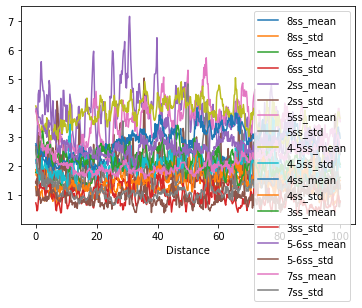

In [19]:
data_actin.plot(x='Distance', y=data_actin.columns[1:])

<AxesSubplot:xlabel='Distance'>

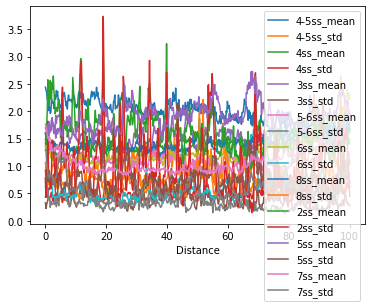

In [20]:
data_myosin.plot(x='Distance', y=data_myosin.columns[1:])

# group 3-5ss and 6-8ss

In [38]:
myosin_file = os.listdir("myosin")
myosin_file.sort()

data_myosin_group = pd.DataFrame(data = np.arange(0,100.02,0.2),
                          columns = ['Distance'])
data_myosin_group['3-5_mean'] = 0
data_myosin_group['3-5_std'] = 0
data_myosin_group['3-5_sem'] = 0
data_myosin_group['6-8_mean'] = 0
data_myosin_group['6-8_std'] = 0
data_myosin_group['6-8_sem'] = 0

group1 = ['4-5ss', '2ss', '3ss', '4ss', '5ss']
group2 = ['5-6ss', '6ss', '7ss', '8ss']

i=0
data_group1 = pd.DataFrame()
data_group2 = pd.DataFrame()
for f in myosin_file:
    if 'align' not in f : 
        for g in group1:
            if g in f:
                print(f)
                data = pd.read_csv(os.path.join('myosin', f), sep='\t', index_col = 'Unnamed: 0' )
                print(len(data_group1.columns), len(data.columns))
                data_group1 = pd.concat([data_group1, data], axis = 1)
                break
        
        for g in group2:
            if g in f:
                data = pd.read_csv(os.path.join('myosin', f), sep='\t', index_col = 'Unnamed: 0' )
#                 print(data.columns)
                data_group2 = pd.concat([data_group2, data], axis = 1)
                break

                    
# tmp=[]
# for c in range(0, len(data_group1.columns), 2):
#     pos = np.where((dist<=data[data.columns[c]].to_numpy()) & (data[data.columns[c]].to_numpy()<dist+0.2))
#     if len(pos[0])>0:
#         for p in pos[0]:
#             tmp.append(data[data.columns[c+1]][p])

# data_myosin.loc[i, f.split('_')[0]+'_mean'] = np.mean(tmp)
# data_myosin.loc[i, f.split('_')[0]+'_std'] = np.std(tmp)
#     i+=1

2ss_myosin_tmp.csv
0 16
3ss_myosin_tmp.csv
16 20
4-5ss_myosin_tmp.csv
36 80
4ss_myosin_tmp.csv
116 60
5ss_myosin_tmp.csv
176 30


In [39]:
from scipy.stats import sem 
i=0
for dist in np.arange(0, 100.2, 0.2):
    tmp=[]
    for c in range(0, len(data_group1.columns), 2):
        pos = np.where((dist<=data_group1[data_group1.columns[c]].to_numpy()) &
                       (data_group1[data_group1.columns[c]].to_numpy()<dist+0.2))
        if len(pos[0])>0:
            for p in pos[0]:
                tmp.append(data_group1[data_group1.columns[c+1]][p])

    data_myosin_group.loc[i, '3-5_mean'] = np.mean(tmp)
    data_myosin_group.loc[i, '3-5_std'] = np.std(tmp)
    data_myosin_group.loc[i, '3-5_sem'] = np.std(tmp)/np.sqrt(len(tmp))
    i+=1
    
    
i=0
for dist in np.arange(0, 100.2, 0.2):
    tmp=[]
    for c in range(0, len(data_group2.columns), 2):
        pos = np.where((dist<=data_group2[data_group2.columns[c]].to_numpy()) &
                       (data_group2[data_group2.columns[c]].to_numpy()<dist+0.2))
        if len(pos[0])>0:
            for p in pos[0]:
                tmp.append(data_group2[data_group2.columns[c+1]][p])

    data_myosin_group.loc[i, '6-8_mean'] = np.mean(tmp)
    data_myosin_group.loc[i, '6-8_std'] = np.std(tmp)
    data_myosin_group.loc[i, '6-8_sem'] = np.std(tmp)/np.sqrt(len(tmp))
    i+=1

In [40]:
data_myosin_group.to_csv('res_myosin_group.csv', sep='\t')

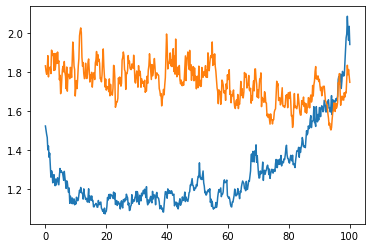

In [25]:
plt.plot(data_myosin_group.Distance, data_myosin_group['6-8_mean'])
plt.plot(data_myosin_group.Distance, data_myosin_group['3-5_mean'])

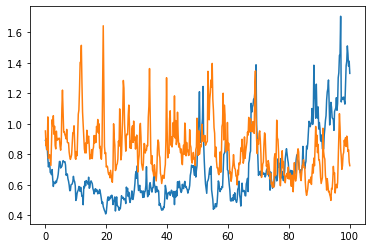

In [33]:
plt.plot(data_myosin_group.Distance, data_myosin_group['6-8_std'])
plt.plot(data_myosin_group.Distance, data_myosin_group['3-5_std'])

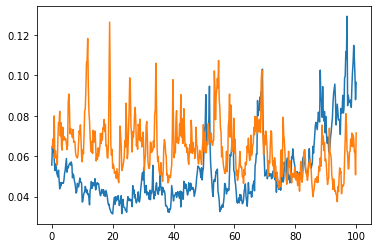

In [35]:
plt.plot(data_myosin_group.Distance, data_myosin_group['6-8_sem'])
plt.plot(data_myosin_group.Distance, data_myosin_group['3-5_sem'])

In [28]:
from scipy.stats import sem 
sem(tmp)

0.09680573194990877

In [30]:
np.std(tmp)/np.sqrt(len(tmp))

0.09655064393880454